# Import Important Libraries

In [39]:
import pandas
import sys
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import numpy as np # linear algebra
import pandas as pd
#from bayes_opt import BayesianOptimization
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor,XGBClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import roc_auc_score,mean_absolute_error,mean_squared_error
from mlxtend.classifier import StackingCVClassifier

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score,KFold,RepeatedStratifiedKFold,StratifiedKFold

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
import pickle

In [22]:
datad=pd.read_csv(r"data.csv")

In [37]:
!pip install hyperopt

# data analysis

In [23]:
datad

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  ...  Shimmer:DDA      NHR     HNR      RPDE       DFA  \
0               0.426  ...      0.06545  0.02211  21.033  0.414783  0.815285   
1               0.626  ...      0.09403  0.01929  19.085  0.458359  0.819521   
2               0.482  ...      0.08270  0.01309  20.651  0.429895  0.825288   
3               0.517  ...      0.08771  0.01353  20.644  0.434969  0.819235   
4               0.584  ...      0.10470  0.01767  19.649  0.417356  0.823484   
..                ...  ...          ...      ...     ...       ...       ...   
190             0.405  ...      0.07008  0.02764  19.517  0.448439  0.657899   
191             0.263  ...      0.04812  0.01810  19.147  0.431674  0.683244   
192             0.256  ...      0.03804  0.10715  17.883  0.407567  0.655683   
193             0.241  ...      0.03794  0.07223  19.020  0.451221  0.643956   
194             0.190  ...      0.03078  0.04398  21.209  0.462803  0.664357   

      spread1   spread2        D2       PPE  status  
0   -4.813031  0.266482  2.301442  0.284654       1  
1   -4.075192  0.335590  2.486855  0.368674       1  
2   -4.443179  0.311173  2.342259  0.332634       1  
3   -4.117501  0.334147  2.405554  0.368975       1  
4   -3.747787  0.234513  2.332180  0.410335       1  
..        ...       ...       ...       ...     ...  
190 -6.538586  0.121952  2.657476  0.133050       0  
191 -6.195325  0.129303  2.784312  0.168895       0  
192 -6.787197  0.158453  2.679772  0.131728       0  
193 -6.744577  0.207454  2.138608  0.123306       0  
194 -5.724056  0.190667  2.555477  0.148569       0  

[195 rows x 23 columns]

# feature checking

In [24]:
datad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

# feature description

In [25]:
datad.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR        RPDE  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.498536   
std            0.194877  ...     0.030459    0.040418    4.425764    0.103942   
min            0.085000  ...     0.013640    0.000650    8.441000    0.256570   
25%            0.148500  ...     0.024735    0.005925   19.198000    0.421306   
50%            0.221000  ...     0.038360    0.011660   22.085000    0.495954   
75%            0.350000  ...     0.060795    0.025640   25.075500    0.587562   
max            1.302000  ...     0.169420    0.314820   33.047000    0.685151   

              DFA     spread1     spread2          D2         PPE      status  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.718099   -5.684397    0.226510    2.381826    0.206552    0.753846  
std      0.055336    1.090208    0.083406    0.382799    0.090119    0.431878  
min      0.574282   -7.964984    0.006274    1.423287    0.044539    0.000000  
25%      0.674758   -6.450096    0.174351    2.099125    0.137451    1.000000  
50%      0.722254   -5.720868    0.218885    2.361532    0.194052    1.000000  
75%      0.761881   -5.046192    0.279234    2.636456    0.252980    1.000000  
max      0.825288   -2.434031    0.450493    3.671155    0.527367    1.000000  

[8 rows x 23 columns]

# is there any null value

In [26]:
datad.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [27]:
datad.groupby('status').count()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0                48            48            48              48   
1               147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0                     48        48        48          48            48   
1                    147       147       147         147           147   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  \
status                    ...                                               
0                     48  ...        48           48   48   48    48   48   
1                    147  ...       147          147  147  147   147  147   

        spread1  spread2   D2  PPE  
status                              
0            48       48   48   48  
1           147      147  147  147  

[2 rows x 22 columns]

# Number of Unique values per coulmn

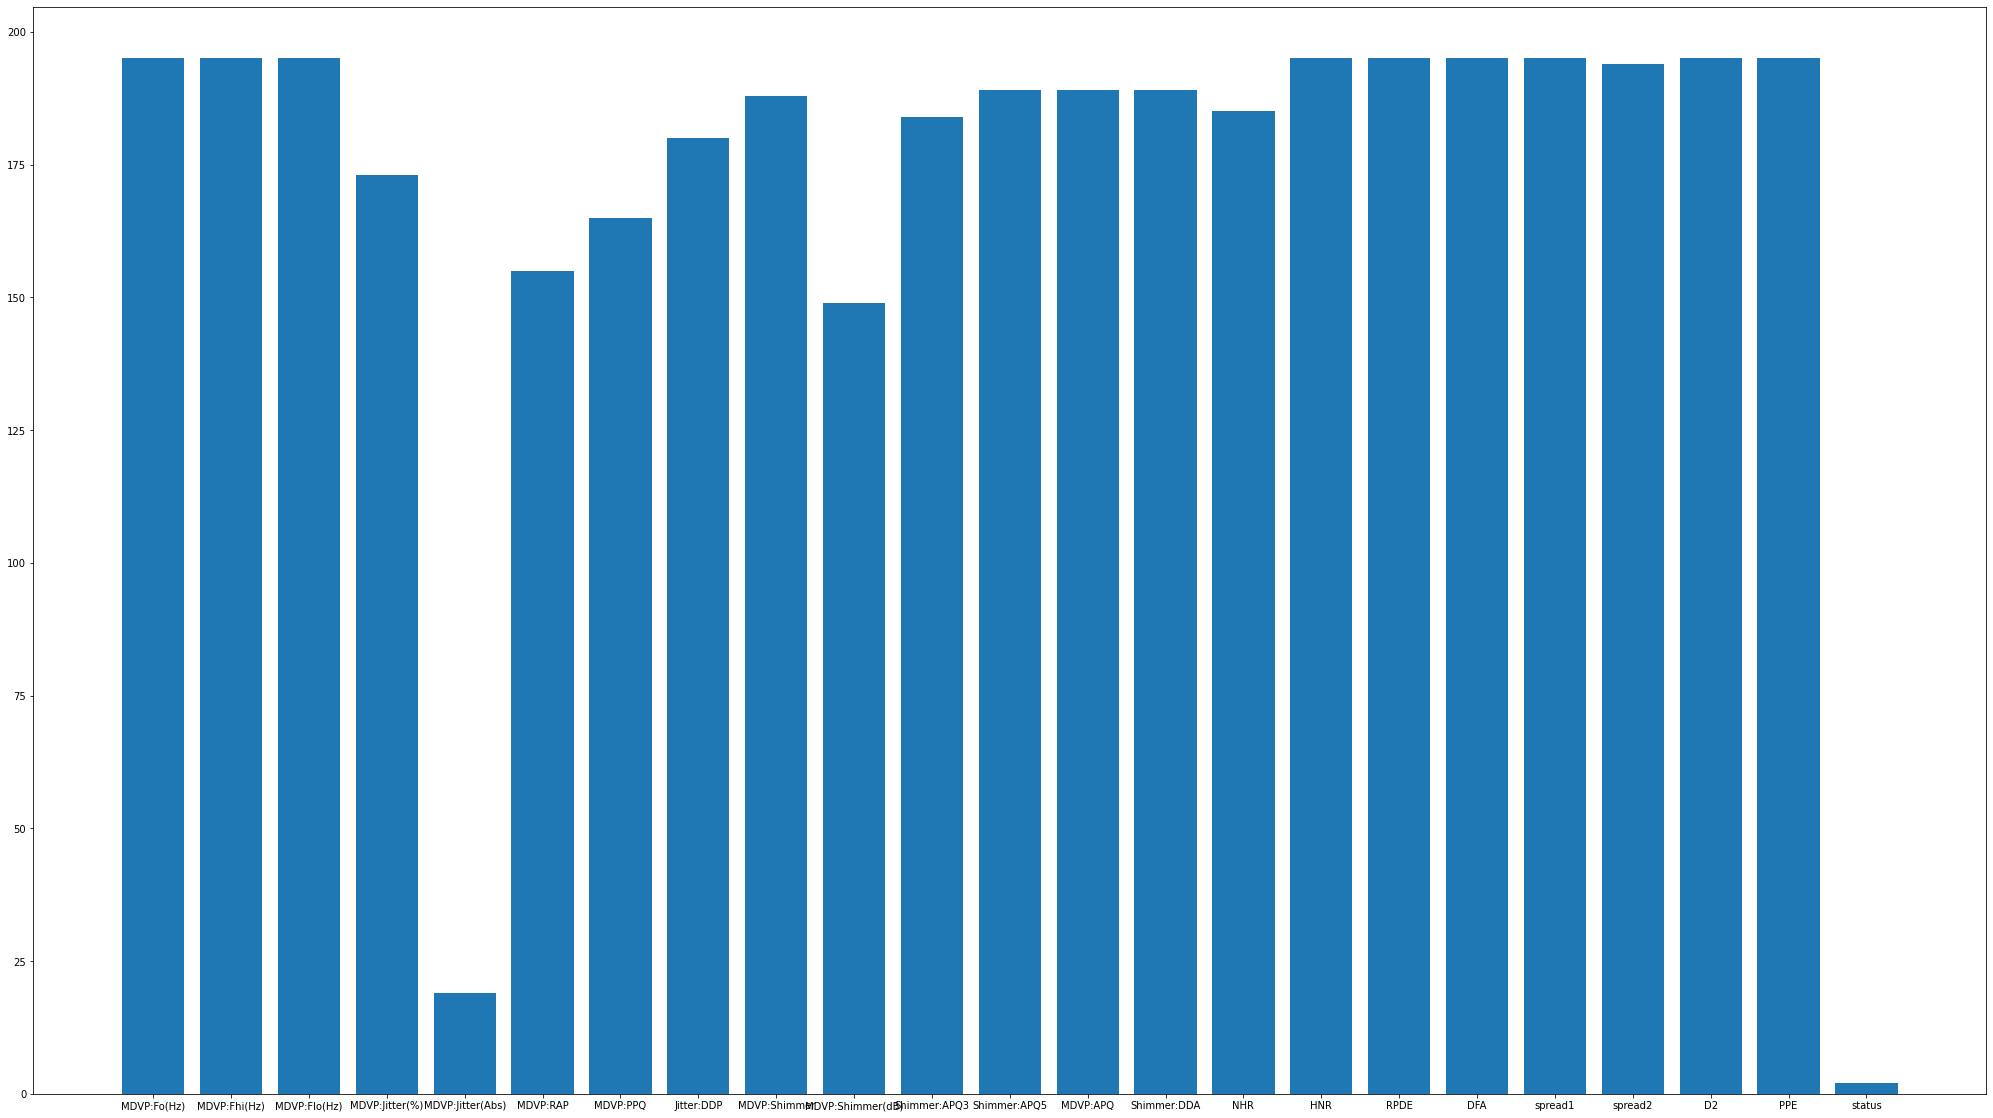

In [28]:
from collections import defaultdict

frequency=defaultdict(lambda:0)

for i in datad:
    frequency[i]=datad[i].nunique()
    


frequency


fig,ax=plt.subplots(figsize=(35, 20))

ax.bar(frequency.keys(),frequency.values())

plt.show()

# histogram of the features

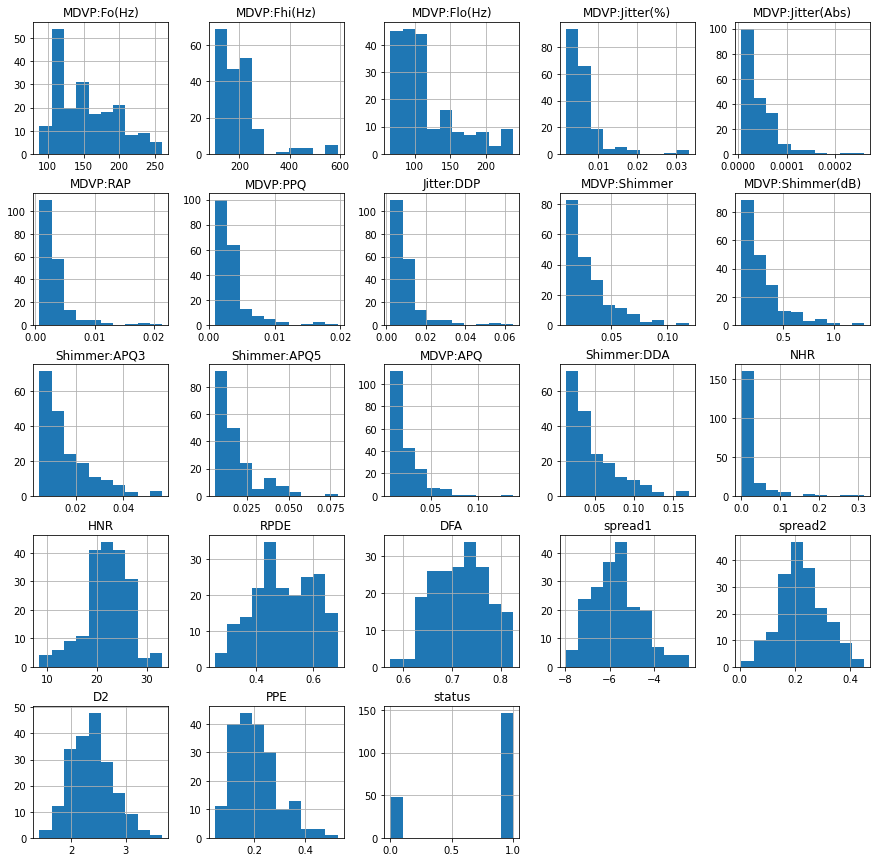

In [29]:
datad.hist(figsize=(15,15))
plt.show()

# correlation between features

<AxesSubplot:>

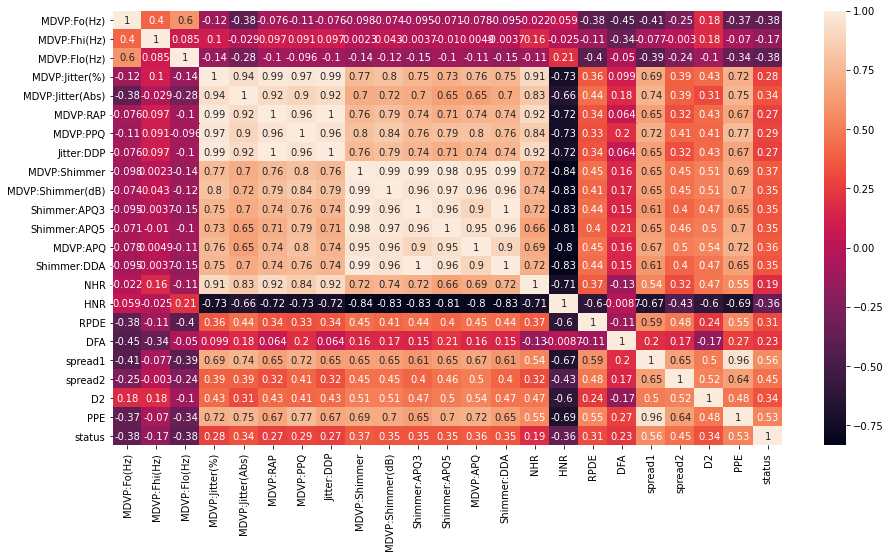

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(datad.corr(),annot=True)

# data preprocessing and inference

In [31]:

# url = "data.csv"

# features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
# dataset = pandas.read_csv(url, names = features)


# array = dataset.values

# Xi = array[:,0:22]

# Yi = array[:,22]
# validation_size = 0.3

# seed = 7
datad = datad.drop(columns=[ "spread1", "spread2", "D2", "PPE", "NHR", "RPDE", "DFA"], axis=1)


X=datad.drop('status',axis=1)

Y=datad.status




In [32]:
X

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0               0.426       0.02182       0.03130   0.02971      0.06545   
1               0.626       0.03134       0.04518   0.04368      0.09403   
2               0.482       0.02757       0.03858   0.03590      0.08270   
3               0.517       0.02924       0.04005   0.03772      0.08771   
4               0.584       0.03490       0.04825   0.04465      0.10470   
..                ...           ...           ...       ...          ...   
190             0.405       0.02336       0.02498   0.02745      0.07008   
191             0.263       0.01604       0.01657   0.01879      0.04812   
192             0.256       0.01268       0.01365   0.01667      0.03804   
193             0.241       0.01265       0.01321   0.01588      0.03794   
194             0.190       0.01026       0.01161   0.01373      0.03078   

        HNR  
0    21.033  
1    19.085  
2    20.651  
3    20.644  
4    19.649  
..      ...  
190  19.517  
191  19.147  
192  17.883  
193  19.020  
194  21.209  

[195 rows x 15 columns]

In [33]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

# Dry run of different estimators on this dataset 

In [34]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.3, random_state = 7, shuffle=True)

num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

#different estimators
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K-Neighbors Classifier', KNeighborsClassifier()))
models.append(('MLP Classifier', MLPClassifier(solver='lbfgs')))
models.append(('GaussianNB', GaussianNB()))
models.append(('XGBClassifier', XGBClassifier(n_estimators=400)))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('CatBoost', CatBoostClassifier(learning_rate=0.9)))


results = []
names = []

pre=[]
rocs=[]

#iterate on every estimator

print("Scores for each algorithm:")
for name, model in models:
    kfold = KFold( n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print('10 folds cross validation score of {}'.format(name))
    print(cv_results)
    
#     model.fit(X_train, Y_train)
#     predictions = model.predict(X_validation)
#     print(name,'\n','accuracy: ', accuracy_score(Y_validation, predictions)*100)
#     pre.append(accuracy_score(Y_validation, predictions)*100)
#     rocs.append(roc_auc_score(Y_validation, predictions))
#     print('\nclassification report\n',classification_report(Y_validation, predictions))
    print()





Scores for each algorithm:
10 folds cross validation score of Logistic Regression
[0.78571429 0.71428571 1.         0.71428571 0.78571429 0.78571429
 0.92307692 0.53846154 0.76923077 0.84615385]

10 folds cross validation score of Linear Discriminant Analysis
[0.78571429 0.71428571 1.         0.71428571 0.78571429 0.85714286
 0.92307692 0.69230769 0.76923077 0.92307692]

10 folds cross validation score of K-Neighbors Classifier
[0.78571429 0.57142857 0.92857143 0.85714286 0.71428571 0.85714286
 0.84615385 0.69230769 0.69230769 1.        ]



C:\Users\karti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\karti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\karti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

10 folds cross validation score of MLP Classifier
[0.78571429 0.71428571 0.57142857 0.92857143 0.64285714 0.85714286
 0.84615385 0.76923077 0.61538462 0.92307692]

10 folds cross validation score of GaussianNB
[0.78571429 0.64285714 0.64285714 0.78571429 0.64285714 0.57142857
 0.61538462 0.61538462 0.69230769 0.69230769]

[16:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10 folds cross validation score of XGBClassifier
[0.85714286 0.78571429 0.85714286 0.92857143 0.78571429 0.78571429
 0.84615385 0.84615385 0.92307692 1.        ]

10 folds cross validation score of RandomForest
[0.85714286 0.85714286 0.78571429 0.85714286 0.78571429 0.78571429
 0.84615385 0.69230769 0.84615385 1.        ]

0:	learn: 0.3336726	total: 148ms	remaining: 2m 27s
1:	learn: 0.1857875	total: 149ms	remaining: 1m 14s
2:	learn: 0.1229128	total: 150ms	remaining: 49.9s
3:	learn: 0.0915489	total: 152ms	remaining: 37.8s
4:	learn: 0.0752922	total: 153ms	remaining: 30.5s
5:	learn: 0.0578953	total: 155ms	remaining: 25.7s
6:	learn: 0.0423472	total: 156ms	remaining: 22.2s
7:	learn: 0.0

152:	learn: 0.0010772	total: 480ms	remaining: 2.65s
153:	learn: 0.0010772	total: 484ms	remaining: 2.66s
154:	learn: 0.0010772	total: 488ms	remaining: 2.66s
155:	learn: 0.0010769	total: 490ms	remaining: 2.65s
156:	learn: 0.0010574	total: 493ms	remaining: 2.65s
157:	learn: 0.0010571	total: 496ms	remaining: 2.64s
158:	learn: 0.0010560	total: 498ms	remaining: 2.63s
159:	learn: 0.0010557	total: 502ms	remaining: 2.63s
160:	learn: 0.0010555	total: 504ms	remaining: 2.62s
161:	learn: 0.0010555	total: 506ms	remaining: 2.62s
162:	learn: 0.0010552	total: 507ms	remaining: 2.6s
163:	learn: 0.0010552	total: 509ms	remaining: 2.59s
164:	learn: 0.0010552	total: 511ms	remaining: 2.59s
165:	learn: 0.0010551	total: 513ms	remaining: 2.58s
166:	learn: 0.0010551	total: 515ms	remaining: 2.57s
167:	learn: 0.0010548	total: 517ms	remaining: 2.56s
168:	learn: 0.0010548	total: 518ms	remaining: 2.55s
169:	learn: 0.0010546	total: 520ms	remaining: 2.54s
170:	learn: 0.0010386	total: 523ms	remaining: 2.54s
171:	learn: 0

318:	learn: 0.0008728	total: 975ms	remaining: 2.08s
319:	learn: 0.0008725	total: 980ms	remaining: 2.08s
320:	learn: 0.0008725	total: 986ms	remaining: 2.08s
321:	learn: 0.0008725	total: 992ms	remaining: 2.09s
322:	learn: 0.0008726	total: 996ms	remaining: 2.09s
323:	learn: 0.0008718	total: 999ms	remaining: 2.08s
324:	learn: 0.0008718	total: 1.01s	remaining: 2.09s
325:	learn: 0.0008713	total: 1.01s	remaining: 2.08s
326:	learn: 0.0008713	total: 1.01s	remaining: 2.08s
327:	learn: 0.0008713	total: 1.01s	remaining: 2.08s
328:	learn: 0.0008709	total: 1.02s	remaining: 2.08s
329:	learn: 0.0008707	total: 1.02s	remaining: 2.08s
330:	learn: 0.0008706	total: 1.02s	remaining: 2.07s
331:	learn: 0.0008650	total: 1.03s	remaining: 2.07s
332:	learn: 0.0008649	total: 1.03s	remaining: 2.07s
333:	learn: 0.0008649	total: 1.04s	remaining: 2.07s
334:	learn: 0.0008643	total: 1.04s	remaining: 2.07s
335:	learn: 0.0008639	total: 1.04s	remaining: 2.07s
336:	learn: 0.0008639	total: 1.05s	remaining: 2.06s
337:	learn: 

496:	learn: 0.0007670	total: 1.62s	remaining: 1.64s
497:	learn: 0.0007659	total: 1.63s	remaining: 1.64s
498:	learn: 0.0007656	total: 1.63s	remaining: 1.64s
499:	learn: 0.0007654	total: 1.63s	remaining: 1.63s
500:	learn: 0.0007654	total: 1.63s	remaining: 1.63s
501:	learn: 0.0007654	total: 1.63s	remaining: 1.62s
502:	learn: 0.0007654	total: 1.64s	remaining: 1.62s
503:	learn: 0.0007646	total: 1.64s	remaining: 1.61s
504:	learn: 0.0007638	total: 1.64s	remaining: 1.61s
505:	learn: 0.0007637	total: 1.64s	remaining: 1.6s
506:	learn: 0.0007637	total: 1.64s	remaining: 1.6s
507:	learn: 0.0007637	total: 1.65s	remaining: 1.59s
508:	learn: 0.0007633	total: 1.65s	remaining: 1.59s
509:	learn: 0.0007630	total: 1.65s	remaining: 1.59s
510:	learn: 0.0007619	total: 1.65s	remaining: 1.58s
511:	learn: 0.0007612	total: 1.65s	remaining: 1.58s
512:	learn: 0.0007609	total: 1.66s	remaining: 1.57s
513:	learn: 0.0007608	total: 1.66s	remaining: 1.57s
514:	learn: 0.0007608	total: 1.66s	remaining: 1.57s
515:	learn: 0.

669:	learn: 0.0006942	total: 2.12s	remaining: 1.04s
670:	learn: 0.0006930	total: 2.12s	remaining: 1.04s
671:	learn: 0.0006930	total: 2.12s	remaining: 1.03s
672:	learn: 0.0006925	total: 2.12s	remaining: 1.03s
673:	learn: 0.0006926	total: 2.12s	remaining: 1.03s
674:	learn: 0.0006923	total: 2.12s	remaining: 1.02s
675:	learn: 0.0006923	total: 2.13s	remaining: 1.02s
676:	learn: 0.0006919	total: 2.13s	remaining: 1.01s
677:	learn: 0.0006910	total: 2.13s	remaining: 1.01s
678:	learn: 0.0006911	total: 2.13s	remaining: 1.01s
679:	learn: 0.0006911	total: 2.13s	remaining: 1s
680:	learn: 0.0006909	total: 2.13s	remaining: 1000ms
681:	learn: 0.0006906	total: 2.14s	remaining: 996ms
682:	learn: 0.0006906	total: 2.14s	remaining: 992ms
683:	learn: 0.0006893	total: 2.14s	remaining: 989ms
684:	learn: 0.0006807	total: 2.14s	remaining: 985ms
685:	learn: 0.0006803	total: 2.15s	remaining: 982ms
686:	learn: 0.0006805	total: 2.15s	remaining: 979ms
687:	learn: 0.0006803	total: 2.15s	remaining: 975ms
688:	learn: 0.

877:	learn: 0.0006234	total: 2.61s	remaining: 363ms
878:	learn: 0.0006233	total: 2.62s	remaining: 360ms
879:	learn: 0.0006232	total: 2.62s	remaining: 357ms
880:	learn: 0.0006232	total: 2.62s	remaining: 354ms
881:	learn: 0.0006232	total: 2.62s	remaining: 351ms
882:	learn: 0.0006226	total: 2.62s	remaining: 348ms
883:	learn: 0.0006225	total: 2.63s	remaining: 344ms
884:	learn: 0.0006208	total: 2.63s	remaining: 341ms
885:	learn: 0.0006205	total: 2.63s	remaining: 338ms
886:	learn: 0.0006208	total: 2.63s	remaining: 335ms
887:	learn: 0.0006204	total: 2.64s	remaining: 333ms
888:	learn: 0.0006202	total: 2.64s	remaining: 330ms
889:	learn: 0.0006202	total: 2.64s	remaining: 327ms
890:	learn: 0.0006198	total: 2.64s	remaining: 324ms
891:	learn: 0.0006191	total: 2.65s	remaining: 320ms
892:	learn: 0.0006191	total: 2.65s	remaining: 317ms
893:	learn: 0.0006190	total: 2.65s	remaining: 315ms
894:	learn: 0.0006188	total: 2.65s	remaining: 312ms
895:	learn: 0.0006186	total: 2.66s	remaining: 309ms
896:	learn: 

77:	learn: 0.0015734	total: 164ms	remaining: 1.94s
78:	learn: 0.0015574	total: 166ms	remaining: 1.93s
79:	learn: 0.0015570	total: 167ms	remaining: 1.92s
80:	learn: 0.0015564	total: 169ms	remaining: 1.92s
81:	learn: 0.0015554	total: 171ms	remaining: 1.91s
82:	learn: 0.0015545	total: 173ms	remaining: 1.91s
83:	learn: 0.0015544	total: 175ms	remaining: 1.91s
84:	learn: 0.0015542	total: 177ms	remaining: 1.9s
85:	learn: 0.0015521	total: 179ms	remaining: 1.9s
86:	learn: 0.0015516	total: 180ms	remaining: 1.89s
87:	learn: 0.0015442	total: 182ms	remaining: 1.89s
88:	learn: 0.0015040	total: 185ms	remaining: 1.89s
89:	learn: 0.0015039	total: 186ms	remaining: 1.89s
90:	learn: 0.0015035	total: 188ms	remaining: 1.88s
91:	learn: 0.0015035	total: 190ms	remaining: 1.87s
92:	learn: 0.0015012	total: 191ms	remaining: 1.87s
93:	learn: 0.0014710	total: 193ms	remaining: 1.86s
94:	learn: 0.0014708	total: 195ms	remaining: 1.86s
95:	learn: 0.0014699	total: 197ms	remaining: 1.86s
96:	learn: 0.0014700	total: 204ms

278:	learn: 0.0009816	total: 659ms	remaining: 1.7s
279:	learn: 0.0009810	total: 661ms	remaining: 1.7s
280:	learn: 0.0009810	total: 663ms	remaining: 1.7s
281:	learn: 0.0009803	total: 664ms	remaining: 1.69s
282:	learn: 0.0009801	total: 666ms	remaining: 1.69s
283:	learn: 0.0009799	total: 667ms	remaining: 1.68s
284:	learn: 0.0009793	total: 669ms	remaining: 1.68s
285:	learn: 0.0009783	total: 671ms	remaining: 1.68s
286:	learn: 0.0009779	total: 673ms	remaining: 1.67s
287:	learn: 0.0009778	total: 674ms	remaining: 1.67s
288:	learn: 0.0009777	total: 676ms	remaining: 1.66s
289:	learn: 0.0009756	total: 677ms	remaining: 1.66s
290:	learn: 0.0009755	total: 679ms	remaining: 1.65s
291:	learn: 0.0009756	total: 681ms	remaining: 1.65s
292:	learn: 0.0009756	total: 684ms	remaining: 1.65s
293:	learn: 0.0009750	total: 686ms	remaining: 1.65s
294:	learn: 0.0009744	total: 687ms	remaining: 1.64s
295:	learn: 0.0009737	total: 689ms	remaining: 1.64s
296:	learn: 0.0009736	total: 691ms	remaining: 1.64s
297:	learn: 0.0

476:	learn: 0.0008627	total: 1.15s	remaining: 1.26s
477:	learn: 0.0008624	total: 1.15s	remaining: 1.26s
478:	learn: 0.0008619	total: 1.16s	remaining: 1.26s
479:	learn: 0.0008614	total: 1.16s	remaining: 1.25s
480:	learn: 0.0008613	total: 1.16s	remaining: 1.25s
481:	learn: 0.0008610	total: 1.16s	remaining: 1.25s
482:	learn: 0.0008607	total: 1.17s	remaining: 1.25s
483:	learn: 0.0008600	total: 1.17s	remaining: 1.24s
484:	learn: 0.0008600	total: 1.17s	remaining: 1.24s
485:	learn: 0.0008599	total: 1.17s	remaining: 1.24s
486:	learn: 0.0008598	total: 1.17s	remaining: 1.24s
487:	learn: 0.0008596	total: 1.18s	remaining: 1.23s
488:	learn: 0.0008596	total: 1.18s	remaining: 1.23s
489:	learn: 0.0008591	total: 1.18s	remaining: 1.23s
490:	learn: 0.0008589	total: 1.18s	remaining: 1.23s
491:	learn: 0.0008587	total: 1.18s	remaining: 1.22s
492:	learn: 0.0008575	total: 1.19s	remaining: 1.22s
493:	learn: 0.0008571	total: 1.19s	remaining: 1.22s
494:	learn: 0.0008572	total: 1.19s	remaining: 1.22s
495:	learn: 

635:	learn: 0.0007760	total: 1.48s	remaining: 847ms
636:	learn: 0.0007758	total: 1.48s	remaining: 844ms
637:	learn: 0.0007759	total: 1.48s	remaining: 841ms
638:	learn: 0.0007757	total: 1.48s	remaining: 839ms
639:	learn: 0.0007757	total: 1.49s	remaining: 836ms
640:	learn: 0.0007652	total: 1.49s	remaining: 833ms
641:	learn: 0.0007557	total: 1.49s	remaining: 830ms
642:	learn: 0.0007558	total: 1.49s	remaining: 828ms
643:	learn: 0.0007557	total: 1.49s	remaining: 825ms
644:	learn: 0.0007556	total: 1.49s	remaining: 822ms
645:	learn: 0.0007556	total: 1.5s	remaining: 819ms
646:	learn: 0.0007483	total: 1.5s	remaining: 817ms
647:	learn: 0.0007485	total: 1.5s	remaining: 814ms
648:	learn: 0.0007481	total: 1.5s	remaining: 812ms
649:	learn: 0.0007477	total: 1.5s	remaining: 810ms
650:	learn: 0.0007477	total: 1.5s	remaining: 807ms
651:	learn: 0.0007474	total: 1.51s	remaining: 805ms
652:	learn: 0.0007473	total: 1.51s	remaining: 803ms
653:	learn: 0.0007473	total: 1.51s	remaining: 800ms
654:	learn: 0.0007

807:	learn: 0.0006863	total: 1.81s	remaining: 429ms
808:	learn: 0.0006862	total: 1.81s	remaining: 427ms
809:	learn: 0.0006861	total: 1.81s	remaining: 425ms
810:	learn: 0.0006860	total: 1.81s	remaining: 422ms
811:	learn: 0.0006840	total: 1.81s	remaining: 420ms
812:	learn: 0.0006838	total: 1.81s	remaining: 417ms
813:	learn: 0.0006838	total: 1.82s	remaining: 415ms
814:	learn: 0.0006836	total: 1.82s	remaining: 413ms
815:	learn: 0.0006833	total: 1.82s	remaining: 410ms
816:	learn: 0.0006830	total: 1.82s	remaining: 408ms
817:	learn: 0.0006829	total: 1.82s	remaining: 406ms
818:	learn: 0.0006828	total: 1.82s	remaining: 403ms
819:	learn: 0.0006829	total: 1.83s	remaining: 401ms
820:	learn: 0.0006822	total: 1.83s	remaining: 399ms
821:	learn: 0.0006771	total: 1.83s	remaining: 396ms
822:	learn: 0.0006768	total: 1.83s	remaining: 394ms
823:	learn: 0.0006757	total: 1.83s	remaining: 392ms
824:	learn: 0.0006755	total: 1.83s	remaining: 389ms
825:	learn: 0.0006678	total: 1.84s	remaining: 387ms
826:	learn: 

13:	learn: 0.0081058	total: 22.7ms	remaining: 1.6s
14:	learn: 0.0071648	total: 24.6ms	remaining: 1.62s
15:	learn: 0.0065435	total: 26.3ms	remaining: 1.62s
16:	learn: 0.0061214	total: 28ms	remaining: 1.62s
17:	learn: 0.0054675	total: 29.7ms	remaining: 1.62s
18:	learn: 0.0052003	total: 31.5ms	remaining: 1.63s
19:	learn: 0.0046402	total: 33.1ms	remaining: 1.62s
20:	learn: 0.0043204	total: 34.8ms	remaining: 1.62s
21:	learn: 0.0041298	total: 36.4ms	remaining: 1.62s
22:	learn: 0.0039400	total: 38.4ms	remaining: 1.63s
23:	learn: 0.0037093	total: 40.1ms	remaining: 1.63s
24:	learn: 0.0035273	total: 41.8ms	remaining: 1.63s
25:	learn: 0.0033982	total: 43.3ms	remaining: 1.62s
26:	learn: 0.0032421	total: 45.1ms	remaining: 1.63s
27:	learn: 0.0031347	total: 46.7ms	remaining: 1.62s
28:	learn: 0.0030358	total: 48.5ms	remaining: 1.62s
29:	learn: 0.0029599	total: 50.8ms	remaining: 1.64s
30:	learn: 0.0028753	total: 53.1ms	remaining: 1.66s
31:	learn: 0.0028081	total: 55ms	remaining: 1.67s
32:	learn: 0.0027

235:	learn: 0.0011551	total: 511ms	remaining: 1.65s
236:	learn: 0.0011548	total: 513ms	remaining: 1.65s
237:	learn: 0.0011547	total: 514ms	remaining: 1.65s
238:	learn: 0.0011546	total: 516ms	remaining: 1.64s
239:	learn: 0.0011545	total: 518ms	remaining: 1.64s
240:	learn: 0.0011546	total: 519ms	remaining: 1.64s
241:	learn: 0.0011530	total: 521ms	remaining: 1.63s
242:	learn: 0.0011529	total: 523ms	remaining: 1.63s
243:	learn: 0.0011524	total: 526ms	remaining: 1.63s
244:	learn: 0.0011523	total: 527ms	remaining: 1.63s
245:	learn: 0.0011519	total: 529ms	remaining: 1.62s
246:	learn: 0.0011517	total: 531ms	remaining: 1.62s
247:	learn: 0.0011507	total: 533ms	remaining: 1.61s
248:	learn: 0.0011506	total: 534ms	remaining: 1.61s
249:	learn: 0.0011501	total: 537ms	remaining: 1.61s
250:	learn: 0.0011498	total: 539ms	remaining: 1.61s
251:	learn: 0.0011495	total: 540ms	remaining: 1.6s
252:	learn: 0.0011494	total: 541ms	remaining: 1.6s
253:	learn: 0.0011493	total: 542ms	remaining: 1.59s
254:	learn: 0.

401:	learn: 0.0010751	total: 838ms	remaining: 1.25s
402:	learn: 0.0010751	total: 840ms	remaining: 1.24s
403:	learn: 0.0010751	total: 842ms	remaining: 1.24s
404:	learn: 0.0010751	total: 843ms	remaining: 1.24s
405:	learn: 0.0010751	total: 844ms	remaining: 1.24s
406:	learn: 0.0010751	total: 846ms	remaining: 1.23s
407:	learn: 0.0010751	total: 847ms	remaining: 1.23s
408:	learn: 0.0010751	total: 849ms	remaining: 1.23s
409:	learn: 0.0010751	total: 850ms	remaining: 1.22s
410:	learn: 0.0010751	total: 852ms	remaining: 1.22s
411:	learn: 0.0010751	total: 853ms	remaining: 1.22s
412:	learn: 0.0010751	total: 855ms	remaining: 1.22s
413:	learn: 0.0010751	total: 857ms	remaining: 1.21s
414:	learn: 0.0010751	total: 858ms	remaining: 1.21s
415:	learn: 0.0010751	total: 860ms	remaining: 1.21s
416:	learn: 0.0010751	total: 862ms	remaining: 1.21s
417:	learn: 0.0010751	total: 864ms	remaining: 1.2s
418:	learn: 0.0010751	total: 865ms	remaining: 1.2s
419:	learn: 0.0010751	total: 866ms	remaining: 1.2s
420:	learn: 0.0

578:	learn: 0.0010037	total: 1.16s	remaining: 846ms
579:	learn: 0.0010033	total: 1.17s	remaining: 844ms
580:	learn: 0.0010031	total: 1.17s	remaining: 841ms
581:	learn: 0.0010029	total: 1.17s	remaining: 838ms
582:	learn: 0.0010029	total: 1.17s	remaining: 836ms
583:	learn: 0.0010029	total: 1.17s	remaining: 833ms
584:	learn: 0.0010029	total: 1.17s	remaining: 831ms
585:	learn: 0.0010028	total: 1.17s	remaining: 828ms
586:	learn: 0.0010027	total: 1.17s	remaining: 826ms
587:	learn: 0.0010027	total: 1.18s	remaining: 824ms
588:	learn: 0.0010028	total: 1.18s	remaining: 821ms
589:	learn: 0.0010014	total: 1.18s	remaining: 819ms
590:	learn: 0.0010009	total: 1.18s	remaining: 817ms
591:	learn: 0.0010003	total: 1.18s	remaining: 814ms
592:	learn: 0.0009999	total: 1.18s	remaining: 812ms
593:	learn: 0.0009997	total: 1.18s	remaining: 810ms
594:	learn: 0.0009996	total: 1.19s	remaining: 808ms
595:	learn: 0.0009971	total: 1.19s	remaining: 806ms
596:	learn: 0.0009969	total: 1.19s	remaining: 803ms
597:	learn: 

753:	learn: 0.0008898	total: 1.49s	remaining: 487ms
754:	learn: 0.0008893	total: 1.49s	remaining: 485ms
755:	learn: 0.0008894	total: 1.49s	remaining: 482ms
756:	learn: 0.0008880	total: 1.5s	remaining: 480ms
757:	learn: 0.0008880	total: 1.5s	remaining: 478ms
758:	learn: 0.0008877	total: 1.5s	remaining: 476ms
759:	learn: 0.0008875	total: 1.5s	remaining: 474ms
760:	learn: 0.0008864	total: 1.5s	remaining: 472ms
761:	learn: 0.0008865	total: 1.5s	remaining: 470ms
762:	learn: 0.0008862	total: 1.51s	remaining: 468ms
763:	learn: 0.0008862	total: 1.51s	remaining: 466ms
764:	learn: 0.0008862	total: 1.51s	remaining: 464ms
765:	learn: 0.0008863	total: 1.51s	remaining: 462ms
766:	learn: 0.0008858	total: 1.51s	remaining: 460ms
767:	learn: 0.0008857	total: 1.52s	remaining: 458ms
768:	learn: 0.0008857	total: 1.52s	remaining: 456ms
769:	learn: 0.0008857	total: 1.52s	remaining: 454ms
770:	learn: 0.0008858	total: 1.52s	remaining: 452ms
771:	learn: 0.0008856	total: 1.52s	remaining: 449ms
772:	learn: 0.0008

918:	learn: 0.0008650	total: 1.81s	remaining: 160ms
919:	learn: 0.0008648	total: 1.81s	remaining: 158ms
920:	learn: 0.0008644	total: 1.81s	remaining: 156ms
921:	learn: 0.0008642	total: 1.82s	remaining: 154ms
922:	learn: 0.0008640	total: 1.82s	remaining: 152ms
923:	learn: 0.0008640	total: 1.83s	remaining: 151ms
924:	learn: 0.0008638	total: 1.83s	remaining: 149ms
925:	learn: 0.0008629	total: 1.84s	remaining: 147ms
926:	learn: 0.0008626	total: 1.84s	remaining: 145ms
927:	learn: 0.0008623	total: 1.84s	remaining: 143ms
928:	learn: 0.0008621	total: 1.84s	remaining: 141ms
929:	learn: 0.0008617	total: 1.85s	remaining: 139ms
930:	learn: 0.0008616	total: 1.85s	remaining: 137ms
931:	learn: 0.0008613	total: 1.85s	remaining: 135ms
932:	learn: 0.0008611	total: 1.86s	remaining: 133ms
933:	learn: 0.0008609	total: 1.86s	remaining: 132ms
934:	learn: 0.0008607	total: 1.86s	remaining: 130ms
935:	learn: 0.0008604	total: 1.86s	remaining: 128ms
936:	learn: 0.0008603	total: 1.87s	remaining: 126ms
937:	learn: 

130:	learn: 0.0012139	total: 260ms	remaining: 1.73s
131:	learn: 0.0012134	total: 262ms	remaining: 1.72s
132:	learn: 0.0012128	total: 264ms	remaining: 1.72s
133:	learn: 0.0012127	total: 265ms	remaining: 1.71s
134:	learn: 0.0012126	total: 266ms	remaining: 1.71s
135:	learn: 0.0012124	total: 268ms	remaining: 1.7s
136:	learn: 0.0012124	total: 269ms	remaining: 1.7s
137:	learn: 0.0012123	total: 270ms	remaining: 1.69s
138:	learn: 0.0012117	total: 272ms	remaining: 1.68s
139:	learn: 0.0012112	total: 273ms	remaining: 1.68s
140:	learn: 0.0011991	total: 275ms	remaining: 1.67s
141:	learn: 0.0011988	total: 276ms	remaining: 1.67s
142:	learn: 0.0011984	total: 278ms	remaining: 1.67s
143:	learn: 0.0011973	total: 280ms	remaining: 1.66s
144:	learn: 0.0011968	total: 282ms	remaining: 1.66s
145:	learn: 0.0011799	total: 284ms	remaining: 1.66s
146:	learn: 0.0011798	total: 286ms	remaining: 1.66s
147:	learn: 0.0011792	total: 287ms	remaining: 1.65s
148:	learn: 0.0011792	total: 289ms	remaining: 1.65s
149:	learn: 0.

290:	learn: 0.0010340	total: 588ms	remaining: 1.43s
291:	learn: 0.0010341	total: 589ms	remaining: 1.43s
292:	learn: 0.0010338	total: 591ms	remaining: 1.43s
293:	learn: 0.0010332	total: 593ms	remaining: 1.42s
294:	learn: 0.0010303	total: 594ms	remaining: 1.42s
295:	learn: 0.0010302	total: 596ms	remaining: 1.42s
296:	learn: 0.0010302	total: 597ms	remaining: 1.41s
297:	learn: 0.0010301	total: 599ms	remaining: 1.41s
298:	learn: 0.0010226	total: 601ms	remaining: 1.41s
299:	learn: 0.0010203	total: 602ms	remaining: 1.41s
300:	learn: 0.0010200	total: 604ms	remaining: 1.4s
301:	learn: 0.0010201	total: 606ms	remaining: 1.4s
302:	learn: 0.0010197	total: 607ms	remaining: 1.4s
303:	learn: 0.0010198	total: 609ms	remaining: 1.39s
304:	learn: 0.0010197	total: 611ms	remaining: 1.39s
305:	learn: 0.0010190	total: 612ms	remaining: 1.39s
306:	learn: 0.0010183	total: 614ms	remaining: 1.39s
307:	learn: 0.0010181	total: 616ms	remaining: 1.38s
308:	learn: 0.0010181	total: 617ms	remaining: 1.38s
309:	learn: 0.0

511:	learn: 0.0008697	total: 1.08s	remaining: 1.03s
512:	learn: 0.0008683	total: 1.08s	remaining: 1.03s
513:	learn: 0.0008683	total: 1.08s	remaining: 1.02s
514:	learn: 0.0008679	total: 1.08s	remaining: 1.02s
515:	learn: 0.0008671	total: 1.09s	remaining: 1.02s
516:	learn: 0.0008669	total: 1.09s	remaining: 1.02s
517:	learn: 0.0008670	total: 1.09s	remaining: 1.01s
518:	learn: 0.0008668	total: 1.09s	remaining: 1.01s
519:	learn: 0.0008665	total: 1.09s	remaining: 1.01s
520:	learn: 0.0008650	total: 1.09s	remaining: 1.01s
521:	learn: 0.0008648	total: 1.1s	remaining: 1s
522:	learn: 0.0008646	total: 1.1s	remaining: 1s
523:	learn: 0.0008641	total: 1.1s	remaining: 1s
524:	learn: 0.0008639	total: 1.1s	remaining: 998ms
525:	learn: 0.0008638	total: 1.1s	remaining: 995ms
526:	learn: 0.0008623	total: 1.11s	remaining: 994ms
527:	learn: 0.0008598	total: 1.11s	remaining: 992ms
528:	learn: 0.0008597	total: 1.11s	remaining: 989ms
529:	learn: 0.0008591	total: 1.11s	remaining: 987ms
530:	learn: 0.0008582	tota

726:	learn: 0.0007402	total: 1.57s	remaining: 589ms
727:	learn: 0.0007399	total: 1.57s	remaining: 587ms
728:	learn: 0.0007395	total: 1.57s	remaining: 585ms
729:	learn: 0.0007394	total: 1.57s	remaining: 583ms
730:	learn: 0.0007393	total: 1.58s	remaining: 580ms
731:	learn: 0.0007391	total: 1.58s	remaining: 578ms
732:	learn: 0.0007390	total: 1.58s	remaining: 576ms
733:	learn: 0.0007391	total: 1.58s	remaining: 573ms
734:	learn: 0.0007390	total: 1.58s	remaining: 571ms
735:	learn: 0.0007386	total: 1.58s	remaining: 569ms
736:	learn: 0.0007383	total: 1.59s	remaining: 566ms
737:	learn: 0.0007381	total: 1.59s	remaining: 564ms
738:	learn: 0.0007381	total: 1.59s	remaining: 562ms
739:	learn: 0.0007378	total: 1.59s	remaining: 560ms
740:	learn: 0.0007378	total: 1.6s	remaining: 558ms
741:	learn: 0.0007376	total: 1.6s	remaining: 556ms
742:	learn: 0.0007368	total: 1.6s	remaining: 554ms
743:	learn: 0.0007367	total: 1.6s	remaining: 552ms
744:	learn: 0.0007368	total: 1.6s	remaining: 549ms
745:	learn: 0.000

907:	learn: 0.0006820	total: 2.06s	remaining: 209ms
908:	learn: 0.0006817	total: 2.06s	remaining: 207ms
909:	learn: 0.0006799	total: 2.06s	remaining: 204ms
910:	learn: 0.0006795	total: 2.07s	remaining: 202ms
911:	learn: 0.0006796	total: 2.07s	remaining: 200ms
912:	learn: 0.0006796	total: 2.07s	remaining: 197ms
913:	learn: 0.0006791	total: 2.07s	remaining: 195ms
914:	learn: 0.0006792	total: 2.07s	remaining: 193ms
915:	learn: 0.0006787	total: 2.08s	remaining: 190ms
916:	learn: 0.0006786	total: 2.08s	remaining: 188ms
917:	learn: 0.0006786	total: 2.08s	remaining: 186ms
918:	learn: 0.0006785	total: 2.08s	remaining: 184ms
919:	learn: 0.0006786	total: 2.08s	remaining: 181ms
920:	learn: 0.0006781	total: 2.09s	remaining: 179ms
921:	learn: 0.0006777	total: 2.09s	remaining: 177ms
922:	learn: 0.0006767	total: 2.09s	remaining: 174ms
923:	learn: 0.0006764	total: 2.09s	remaining: 172ms
924:	learn: 0.0006758	total: 2.1s	remaining: 170ms
925:	learn: 0.0006756	total: 2.1s	remaining: 168ms
926:	learn: 0.

78:	learn: 0.0015026	total: 195ms	remaining: 2.28s
79:	learn: 0.0015017	total: 197ms	remaining: 2.27s
80:	learn: 0.0015016	total: 200ms	remaining: 2.26s
81:	learn: 0.0014850	total: 201ms	remaining: 2.25s
82:	learn: 0.0014841	total: 203ms	remaining: 2.25s
83:	learn: 0.0014813	total: 206ms	remaining: 2.24s
84:	learn: 0.0014522	total: 208ms	remaining: 2.24s
85:	learn: 0.0014518	total: 210ms	remaining: 2.23s
86:	learn: 0.0014511	total: 212ms	remaining: 2.23s
87:	learn: 0.0014327	total: 214ms	remaining: 2.22s
88:	learn: 0.0014321	total: 217ms	remaining: 2.22s
89:	learn: 0.0014267	total: 220ms	remaining: 2.22s
90:	learn: 0.0014261	total: 221ms	remaining: 2.21s
91:	learn: 0.0014109	total: 223ms	remaining: 2.2s
92:	learn: 0.0014110	total: 225ms	remaining: 2.19s
93:	learn: 0.0014108	total: 230ms	remaining: 2.22s
94:	learn: 0.0013899	total: 235ms	remaining: 2.24s
95:	learn: 0.0013866	total: 239ms	remaining: 2.25s
96:	learn: 0.0013795	total: 241ms	remaining: 2.25s
97:	learn: 0.0013595	total: 245m

262:	learn: 0.0010080	total: 691ms	remaining: 1.94s
263:	learn: 0.0010071	total: 693ms	remaining: 1.93s
264:	learn: 0.0010069	total: 695ms	remaining: 1.93s
265:	learn: 0.0010067	total: 697ms	remaining: 1.92s
266:	learn: 0.0010066	total: 699ms	remaining: 1.92s
267:	learn: 0.0009995	total: 701ms	remaining: 1.92s
268:	learn: 0.0009991	total: 703ms	remaining: 1.91s
269:	learn: 0.0009989	total: 705ms	remaining: 1.91s
270:	learn: 0.0009989	total: 707ms	remaining: 1.9s
271:	learn: 0.0009988	total: 710ms	remaining: 1.9s
272:	learn: 0.0009981	total: 712ms	remaining: 1.89s
273:	learn: 0.0009947	total: 713ms	remaining: 1.89s
274:	learn: 0.0009945	total: 715ms	remaining: 1.89s
275:	learn: 0.0009946	total: 717ms	remaining: 1.88s
276:	learn: 0.0009941	total: 719ms	remaining: 1.88s
277:	learn: 0.0009938	total: 722ms	remaining: 1.87s
278:	learn: 0.0009934	total: 724ms	remaining: 1.87s
279:	learn: 0.0009935	total: 726ms	remaining: 1.87s
280:	learn: 0.0009934	total: 728ms	remaining: 1.86s
281:	learn: 0.

490:	learn: 0.0008744	total: 1.18s	remaining: 1.22s
491:	learn: 0.0008741	total: 1.18s	remaining: 1.22s
492:	learn: 0.0008737	total: 1.18s	remaining: 1.21s
493:	learn: 0.0008738	total: 1.18s	remaining: 1.21s
494:	learn: 0.0008737	total: 1.18s	remaining: 1.21s
495:	learn: 0.0008735	total: 1.18s	remaining: 1.2s
496:	learn: 0.0008735	total: 1.19s	remaining: 1.2s
497:	learn: 0.0008735	total: 1.19s	remaining: 1.2s
498:	learn: 0.0008732	total: 1.19s	remaining: 1.19s
499:	learn: 0.0008724	total: 1.19s	remaining: 1.19s
500:	learn: 0.0008723	total: 1.19s	remaining: 1.19s
501:	learn: 0.0008723	total: 1.19s	remaining: 1.18s
502:	learn: 0.0008721	total: 1.2s	remaining: 1.18s
503:	learn: 0.0008720	total: 1.2s	remaining: 1.18s
504:	learn: 0.0008719	total: 1.2s	remaining: 1.18s
505:	learn: 0.0008720	total: 1.2s	remaining: 1.17s
506:	learn: 0.0008718	total: 1.2s	remaining: 1.17s
507:	learn: 0.0008714	total: 1.21s	remaining: 1.17s
508:	learn: 0.0008711	total: 1.21s	remaining: 1.16s
509:	learn: 0.000871

692:	learn: 0.0008158	total: 1.67s	remaining: 739ms
693:	learn: 0.0008157	total: 1.67s	remaining: 736ms
694:	learn: 0.0008154	total: 1.67s	remaining: 733ms
695:	learn: 0.0008148	total: 1.67s	remaining: 731ms
696:	learn: 0.0008145	total: 1.67s	remaining: 728ms
697:	learn: 0.0008145	total: 1.68s	remaining: 725ms
698:	learn: 0.0008142	total: 1.68s	remaining: 722ms
699:	learn: 0.0008142	total: 1.68s	remaining: 720ms
700:	learn: 0.0008137	total: 1.68s	remaining: 717ms
701:	learn: 0.0008136	total: 1.68s	remaining: 714ms
702:	learn: 0.0008135	total: 1.68s	remaining: 712ms
703:	learn: 0.0008134	total: 1.69s	remaining: 709ms
704:	learn: 0.0008134	total: 1.69s	remaining: 707ms
705:	learn: 0.0008134	total: 1.69s	remaining: 704ms
706:	learn: 0.0008132	total: 1.69s	remaining: 702ms
707:	learn: 0.0008132	total: 1.69s	remaining: 699ms
708:	learn: 0.0008130	total: 1.7s	remaining: 696ms
709:	learn: 0.0008128	total: 1.7s	remaining: 694ms
710:	learn: 0.0008128	total: 1.7s	remaining: 692ms
711:	learn: 0.0

920:	learn: 0.0007365	total: 2.15s	remaining: 185ms
921:	learn: 0.0007363	total: 2.16s	remaining: 182ms
922:	learn: 0.0007362	total: 2.16s	remaining: 180ms
923:	learn: 0.0007359	total: 2.16s	remaining: 178ms
924:	learn: 0.0007358	total: 2.16s	remaining: 175ms
925:	learn: 0.0007358	total: 2.16s	remaining: 173ms
926:	learn: 0.0007351	total: 2.17s	remaining: 171ms
927:	learn: 0.0007349	total: 2.17s	remaining: 168ms
928:	learn: 0.0007349	total: 2.17s	remaining: 166ms
929:	learn: 0.0007347	total: 2.17s	remaining: 163ms
930:	learn: 0.0007337	total: 2.17s	remaining: 161ms
931:	learn: 0.0007337	total: 2.17s	remaining: 159ms
932:	learn: 0.0007335	total: 2.17s	remaining: 156ms
933:	learn: 0.0007332	total: 2.18s	remaining: 154ms
934:	learn: 0.0007315	total: 2.18s	remaining: 152ms
935:	learn: 0.0007314	total: 2.18s	remaining: 149ms
936:	learn: 0.0007310	total: 2.18s	remaining: 147ms
937:	learn: 0.0007311	total: 2.18s	remaining: 144ms
938:	learn: 0.0007308	total: 2.19s	remaining: 142ms
939:	learn: 

83:	learn: 0.0018289	total: 161ms	remaining: 1.76s
84:	learn: 0.0018039	total: 163ms	remaining: 1.75s
85:	learn: 0.0017775	total: 165ms	remaining: 1.75s
86:	learn: 0.0017354	total: 166ms	remaining: 1.74s
87:	learn: 0.0017356	total: 167ms	remaining: 1.73s
88:	learn: 0.0017331	total: 168ms	remaining: 1.72s
89:	learn: 0.0017329	total: 170ms	remaining: 1.72s
90:	learn: 0.0017286	total: 171ms	remaining: 1.71s
91:	learn: 0.0016970	total: 173ms	remaining: 1.7s
92:	learn: 0.0016390	total: 174ms	remaining: 1.7s
93:	learn: 0.0016079	total: 176ms	remaining: 1.69s
94:	learn: 0.0015558	total: 177ms	remaining: 1.69s
95:	learn: 0.0015324	total: 179ms	remaining: 1.69s
96:	learn: 0.0015318	total: 181ms	remaining: 1.69s
97:	learn: 0.0015313	total: 183ms	remaining: 1.68s
98:	learn: 0.0015021	total: 185ms	remaining: 1.68s
99:	learn: 0.0014997	total: 187ms	remaining: 1.68s
100:	learn: 0.0014988	total: 188ms	remaining: 1.68s
101:	learn: 0.0014687	total: 190ms	remaining: 1.67s
102:	learn: 0.0014502	total: 19

245:	learn: 0.0008748	total: 487ms	remaining: 1.49s
246:	learn: 0.0008747	total: 489ms	remaining: 1.49s
247:	learn: 0.0008745	total: 491ms	remaining: 1.49s
248:	learn: 0.0008738	total: 493ms	remaining: 1.49s
249:	learn: 0.0008732	total: 494ms	remaining: 1.48s
250:	learn: 0.0008731	total: 496ms	remaining: 1.48s
251:	learn: 0.0008695	total: 497ms	remaining: 1.48s
252:	learn: 0.0008648	total: 499ms	remaining: 1.47s
253:	learn: 0.0008575	total: 501ms	remaining: 1.47s
254:	learn: 0.0008562	total: 502ms	remaining: 1.47s
255:	learn: 0.0008533	total: 504ms	remaining: 1.46s
256:	learn: 0.0008515	total: 506ms	remaining: 1.46s
257:	learn: 0.0008518	total: 507ms	remaining: 1.46s
258:	learn: 0.0008438	total: 509ms	remaining: 1.46s
259:	learn: 0.0008372	total: 511ms	remaining: 1.45s
260:	learn: 0.0008363	total: 512ms	remaining: 1.45s
261:	learn: 0.0008360	total: 513ms	remaining: 1.45s
262:	learn: 0.0008361	total: 515ms	remaining: 1.44s
263:	learn: 0.0008353	total: 516ms	remaining: 1.44s
264:	learn: 

411:	learn: 0.0007334	total: 818ms	remaining: 1.17s
412:	learn: 0.0007332	total: 819ms	remaining: 1.16s
413:	learn: 0.0007325	total: 820ms	remaining: 1.16s
414:	learn: 0.0007321	total: 822ms	remaining: 1.16s
415:	learn: 0.0007315	total: 824ms	remaining: 1.16s
416:	learn: 0.0007309	total: 825ms	remaining: 1.15s
417:	learn: 0.0007293	total: 827ms	remaining: 1.15s
418:	learn: 0.0007293	total: 828ms	remaining: 1.15s
419:	learn: 0.0007286	total: 830ms	remaining: 1.15s
420:	learn: 0.0007284	total: 832ms	remaining: 1.14s
421:	learn: 0.0007283	total: 834ms	remaining: 1.14s
422:	learn: 0.0007282	total: 835ms	remaining: 1.14s
423:	learn: 0.0007282	total: 837ms	remaining: 1.14s
424:	learn: 0.0007280	total: 838ms	remaining: 1.13s
425:	learn: 0.0007278	total: 840ms	remaining: 1.13s
426:	learn: 0.0007273	total: 842ms	remaining: 1.13s
427:	learn: 0.0007273	total: 844ms	remaining: 1.13s
428:	learn: 0.0007271	total: 846ms	remaining: 1.13s
429:	learn: 0.0007270	total: 848ms	remaining: 1.12s
430:	learn: 

654:	learn: 0.0006464	total: 1.31s	remaining: 688ms
655:	learn: 0.0006464	total: 1.31s	remaining: 686ms
656:	learn: 0.0006466	total: 1.31s	remaining: 683ms
657:	learn: 0.0006451	total: 1.31s	remaining: 681ms
658:	learn: 0.0006453	total: 1.31s	remaining: 679ms
659:	learn: 0.0006452	total: 1.31s	remaining: 677ms
660:	learn: 0.0006451	total: 1.31s	remaining: 674ms
661:	learn: 0.0006441	total: 1.32s	remaining: 672ms
662:	learn: 0.0006439	total: 1.32s	remaining: 670ms
663:	learn: 0.0006437	total: 1.32s	remaining: 668ms
664:	learn: 0.0006436	total: 1.32s	remaining: 665ms
665:	learn: 0.0006434	total: 1.32s	remaining: 663ms
666:	learn: 0.0006434	total: 1.32s	remaining: 661ms
667:	learn: 0.0006434	total: 1.32s	remaining: 659ms
668:	learn: 0.0006424	total: 1.33s	remaining: 656ms
669:	learn: 0.0006426	total: 1.33s	remaining: 654ms
670:	learn: 0.0006422	total: 1.33s	remaining: 652ms
671:	learn: 0.0006417	total: 1.33s	remaining: 650ms
672:	learn: 0.0006415	total: 1.33s	remaining: 648ms
673:	learn: 

813:	learn: 0.0006082	total: 1.64s	remaining: 374ms
814:	learn: 0.0006084	total: 1.64s	remaining: 372ms
815:	learn: 0.0006081	total: 1.64s	remaining: 370ms
816:	learn: 0.0006083	total: 1.64s	remaining: 368ms
817:	learn: 0.0006084	total: 1.64s	remaining: 365ms
818:	learn: 0.0006081	total: 1.64s	remaining: 363ms
819:	learn: 0.0006078	total: 1.65s	remaining: 362ms
820:	learn: 0.0006079	total: 1.65s	remaining: 359ms
821:	learn: 0.0006073	total: 1.65s	remaining: 357ms
822:	learn: 0.0006075	total: 1.65s	remaining: 355ms
823:	learn: 0.0006073	total: 1.65s	remaining: 353ms
824:	learn: 0.0006071	total: 1.66s	remaining: 351ms
825:	learn: 0.0006068	total: 1.66s	remaining: 350ms
826:	learn: 0.0006069	total: 1.66s	remaining: 348ms
827:	learn: 0.0006066	total: 1.66s	remaining: 346ms
828:	learn: 0.0006069	total: 1.66s	remaining: 343ms
829:	learn: 0.0006056	total: 1.67s	remaining: 341ms
830:	learn: 0.0006054	total: 1.67s	remaining: 339ms
831:	learn: 0.0006039	total: 1.67s	remaining: 337ms
832:	learn: 

988:	learn: 0.0005508	total: 1.96s	remaining: 21.8ms
989:	learn: 0.0005506	total: 1.97s	remaining: 19.9ms
990:	learn: 0.0005500	total: 1.97s	remaining: 17.9ms
991:	learn: 0.0005500	total: 1.97s	remaining: 15.9ms
992:	learn: 0.0005506	total: 1.97s	remaining: 13.9ms
993:	learn: 0.0005497	total: 1.97s	remaining: 11.9ms
994:	learn: 0.0005497	total: 1.97s	remaining: 9.92ms
995:	learn: 0.0005499	total: 1.98s	remaining: 7.94ms
996:	learn: 0.0005499	total: 1.98s	remaining: 5.95ms
997:	learn: 0.0005499	total: 1.98s	remaining: 3.97ms
998:	learn: 0.0005499	total: 1.98s	remaining: 1.98ms
999:	learn: 0.0005497	total: 1.98s	remaining: 0us
0:	learn: 0.3076878	total: 3.23ms	remaining: 3.23s
1:	learn: 0.1716081	total: 4.93ms	remaining: 2.46s
2:	learn: 0.1056076	total: 6.9ms	remaining: 2.29s
3:	learn: 0.0648786	total: 9.59ms	remaining: 2.39s
4:	learn: 0.0397456	total: 12.4ms	remaining: 2.48s
5:	learn: 0.0328399	total: 16.4ms	remaining: 2.71s
6:	learn: 0.0293503	total: 19.9ms	remaining: 2.83s
7:	learn: 0

174:	learn: 0.0011516	total: 418ms	remaining: 1.97s
175:	learn: 0.0011516	total: 420ms	remaining: 1.97s
176:	learn: 0.0011513	total: 422ms	remaining: 1.96s
177:	learn: 0.0011509	total: 424ms	remaining: 1.96s
178:	learn: 0.0011504	total: 426ms	remaining: 1.95s
179:	learn: 0.0011502	total: 427ms	remaining: 1.95s
180:	learn: 0.0011501	total: 429ms	remaining: 1.94s
181:	learn: 0.0011501	total: 432ms	remaining: 1.94s
182:	learn: 0.0011499	total: 434ms	remaining: 1.94s
183:	learn: 0.0011432	total: 436ms	remaining: 1.93s
184:	learn: 0.0011431	total: 438ms	remaining: 1.93s
185:	learn: 0.0011414	total: 439ms	remaining: 1.92s
186:	learn: 0.0011413	total: 442ms	remaining: 1.92s
187:	learn: 0.0011394	total: 443ms	remaining: 1.92s
188:	learn: 0.0011395	total: 446ms	remaining: 1.91s
189:	learn: 0.0011393	total: 448ms	remaining: 1.91s
190:	learn: 0.0011394	total: 449ms	remaining: 1.9s
191:	learn: 0.0011330	total: 451ms	remaining: 1.9s
192:	learn: 0.0011324	total: 453ms	remaining: 1.89s
193:	learn: 0.

396:	learn: 0.0009604	total: 911ms	remaining: 1.38s
397:	learn: 0.0009599	total: 912ms	remaining: 1.38s
398:	learn: 0.0009598	total: 914ms	remaining: 1.38s
399:	learn: 0.0009596	total: 916ms	remaining: 1.37s
400:	learn: 0.0009594	total: 918ms	remaining: 1.37s
401:	learn: 0.0009595	total: 919ms	remaining: 1.37s
402:	learn: 0.0009594	total: 921ms	remaining: 1.36s
403:	learn: 0.0009593	total: 923ms	remaining: 1.36s
404:	learn: 0.0009593	total: 924ms	remaining: 1.36s
405:	learn: 0.0009593	total: 926ms	remaining: 1.35s
406:	learn: 0.0009591	total: 929ms	remaining: 1.35s
407:	learn: 0.0009588	total: 931ms	remaining: 1.35s
408:	learn: 0.0009586	total: 932ms	remaining: 1.35s
409:	learn: 0.0009585	total: 934ms	remaining: 1.34s
410:	learn: 0.0009584	total: 935ms	remaining: 1.34s
411:	learn: 0.0009584	total: 937ms	remaining: 1.34s
412:	learn: 0.0009582	total: 939ms	remaining: 1.33s
413:	learn: 0.0009580	total: 941ms	remaining: 1.33s
414:	learn: 0.0009578	total: 943ms	remaining: 1.33s
415:	learn: 

557:	learn: 0.0007800	total: 1.24s	remaining: 979ms
558:	learn: 0.0007801	total: 1.24s	remaining: 977ms
559:	learn: 0.0007797	total: 1.24s	remaining: 974ms
560:	learn: 0.0007794	total: 1.24s	remaining: 972ms
561:	learn: 0.0007791	total: 1.24s	remaining: 969ms
562:	learn: 0.0007789	total: 1.24s	remaining: 966ms
563:	learn: 0.0007788	total: 1.25s	remaining: 963ms
564:	learn: 0.0007787	total: 1.25s	remaining: 961ms
565:	learn: 0.0007785	total: 1.25s	remaining: 958ms
566:	learn: 0.0007785	total: 1.25s	remaining: 956ms
567:	learn: 0.0007779	total: 1.25s	remaining: 953ms
568:	learn: 0.0007779	total: 1.25s	remaining: 950ms
569:	learn: 0.0007780	total: 1.26s	remaining: 948ms
570:	learn: 0.0007778	total: 1.26s	remaining: 945ms
571:	learn: 0.0007777	total: 1.26s	remaining: 943ms
572:	learn: 0.0007771	total: 1.26s	remaining: 940ms
573:	learn: 0.0007769	total: 1.26s	remaining: 938ms
574:	learn: 0.0007769	total: 1.26s	remaining: 935ms
575:	learn: 0.0007766	total: 1.27s	remaining: 933ms
576:	learn: 

759:	learn: 0.0007082	total: 1.73s	remaining: 546ms
760:	learn: 0.0007082	total: 1.73s	remaining: 544ms
761:	learn: 0.0007076	total: 1.74s	remaining: 542ms
762:	learn: 0.0007075	total: 1.74s	remaining: 540ms
763:	learn: 0.0007073	total: 1.74s	remaining: 537ms
764:	learn: 0.0007072	total: 1.74s	remaining: 535ms
765:	learn: 0.0007065	total: 1.74s	remaining: 532ms
766:	learn: 0.0007061	total: 1.74s	remaining: 530ms
767:	learn: 0.0007062	total: 1.75s	remaining: 527ms
768:	learn: 0.0007058	total: 1.75s	remaining: 525ms
769:	learn: 0.0007058	total: 1.75s	remaining: 523ms
770:	learn: 0.0007055	total: 1.75s	remaining: 520ms
771:	learn: 0.0007055	total: 1.75s	remaining: 518ms
772:	learn: 0.0007055	total: 1.75s	remaining: 515ms
773:	learn: 0.0007054	total: 1.76s	remaining: 513ms
774:	learn: 0.0007052	total: 1.76s	remaining: 511ms
775:	learn: 0.0007047	total: 1.76s	remaining: 508ms
776:	learn: 0.0007048	total: 1.76s	remaining: 506ms
777:	learn: 0.0007048	total: 1.76s	remaining: 504ms
778:	learn: 

955:	learn: 0.0006655	total: 2.23s	remaining: 103ms
956:	learn: 0.0006655	total: 2.23s	remaining: 100ms
957:	learn: 0.0006654	total: 2.23s	remaining: 97.9ms
958:	learn: 0.0006654	total: 2.23s	remaining: 95.5ms
959:	learn: 0.0006654	total: 2.24s	remaining: 93.2ms
960:	learn: 0.0006654	total: 2.24s	remaining: 90.8ms
961:	learn: 0.0006603	total: 2.24s	remaining: 88.5ms
962:	learn: 0.0006603	total: 2.24s	remaining: 86.1ms
963:	learn: 0.0006603	total: 2.24s	remaining: 83.8ms
964:	learn: 0.0006601	total: 2.25s	remaining: 81.4ms
965:	learn: 0.0006600	total: 2.25s	remaining: 79.1ms
966:	learn: 0.0006596	total: 2.25s	remaining: 76.7ms
967:	learn: 0.0006592	total: 2.25s	remaining: 74.4ms
968:	learn: 0.0006589	total: 2.25s	remaining: 72.1ms
969:	learn: 0.0006587	total: 2.25s	remaining: 69.7ms
970:	learn: 0.0006587	total: 2.26s	remaining: 67.4ms
971:	learn: 0.0006586	total: 2.26s	remaining: 65.1ms
972:	learn: 0.0006586	total: 2.26s	remaining: 62.8ms
973:	learn: 0.0006582	total: 2.26s	remaining: 60

221:	learn: 0.0008342	total: 359ms	remaining: 1.26s
222:	learn: 0.0008342	total: 361ms	remaining: 1.26s
223:	learn: 0.0008339	total: 362ms	remaining: 1.25s
224:	learn: 0.0008337	total: 364ms	remaining: 1.25s
225:	learn: 0.0008334	total: 366ms	remaining: 1.25s
226:	learn: 0.0008333	total: 367ms	remaining: 1.25s
227:	learn: 0.0008330	total: 369ms	remaining: 1.25s
228:	learn: 0.0008328	total: 370ms	remaining: 1.25s
229:	learn: 0.0008327	total: 372ms	remaining: 1.25s
230:	learn: 0.0008327	total: 374ms	remaining: 1.24s
231:	learn: 0.0008328	total: 375ms	remaining: 1.24s
232:	learn: 0.0008323	total: 377ms	remaining: 1.24s
233:	learn: 0.0008318	total: 378ms	remaining: 1.24s
234:	learn: 0.0008316	total: 380ms	remaining: 1.24s
235:	learn: 0.0008315	total: 381ms	remaining: 1.24s
236:	learn: 0.0008313	total: 383ms	remaining: 1.23s
237:	learn: 0.0008311	total: 384ms	remaining: 1.23s
238:	learn: 0.0008242	total: 386ms	remaining: 1.23s
239:	learn: 0.0008242	total: 388ms	remaining: 1.23s
240:	learn: 

449:	learn: 0.0006894	total: 695ms	remaining: 850ms
450:	learn: 0.0006850	total: 697ms	remaining: 849ms
451:	learn: 0.0006849	total: 699ms	remaining: 847ms
452:	learn: 0.0006843	total: 700ms	remaining: 845ms
453:	learn: 0.0006831	total: 702ms	remaining: 844ms
454:	learn: 0.0006827	total: 703ms	remaining: 842ms
455:	learn: 0.0006827	total: 705ms	remaining: 841ms
456:	learn: 0.0006824	total: 706ms	remaining: 839ms
457:	learn: 0.0006824	total: 708ms	remaining: 837ms
458:	learn: 0.0006822	total: 709ms	remaining: 836ms
459:	learn: 0.0006821	total: 710ms	remaining: 834ms
460:	learn: 0.0006821	total: 712ms	remaining: 832ms
461:	learn: 0.0006810	total: 713ms	remaining: 831ms
462:	learn: 0.0006781	total: 715ms	remaining: 829ms
463:	learn: 0.0006777	total: 717ms	remaining: 828ms
464:	learn: 0.0006774	total: 718ms	remaining: 826ms
465:	learn: 0.0006775	total: 720ms	remaining: 825ms
466:	learn: 0.0006750	total: 721ms	remaining: 823ms
467:	learn: 0.0006741	total: 723ms	remaining: 822ms
468:	learn: 

636:	learn: 0.0006050	total: 1.04s	remaining: 592ms
637:	learn: 0.0006050	total: 1.04s	remaining: 592ms
638:	learn: 0.0006048	total: 1.05s	remaining: 592ms
639:	learn: 0.0006048	total: 1.06s	remaining: 594ms
640:	learn: 0.0006042	total: 1.06s	remaining: 596ms
641:	learn: 0.0006042	total: 1.07s	remaining: 597ms
642:	learn: 0.0006042	total: 1.07s	remaining: 597ms
643:	learn: 0.0006041	total: 1.08s	remaining: 596ms
644:	learn: 0.0006041	total: 1.08s	remaining: 597ms
645:	learn: 0.0006032	total: 1.09s	remaining: 596ms
646:	learn: 0.0006029	total: 1.09s	remaining: 594ms
647:	learn: 0.0006026	total: 1.09s	remaining: 593ms
648:	learn: 0.0006026	total: 1.1s	remaining: 595ms
649:	learn: 0.0006025	total: 1.1s	remaining: 594ms
650:	learn: 0.0006025	total: 1.11s	remaining: 597ms
651:	learn: 0.0006026	total: 1.12s	remaining: 597ms
652:	learn: 0.0006025	total: 1.12s	remaining: 597ms
653:	learn: 0.0006018	total: 1.13s	remaining: 596ms
654:	learn: 0.0005993	total: 1.13s	remaining: 596ms
655:	learn: 0.

809:	learn: 0.0005497	total: 1.69s	remaining: 396ms
810:	learn: 0.0005495	total: 1.69s	remaining: 394ms
811:	learn: 0.0005493	total: 1.7s	remaining: 392ms
812:	learn: 0.0005492	total: 1.7s	remaining: 391ms
813:	learn: 0.0005492	total: 1.7s	remaining: 389ms
814:	learn: 0.0005469	total: 1.7s	remaining: 387ms
815:	learn: 0.0005468	total: 1.71s	remaining: 386ms
816:	learn: 0.0005466	total: 1.72s	remaining: 384ms
817:	learn: 0.0005466	total: 1.72s	remaining: 382ms
818:	learn: 0.0005464	total: 1.72s	remaining: 380ms
819:	learn: 0.0005458	total: 1.72s	remaining: 378ms
820:	learn: 0.0005452	total: 1.73s	remaining: 377ms
821:	learn: 0.0005439	total: 1.73s	remaining: 375ms
822:	learn: 0.0005437	total: 1.73s	remaining: 373ms
823:	learn: 0.0005436	total: 1.74s	remaining: 372ms
824:	learn: 0.0005435	total: 1.75s	remaining: 370ms
825:	learn: 0.0005435	total: 1.75s	remaining: 368ms
826:	learn: 0.0005430	total: 1.75s	remaining: 366ms
827:	learn: 0.0005429	total: 1.76s	remaining: 365ms
828:	learn: 0.00

1:	learn: 0.2297910	total: 3.24ms	remaining: 1.61s
2:	learn: 0.1026450	total: 4.8ms	remaining: 1.6s
3:	learn: 0.0758884	total: 6.25ms	remaining: 1.55s
4:	learn: 0.0639867	total: 7.68ms	remaining: 1.53s
5:	learn: 0.0471186	total: 9.25ms	remaining: 1.53s
6:	learn: 0.0405447	total: 10.9ms	remaining: 1.55s
7:	learn: 0.0335762	total: 12.4ms	remaining: 1.54s
8:	learn: 0.0270476	total: 13.9ms	remaining: 1.53s
9:	learn: 0.0182624	total: 15.5ms	remaining: 1.53s
10:	learn: 0.0148284	total: 17.1ms	remaining: 1.53s
11:	learn: 0.0115776	total: 18.6ms	remaining: 1.53s
12:	learn: 0.0108599	total: 20.3ms	remaining: 1.54s
13:	learn: 0.0100954	total: 22ms	remaining: 1.55s
14:	learn: 0.0091445	total: 24.1ms	remaining: 1.58s
15:	learn: 0.0082342	total: 26.3ms	remaining: 1.62s
16:	learn: 0.0077053	total: 28.6ms	remaining: 1.65s
17:	learn: 0.0073088	total: 30.4ms	remaining: 1.66s
18:	learn: 0.0069267	total: 31.9ms	remaining: 1.64s
19:	learn: 0.0065995	total: 33.1ms	remaining: 1.62s
20:	learn: 0.0061252	tota

237:	learn: 0.0011291	total: 336ms	remaining: 1.08s
238:	learn: 0.0011290	total: 338ms	remaining: 1.08s
239:	learn: 0.0011287	total: 340ms	remaining: 1.08s
240:	learn: 0.0011289	total: 341ms	remaining: 1.07s
241:	learn: 0.0011290	total: 343ms	remaining: 1.07s
242:	learn: 0.0011288	total: 345ms	remaining: 1.07s
243:	learn: 0.0011289	total: 346ms	remaining: 1.07s
244:	learn: 0.0011289	total: 348ms	remaining: 1.07s
245:	learn: 0.0011276	total: 350ms	remaining: 1.07s
246:	learn: 0.0010991	total: 352ms	remaining: 1.07s
247:	learn: 0.0010975	total: 354ms	remaining: 1.07s
248:	learn: 0.0010969	total: 355ms	remaining: 1.07s
249:	learn: 0.0010968	total: 357ms	remaining: 1.07s
250:	learn: 0.0010968	total: 359ms	remaining: 1.07s
251:	learn: 0.0010965	total: 360ms	remaining: 1.07s
252:	learn: 0.0010962	total: 362ms	remaining: 1.07s
253:	learn: 0.0010949	total: 364ms	remaining: 1.07s
254:	learn: 0.0010943	total: 365ms	remaining: 1.07s
255:	learn: 0.0010946	total: 367ms	remaining: 1.06s
256:	learn: 

470:	learn: 0.0007831	total: 672ms	remaining: 755ms
471:	learn: 0.0007831	total: 674ms	remaining: 754ms
472:	learn: 0.0007831	total: 675ms	remaining: 753ms
473:	learn: 0.0007831	total: 677ms	remaining: 751ms
474:	learn: 0.0007831	total: 679ms	remaining: 750ms
475:	learn: 0.0007836	total: 680ms	remaining: 749ms
476:	learn: 0.0007791	total: 682ms	remaining: 748ms
477:	learn: 0.0007789	total: 684ms	remaining: 747ms
478:	learn: 0.0007781	total: 685ms	remaining: 745ms
479:	learn: 0.0007773	total: 686ms	remaining: 744ms
480:	learn: 0.0007773	total: 688ms	remaining: 742ms
481:	learn: 0.0007777	total: 690ms	remaining: 741ms
482:	learn: 0.0007774	total: 691ms	remaining: 740ms
483:	learn: 0.0007774	total: 693ms	remaining: 739ms
484:	learn: 0.0007772	total: 694ms	remaining: 737ms
485:	learn: 0.0007771	total: 696ms	remaining: 736ms
486:	learn: 0.0007769	total: 697ms	remaining: 735ms
487:	learn: 0.0007768	total: 699ms	remaining: 733ms
488:	learn: 0.0007734	total: 701ms	remaining: 733ms
489:	learn: 

719:	learn: 0.0007406	total: 1.01s	remaining: 392ms
720:	learn: 0.0007402	total: 1.01s	remaining: 391ms
721:	learn: 0.0007404	total: 1.01s	remaining: 389ms
722:	learn: 0.0007399	total: 1.01s	remaining: 388ms
723:	learn: 0.0007400	total: 1.01s	remaining: 386ms
724:	learn: 0.0007399	total: 1.01s	remaining: 385ms
725:	learn: 0.0007397	total: 1.02s	remaining: 384ms
726:	learn: 0.0007393	total: 1.02s	remaining: 382ms
727:	learn: 0.0007394	total: 1.02s	remaining: 381ms
728:	learn: 0.0007394	total: 1.02s	remaining: 379ms
729:	learn: 0.0007395	total: 1.02s	remaining: 378ms
730:	learn: 0.0007392	total: 1.02s	remaining: 376ms
731:	learn: 0.0007395	total: 1.02s	remaining: 375ms
732:	learn: 0.0007388	total: 1.02s	remaining: 373ms
733:	learn: 0.0007393	total: 1.03s	remaining: 372ms
734:	learn: 0.0007388	total: 1.03s	remaining: 370ms
735:	learn: 0.0007386	total: 1.03s	remaining: 369ms
736:	learn: 0.0007383	total: 1.03s	remaining: 368ms
737:	learn: 0.0007383	total: 1.03s	remaining: 366ms
738:	learn: 

969:	learn: 0.0006977	total: 1.34s	remaining: 41.5ms
970:	learn: 0.0006978	total: 1.34s	remaining: 40.1ms
971:	learn: 0.0006976	total: 1.34s	remaining: 38.8ms
972:	learn: 0.0006969	total: 1.35s	remaining: 37.4ms
973:	learn: 0.0006933	total: 1.35s	remaining: 36ms
974:	learn: 0.0006934	total: 1.35s	remaining: 34.6ms
975:	learn: 0.0006933	total: 1.35s	remaining: 33.2ms
976:	learn: 0.0006934	total: 1.35s	remaining: 31.8ms
977:	learn: 0.0006935	total: 1.35s	remaining: 30.5ms
978:	learn: 0.0006926	total: 1.35s	remaining: 29.1ms
979:	learn: 0.0006923	total: 1.36s	remaining: 27.7ms
980:	learn: 0.0006921	total: 1.36s	remaining: 26.3ms
981:	learn: 0.0006919	total: 1.36s	remaining: 24.9ms
982:	learn: 0.0006919	total: 1.36s	remaining: 23.5ms
983:	learn: 0.0006920	total: 1.36s	remaining: 22.2ms
984:	learn: 0.0006916	total: 1.36s	remaining: 20.8ms
985:	learn: 0.0006915	total: 1.37s	remaining: 19.4ms
986:	learn: 0.0006914	total: 1.37s	remaining: 18ms
987:	learn: 0.0006913	total: 1.37s	remaining: 16.6

183:	learn: 0.0016015	total: 247ms	remaining: 1.09s
184:	learn: 0.0016009	total: 249ms	remaining: 1.09s
185:	learn: 0.0016005	total: 250ms	remaining: 1.09s
186:	learn: 0.0015992	total: 252ms	remaining: 1.09s
187:	learn: 0.0015991	total: 254ms	remaining: 1.09s
188:	learn: 0.0015988	total: 255ms	remaining: 1.09s
189:	learn: 0.0015985	total: 257ms	remaining: 1.09s
190:	learn: 0.0015978	total: 258ms	remaining: 1.09s
191:	learn: 0.0015978	total: 260ms	remaining: 1.09s
192:	learn: 0.0015976	total: 262ms	remaining: 1.09s
193:	learn: 0.0015965	total: 263ms	remaining: 1.09s
194:	learn: 0.0015965	total: 265ms	remaining: 1.09s
195:	learn: 0.0015964	total: 266ms	remaining: 1.09s
196:	learn: 0.0015959	total: 268ms	remaining: 1.09s
197:	learn: 0.0015954	total: 269ms	remaining: 1.09s
198:	learn: 0.0015952	total: 271ms	remaining: 1.09s
199:	learn: 0.0015949	total: 273ms	remaining: 1.09s
200:	learn: 0.0015949	total: 274ms	remaining: 1.09s
201:	learn: 0.0015948	total: 275ms	remaining: 1.09s
202:	learn: 

440:	learn: 0.0009466	total: 581ms	remaining: 736ms
441:	learn: 0.0009466	total: 582ms	remaining: 735ms
442:	learn: 0.0009400	total: 584ms	remaining: 734ms
443:	learn: 0.0009394	total: 585ms	remaining: 733ms
444:	learn: 0.0009394	total: 587ms	remaining: 732ms
445:	learn: 0.0009393	total: 588ms	remaining: 731ms
446:	learn: 0.0009392	total: 590ms	remaining: 729ms
447:	learn: 0.0009391	total: 591ms	remaining: 728ms
448:	learn: 0.0009391	total: 592ms	remaining: 727ms
449:	learn: 0.0009392	total: 593ms	remaining: 725ms
450:	learn: 0.0009390	total: 594ms	remaining: 724ms
451:	learn: 0.0009385	total: 596ms	remaining: 722ms
452:	learn: 0.0009385	total: 597ms	remaining: 721ms
453:	learn: 0.0009382	total: 598ms	remaining: 719ms
454:	learn: 0.0009381	total: 599ms	remaining: 718ms
455:	learn: 0.0009377	total: 601ms	remaining: 716ms
456:	learn: 0.0009375	total: 602ms	remaining: 715ms
457:	learn: 0.0009376	total: 604ms	remaining: 714ms
458:	learn: 0.0009375	total: 605ms	remaining: 713ms
459:	learn: 

690:	learn: 0.0008684	total: 918ms	remaining: 410ms
691:	learn: 0.0008683	total: 920ms	remaining: 409ms
692:	learn: 0.0008682	total: 921ms	remaining: 408ms
693:	learn: 0.0008680	total: 923ms	remaining: 407ms
694:	learn: 0.0008678	total: 925ms	remaining: 406ms
695:	learn: 0.0008676	total: 926ms	remaining: 405ms
696:	learn: 0.0008648	total: 928ms	remaining: 403ms
697:	learn: 0.0008649	total: 930ms	remaining: 402ms
698:	learn: 0.0008643	total: 931ms	remaining: 401ms
699:	learn: 0.0008636	total: 933ms	remaining: 400ms
700:	learn: 0.0008635	total: 935ms	remaining: 399ms
701:	learn: 0.0008628	total: 936ms	remaining: 397ms
702:	learn: 0.0008627	total: 938ms	remaining: 396ms
703:	learn: 0.0008626	total: 939ms	remaining: 395ms
704:	learn: 0.0008625	total: 941ms	remaining: 394ms
705:	learn: 0.0008625	total: 943ms	remaining: 393ms
706:	learn: 0.0008624	total: 945ms	remaining: 391ms
707:	learn: 0.0008623	total: 946ms	remaining: 390ms
708:	learn: 0.0008623	total: 948ms	remaining: 389ms
709:	learn: 

934:	learn: 0.0006999	total: 1.25s	remaining: 87.1ms
935:	learn: 0.0007000	total: 1.25s	remaining: 85.8ms
936:	learn: 0.0006995	total: 1.26s	remaining: 84.5ms
937:	learn: 0.0006995	total: 1.26s	remaining: 83.1ms
938:	learn: 0.0006993	total: 1.26s	remaining: 81.8ms
939:	learn: 0.0006992	total: 1.26s	remaining: 80.4ms
940:	learn: 0.0006987	total: 1.26s	remaining: 79.1ms
941:	learn: 0.0006986	total: 1.26s	remaining: 77.8ms
942:	learn: 0.0006983	total: 1.26s	remaining: 76.5ms
943:	learn: 0.0006982	total: 1.27s	remaining: 75.2ms
944:	learn: 0.0006982	total: 1.27s	remaining: 73.9ms
945:	learn: 0.0006981	total: 1.27s	remaining: 72.5ms
946:	learn: 0.0006980	total: 1.27s	remaining: 71.2ms
947:	learn: 0.0006976	total: 1.27s	remaining: 69.9ms
948:	learn: 0.0006975	total: 1.27s	remaining: 68.5ms
949:	learn: 0.0006974	total: 1.28s	remaining: 67.2ms
950:	learn: 0.0006973	total: 1.28s	remaining: 65.9ms
951:	learn: 0.0006973	total: 1.28s	remaining: 64.5ms
952:	learn: 0.0006974	total: 1.28s	remaining: 

# So we find out XGB CAT and RR gives good accuracy now we will tune hyperparameters of these classifiers

# Hyperparameter Tuning

## xgboost tuning

## defining search space

In [40]:
space = {
        'n_estimators':hp.choice('n_estimators', np.arange(400, 1000, 10, dtype=int)),

    
        'gamma': hp.quniform ('gamma', 0.1,3,0.01),

        'subsample':hp.quniform('subsample', 0.5, 0.9, 0.01),

        'eta':hp.quniform('eta', 0.05, 0.5, 0.01)
}

## optimizing the function

In [41]:

def score(params): #function which we are going to minimize
    
    model = XGBClassifier(**params)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=41)

    cv_results = cross_val_score(model, X_train, Y_train, cv = cv, scoring = 'roc_auc')
    
    score=1-max(cv_results)
    
    print(score)

    return {'loss': score, 'status': STATUS_OK}    


def optimize(trials, space): #minimizing the function

    best = fmin(score, space, algo=tpe.suggest, max_evals=100)

    return best



trials = Trials()

best_params = optimize(trials, space)


space_eval(space, best_params)

[16:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:01<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:01<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:01<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:02<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:02<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/100 [00:03<?, ?trial/s, best loss=?]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                    
[16:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:03<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:04<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:05<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:05<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:06<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:06<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:07<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:07<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:08<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  1%|          | 1/100 [00:09<05:32,  3.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:09<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:10<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:10<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:11<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:11<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:12<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:12<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:13<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:13<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  2%|▏         | 2/100 [00:13<08:25,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:14<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:14<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:15<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:16<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:16<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:17<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:17<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:18<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:18<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  3%|▎         | 3/100 [00:19<07:54,  4.89s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:19<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:20<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:20<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:20<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:21<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:21<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:21<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:22<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:22<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  4%|▍         | 4/100 [00:23<08:04,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:23<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:23<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:24<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:24<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:25<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:25<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:26<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:26<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:27<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  5%|▌         | 5/100 [00:27<07:16,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:28<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:28<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:28<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:28<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:29<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:29<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:29<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:29<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:30<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  6%|▌         | 6/100 [00:30<07:13,  4.61s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:30<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:31<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:31<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:32<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:33<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:33<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:34<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:34<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:35<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  7%|▋         | 7/100 [00:36<06:04,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:36<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:36<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:37<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:37<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:37<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:38<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:38<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:38<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:38<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  8%|▊         | 8/100 [00:39<07:03,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:39<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:40<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:40<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:41<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:41<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:42<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:42<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:43<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:43<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  9%|▉         | 9/100 [00:44<06:09,  4.06s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                               
[16:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:44<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:45<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:45<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:46<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:46<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:47<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:47<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:48<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:49<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 10%|█         | 10/100 [00:49<06:38,  4.43s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:50<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:50<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:50<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:50<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:51<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:51<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:51<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:51<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:52<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 11%|█         | 11/100 [00:52<06:59,  4.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:52<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:52<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:53<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:53<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:53<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:54<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:54<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:55<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:55<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 12%|█▏        | 12/100 [00:55<05:51,  4.00s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:56<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:56<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:56<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:57<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:57<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:58<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:58<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:58<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:59<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 13%|█▎        | 13/100 [00:59<05:40,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [00:59<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:00<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:00<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:01<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:01<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:02<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:02<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:03<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:04<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 14%|█▍        | 14/100 [01:04<05:32,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:05<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:05<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:06<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:06<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:07<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:08<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:08<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:09<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:09<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 15%|█▌        | 15/100 [01:10<06:06,  4.32s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:10<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:11<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:11<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:11<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:12<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:12<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:13<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:13<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:13<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 16%|█▌        | 16/100 [01:14<06:31,  4.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:14<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:15<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:15<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:15<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:16<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:16<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:17<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:17<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:17<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 17%|█▋        | 17/100 [01:18<06:05,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:18<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:19<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:19<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:19<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:20<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:20<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:21<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:21<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:21<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 18%|█▊        | 18/100 [01:22<05:59,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:22<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:22<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:23<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:23<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:24<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:24<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:24<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:25<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:25<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 19%|█▉        | 19/100 [01:25<05:34,  4.13s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:26<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:26<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:27<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:27<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:28<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:28<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:28<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:29<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:29<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 20%|██        | 20/100 [01:30<05:22,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:30<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:30<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:31<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:31<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:31<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:32<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:32<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:32<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:32<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 21%|██        | 21/100 [01:33<05:25,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:33<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:33<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:34<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:34<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:34<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:35<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:35<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:35<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:36<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 22%|██▏       | 22/100 [01:36<04:49,  3.71s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:36<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:37<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:38<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:38<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:39<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:39<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:40<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:40<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:41<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 23%|██▎       | 23/100 [01:41<04:41,  3.66s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:42<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:42<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:43<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:43<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:43<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:44<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:44<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:44<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:45<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 24%|██▍       | 24/100 [01:45<05:22,  4.24s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:45<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:46<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:46<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:47<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:47<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:48<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:48<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:49<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:49<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 25%|██▌       | 25/100 [01:50<05:00,  4.01s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:50<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:51<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:51<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:52<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:52<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:53<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:54<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:54<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:55<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 26%|██▌       | 26/100 [01:55<05:11,  4.21s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:56<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:56<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:57<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:57<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:58<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:59<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [01:59<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [02:00<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [02:00<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 27%|██▋       | 27/100 [02:01<05:39,  4.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:01<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:01<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:02<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:02<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:03<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:03<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:03<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:04<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:04<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 28%|██▊       | 28/100 [02:04<05:46,  4.81s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:05<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:05<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:06<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:06<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:07<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:07<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:08<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:09<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:09<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 29%|██▉       | 29/100 [02:10<05:21,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:10<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:11<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:11<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:12<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:12<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:13<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:13<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:14<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:15<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 30%|███       | 30/100 [02:16<05:30,  4.72s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:16<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:17<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:17<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:18<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:18<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:18<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:19<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:19<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:20<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 31%|███       | 31/100 [02:20<05:58,  5.20s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:21<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:21<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:22<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:23<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:23<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:24<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:24<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:25<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:25<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 32%|███▏      | 32/100 [02:26<05:35,  4.93s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:26<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:27<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:27<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:27<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:28<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:28<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:29<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:29<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:29<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 33%|███▎      | 33/100 [02:30<05:41,  5.10s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:30<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:31<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:31<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:32<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:32<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:33<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:33<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:34<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:34<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 34%|███▍      | 34/100 [02:35<05:13,  4.75s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:35<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:36<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:36<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:37<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:37<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:37<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:38<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:38<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:39<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 35%|███▌      | 35/100 [02:39<05:14,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:40<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:40<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:41<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:41<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:41<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:42<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:42<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:42<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:43<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 36%|███▌      | 36/100 [02:43<05:08,  4.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:44<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:44<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:44<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:45<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:45<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:45<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:46<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:46<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:46<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 37%|███▋      | 37/100 [02:46<04:40,  4.46s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:47<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:47<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:47<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:48<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:48<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:48<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:48<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:49<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:49<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 38%|███▊      | 38/100 [02:49<04:15,  4.12s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:50<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:50<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:51<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:51<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:52<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:53<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:53<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:54<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:54<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 39%|███▉      | 39/100 [02:55<03:47,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:55<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:56<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:56<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:57<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:57<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:58<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:58<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:59<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [02:59<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 40%|████      | 40/100 [03:00<04:19,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:00<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:00<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:01<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:01<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:01<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:02<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:02<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:02<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:02<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 41%|████      | 41/100 [03:03<04:20,  4.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:03<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:03<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:04<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:04<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:05<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:05<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:05<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:06<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:06<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 42%|████▏     | 42/100 [03:07<03:50,  3.97s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:07<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:08<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:08<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:09<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:09<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:10<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:10<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:11<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:11<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 43%|████▎     | 43/100 [03:12<03:49,  4.02s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:12<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:13<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:13<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:14<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:14<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:14<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:15<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:15<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:16<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 44%|████▍     | 44/100 [03:16<04:05,  4.38s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:16<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:17<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:17<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:18<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:18<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:19<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:19<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:20<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:20<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 45%|████▌     | 45/100 [03:20<03:54,  4.26s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:21<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:21<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:22<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:22<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:22<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:22<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:23<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:23<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:23<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 46%|████▌     | 46/100 [03:23<03:56,  4.37s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:24<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:24<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:25<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:25<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:26<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:26<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:27<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:27<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:28<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 47%|████▋     | 47/100 [03:28<03:27,  3.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:29<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:29<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:30<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:30<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:31<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:31<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:32<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:32<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:33<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 48%|████▊     | 48/100 [03:33<03:39,  4.22s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:34<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:34<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:34<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:35<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:35<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:35<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:36<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:36<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:36<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 49%|████▉     | 49/100 [03:37<03:47,  4.45s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:37<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:37<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:38<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:38<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:39<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:39<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:40<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:40<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:40<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 50%|█████     | 50/100 [03:41<03:23,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:41<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:42<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:42<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:42<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:43<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:43<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:44<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:44<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:44<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 51%|█████     | 51/100 [03:45<03:23,  4.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:45<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:45<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:46<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:46<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:47<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:47<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:47<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:48<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:48<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 52%|█████▏    | 52/100 [03:49<03:13,  4.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:49<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:49<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:50<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:50<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:51<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:51<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:52<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:52<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:52<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 53%|█████▎    | 53/100 [03:53<03:09,  4.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:53<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:54<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:54<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:55<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:55<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:56<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:56<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:57<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:57<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 54%|█████▍    | 54/100 [03:58<03:07,  4.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:58<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:59<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [03:59<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [04:00<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [04:00<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [04:01<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [04:01<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [04:02<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [04:02<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 55%|█████▌    | 55/100 [04:03<03:16,  4.36s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:03<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:04<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:04<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:05<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:05<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:06<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:06<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:07<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:07<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 56%|█████▌    | 56/100 [04:08<03:20,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:08<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:09<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:09<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:09<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:10<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:10<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:10<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:10<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:11<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 57%|█████▋    | 57/100 [04:11<03:20,  4.67s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:12<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:12<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:13<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:13<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:15<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:15<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:16<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:16<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:17<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 58%|█████▊    | 58/100 [04:17<03:01,  4.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:18<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:18<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:19<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:20<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:20<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:21<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:21<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:22<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:22<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 59%|█████▉    | 59/100 [04:23<03:19,  4.85s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:23<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:24<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:24<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:25<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:25<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:26<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:26<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:27<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:27<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 60%|██████    | 60/100 [04:28<03:22,  5.07s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:28<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:29<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:29<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:30<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:30<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:31<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:31<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:32<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:33<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 61%|██████    | 61/100 [04:33<03:16,  5.04s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:34<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:35<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:35<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:36<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:36<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:37<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:37<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:38<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:39<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 62%|██████▏   | 62/100 [04:39<03:20,  5.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:40<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:40<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:41<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:41<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:42<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:42<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:43<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:43<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:44<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 63%|██████▎   | 63/100 [04:44<03:17,  5.33s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:45<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:45<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:46<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:46<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:46<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:47<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:47<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:47<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:48<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 64%|██████▍   | 64/100 [04:48<03:12,  5.35s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:49<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:49<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:49<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:50<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:50<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:50<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:51<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:51<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:51<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 65%|██████▌   | 65/100 [04:52<02:47,  4.79s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:52<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:53<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:53<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:54<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:54<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:55<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:55<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:55<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:56<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 66%|██████▌   | 66/100 [04:56<02:31,  4.44s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [04:57<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [04:57<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [04:58<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [04:58<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [04:59<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [04:59<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [05:00<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [05:00<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [05:00<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 67%|██████▋   | 67/100 [05:01<02:29,  4.53s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:01<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:02<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:02<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:03<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:03<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:04<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:04<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:04<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:05<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 68%|██████▊   | 68/100 [05:05<02:25,  4.55s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:06<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:06<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:07<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:07<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:07<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:08<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:08<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:09<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:09<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 69%|██████▉   | 69/100 [05:09<02:19,  4.49s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:10<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:10<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:10<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:11<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:11<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:11<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:11<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:12<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:12<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 70%|███████   | 70/100 [05:12<02:08,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:13<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:13<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:13<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:14<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:14<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:14<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:15<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:15<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:15<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 71%|███████   | 71/100 [05:16<01:54,  3.94s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:16<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:16<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:16<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:17<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:17<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:17<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:18<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:18<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:18<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 72%|███████▏  | 72/100 [05:19<01:43,  3.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:19<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:20<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:20<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:20<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:21<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:21<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:22<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:22<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:23<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 73%|███████▎  | 73/100 [05:23<01:36,  3.57s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:24<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:24<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:24<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:25<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:25<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:25<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:26<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:26<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:26<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 74%|███████▍  | 74/100 [05:27<01:39,  3.83s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:27<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:27<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:28<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:28<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:29<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:29<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:29<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:30<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:30<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 75%|███████▌  | 75/100 [05:30<01:33,  3.73s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:31<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:31<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:32<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:32<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:32<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:33<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:33<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:34<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:34<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 76%|███████▌  | 76/100 [05:35<01:28,  3.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:35<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:36<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:36<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:37<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:37<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:37<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:38<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:38<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:39<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 77%|███████▋  | 77/100 [05:39<01:30,  3.92s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:40<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:40<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:40<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:41<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:41<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:41<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:42<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:42<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:42<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 78%|███████▊  | 78/100 [05:43<01:29,  4.09s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:43<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:43<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:44<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:44<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:45<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:45<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:46<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:46<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:47<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 79%|███████▉  | 79/100 [05:47<01:21,  3.88s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:48<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:48<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:49<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:49<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:49<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:50<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:50<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:51<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:51<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 80%|████████  | 80/100 [05:52<01:22,  4.15s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:52<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:52<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:53<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:53<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:53<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:54<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:54<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:55<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:55<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 81%|████████  | 81/100 [05:55<01:19,  4.18s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:56<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:56<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:56<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:56<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:57<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:57<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:57<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:58<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:58<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 82%|████████▏ | 82/100 [05:58<01:11,  3.99s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [05:58<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [05:59<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [05:59<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [06:00<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [06:00<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [06:01<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [06:01<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [06:01<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [06:02<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 83%|████████▎ | 83/100 [06:02<01:02,  3.65s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:03<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:03<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:04<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:04<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:05<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:05<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:06<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:06<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:07<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 84%|████████▍ | 84/100 [06:08<01:01,  3.87s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:08<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:09<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:09<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:10<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:10<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:11<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:11<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:12<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:12<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 85%|████████▌ | 85/100 [06:12<01:04,  4.28s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:13<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:14<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:14<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:15<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:15<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:16<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:16<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:17<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:17<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 86%|████████▌ | 86/100 [06:18<01:02,  4.48s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:18<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:19<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:19<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:20<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:20<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:21<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:21<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:22<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:22<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 87%|████████▋ | 87/100 [06:23<01:00,  4.68s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:24<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:24<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:24<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:25<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:25<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:26<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:26<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:26<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:27<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 88%|████████▊ | 88/100 [06:27<00:58,  4.91s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:28<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:28<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:29<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:29<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:30<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:31<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:31<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:32<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:32<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 89%|████████▉ | 89/100 [06:33<00:51,  4.64s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:34<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:34<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:34<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:35<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:35<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:35<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:36<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:36<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:36<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 90%|█████████ | 90/100 [06:37<00:50,  5.03s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:37<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:37<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:38<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:38<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:38<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:39<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:39<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:40<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:40<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 91%|█████████ | 91/100 [06:41<00:41,  4.58s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:41<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:42<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:42<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:43<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:43<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:44<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:44<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:45<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:45<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 92%|█████████▏| 92/100 [06:46<00:35,  4.41s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:46<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:47<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:48<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:48<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:49<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:50<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:51<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:52<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:53<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 93%|█████████▎| 93/100 [06:54<00:32,  4.69s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:55<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:55<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:56<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:56<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:57<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:57<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:58<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:58<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:58<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 94%|█████████▍| 94/100 [06:59<00:34,  5.76s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [06:59<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:00<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:00<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:01<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:01<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:02<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:02<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:02<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:03<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 95%|█████████▌| 95/100 [07:03<00:27,  5.42s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:04<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:04<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:05<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:06<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:06<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:07<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:07<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:08<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:08<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 96%|█████████▌| 96/100 [07:09<00:20,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:09<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:09<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:10<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:10<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:10<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:11<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:11<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:11<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:12<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 97%|█████████▋| 97/100 [07:12<00:15,  5.16s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:12<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:13<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:13<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:13<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:14<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:14<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:14<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:14<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:15<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 98%|█████████▊| 98/100 [07:15<00:09,  4.60s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
[16:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:15<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:16<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:16<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:16<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:17<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:17<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:17<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:18<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:18<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[16:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 99%|█████████▉| 99/100 [07:18<00:04,  4.14s/trial, best loss: 0.0]

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



0.0                                                                
100%|██████████| 100/100 [07:18<00:00,  4.39s/trial, best loss: 0.0]


{'eta': 0.26, 'gamma': 2.21, 'n_estimators': 420, 'subsample': 0.61}

## catboost tuning (same as above)

In [42]:
space = {'iterations': hp.choice('iterations',np.arange(10, 1000,1, dtype=int)),
                 'depth': hp.choice('depth',np.arange(1, 8,1, dtype=int)),
                 'learning_rate': hp.quniform('learning_rate', 0.05, 0.9, 0.01),
                 'random_strength': hp.quniform('random_strength',0.01, 10,0.01),
                 'bagging_temperature': hp.uniform('bagging_temperature',0.0, 1) ,
                 'border_count': hp.choice('border_count',np.arange(1, 255,1, dtype=int)),
                 'l2_leaf_reg': hp.choice('l2_leaf_req',np.arange(2, 30,1, dtype=int)),
                 'class_weights': [0.74, 0.35],
                 'eval_metric':'AUC'
        }

In [43]:

def score(params):
    
    model = CatBoostClassifier(**params)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=41)

    cv_results = cross_val_score(model, X_train, Y_train, cv = cv, scoring = 'roc_auc')
    
    score=1-max(cv_results)
    
    print(score)

    return {'loss': score, 'status': STATUS_OK}   


def optimize(trials, space):

    best = fmin(score, space, algo=tpe.suggest, max_evals=10)

    return best




trials = Trials()

best_params = optimize(trials, space)



space_eval(space, best_params)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]0:	total: 2.52ms	remaining: 2.07s
1:	total: 4.35ms	remaining: 1.79s
2:	total: 5.88ms	remaining: 1.61s
3:	total: 7.52ms	remaining: 1.54s
4:	total: 9.11ms	remaining: 1.49s
5:	total: 10.9ms	remaining: 1.49s
6:	total: 12.6ms	remaining: 1.47s
7:	total: 14.2ms	remaining: 1.45s
8:	total: 15.8ms	remaining: 1.43s
9:	total: 17.6ms	remaining: 1.43s
10:	total: 19.2ms	remaining: 1.42s
11:	total: 20.7ms	remaining: 1.4s
12:	total: 22.3ms	remaining: 1.39s
13:	total: 24ms	remaining: 1.38s
14:	total: 25.8ms	remaining: 1.39s
15:	total: 27.6ms	remaining: 1.39s
16:	total: 29.2ms	remaining: 1.39s
17:	total: 30.9ms	remaining: 1.38s
18:	total: 32.6ms	remaining: 1.38s
19:	total: 34.3ms	remaining: 1.38s
20:	total: 35.9ms	remaining: 1.37s
21:	total: 37.4ms	remaining: 1.36s
22:	total: 39.1ms	remaining: 1.36s
23:	total: 40.7ms	remaining: 1.35s
24:	total: 42.3ms	remaining: 1.35s
25:	total: 44.1ms	remaining: 1.35s
26:	total: 46.1ms	remaining: 1.36s
27:	total: 47.

272:	total: 602ms	remaining: 1.21s
273:	total: 605ms	remaining: 1.21s
274:	total: 607ms	remaining: 1.21s
275:	total: 610ms	remaining: 1.21s
276:	total: 613ms	remaining: 1.21s
277:	total: 615ms	remaining: 1.21s
278:	total: 617ms	remaining: 1.2s
279:	total: 620ms	remaining: 1.2s
280:	total: 622ms	remaining: 1.2s
281:	total: 625ms	remaining: 1.2s
282:	total: 627ms	remaining: 1.2s
283:	total: 630ms	remaining: 1.2s
284:	total: 632ms	remaining: 1.19s
285:	total: 634ms	remaining: 1.19s
286:	total: 636ms	remaining: 1.19s
287:	total: 638ms	remaining: 1.18s
288:	total: 639ms	remaining: 1.18s
289:	total: 643ms	remaining: 1.18s
290:	total: 646ms	remaining: 1.18s
291:	total: 649ms	remaining: 1.18s
292:	total: 652ms	remaining: 1.18s
293:	total: 654ms	remaining: 1.18s
294:	total: 656ms	remaining: 1.17s
295:	total: 658ms	remaining: 1.17s
296:	total: 660ms	remaining: 1.17s
297:	total: 662ms	remaining: 1.17s
298:	total: 663ms	remaining: 1.16s
299:	total: 665ms	remaining: 1.16s
300:	total: 667ms	remainin

530:	total: 1.12s	remaining: 614ms
531:	total: 1.12s	remaining: 612ms
532:	total: 1.12s	remaining: 610ms
533:	total: 1.12s	remaining: 609ms
534:	total: 1.13s	remaining: 607ms
535:	total: 1.13s	remaining: 605ms
536:	total: 1.13s	remaining: 603ms
537:	total: 1.13s	remaining: 601ms
538:	total: 1.14s	remaining: 599ms
539:	total: 1.14s	remaining: 597ms
540:	total: 1.14s	remaining: 595ms
541:	total: 1.15s	remaining: 595ms
542:	total: 1.15s	remaining: 593ms
543:	total: 1.15s	remaining: 591ms
544:	total: 1.15s	remaining: 589ms
545:	total: 1.16s	remaining: 587ms
546:	total: 1.16s	remaining: 585ms
547:	total: 1.16s	remaining: 583ms
548:	total: 1.16s	remaining: 581ms
549:	total: 1.17s	remaining: 579ms
550:	total: 1.17s	remaining: 576ms
551:	total: 1.17s	remaining: 574ms
552:	total: 1.17s	remaining: 572ms
553:	total: 1.17s	remaining: 571ms
554:	total: 1.18s	remaining: 568ms
555:	total: 1.18s	remaining: 566ms
556:	total: 1.18s	remaining: 564ms
557:	total: 1.18s	remaining: 562ms
558:	total: 1.19s	re

800:	total: 1.71s	remaining: 47.1ms
801:	total: 1.72s	remaining: 44.9ms
802:	total: 1.72s	remaining: 42.8ms
803:	total: 1.72s	remaining: 40.6ms
804:	total: 1.72s	remaining: 38.5ms
805:	total: 1.72s	remaining: 36.3ms
806:	total: 1.73s	remaining: 34.2ms
807:	total: 1.73s	remaining: 32.1ms
808:	total: 1.73s	remaining: 29.9ms
809:	total: 1.73s	remaining: 27.8ms
810:	total: 1.73s	remaining: 25.7ms
811:	total: 1.74s	remaining: 23.5ms
812:	total: 1.74s	remaining: 21.4ms
813:	total: 1.74s	remaining: 19.2ms
814:	total: 1.74s	remaining: 17.1ms
815:	total: 1.74s	remaining: 14.9ms
816:	total: 1.74s	remaining: 12.8ms
817:	total: 1.75s	remaining: 10.7ms
818:	total: 1.75s	remaining: 8.54ms
819:	total: 1.75s	remaining: 6.41ms
820:	total: 1.75s	remaining: 4.27ms
821:	total: 1.76s	remaining: 2.14ms
822:	total: 1.76s	remaining: 0us
0:	total: 1.98ms	remaining: 1.63s
1:	total: 4.2ms	remaining: 1.73s
2:	total: 6.01ms	remaining: 1.64s
3:	total: 8.42ms	remaining: 1.72s
4:	total: 10.2ms	remaining: 1.67s
5:	tot

236:	total: 513ms	remaining: 1.27s
237:	total: 515ms	remaining: 1.27s
238:	total: 518ms	remaining: 1.26s
239:	total: 520ms	remaining: 1.26s
240:	total: 523ms	remaining: 1.26s
241:	total: 526ms	remaining: 1.26s
242:	total: 528ms	remaining: 1.26s
243:	total: 531ms	remaining: 1.26s
244:	total: 533ms	remaining: 1.26s
245:	total: 536ms	remaining: 1.26s
246:	total: 538ms	remaining: 1.25s
247:	total: 540ms	remaining: 1.25s
248:	total: 544ms	remaining: 1.25s
249:	total: 547ms	remaining: 1.25s
250:	total: 550ms	remaining: 1.25s
251:	total: 553ms	remaining: 1.25s
252:	total: 555ms	remaining: 1.25s
253:	total: 557ms	remaining: 1.25s
254:	total: 559ms	remaining: 1.25s
255:	total: 561ms	remaining: 1.24s
256:	total: 563ms	remaining: 1.24s
257:	total: 565ms	remaining: 1.24s
258:	total: 567ms	remaining: 1.23s
259:	total: 569ms	remaining: 1.23s
260:	total: 571ms	remaining: 1.23s
261:	total: 573ms	remaining: 1.23s
262:	total: 575ms	remaining: 1.22s
263:	total: 577ms	remaining: 1.22s
264:	total: 579ms	re

481:	total: 1.03s	remaining: 727ms
482:	total: 1.03s	remaining: 725ms
483:	total: 1.03s	remaining: 722ms
484:	total: 1.03s	remaining: 720ms
485:	total: 1.03s	remaining: 718ms
486:	total: 1.04s	remaining: 716ms
487:	total: 1.04s	remaining: 713ms
488:	total: 1.04s	remaining: 711ms
489:	total: 1.04s	remaining: 709ms
490:	total: 1.05s	remaining: 708ms
491:	total: 1.05s	remaining: 706ms
492:	total: 1.05s	remaining: 704ms
493:	total: 1.05s	remaining: 702ms
494:	total: 1.05s	remaining: 699ms
495:	total: 1.06s	remaining: 697ms
496:	total: 1.06s	remaining: 696ms
497:	total: 1.06s	remaining: 694ms
498:	total: 1.06s	remaining: 692ms
499:	total: 1.07s	remaining: 690ms
500:	total: 1.07s	remaining: 688ms
501:	total: 1.07s	remaining: 686ms
502:	total: 1.07s	remaining: 683ms
503:	total: 1.07s	remaining: 681ms
504:	total: 1.08s	remaining: 678ms
505:	total: 1.08s	remaining: 676ms
506:	total: 1.08s	remaining: 674ms
507:	total: 1.08s	remaining: 671ms
508:	total: 1.08s	remaining: 669ms
509:	total: 1.09s	re

730:	total: 1.8s	remaining: 226ms
731:	total: 1.8s	remaining: 224ms
732:	total: 1.81s	remaining: 222ms
733:	total: 1.81s	remaining: 220ms
734:	total: 1.81s	remaining: 217ms
735:	total: 1.82s	remaining: 216ms
736:	total: 1.83s	remaining: 213ms
737:	total: 1.83s	remaining: 211ms
738:	total: 1.84s	remaining: 209ms
739:	total: 1.84s	remaining: 206ms
740:	total: 1.84s	remaining: 204ms
741:	total: 1.84s	remaining: 201ms
742:	total: 1.85s	remaining: 199ms
743:	total: 1.85s	remaining: 196ms
744:	total: 1.85s	remaining: 194ms
745:	total: 1.85s	remaining: 191ms
746:	total: 1.85s	remaining: 189ms
747:	total: 1.85s	remaining: 186ms
748:	total: 1.86s	remaining: 184ms
749:	total: 1.86s	remaining: 181ms
750:	total: 1.86s	remaining: 179ms
751:	total: 1.87s	remaining: 176ms
752:	total: 1.87s	remaining: 174ms
753:	total: 1.87s	remaining: 172ms
754:	total: 1.88s	remaining: 169ms
755:	total: 1.88s	remaining: 167ms
756:	total: 1.89s	remaining: 165ms
757:	total: 1.89s	remaining: 162ms
758:	total: 1.89s	rema

144:	total: 503ms	remaining: 2.35s
145:	total: 505ms	remaining: 2.34s
146:	total: 507ms	remaining: 2.33s
147:	total: 509ms	remaining: 2.32s
148:	total: 511ms	remaining: 2.31s
149:	total: 513ms	remaining: 2.3s
150:	total: 515ms	remaining: 2.29s
151:	total: 517ms	remaining: 2.28s
152:	total: 519ms	remaining: 2.27s
153:	total: 521ms	remaining: 2.26s
154:	total: 522ms	remaining: 2.25s
155:	total: 524ms	remaining: 2.24s
156:	total: 526ms	remaining: 2.23s
157:	total: 527ms	remaining: 2.22s
158:	total: 529ms	remaining: 2.21s
159:	total: 531ms	remaining: 2.2s
160:	total: 533ms	remaining: 2.19s
161:	total: 534ms	remaining: 2.18s
162:	total: 537ms	remaining: 2.17s
163:	total: 540ms	remaining: 2.17s
164:	total: 542ms	remaining: 2.16s
165:	total: 544ms	remaining: 2.15s
166:	total: 545ms	remaining: 2.14s
167:	total: 547ms	remaining: 2.13s
168:	total: 549ms	remaining: 2.12s
169:	total: 551ms	remaining: 2.12s
170:	total: 553ms	remaining: 2.11s
171:	total: 554ms	remaining: 2.1s
172:	total: 556ms	remai

398:	total: 1.02s	remaining: 1.08s
399:	total: 1.02s	remaining: 1.08s
400:	total: 1.02s	remaining: 1.08s
401:	total: 1.03s	remaining: 1.07s
402:	total: 1.03s	remaining: 1.07s
403:	total: 1.03s	remaining: 1.07s
404:	total: 1.03s	remaining: 1.07s
405:	total: 1.04s	remaining: 1.06s
406:	total: 1.04s	remaining: 1.06s
407:	total: 1.04s	remaining: 1.06s
408:	total: 1.04s	remaining: 1.06s
409:	total: 1.04s	remaining: 1.05s
410:	total: 1.05s	remaining: 1.05s
411:	total: 1.05s	remaining: 1.05s
412:	total: 1.05s	remaining: 1.04s
413:	total: 1.05s	remaining: 1.04s
414:	total: 1.06s	remaining: 1.04s
415:	total: 1.06s	remaining: 1.04s
416:	total: 1.06s	remaining: 1.03s
417:	total: 1.06s	remaining: 1.03s
418:	total: 1.06s	remaining: 1.03s
419:	total: 1.07s	remaining: 1.02s
420:	total: 1.07s	remaining: 1.02s
421:	total: 1.07s	remaining: 1.02s
422:	total: 1.07s	remaining: 1.01s
423:	total: 1.07s	remaining: 1.01s
424:	total: 1.08s	remaining: 1.01s
425:	total: 1.08s	remaining: 1.01s
426:	total: 1.08s	re

643:	total: 1.53s	remaining: 426ms
644:	total: 1.53s	remaining: 423ms
645:	total: 1.53s	remaining: 421ms
646:	total: 1.54s	remaining: 418ms
647:	total: 1.54s	remaining: 416ms
648:	total: 1.54s	remaining: 413ms
649:	total: 1.54s	remaining: 411ms
650:	total: 1.54s	remaining: 408ms
651:	total: 1.55s	remaining: 406ms
652:	total: 1.55s	remaining: 403ms
653:	total: 1.55s	remaining: 401ms
654:	total: 1.55s	remaining: 398ms
655:	total: 1.55s	remaining: 396ms
656:	total: 1.56s	remaining: 393ms
657:	total: 1.56s	remaining: 391ms
658:	total: 1.56s	remaining: 389ms
659:	total: 1.56s	remaining: 386ms
660:	total: 1.56s	remaining: 384ms
661:	total: 1.57s	remaining: 381ms
662:	total: 1.57s	remaining: 379ms
663:	total: 1.57s	remaining: 376ms
664:	total: 1.57s	remaining: 374ms
665:	total: 1.57s	remaining: 371ms
666:	total: 1.57s	remaining: 368ms
667:	total: 1.58s	remaining: 366ms
668:	total: 1.58s	remaining: 363ms
669:	total: 1.58s	remaining: 361ms
670:	total: 1.58s	remaining: 358ms
671:	total: 1.58s	re

75:	total: 192ms	remaining: 1.89s
76:	total: 195ms	remaining: 1.89s
77:	total: 197ms	remaining: 1.89s
78:	total: 200ms	remaining: 1.88s
79:	total: 203ms	remaining: 1.88s
80:	total: 205ms	remaining: 1.88s
81:	total: 208ms	remaining: 1.88s
82:	total: 210ms	remaining: 1.87s
83:	total: 213ms	remaining: 1.87s
84:	total: 215ms	remaining: 1.86s
85:	total: 217ms	remaining: 1.86s
86:	total: 219ms	remaining: 1.85s
87:	total: 221ms	remaining: 1.84s
88:	total: 225ms	remaining: 1.85s
89:	total: 227ms	remaining: 1.85s
90:	total: 229ms	remaining: 1.84s
91:	total: 232ms	remaining: 1.84s
92:	total: 234ms	remaining: 1.83s
93:	total: 235ms	remaining: 1.82s
94:	total: 237ms	remaining: 1.82s
95:	total: 239ms	remaining: 1.81s
96:	total: 240ms	remaining: 1.8s
97:	total: 242ms	remaining: 1.79s
98:	total: 244ms	remaining: 1.78s
99:	total: 246ms	remaining: 1.78s
100:	total: 248ms	remaining: 1.77s
101:	total: 250ms	remaining: 1.76s
102:	total: 251ms	remaining: 1.76s
103:	total: 253ms	remaining: 1.75s
104:	total:

326:	total: 875ms	remaining: 1.33s
327:	total: 879ms	remaining: 1.33s
328:	total: 884ms	remaining: 1.33s
329:	total: 889ms	remaining: 1.33s
330:	total: 892ms	remaining: 1.32s
331:	total: 896ms	remaining: 1.32s
332:	total: 903ms	remaining: 1.33s
333:	total: 906ms	remaining: 1.33s
334:	total: 909ms	remaining: 1.32s
335:	total: 913ms	remaining: 1.32s
336:	total: 919ms	remaining: 1.32s
337:	total: 924ms	remaining: 1.33s
338:	total: 930ms	remaining: 1.33s
339:	total: 933ms	remaining: 1.33s
340:	total: 937ms	remaining: 1.32s
341:	total: 940ms	remaining: 1.32s
342:	total: 942ms	remaining: 1.32s
343:	total: 948ms	remaining: 1.32s
344:	total: 952ms	remaining: 1.32s
345:	total: 955ms	remaining: 1.32s
346:	total: 961ms	remaining: 1.32s
347:	total: 967ms	remaining: 1.32s
348:	total: 970ms	remaining: 1.32s
349:	total: 973ms	remaining: 1.31s
350:	total: 979ms	remaining: 1.32s
351:	total: 984ms	remaining: 1.32s
352:	total: 989ms	remaining: 1.32s
353:	total: 996ms	remaining: 1.32s
354:	total: 1.01s	re

580:	total: 2.05s	remaining: 853ms
581:	total: 2.05s	remaining: 849ms
582:	total: 2.05s	remaining: 844ms
583:	total: 2.05s	remaining: 840ms
584:	total: 2.05s	remaining: 836ms
585:	total: 2.06s	remaining: 832ms
586:	total: 2.06s	remaining: 827ms
587:	total: 2.06s	remaining: 823ms
588:	total: 2.06s	remaining: 819ms
589:	total: 2.06s	remaining: 815ms
590:	total: 2.07s	remaining: 811ms
591:	total: 2.07s	remaining: 807ms
592:	total: 2.07s	remaining: 803ms
593:	total: 2.07s	remaining: 799ms
594:	total: 2.07s	remaining: 795ms
595:	total: 2.08s	remaining: 791ms
596:	total: 2.08s	remaining: 787ms
597:	total: 2.08s	remaining: 784ms
598:	total: 2.09s	remaining: 780ms
599:	total: 2.09s	remaining: 776ms
600:	total: 2.09s	remaining: 772ms
601:	total: 2.1s	remaining: 770ms
602:	total: 2.1s	remaining: 766ms
603:	total: 2.1s	remaining: 763ms
604:	total: 2.11s	remaining: 759ms
605:	total: 2.11s	remaining: 756ms
606:	total: 2.11s	remaining: 752ms
607:	total: 2.12s	remaining: 749ms
608:	total: 2.12s	remai

819:	total: 2.72s	remaining: 9.97ms
820:	total: 2.73s	remaining: 6.64ms
821:	total: 2.73s	remaining: 3.32ms
822:	total: 2.73s	remaining: 0us
0:	total: 1.99ms	remaining: 1.63s
1:	total: 3.6ms	remaining: 1.48s
2:	total: 5.27ms	remaining: 1.44s
3:	total: 7.06ms	remaining: 1.44s
4:	total: 8.78ms	remaining: 1.44s
5:	total: 10.4ms	remaining: 1.41s
6:	total: 12ms	remaining: 1.4s
7:	total: 13.6ms	remaining: 1.38s
8:	total: 15.2ms	remaining: 1.38s
9:	total: 16.7ms	remaining: 1.36s
10:	total: 18.5ms	remaining: 1.36s
11:	total: 20.2ms	remaining: 1.36s
12:	total: 22ms	remaining: 1.37s
13:	total: 23.7ms	remaining: 1.37s
14:	total: 25.3ms	remaining: 1.36s
15:	total: 26.9ms	remaining: 1.36s
16:	total: 28.6ms	remaining: 1.36s
17:	total: 30.7ms	remaining: 1.37s
18:	total: 32.8ms	remaining: 1.39s
19:	total: 34.9ms	remaining: 1.4s
20:	total: 36.9ms	remaining: 1.41s
21:	total: 38.9ms	remaining: 1.41s
22:	total: 41.4ms	remaining: 1.44s
23:	total: 43.3ms	remaining: 1.44s
24:	total: 45.1ms	remaining: 1.44s
2

239:	total: 462ms	remaining: 1.12s
240:	total: 464ms	remaining: 1.12s
241:	total: 466ms	remaining: 1.12s
242:	total: 468ms	remaining: 1.12s
243:	total: 470ms	remaining: 1.11s
244:	total: 472ms	remaining: 1.11s
245:	total: 474ms	remaining: 1.11s
246:	total: 476ms	remaining: 1.11s
247:	total: 478ms	remaining: 1.11s
248:	total: 481ms	remaining: 1.11s
249:	total: 484ms	remaining: 1.11s
250:	total: 487ms	remaining: 1.11s
251:	total: 489ms	remaining: 1.11s
252:	total: 491ms	remaining: 1.11s
253:	total: 493ms	remaining: 1.1s
254:	total: 495ms	remaining: 1.1s
255:	total: 497ms	remaining: 1.1s
256:	total: 499ms	remaining: 1.1s
257:	total: 500ms	remaining: 1.09s
258:	total: 502ms	remaining: 1.09s
259:	total: 504ms	remaining: 1.09s
260:	total: 506ms	remaining: 1.09s
261:	total: 507ms	remaining: 1.09s
262:	total: 509ms	remaining: 1.08s
263:	total: 511ms	remaining: 1.08s
264:	total: 513ms	remaining: 1.08s
265:	total: 514ms	remaining: 1.08s
266:	total: 516ms	remaining: 1.07s
267:	total: 518ms	remain

493:	total: 980ms	remaining: 652ms
494:	total: 982ms	remaining: 650ms
495:	total: 983ms	remaining: 648ms
496:	total: 985ms	remaining: 646ms
497:	total: 987ms	remaining: 644ms
498:	total: 989ms	remaining: 642ms
499:	total: 991ms	remaining: 640ms
500:	total: 993ms	remaining: 638ms
501:	total: 995ms	remaining: 636ms
502:	total: 997ms	remaining: 634ms
503:	total: 999ms	remaining: 632ms
504:	total: 1s	remaining: 631ms
505:	total: 1s	remaining: 630ms
506:	total: 1.01s	remaining: 628ms
507:	total: 1.01s	remaining: 626ms
508:	total: 1.01s	remaining: 624ms
509:	total: 1.01s	remaining: 622ms
510:	total: 1.01s	remaining: 620ms
511:	total: 1.02s	remaining: 618ms
512:	total: 1.02s	remaining: 616ms
513:	total: 1.02s	remaining: 614ms
514:	total: 1.02s	remaining: 612ms
515:	total: 1.02s	remaining: 609ms
516:	total: 1.03s	remaining: 607ms
517:	total: 1.03s	remaining: 605ms
518:	total: 1.03s	remaining: 603ms
519:	total: 1.03s	remaining: 601ms
520:	total: 1.03s	remaining: 599ms
521:	total: 1.03s	remainin

765:	total: 1.49s	remaining: 111ms
766:	total: 1.5s	remaining: 109ms
767:	total: 1.5s	remaining: 107ms
768:	total: 1.5s	remaining: 105ms
769:	total: 1.5s	remaining: 103ms
770:	total: 1.5s	remaining: 101ms
771:	total: 1.5s	remaining: 99.5ms
772:	total: 1.51s	remaining: 97.5ms
773:	total: 1.51s	remaining: 95.6ms
774:	total: 1.51s	remaining: 93.6ms
775:	total: 1.51s	remaining: 91.7ms
776:	total: 1.51s	remaining: 89.7ms
777:	total: 1.52s	remaining: 87.8ms
778:	total: 1.52s	remaining: 85.8ms
779:	total: 1.52s	remaining: 83.9ms
780:	total: 1.52s	remaining: 82ms
781:	total: 1.53s	remaining: 80.1ms
782:	total: 1.53s	remaining: 78.2ms
783:	total: 1.53s	remaining: 76.2ms
784:	total: 1.53s	remaining: 74.2ms
785:	total: 1.53s	remaining: 72.3ms
786:	total: 1.54s	remaining: 70.3ms
787:	total: 1.54s	remaining: 68.3ms
788:	total: 1.54s	remaining: 66.4ms
789:	total: 1.54s	remaining: 64.4ms
790:	total: 1.54s	remaining: 62.4ms
791:	total: 1.54s	remaining: 60.5ms
792:	total: 1.55s	remaining: 58.5ms
793:	t

221:	total: 432ms	remaining: 1.17s
222:	total: 434ms	remaining: 1.17s
223:	total: 436ms	remaining: 1.17s
224:	total: 438ms	remaining: 1.16s
225:	total: 440ms	remaining: 1.16s
226:	total: 442ms	remaining: 1.16s
227:	total: 444ms	remaining: 1.16s
228:	total: 446ms	remaining: 1.16s
229:	total: 448ms	remaining: 1.15s
230:	total: 449ms	remaining: 1.15s
231:	total: 452ms	remaining: 1.15s
232:	total: 454ms	remaining: 1.15s
233:	total: 456ms	remaining: 1.15s
234:	total: 458ms	remaining: 1.14s
235:	total: 459ms	remaining: 1.14s
236:	total: 461ms	remaining: 1.14s
237:	total: 463ms	remaining: 1.14s
238:	total: 465ms	remaining: 1.14s
239:	total: 468ms	remaining: 1.14s
240:	total: 471ms	remaining: 1.14s
241:	total: 474ms	remaining: 1.14s
242:	total: 476ms	remaining: 1.14s
243:	total: 478ms	remaining: 1.13s
244:	total: 480ms	remaining: 1.13s
245:	total: 482ms	remaining: 1.13s
246:	total: 483ms	remaining: 1.13s
247:	total: 485ms	remaining: 1.12s
248:	total: 487ms	remaining: 1.12s
249:	total: 489ms	re

481:	total: 1.03s	remaining: 732ms
482:	total: 1.04s	remaining: 730ms
483:	total: 1.04s	remaining: 728ms
484:	total: 1.04s	remaining: 726ms
485:	total: 1.04s	remaining: 725ms
486:	total: 1.05s	remaining: 723ms
487:	total: 1.05s	remaining: 721ms
488:	total: 1.05s	remaining: 719ms
489:	total: 1.05s	remaining: 718ms
490:	total: 1.06s	remaining: 716ms
491:	total: 1.06s	remaining: 714ms
492:	total: 1.07s	remaining: 714ms
493:	total: 1.07s	remaining: 712ms
494:	total: 1.07s	remaining: 711ms
495:	total: 1.07s	remaining: 709ms
496:	total: 1.08s	remaining: 707ms
497:	total: 1.08s	remaining: 705ms
498:	total: 1.08s	remaining: 703ms
499:	total: 1.08s	remaining: 701ms
500:	total: 1.09s	remaining: 699ms
501:	total: 1.09s	remaining: 697ms
502:	total: 1.09s	remaining: 695ms
503:	total: 1.09s	remaining: 693ms
504:	total: 1.1s	remaining: 691ms
505:	total: 1.1s	remaining: 689ms
506:	total: 1.1s	remaining: 687ms
507:	total: 1.1s	remaining: 685ms
508:	total: 1.11s	remaining: 683ms
509:	total: 1.11s	remain

722:	total: 1.63s	remaining: 226ms
723:	total: 1.64s	remaining: 224ms
724:	total: 1.64s	remaining: 222ms
725:	total: 1.64s	remaining: 219ms
726:	total: 1.65s	remaining: 217ms
727:	total: 1.65s	remaining: 215ms
728:	total: 1.65s	remaining: 213ms
729:	total: 1.65s	remaining: 211ms
730:	total: 1.66s	remaining: 208ms
731:	total: 1.66s	remaining: 206ms
732:	total: 1.66s	remaining: 204ms
733:	total: 1.66s	remaining: 202ms
734:	total: 1.66s	remaining: 199ms
735:	total: 1.67s	remaining: 197ms
736:	total: 1.67s	remaining: 195ms
737:	total: 1.67s	remaining: 193ms
738:	total: 1.68s	remaining: 191ms
739:	total: 1.68s	remaining: 188ms
740:	total: 1.68s	remaining: 186ms
741:	total: 1.68s	remaining: 184ms
742:	total: 1.69s	remaining: 182ms
743:	total: 1.69s	remaining: 179ms
744:	total: 1.69s	remaining: 177ms
745:	total: 1.69s	remaining: 175ms
746:	total: 1.7s	remaining: 173ms
747:	total: 1.7s	remaining: 170ms
748:	total: 1.7s	remaining: 168ms
749:	total: 1.7s	remaining: 166ms
750:	total: 1.7s	remaini

160:	total: 354ms	remaining: 1.45s
161:	total: 356ms	remaining: 1.45s
162:	total: 359ms	remaining: 1.45s
163:	total: 361ms	remaining: 1.45s
164:	total: 364ms	remaining: 1.45s
165:	total: 366ms	remaining: 1.45s
166:	total: 369ms	remaining: 1.45s
167:	total: 372ms	remaining: 1.45s
168:	total: 374ms	remaining: 1.45s
169:	total: 376ms	remaining: 1.45s
170:	total: 378ms	remaining: 1.44s
171:	total: 380ms	remaining: 1.44s
172:	total: 382ms	remaining: 1.44s
173:	total: 384ms	remaining: 1.43s
174:	total: 388ms	remaining: 1.44s
175:	total: 391ms	remaining: 1.44s
176:	total: 394ms	remaining: 1.44s
177:	total: 397ms	remaining: 1.44s
178:	total: 399ms	remaining: 1.43s
179:	total: 401ms	remaining: 1.43s
180:	total: 403ms	remaining: 1.43s
181:	total: 405ms	remaining: 1.43s
182:	total: 407ms	remaining: 1.42s
183:	total: 409ms	remaining: 1.42s
184:	total: 412ms	remaining: 1.42s
185:	total: 414ms	remaining: 1.42s
186:	total: 416ms	remaining: 1.41s
187:	total: 418ms	remaining: 1.41s
188:	total: 420ms	re

424:	total: 957ms	remaining: 896ms
425:	total: 959ms	remaining: 893ms
426:	total: 961ms	remaining: 891ms
427:	total: 963ms	remaining: 888ms
428:	total: 965ms	remaining: 886ms
429:	total: 967ms	remaining: 884ms
430:	total: 969ms	remaining: 881ms
431:	total: 971ms	remaining: 879ms
432:	total: 973ms	remaining: 876ms
433:	total: 976ms	remaining: 874ms
434:	total: 978ms	remaining: 873ms
435:	total: 980ms	remaining: 870ms
436:	total: 983ms	remaining: 869ms
437:	total: 987ms	remaining: 867ms
438:	total: 989ms	remaining: 865ms
439:	total: 991ms	remaining: 863ms
440:	total: 993ms	remaining: 860ms
441:	total: 995ms	remaining: 858ms
442:	total: 997ms	remaining: 855ms
443:	total: 999ms	remaining: 853ms
444:	total: 1s	remaining: 850ms
445:	total: 1s	remaining: 847ms
446:	total: 1s	remaining: 845ms
447:	total: 1s	remaining: 842ms
448:	total: 1.01s	remaining: 839ms
449:	total: 1.01s	remaining: 837ms
450:	total: 1.01s	remaining: 834ms
451:	total: 1.01s	remaining: 831ms
452:	total: 1.01s	remaining: 829

660:	total: 1.47s	remaining: 361ms
661:	total: 1.47s	remaining: 359ms
662:	total: 1.48s	remaining: 356ms
663:	total: 1.48s	remaining: 354ms
664:	total: 1.48s	remaining: 352ms
665:	total: 1.48s	remaining: 349ms
666:	total: 1.48s	remaining: 347ms
667:	total: 1.49s	remaining: 345ms
668:	total: 1.49s	remaining: 343ms
669:	total: 1.49s	remaining: 341ms
670:	total: 1.49s	remaining: 338ms
671:	total: 1.5s	remaining: 336ms
672:	total: 1.5s	remaining: 334ms
673:	total: 1.5s	remaining: 331ms
674:	total: 1.5s	remaining: 329ms
675:	total: 1.5s	remaining: 327ms
676:	total: 1.51s	remaining: 325ms
677:	total: 1.51s	remaining: 323ms
678:	total: 1.51s	remaining: 321ms
679:	total: 1.51s	remaining: 318ms
680:	total: 1.52s	remaining: 316ms
681:	total: 1.52s	remaining: 314ms
682:	total: 1.52s	remaining: 312ms
683:	total: 1.52s	remaining: 309ms
684:	total: 1.52s	remaining: 307ms
685:	total: 1.52s	remaining: 305ms
686:	total: 1.53s	remaining: 302ms
687:	total: 1.53s	remaining: 300ms
688:	total: 1.53s	remaini

85:	total: 177ms	remaining: 1.52s
86:	total: 180ms	remaining: 1.52s
87:	total: 181ms	remaining: 1.51s
88:	total: 184ms	remaining: 1.51s
89:	total: 186ms	remaining: 1.51s
90:	total: 188ms	remaining: 1.51s
91:	total: 190ms	remaining: 1.51s
92:	total: 192ms	remaining: 1.5s
93:	total: 194ms	remaining: 1.5s
94:	total: 196ms	remaining: 1.5s
95:	total: 199ms	remaining: 1.51s
96:	total: 201ms	remaining: 1.5s
97:	total: 203ms	remaining: 1.5s
98:	total: 205ms	remaining: 1.5s
99:	total: 206ms	remaining: 1.49s
100:	total: 208ms	remaining: 1.49s
101:	total: 210ms	remaining: 1.48s
102:	total: 214ms	remaining: 1.49s
103:	total: 216ms	remaining: 1.5s
104:	total: 218ms	remaining: 1.49s
105:	total: 221ms	remaining: 1.49s
106:	total: 223ms	remaining: 1.49s
107:	total: 225ms	remaining: 1.49s
108:	total: 226ms	remaining: 1.48s
109:	total: 228ms	remaining: 1.48s
110:	total: 230ms	remaining: 1.47s
111:	total: 232ms	remaining: 1.47s
112:	total: 234ms	remaining: 1.47s
113:	total: 236ms	remaining: 1.47s
114:	to

349:	total: 694ms	remaining: 939ms
350:	total: 697ms	remaining: 937ms
351:	total: 698ms	remaining: 935ms
352:	total: 701ms	remaining: 933ms
353:	total: 702ms	remaining: 931ms
354:	total: 704ms	remaining: 929ms
355:	total: 706ms	remaining: 927ms
356:	total: 708ms	remaining: 924ms
357:	total: 710ms	remaining: 922ms
358:	total: 713ms	remaining: 921ms
359:	total: 715ms	remaining: 919ms
360:	total: 718ms	remaining: 919ms
361:	total: 721ms	remaining: 918ms
362:	total: 723ms	remaining: 917ms
363:	total: 726ms	remaining: 916ms
364:	total: 728ms	remaining: 914ms
365:	total: 730ms	remaining: 912ms
366:	total: 732ms	remaining: 910ms
367:	total: 734ms	remaining: 907ms
368:	total: 736ms	remaining: 905ms
369:	total: 737ms	remaining: 903ms
370:	total: 739ms	remaining: 901ms
371:	total: 741ms	remaining: 898ms
372:	total: 743ms	remaining: 896ms
373:	total: 744ms	remaining: 894ms
374:	total: 746ms	remaining: 892ms
375:	total: 748ms	remaining: 889ms
376:	total: 750ms	remaining: 887ms
377:	total: 752ms	re

614:	total: 1.21s	remaining: 410ms
615:	total: 1.21s	remaining: 408ms
616:	total: 1.22s	remaining: 406ms
617:	total: 1.22s	remaining: 404ms
618:	total: 1.22s	remaining: 402ms
619:	total: 1.22s	remaining: 400ms
620:	total: 1.22s	remaining: 398ms
621:	total: 1.23s	remaining: 396ms
622:	total: 1.23s	remaining: 394ms
623:	total: 1.23s	remaining: 392ms
624:	total: 1.23s	remaining: 390ms
625:	total: 1.23s	remaining: 388ms
626:	total: 1.23s	remaining: 386ms
627:	total: 1.24s	remaining: 384ms
628:	total: 1.24s	remaining: 383ms
629:	total: 1.24s	remaining: 381ms
630:	total: 1.25s	remaining: 379ms
631:	total: 1.25s	remaining: 377ms
632:	total: 1.25s	remaining: 375ms
633:	total: 1.25s	remaining: 373ms
634:	total: 1.25s	remaining: 371ms
635:	total: 1.25s	remaining: 369ms
636:	total: 1.26s	remaining: 367ms
637:	total: 1.26s	remaining: 365ms
638:	total: 1.26s	remaining: 363ms
639:	total: 1.26s	remaining: 361ms
640:	total: 1.26s	remaining: 359ms
641:	total: 1.26s	remaining: 357ms
642:	total: 1.27s	re

44:	total: 86.2ms	remaining: 1.49s
45:	total: 88.7ms	remaining: 1.5s
46:	total: 90.8ms	remaining: 1.5s
47:	total: 92.6ms	remaining: 1.5s
48:	total: 94.5ms	remaining: 1.49s
49:	total: 96.4ms	remaining: 1.49s
50:	total: 98.4ms	remaining: 1.49s
51:	total: 100ms	remaining: 1.49s
52:	total: 102ms	remaining: 1.49s
53:	total: 105ms	remaining: 1.5s
54:	total: 107ms	remaining: 1.5s
55:	total: 109ms	remaining: 1.49s
56:	total: 111ms	remaining: 1.49s
57:	total: 113ms	remaining: 1.48s
58:	total: 114ms	remaining: 1.48s
59:	total: 116ms	remaining: 1.47s
60:	total: 118ms	remaining: 1.47s
61:	total: 121ms	remaining: 1.48s
62:	total: 124ms	remaining: 1.5s
63:	total: 127ms	remaining: 1.5s
64:	total: 129ms	remaining: 1.5s
65:	total: 131ms	remaining: 1.5s
66:	total: 133ms	remaining: 1.5s
67:	total: 135ms	remaining: 1.5s
68:	total: 137ms	remaining: 1.49s
69:	total: 138ms	remaining: 1.49s
70:	total: 140ms	remaining: 1.48s
71:	total: 142ms	remaining: 1.48s
72:	total: 143ms	remaining: 1.47s
73:	total: 145ms	r

308:	total: 606ms	remaining: 1.01s
309:	total: 608ms	remaining: 1.01s
310:	total: 610ms	remaining: 1s
311:	total: 612ms	remaining: 1s
312:	total: 614ms	remaining: 1000ms
313:	total: 616ms	remaining: 999ms
314:	total: 618ms	remaining: 997ms
315:	total: 620ms	remaining: 995ms
316:	total: 622ms	remaining: 993ms
317:	total: 624ms	remaining: 991ms
318:	total: 627ms	remaining: 990ms
319:	total: 629ms	remaining: 989ms
320:	total: 631ms	remaining: 987ms
321:	total: 633ms	remaining: 985ms
322:	total: 635ms	remaining: 983ms
323:	total: 636ms	remaining: 980ms
324:	total: 638ms	remaining: 978ms
325:	total: 640ms	remaining: 975ms
326:	total: 642ms	remaining: 973ms
327:	total: 646ms	remaining: 974ms
328:	total: 648ms	remaining: 973ms
329:	total: 650ms	remaining: 971ms
330:	total: 652ms	remaining: 970ms
331:	total: 654ms	remaining: 967ms
332:	total: 656ms	remaining: 966ms
333:	total: 658ms	remaining: 963ms
334:	total: 660ms	remaining: 961ms
335:	total: 661ms	remaining: 959ms
336:	total: 663ms	remaini

545:	total: 1.06s	remaining: 540ms
546:	total: 1.07s	remaining: 539ms
547:	total: 1.07s	remaining: 537ms
548:	total: 1.07s	remaining: 535ms
549:	total: 1.07s	remaining: 533ms
550:	total: 1.07s	remaining: 531ms
551:	total: 1.08s	remaining: 529ms
552:	total: 1.08s	remaining: 527ms
553:	total: 1.08s	remaining: 526ms
554:	total: 1.08s	remaining: 524ms
555:	total: 1.09s	remaining: 523ms
556:	total: 1.09s	remaining: 521ms
557:	total: 1.09s	remaining: 520ms
558:	total: 1.1s	remaining: 518ms
559:	total: 1.1s	remaining: 516ms
560:	total: 1.1s	remaining: 514ms
561:	total: 1.1s	remaining: 512ms
562:	total: 1.1s	remaining: 510ms
563:	total: 1.11s	remaining: 508ms
564:	total: 1.11s	remaining: 506ms
565:	total: 1.11s	remaining: 504ms
566:	total: 1.11s	remaining: 502ms
567:	total: 1.11s	remaining: 500ms
568:	total: 1.11s	remaining: 498ms
569:	total: 1.12s	remaining: 496ms
570:	total: 1.12s	remaining: 494ms
571:	total: 1.12s	remaining: 492ms
572:	total: 1.12s	remaining: 490ms
573:	total: 1.13s	remaini

814:	total: 1.58s	remaining: 15.5ms
815:	total: 1.58s	remaining: 13.6ms
816:	total: 1.58s	remaining: 11.6ms
817:	total: 1.59s	remaining: 9.71ms
818:	total: 1.59s	remaining: 7.77ms
819:	total: 1.59s	remaining: 5.83ms
820:	total: 1.59s	remaining: 3.88ms
821:	total: 1.6s	remaining: 1.94ms
822:	total: 1.6s	remaining: 0us
0:	total: 2.08ms	remaining: 1.71s
1:	total: 4.4ms	remaining: 1.81s
2:	total: 6.64ms	remaining: 1.81s
3:	total: 8.62ms	remaining: 1.76s
4:	total: 10.8ms	remaining: 1.77s
5:	total: 12.7ms	remaining: 1.73s
6:	total: 15.4ms	remaining: 1.79s
7:	total: 17.3ms	remaining: 1.76s
8:	total: 19ms	remaining: 1.72s
9:	total: 21.1ms	remaining: 1.72s
10:	total: 25.3ms	remaining: 1.87s
11:	total: 27.9ms	remaining: 1.89s
12:	total: 30.6ms	remaining: 1.9s
13:	total: 33.1ms	remaining: 1.91s
14:	total: 35.3ms	remaining: 1.9s
15:	total: 37.5ms	remaining: 1.89s
16:	total: 39.4ms	remaining: 1.87s
17:	total: 41.4ms	remaining: 1.85s
18:	total: 43.5ms	remaining: 1.84s
19:	total: 45.3ms	remaining: 1.

246:	total: 512ms	remaining: 1.19s
247:	total: 514ms	remaining: 1.19s
248:	total: 516ms	remaining: 1.19s
249:	total: 518ms	remaining: 1.19s
250:	total: 521ms	remaining: 1.19s
251:	total: 524ms	remaining: 1.19s
252:	total: 526ms	remaining: 1.19s
253:	total: 528ms	remaining: 1.18s
254:	total: 531ms	remaining: 1.18s
255:	total: 533ms	remaining: 1.18s
256:	total: 535ms	remaining: 1.18s
257:	total: 537ms	remaining: 1.18s
258:	total: 539ms	remaining: 1.17s
259:	total: 540ms	remaining: 1.17s
260:	total: 543ms	remaining: 1.17s
261:	total: 547ms	remaining: 1.17s
262:	total: 549ms	remaining: 1.17s
263:	total: 552ms	remaining: 1.17s
264:	total: 554ms	remaining: 1.17s
265:	total: 556ms	remaining: 1.16s
266:	total: 558ms	remaining: 1.16s
267:	total: 559ms	remaining: 1.16s
268:	total: 561ms	remaining: 1.16s
269:	total: 563ms	remaining: 1.15s
270:	total: 565ms	remaining: 1.15s
271:	total: 566ms	remaining: 1.15s
272:	total: 568ms	remaining: 1.14s
273:	total: 570ms	remaining: 1.14s
274:	total: 571ms	re

505:	total: 1.03s	remaining: 644ms
506:	total: 1.03s	remaining: 642ms
507:	total: 1.03s	remaining: 640ms
508:	total: 1.03s	remaining: 638ms
509:	total: 1.04s	remaining: 636ms
510:	total: 1.04s	remaining: 634ms
511:	total: 1.04s	remaining: 632ms
512:	total: 1.04s	remaining: 630ms
513:	total: 1.04s	remaining: 628ms
514:	total: 1.05s	remaining: 627ms
515:	total: 1.05s	remaining: 625ms
516:	total: 1.05s	remaining: 623ms
517:	total: 1.05s	remaining: 621ms
518:	total: 1.05s	remaining: 618ms
519:	total: 1.06s	remaining: 616ms
520:	total: 1.06s	remaining: 614ms
521:	total: 1.06s	remaining: 612ms
522:	total: 1.06s	remaining: 610ms
523:	total: 1.07s	remaining: 609ms
524:	total: 1.07s	remaining: 607ms
525:	total: 1.07s	remaining: 605ms
526:	total: 1.07s	remaining: 603ms
527:	total: 1.07s	remaining: 601ms
528:	total: 1.08s	remaining: 599ms
529:	total: 1.08s	remaining: 597ms
530:	total: 1.08s	remaining: 595ms
531:	total: 1.08s	remaining: 593ms
532:	total: 1.08s	remaining: 590ms
533:	total: 1.09s	re

746:	total: 1.49s	remaining: 151ms
747:	total: 1.49s	remaining: 149ms
748:	total: 1.49s	remaining: 147ms
749:	total: 1.49s	remaining: 145ms
750:	total: 1.5s	remaining: 143ms
751:	total: 1.5s	remaining: 141ms
752:	total: 1.5s	remaining: 139ms
753:	total: 1.5s	remaining: 137ms
754:	total: 1.5s	remaining: 135ms
755:	total: 1.51s	remaining: 133ms
756:	total: 1.51s	remaining: 132ms
757:	total: 1.51s	remaining: 130ms
758:	total: 1.51s	remaining: 128ms
759:	total: 1.51s	remaining: 126ms
760:	total: 1.51s	remaining: 123ms
761:	total: 1.52s	remaining: 121ms
762:	total: 1.52s	remaining: 119ms
763:	total: 1.52s	remaining: 118ms
764:	total: 1.52s	remaining: 116ms
765:	total: 1.53s	remaining: 114ms
766:	total: 1.53s	remaining: 112ms
767:	total: 1.53s	remaining: 110ms
768:	total: 1.53s	remaining: 108ms
769:	total: 1.53s	remaining: 106ms
770:	total: 1.54s	remaining: 104ms
771:	total: 1.54s	remaining: 102ms
772:	total: 1.54s	remaining: 99.6ms
773:	total: 1.54s	remaining: 97.6ms
774:	total: 1.54s	remai

173:	total: 75.4ms	remaining: 139ms
174:	total: 76ms	remaining: 138ms
175:	total: 76.4ms	remaining: 138ms
176:	total: 76.9ms	remaining: 138ms
177:	total: 77.4ms	remaining: 137ms
178:	total: 77.8ms	remaining: 137ms
179:	total: 78.3ms	remaining: 137ms
180:	total: 78.8ms	remaining: 136ms
181:	total: 79.2ms	remaining: 136ms
182:	total: 79.7ms	remaining: 135ms
183:	total: 80.2ms	remaining: 135ms
184:	total: 80.7ms	remaining: 135ms
185:	total: 81.2ms	remaining: 134ms
186:	total: 81.7ms	remaining: 134ms
187:	total: 82.1ms	remaining: 134ms
188:	total: 82.6ms	remaining: 133ms
189:	total: 83.1ms	remaining: 133ms
190:	total: 83.6ms	remaining: 133ms
191:	total: 84.1ms	remaining: 132ms
192:	total: 84.6ms	remaining: 132ms
193:	total: 85ms	remaining: 131ms
194:	total: 85.5ms	remaining: 131ms
195:	total: 86ms	remaining: 131ms
196:	total: 86.6ms	remaining: 130ms
197:	total: 87ms	remaining: 130ms
198:	total: 87.5ms	remaining: 130ms
199:	total: 88ms	remaining: 129ms
200:	total: 88.5ms	remaining: 129ms
20

1:	total: 1.24ms	remaining: 306ms
2:	total: 1.86ms	remaining: 304ms
3:	total: 2.33ms	remaining: 285ms
4:	total: 2.78ms	remaining: 272ms
5:	total: 3.29ms	remaining: 268ms
6:	total: 3.78ms	remaining: 263ms
7:	total: 4.3ms	remaining: 261ms
8:	total: 4.9ms	remaining: 264ms
9:	total: 5.41ms	remaining: 262ms
10:	total: 5.95ms	remaining: 261ms
11:	total: 6.37ms	remaining: 256ms
12:	total: 6.8ms	remaining: 252ms
13:	total: 7.26ms	remaining: 249ms
14:	total: 7.72ms	remaining: 246ms
15:	total: 8.13ms	remaining: 243ms
16:	total: 8.55ms	remaining: 240ms
17:	total: 8.98ms	remaining: 237ms
18:	total: 9.39ms	remaining: 235ms
19:	total: 9.79ms	remaining: 232ms
20:	total: 10.2ms	remaining: 230ms
21:	total: 10.6ms	remaining: 228ms
22:	total: 11.1ms	remaining: 227ms
23:	total: 11.6ms	remaining: 226ms
24:	total: 12ms	remaining: 226ms
25:	total: 12.5ms	remaining: 225ms
26:	total: 13ms	remaining: 224ms
27:	total: 13.5ms	remaining: 224ms
28:	total: 13.9ms	remaining: 224ms
29:	total: 14.4ms	remaining: 223ms
3

312:	total: 151ms	remaining: 87.3ms
313:	total: 151ms	remaining: 86.8ms
314:	total: 152ms	remaining: 86.3ms
315:	total: 152ms	remaining: 85.8ms
316:	total: 153ms	remaining: 85.3ms
317:	total: 153ms	remaining: 84.9ms
318:	total: 154ms	remaining: 84.4ms
319:	total: 154ms	remaining: 83.9ms
320:	total: 155ms	remaining: 83.4ms
321:	total: 155ms	remaining: 82.9ms
322:	total: 156ms	remaining: 82.4ms
323:	total: 156ms	remaining: 81.9ms
324:	total: 157ms	remaining: 81.4ms
325:	total: 157ms	remaining: 80.9ms
326:	total: 158ms	remaining: 80.4ms
327:	total: 158ms	remaining: 79.9ms
328:	total: 158ms	remaining: 79.4ms
329:	total: 159ms	remaining: 79ms
330:	total: 159ms	remaining: 78.5ms
331:	total: 160ms	remaining: 78ms
332:	total: 160ms	remaining: 77.5ms
333:	total: 161ms	remaining: 77ms
334:	total: 161ms	remaining: 76.6ms
335:	total: 162ms	remaining: 76.1ms
336:	total: 162ms	remaining: 75.6ms
337:	total: 163ms	remaining: 75.1ms
338:	total: 163ms	remaining: 74.6ms
339:	total: 164ms	remaining: 74.1m

103:	total: 43.2ms	remaining: 162ms
104:	total: 43.7ms	remaining: 162ms
105:	total: 44.2ms	remaining: 162ms
106:	total: 44.7ms	remaining: 162ms
107:	total: 45.2ms	remaining: 162ms
108:	total: 45.7ms	remaining: 161ms
109:	total: 46.1ms	remaining: 161ms
110:	total: 46.5ms	remaining: 161ms
111:	total: 47ms	remaining: 160ms
112:	total: 47.5ms	remaining: 160ms
113:	total: 47.9ms	remaining: 160ms
114:	total: 48.3ms	remaining: 159ms
115:	total: 48.8ms	remaining: 159ms
116:	total: 49.2ms	remaining: 158ms
117:	total: 49.6ms	remaining: 158ms
118:	total: 50ms	remaining: 158ms
119:	total: 50.4ms	remaining: 157ms
120:	total: 50.9ms	remaining: 157ms
121:	total: 51.3ms	remaining: 156ms
122:	total: 51.8ms	remaining: 156ms
123:	total: 52.3ms	remaining: 156ms
124:	total: 52.7ms	remaining: 156ms
125:	total: 53.2ms	remaining: 155ms
126:	total: 53.6ms	remaining: 155ms
127:	total: 54ms	remaining: 155ms
128:	total: 54.5ms	remaining: 154ms
129:	total: 54.9ms	remaining: 154ms
130:	total: 55.3ms	remaining: 153m

438:	total: 196ms	remaining: 24.6ms
439:	total: 197ms	remaining: 24.1ms
440:	total: 197ms	remaining: 23.7ms
441:	total: 197ms	remaining: 23.2ms
442:	total: 198ms	remaining: 22.8ms
443:	total: 198ms	remaining: 22.3ms
444:	total: 199ms	remaining: 21.9ms
445:	total: 199ms	remaining: 21.4ms
446:	total: 200ms	remaining: 21ms
447:	total: 200ms	remaining: 20.5ms
448:	total: 201ms	remaining: 20.1ms
449:	total: 201ms	remaining: 19.7ms
450:	total: 201ms	remaining: 19.2ms
451:	total: 202ms	remaining: 18.8ms
452:	total: 202ms	remaining: 18.3ms
453:	total: 203ms	remaining: 17.9ms
454:	total: 203ms	remaining: 17.4ms
455:	total: 204ms	remaining: 17ms
456:	total: 204ms	remaining: 16.5ms
457:	total: 205ms	remaining: 16.1ms
458:	total: 205ms	remaining: 15.6ms
459:	total: 206ms	remaining: 15.2ms
460:	total: 206ms	remaining: 14.8ms
461:	total: 207ms	remaining: 14.3ms
462:	total: 207ms	remaining: 13.9ms
463:	total: 208ms	remaining: 13.4ms
464:	total: 208ms	remaining: 13ms
465:	total: 209ms	remaining: 12.5m

232:	total: 104ms	remaining: 116ms
233:	total: 104ms	remaining: 116ms
234:	total: 105ms	remaining: 115ms
235:	total: 105ms	remaining: 115ms
236:	total: 106ms	remaining: 115ms
237:	total: 106ms	remaining: 114ms
238:	total: 107ms	remaining: 114ms
239:	total: 107ms	remaining: 113ms
240:	total: 108ms	remaining: 113ms
241:	total: 108ms	remaining: 113ms
242:	total: 109ms	remaining: 112ms
243:	total: 109ms	remaining: 112ms
244:	total: 110ms	remaining: 111ms
245:	total: 110ms	remaining: 111ms
246:	total: 110ms	remaining: 110ms
247:	total: 111ms	remaining: 110ms
248:	total: 112ms	remaining: 110ms
249:	total: 112ms	remaining: 109ms
250:	total: 112ms	remaining: 109ms
251:	total: 113ms	remaining: 108ms
252:	total: 113ms	remaining: 108ms
253:	total: 114ms	remaining: 108ms
254:	total: 114ms	remaining: 107ms
255:	total: 115ms	remaining: 107ms
256:	total: 115ms	remaining: 106ms
257:	total: 116ms	remaining: 106ms
258:	total: 116ms	remaining: 106ms
259:	total: 117ms	remaining: 105ms
260:	total: 117ms	re

3:	total: 2.31ms	remaining: 283ms
4:	total: 2.91ms	remaining: 285ms
5:	total: 3.4ms	remaining: 277ms
6:	total: 3.83ms	remaining: 267ms
7:	total: 4.36ms	remaining: 265ms
8:	total: 4.84ms	remaining: 261ms
9:	total: 5.3ms	remaining: 256ms
10:	total: 5.74ms	remaining: 252ms
11:	total: 6.21ms	remaining: 249ms
12:	total: 6.7ms	remaining: 248ms
13:	total: 7.19ms	remaining: 247ms
14:	total: 7.67ms	remaining: 245ms
15:	total: 8.09ms	remaining: 242ms
16:	total: 8.56ms	remaining: 240ms
17:	total: 9.02ms	remaining: 238ms
18:	total: 9.43ms	remaining: 236ms
19:	total: 9.85ms	remaining: 233ms
20:	total: 10.3ms	remaining: 232ms
21:	total: 10.8ms	remaining: 231ms
22:	total: 11.2ms	remaining: 229ms
23:	total: 11.6ms	remaining: 227ms
24:	total: 12ms	remaining: 225ms
25:	total: 12.4ms	remaining: 224ms
26:	total: 12.9ms	remaining: 222ms
27:	total: 13.3ms	remaining: 221ms
28:	total: 13.7ms	remaining: 220ms
29:	total: 14.2ms	remaining: 219ms
30:	total: 14.6ms	remaining: 218ms
31:	total: 15ms	remaining: 217ms

348:	total: 156ms	remaining: 64.8ms
349:	total: 156ms	remaining: 64.4ms
350:	total: 157ms	remaining: 63.9ms
351:	total: 157ms	remaining: 63.5ms
352:	total: 158ms	remaining: 63ms
353:	total: 158ms	remaining: 62.6ms
354:	total: 159ms	remaining: 62.2ms
355:	total: 159ms	remaining: 61.7ms
356:	total: 160ms	remaining: 61.3ms
357:	total: 160ms	remaining: 60.9ms
358:	total: 161ms	remaining: 60.4ms
359:	total: 161ms	remaining: 60ms
360:	total: 162ms	remaining: 59.5ms
361:	total: 162ms	remaining: 59.1ms
362:	total: 162ms	remaining: 58.6ms
363:	total: 163ms	remaining: 58.2ms
364:	total: 163ms	remaining: 57.7ms
365:	total: 164ms	remaining: 57.3ms
366:	total: 164ms	remaining: 56.8ms
367:	total: 165ms	remaining: 56.3ms
368:	total: 165ms	remaining: 55.9ms
369:	total: 165ms	remaining: 55.4ms
370:	total: 166ms	remaining: 55ms
371:	total: 166ms	remaining: 54.5ms
372:	total: 167ms	remaining: 54.1ms
373:	total: 167ms	remaining: 53.6ms
374:	total: 168ms	remaining: 53.2ms
375:	total: 168ms	remaining: 52.7m

221:	total: 118ms	remaining: 145ms
222:	total: 119ms	remaining: 144ms
223:	total: 119ms	remaining: 144ms
224:	total: 120ms	remaining: 143ms
225:	total: 120ms	remaining: 142ms
226:	total: 120ms	remaining: 142ms
227:	total: 121ms	remaining: 141ms
228:	total: 121ms	remaining: 140ms
229:	total: 122ms	remaining: 140ms
230:	total: 122ms	remaining: 139ms
231:	total: 123ms	remaining: 138ms
232:	total: 123ms	remaining: 138ms
233:	total: 123ms	remaining: 137ms
234:	total: 124ms	remaining: 137ms
235:	total: 124ms	remaining: 136ms
236:	total: 125ms	remaining: 135ms
237:	total: 125ms	remaining: 135ms
238:	total: 126ms	remaining: 134ms
239:	total: 126ms	remaining: 134ms
240:	total: 127ms	remaining: 133ms
241:	total: 127ms	remaining: 132ms
242:	total: 128ms	remaining: 132ms
243:	total: 128ms	remaining: 131ms
244:	total: 128ms	remaining: 131ms
245:	total: 129ms	remaining: 130ms
246:	total: 129ms	remaining: 129ms
247:	total: 130ms	remaining: 129ms
248:	total: 130ms	remaining: 128ms
249:	total: 131ms	re

1:	total: 1.25ms	remaining: 306ms
2:	total: 1.82ms	remaining: 299ms
3:	total: 2.32ms	remaining: 284ms
4:	total: 2.79ms	remaining: 272ms
5:	total: 3.29ms	remaining: 268ms
6:	total: 3.8ms	remaining: 264ms
7:	total: 4.27ms	remaining: 259ms
8:	total: 4.75ms	remaining: 256ms
9:	total: 5.23ms	remaining: 253ms
10:	total: 5.65ms	remaining: 248ms
11:	total: 6.05ms	remaining: 243ms
12:	total: 6.46ms	remaining: 239ms
13:	total: 6.98ms	remaining: 239ms
14:	total: 7.38ms	remaining: 236ms
15:	total: 7.8ms	remaining: 233ms
16:	total: 8.25ms	remaining: 232ms
17:	total: 8.62ms	remaining: 228ms
18:	total: 9.04ms	remaining: 226ms
19:	total: 9.48ms	remaining: 225ms
20:	total: 9.9ms	remaining: 223ms
21:	total: 10.4ms	remaining: 222ms
22:	total: 10.8ms	remaining: 222ms
23:	total: 11.2ms	remaining: 220ms
24:	total: 11.6ms	remaining: 218ms
25:	total: 12ms	remaining: 217ms
26:	total: 12.5ms	remaining: 216ms
27:	total: 12.9ms	remaining: 214ms
28:	total: 13.3ms	remaining: 213ms
29:	total: 13.7ms	remaining: 212ms

333:	total: 150ms	remaining: 72.1ms
334:	total: 151ms	remaining: 71.7ms
335:	total: 151ms	remaining: 71.2ms
336:	total: 152ms	remaining: 70.8ms
337:	total: 152ms	remaining: 70.3ms
338:	total: 153ms	remaining: 69.9ms
339:	total: 153ms	remaining: 69.4ms
340:	total: 154ms	remaining: 69ms
341:	total: 154ms	remaining: 68.5ms
342:	total: 155ms	remaining: 68ms
343:	total: 155ms	remaining: 67.6ms
344:	total: 155ms	remaining: 67.1ms
345:	total: 156ms	remaining: 66.6ms
346:	total: 156ms	remaining: 66.2ms
347:	total: 157ms	remaining: 65.7ms
348:	total: 157ms	remaining: 65.3ms
349:	total: 158ms	remaining: 64.9ms
350:	total: 158ms	remaining: 64.4ms
351:	total: 158ms	remaining: 63.9ms
352:	total: 159ms	remaining: 63.5ms
353:	total: 159ms	remaining: 63ms
354:	total: 160ms	remaining: 62.6ms
355:	total: 160ms	remaining: 62.1ms
356:	total: 161ms	remaining: 61.7ms
357:	total: 161ms	remaining: 61.2ms
358:	total: 162ms	remaining: 60.8ms
359:	total: 162ms	remaining: 60.3ms
360:	total: 162ms	remaining: 59.8m

95:	total: 45.7ms	remaining: 189ms
96:	total: 46.2ms	remaining: 189ms
97:	total: 46.6ms	remaining: 188ms
98:	total: 47.1ms	remaining: 188ms
99:	total: 47.6ms	remaining: 187ms
100:	total: 48ms	remaining: 187ms
101:	total: 48.5ms	remaining: 186ms
102:	total: 48.9ms	remaining: 186ms
103:	total: 49.4ms	remaining: 185ms
104:	total: 49.8ms	remaining: 185ms
105:	total: 50.3ms	remaining: 184ms
106:	total: 50.8ms	remaining: 184ms
107:	total: 51.2ms	remaining: 183ms
108:	total: 51.7ms	remaining: 183ms
109:	total: 52.2ms	remaining: 182ms
110:	total: 52.6ms	remaining: 182ms
111:	total: 53.1ms	remaining: 181ms
112:	total: 53.5ms	remaining: 180ms
113:	total: 54ms	remaining: 180ms
114:	total: 54.5ms	remaining: 180ms
115:	total: 55ms	remaining: 179ms
116:	total: 55.5ms	remaining: 179ms
117:	total: 55.9ms	remaining: 178ms
118:	total: 56.4ms	remaining: 178ms
119:	total: 56.9ms	remaining: 177ms
120:	total: 57.3ms	remaining: 177ms
121:	total: 57.8ms	remaining: 176ms
122:	total: 58.2ms	remaining: 176ms
123

326:	total: 149ms	remaining: 75.9ms
327:	total: 149ms	remaining: 75.5ms
328:	total: 150ms	remaining: 75ms
329:	total: 150ms	remaining: 74.5ms
330:	total: 151ms	remaining: 74.2ms
331:	total: 151ms	remaining: 73.7ms
332:	total: 152ms	remaining: 73.3ms
333:	total: 152ms	remaining: 72.8ms
334:	total: 152ms	remaining: 72.4ms
335:	total: 153ms	remaining: 71.9ms
336:	total: 153ms	remaining: 71.5ms
337:	total: 154ms	remaining: 71ms
338:	total: 154ms	remaining: 70.5ms
339:	total: 155ms	remaining: 70.1ms
340:	total: 155ms	remaining: 69.6ms
341:	total: 156ms	remaining: 69.1ms
342:	total: 156ms	remaining: 68.7ms
343:	total: 156ms	remaining: 68.2ms
344:	total: 157ms	remaining: 67.8ms
345:	total: 157ms	remaining: 67.3ms
346:	total: 158ms	remaining: 66.8ms
347:	total: 158ms	remaining: 66.4ms
348:	total: 159ms	remaining: 65.9ms
349:	total: 159ms	remaining: 65.5ms
350:	total: 160ms	remaining: 65ms
351:	total: 160ms	remaining: 64.6ms
352:	total: 161ms	remaining: 64.1ms
353:	total: 161ms	remaining: 63.6m

111:	total: 51.1ms	remaining: 174ms
112:	total: 51.6ms	remaining: 174ms
113:	total: 52ms	remaining: 173ms
114:	total: 52.5ms	remaining: 173ms
115:	total: 53ms	remaining: 173ms
116:	total: 53.4ms	remaining: 172ms
117:	total: 53.9ms	remaining: 172ms
118:	total: 54.4ms	remaining: 171ms
119:	total: 54.8ms	remaining: 171ms
120:	total: 55.3ms	remaining: 170ms
121:	total: 55.7ms	remaining: 170ms
122:	total: 56.2ms	remaining: 170ms
123:	total: 56.6ms	remaining: 169ms
124:	total: 57.2ms	remaining: 169ms
125:	total: 57.6ms	remaining: 168ms
126:	total: 58.2ms	remaining: 168ms
127:	total: 58.7ms	remaining: 168ms
128:	total: 59.1ms	remaining: 167ms
129:	total: 59.6ms	remaining: 167ms
130:	total: 60ms	remaining: 166ms
131:	total: 60.5ms	remaining: 166ms
132:	total: 61ms	remaining: 166ms
133:	total: 61.5ms	remaining: 165ms
134:	total: 62ms	remaining: 165ms
135:	total: 62.6ms	remaining: 165ms
136:	total: 63.1ms	remaining: 164ms
137:	total: 63.6ms	remaining: 164ms
138:	total: 64.1ms	remaining: 164ms
13

448:	total: 205ms	remaining: 20.6ms
449:	total: 206ms	remaining: 20.1ms
450:	total: 206ms	remaining: 19.7ms
451:	total: 207ms	remaining: 19.2ms
452:	total: 207ms	remaining: 18.8ms
453:	total: 208ms	remaining: 18.3ms
454:	total: 208ms	remaining: 17.9ms
455:	total: 209ms	remaining: 17.4ms
456:	total: 209ms	remaining: 16.9ms
457:	total: 210ms	remaining: 16.5ms
458:	total: 210ms	remaining: 16ms
459:	total: 211ms	remaining: 15.6ms
460:	total: 211ms	remaining: 15.1ms
461:	total: 211ms	remaining: 14.6ms
462:	total: 212ms	remaining: 14.2ms
463:	total: 212ms	remaining: 13.7ms
464:	total: 213ms	remaining: 13.3ms
465:	total: 213ms	remaining: 12.8ms
466:	total: 214ms	remaining: 12.4ms
467:	total: 214ms	remaining: 11.9ms
468:	total: 215ms	remaining: 11.4ms
469:	total: 215ms	remaining: 11ms
470:	total: 216ms	remaining: 10.5ms
471:	total: 216ms	remaining: 10.1ms
472:	total: 216ms	remaining: 9.61ms
473:	total: 217ms	remaining: 9.15ms
474:	total: 217ms	remaining: 8.69ms
475:	total: 218ms	remaining: 8.2

235:	total: 105ms	remaining: 115ms
236:	total: 106ms	remaining: 115ms
237:	total: 107ms	remaining: 115ms
238:	total: 107ms	remaining: 114ms
239:	total: 108ms	remaining: 114ms
240:	total: 109ms	remaining: 114ms
241:	total: 109ms	remaining: 114ms
242:	total: 110ms	remaining: 113ms
243:	total: 110ms	remaining: 113ms
244:	total: 111ms	remaining: 112ms
245:	total: 111ms	remaining: 112ms
246:	total: 112ms	remaining: 112ms
247:	total: 112ms	remaining: 111ms
248:	total: 113ms	remaining: 111ms
249:	total: 113ms	remaining: 111ms
250:	total: 114ms	remaining: 110ms
251:	total: 114ms	remaining: 110ms
252:	total: 115ms	remaining: 109ms
253:	total: 115ms	remaining: 109ms
254:	total: 116ms	remaining: 108ms
255:	total: 116ms	remaining: 108ms
256:	total: 117ms	remaining: 108ms
257:	total: 117ms	remaining: 107ms
258:	total: 118ms	remaining: 107ms
259:	total: 118ms	remaining: 106ms
260:	total: 119ms	remaining: 106ms
261:	total: 119ms	remaining: 105ms
262:	total: 120ms	remaining: 105ms
263:	total: 120ms	re

0.0                                                              
 20%|██        | 2/10 [00:24<01:24, 10.60s/trial, best loss: 0.0]0:	total: 511us	remaining: 452ms
1:	total: 1.06ms	remaining: 470ms
2:	total: 1.56ms	remaining: 460ms
3:	total: 1.98ms	remaining: 437ms
4:	total: 2.44ms	remaining: 429ms
5:	total: 2.86ms	remaining: 419ms
6:	total: 3.32ms	remaining: 417ms
7:	total: 3.79ms	remaining: 416ms
8:	total: 4.22ms	remaining: 411ms
9:	total: 4.71ms	remaining: 412ms
10:	total: 5.12ms	remaining: 407ms
11:	total: 5.63ms	remaining: 410ms
12:	total: 6.09ms	remaining: 409ms
13:	total: 6.54ms	remaining: 407ms
14:	total: 7.05ms	remaining: 409ms
15:	total: 7.54ms	remaining: 410ms
16:	total: 8.23ms	remaining: 421ms
17:	total: 8.73ms	remaining: 421ms
18:	total: 9.12ms	remaining: 416ms
19:	total: 9.53ms	remaining: 412ms
20:	total: 10ms	remaining: 414ms
21:	total: 10.6ms	remaining: 416ms
22:	total: 11ms	remaining: 412ms
23:	total: 11.5ms	remaining: 413ms
24:	total: 11.9ms	remaining: 411ms
25:	total

335:	total: 150ms	remaining: 245ms
336:	total: 150ms	remaining: 245ms
337:	total: 151ms	remaining: 244ms
338:	total: 151ms	remaining: 244ms
339:	total: 151ms	remaining: 243ms
340:	total: 152ms	remaining: 243ms
341:	total: 152ms	remaining: 242ms
342:	total: 153ms	remaining: 242ms
343:	total: 153ms	remaining: 241ms
344:	total: 154ms	remaining: 241ms
345:	total: 154ms	remaining: 240ms
346:	total: 155ms	remaining: 240ms
347:	total: 155ms	remaining: 240ms
348:	total: 155ms	remaining: 239ms
349:	total: 156ms	remaining: 239ms
350:	total: 156ms	remaining: 238ms
351:	total: 157ms	remaining: 238ms
352:	total: 157ms	remaining: 238ms
353:	total: 158ms	remaining: 237ms
354:	total: 158ms	remaining: 237ms
355:	total: 159ms	remaining: 236ms
356:	total: 159ms	remaining: 236ms
357:	total: 160ms	remaining: 236ms
358:	total: 160ms	remaining: 235ms
359:	total: 161ms	remaining: 235ms
360:	total: 161ms	remaining: 235ms
361:	total: 162ms	remaining: 234ms
362:	total: 163ms	remaining: 234ms
363:	total: 163ms	re

635:	total: 301ms	remaining: 118ms
636:	total: 302ms	remaining: 118ms
637:	total: 302ms	remaining: 117ms
638:	total: 303ms	remaining: 117ms
639:	total: 303ms	remaining: 116ms
640:	total: 304ms	remaining: 116ms
641:	total: 304ms	remaining: 116ms
642:	total: 305ms	remaining: 115ms
643:	total: 305ms	remaining: 115ms
644:	total: 305ms	remaining: 114ms
645:	total: 306ms	remaining: 114ms
646:	total: 306ms	remaining: 113ms
647:	total: 307ms	remaining: 113ms
648:	total: 307ms	remaining: 112ms
649:	total: 308ms	remaining: 112ms
650:	total: 308ms	remaining: 111ms
651:	total: 309ms	remaining: 111ms
652:	total: 309ms	remaining: 110ms
653:	total: 310ms	remaining: 110ms
654:	total: 310ms	remaining: 109ms
655:	total: 310ms	remaining: 109ms
656:	total: 311ms	remaining: 108ms
657:	total: 312ms	remaining: 108ms
658:	total: 312ms	remaining: 107ms
659:	total: 313ms	remaining: 107ms
660:	total: 313ms	remaining: 107ms
661:	total: 314ms	remaining: 106ms
662:	total: 314ms	remaining: 106ms
663:	total: 315ms	re

29:	total: 12.9ms	remaining: 367ms
30:	total: 13.4ms	remaining: 369ms
31:	total: 13.8ms	remaining: 369ms
32:	total: 14.2ms	remaining: 368ms
33:	total: 14.7ms	remaining: 368ms
34:	total: 15.2ms	remaining: 369ms
35:	total: 15.6ms	remaining: 369ms
36:	total: 16ms	remaining: 368ms
37:	total: 16.5ms	remaining: 367ms
38:	total: 16.9ms	remaining: 367ms
39:	total: 17.3ms	remaining: 366ms
40:	total: 17.7ms	remaining: 366ms
41:	total: 18.2ms	remaining: 366ms
42:	total: 18.7ms	remaining: 367ms
43:	total: 19.1ms	remaining: 366ms
44:	total: 19.6ms	remaining: 366ms
45:	total: 20.1ms	remaining: 366ms
46:	total: 20.6ms	remaining: 367ms
47:	total: 21.1ms	remaining: 369ms
48:	total: 21.6ms	remaining: 369ms
49:	total: 22.1ms	remaining: 370ms
50:	total: 22.6ms	remaining: 370ms
51:	total: 23.1ms	remaining: 370ms
52:	total: 23.6ms	remaining: 370ms
53:	total: 24ms	remaining: 370ms
54:	total: 24.5ms	remaining: 370ms
55:	total: 25ms	remaining: 370ms
56:	total: 25.8ms	remaining: 376ms
57:	total: 26.5ms	remainin

362:	total: 168ms	remaining: 241ms
363:	total: 168ms	remaining: 241ms
364:	total: 168ms	remaining: 241ms
365:	total: 169ms	remaining: 240ms
366:	total: 169ms	remaining: 240ms
367:	total: 170ms	remaining: 239ms
368:	total: 170ms	remaining: 239ms
369:	total: 171ms	remaining: 238ms
370:	total: 171ms	remaining: 238ms
371:	total: 172ms	remaining: 237ms
372:	total: 172ms	remaining: 237ms
373:	total: 173ms	remaining: 236ms
374:	total: 173ms	remaining: 236ms
375:	total: 174ms	remaining: 236ms
376:	total: 174ms	remaining: 235ms
377:	total: 175ms	remaining: 235ms
378:	total: 175ms	remaining: 234ms
379:	total: 175ms	remaining: 234ms
380:	total: 176ms	remaining: 233ms
381:	total: 176ms	remaining: 233ms
382:	total: 177ms	remaining: 232ms
383:	total: 177ms	remaining: 232ms
384:	total: 178ms	remaining: 231ms
385:	total: 178ms	remaining: 231ms
386:	total: 179ms	remaining: 230ms
387:	total: 179ms	remaining: 230ms
388:	total: 179ms	remaining: 229ms
389:	total: 180ms	remaining: 229ms
390:	total: 180ms	re

698:	total: 322ms	remaining: 86.2ms
699:	total: 323ms	remaining: 85.8ms
700:	total: 323ms	remaining: 85.3ms
701:	total: 324ms	remaining: 84.9ms
702:	total: 324ms	remaining: 84.4ms
703:	total: 325ms	remaining: 84ms
704:	total: 325ms	remaining: 83.5ms
705:	total: 326ms	remaining: 83ms
706:	total: 326ms	remaining: 82.6ms
707:	total: 327ms	remaining: 82.1ms
708:	total: 327ms	remaining: 81.7ms
709:	total: 328ms	remaining: 81.2ms
710:	total: 328ms	remaining: 80.7ms
711:	total: 329ms	remaining: 80.3ms
712:	total: 329ms	remaining: 79.8ms
713:	total: 329ms	remaining: 79.4ms
714:	total: 330ms	remaining: 78.9ms
715:	total: 330ms	remaining: 78.5ms
716:	total: 331ms	remaining: 78ms
717:	total: 331ms	remaining: 77.5ms
718:	total: 332ms	remaining: 77.1ms
719:	total: 332ms	remaining: 76.6ms
720:	total: 333ms	remaining: 76.2ms
721:	total: 333ms	remaining: 75.7ms
722:	total: 334ms	remaining: 75.3ms
723:	total: 334ms	remaining: 74.8ms
724:	total: 335ms	remaining: 74.4ms
725:	total: 336ms	remaining: 74ms


54:	total: 34.9ms	remaining: 527ms
55:	total: 35.4ms	remaining: 524ms
56:	total: 35.8ms	remaining: 521ms
57:	total: 36.2ms	remaining: 517ms
58:	total: 36.7ms	remaining: 514ms
59:	total: 37.1ms	remaining: 511ms
60:	total: 37.6ms	remaining: 508ms
61:	total: 38ms	remaining: 505ms
62:	total: 38.4ms	remaining: 502ms
63:	total: 38.9ms	remaining: 499ms
64:	total: 39.3ms	remaining: 496ms
65:	total: 39.7ms	remaining: 493ms
66:	total: 40.1ms	remaining: 490ms
67:	total: 40.5ms	remaining: 487ms
68:	total: 41ms	remaining: 485ms
69:	total: 41.4ms	remaining: 482ms
70:	total: 41.8ms	remaining: 480ms
71:	total: 42.2ms	remaining: 478ms
72:	total: 42.7ms	remaining: 475ms
73:	total: 43.1ms	remaining: 473ms
74:	total: 43.5ms	remaining: 470ms
75:	total: 43.9ms	remaining: 468ms
76:	total: 44.3ms	remaining: 466ms
77:	total: 44.7ms	remaining: 463ms
78:	total: 45.1ms	remaining: 461ms
79:	total: 45.6ms	remaining: 459ms
80:	total: 46ms	remaining: 457ms
81:	total: 46.4ms	remaining: 455ms
82:	total: 46.8ms	remainin

400:	total: 189ms	remaining: 229ms
401:	total: 190ms	remaining: 229ms
402:	total: 190ms	remaining: 228ms
403:	total: 191ms	remaining: 228ms
404:	total: 191ms	remaining: 227ms
405:	total: 192ms	remaining: 227ms
406:	total: 192ms	remaining: 226ms
407:	total: 193ms	remaining: 226ms
408:	total: 193ms	remaining: 225ms
409:	total: 194ms	remaining: 225ms
410:	total: 194ms	remaining: 225ms
411:	total: 195ms	remaining: 224ms
412:	total: 195ms	remaining: 224ms
413:	total: 196ms	remaining: 223ms
414:	total: 196ms	remaining: 223ms
415:	total: 197ms	remaining: 222ms
416:	total: 197ms	remaining: 222ms
417:	total: 197ms	remaining: 221ms
418:	total: 198ms	remaining: 221ms
419:	total: 198ms	remaining: 220ms
420:	total: 199ms	remaining: 220ms
421:	total: 199ms	remaining: 219ms
422:	total: 200ms	remaining: 219ms
423:	total: 200ms	remaining: 218ms
424:	total: 201ms	remaining: 218ms
425:	total: 201ms	remaining: 217ms
426:	total: 202ms	remaining: 217ms
427:	total: 202ms	remaining: 216ms
428:	total: 203ms	re

713:	total: 343ms	remaining: 82.6ms
714:	total: 344ms	remaining: 82.2ms
715:	total: 344ms	remaining: 81.7ms
716:	total: 344ms	remaining: 81.2ms
717:	total: 345ms	remaining: 80.7ms
718:	total: 345ms	remaining: 80.2ms
719:	total: 346ms	remaining: 79.8ms
720:	total: 346ms	remaining: 79.3ms
721:	total: 347ms	remaining: 78.8ms
722:	total: 347ms	remaining: 78.3ms
723:	total: 348ms	remaining: 77.8ms
724:	total: 348ms	remaining: 77.4ms
725:	total: 349ms	remaining: 76.9ms
726:	total: 349ms	remaining: 76.4ms
727:	total: 350ms	remaining: 75.9ms
728:	total: 350ms	remaining: 75.4ms
729:	total: 351ms	remaining: 74.9ms
730:	total: 351ms	remaining: 74.4ms
731:	total: 352ms	remaining: 74ms
732:	total: 352ms	remaining: 73.5ms
733:	total: 352ms	remaining: 73ms
734:	total: 353ms	remaining: 72.5ms
735:	total: 353ms	remaining: 72ms
736:	total: 354ms	remaining: 71.5ms
737:	total: 354ms	remaining: 71.1ms
738:	total: 355ms	remaining: 70.6ms
739:	total: 355ms	remaining: 70.1ms
740:	total: 356ms	remaining: 69.7m

70:	total: 42.2ms	remaining: 484ms
71:	total: 42.7ms	remaining: 483ms
72:	total: 43.1ms	remaining: 480ms
73:	total: 43.5ms	remaining: 478ms
74:	total: 44ms	remaining: 475ms
75:	total: 44.4ms	remaining: 474ms
76:	total: 44.9ms	remaining: 472ms
77:	total: 45.4ms	remaining: 470ms
78:	total: 45.8ms	remaining: 468ms
79:	total: 46.2ms	remaining: 466ms
80:	total: 46.7ms	remaining: 464ms
81:	total: 47.1ms	remaining: 462ms
82:	total: 47.5ms	remaining: 460ms
83:	total: 47.9ms	remaining: 458ms
84:	total: 48.4ms	remaining: 456ms
85:	total: 48.8ms	remaining: 454ms
86:	total: 49.2ms	remaining: 452ms
87:	total: 49.6ms	remaining: 450ms
88:	total: 50ms	remaining: 448ms
89:	total: 50.4ms	remaining: 446ms
90:	total: 50.8ms	remaining: 444ms
91:	total: 51.2ms	remaining: 442ms
92:	total: 51.7ms	remaining: 441ms
93:	total: 52.2ms	remaining: 440ms
94:	total: 52.6ms	remaining: 438ms
95:	total: 53.1ms	remaining: 437ms
96:	total: 53.5ms	remaining: 435ms
97:	total: 53.9ms	remaining: 434ms
98:	total: 54.3ms	remain

411:	total: 196ms	remaining: 226ms
412:	total: 197ms	remaining: 225ms
413:	total: 197ms	remaining: 225ms
414:	total: 198ms	remaining: 224ms
415:	total: 198ms	remaining: 224ms
416:	total: 199ms	remaining: 223ms
417:	total: 199ms	remaining: 223ms
418:	total: 200ms	remaining: 222ms
419:	total: 200ms	remaining: 222ms
420:	total: 200ms	remaining: 221ms
421:	total: 201ms	remaining: 221ms
422:	total: 201ms	remaining: 220ms
423:	total: 202ms	remaining: 220ms
424:	total: 202ms	remaining: 219ms
425:	total: 203ms	remaining: 219ms
426:	total: 203ms	remaining: 218ms
427:	total: 204ms	remaining: 218ms
428:	total: 204ms	remaining: 217ms
429:	total: 204ms	remaining: 217ms
430:	total: 205ms	remaining: 216ms
431:	total: 205ms	remaining: 216ms
432:	total: 206ms	remaining: 215ms
433:	total: 206ms	remaining: 215ms
434:	total: 207ms	remaining: 215ms
435:	total: 207ms	remaining: 214ms
436:	total: 208ms	remaining: 214ms
437:	total: 208ms	remaining: 213ms
438:	total: 209ms	remaining: 213ms
439:	total: 210ms	re

744:	total: 351ms	remaining: 66.4ms
745:	total: 352ms	remaining: 66ms
746:	total: 352ms	remaining: 65.5ms
747:	total: 352ms	remaining: 65ms
748:	total: 353ms	remaining: 64.5ms
749:	total: 353ms	remaining: 64.1ms
750:	total: 354ms	remaining: 63.6ms
751:	total: 354ms	remaining: 63.1ms
752:	total: 355ms	remaining: 62.7ms
753:	total: 355ms	remaining: 62.2ms
754:	total: 356ms	remaining: 61.7ms
755:	total: 356ms	remaining: 61.2ms
756:	total: 357ms	remaining: 60.8ms
757:	total: 357ms	remaining: 60.3ms
758:	total: 358ms	remaining: 59.8ms
759:	total: 358ms	remaining: 59.4ms
760:	total: 359ms	remaining: 58.9ms
761:	total: 359ms	remaining: 58.4ms
762:	total: 359ms	remaining: 57.9ms
763:	total: 360ms	remaining: 57.5ms
764:	total: 360ms	remaining: 57ms
765:	total: 361ms	remaining: 56.6ms
766:	total: 361ms	remaining: 56.1ms
767:	total: 362ms	remaining: 55.6ms
768:	total: 362ms	remaining: 55.1ms
769:	total: 363ms	remaining: 54.7ms
770:	total: 363ms	remaining: 54.2ms
771:	total: 364ms	remaining: 53.7m

116:	total: 50.3ms	remaining: 330ms
117:	total: 50.8ms	remaining: 330ms
118:	total: 51.2ms	remaining: 330ms
119:	total: 51.6ms	remaining: 330ms
120:	total: 52ms	remaining: 329ms
121:	total: 52.5ms	remaining: 329ms
122:	total: 53ms	remaining: 329ms
123:	total: 53.5ms	remaining: 328ms
124:	total: 53.9ms	remaining: 328ms
125:	total: 54.3ms	remaining: 328ms
126:	total: 54.8ms	remaining: 327ms
127:	total: 55.2ms	remaining: 327ms
128:	total: 55.6ms	remaining: 327ms
129:	total: 56.1ms	remaining: 326ms
130:	total: 56.5ms	remaining: 326ms
131:	total: 56.9ms	remaining: 325ms
132:	total: 57.3ms	remaining: 324ms
133:	total: 57.7ms	remaining: 324ms
134:	total: 58.1ms	remaining: 323ms
135:	total: 58.6ms	remaining: 323ms
136:	total: 59ms	remaining: 322ms
137:	total: 59.4ms	remaining: 322ms
138:	total: 59.8ms	remaining: 322ms
139:	total: 60.2ms	remaining: 321ms
140:	total: 60.7ms	remaining: 320ms
141:	total: 61.1ms	remaining: 320ms
142:	total: 61.5ms	remaining: 320ms
143:	total: 61.9ms	remaining: 319m

455:	total: 204ms	remaining: 193ms
456:	total: 205ms	remaining: 192ms
457:	total: 205ms	remaining: 192ms
458:	total: 206ms	remaining: 191ms
459:	total: 206ms	remaining: 191ms
460:	total: 207ms	remaining: 191ms
461:	total: 207ms	remaining: 190ms
462:	total: 208ms	remaining: 190ms
463:	total: 208ms	remaining: 189ms
464:	total: 209ms	remaining: 189ms
465:	total: 209ms	remaining: 188ms
466:	total: 209ms	remaining: 188ms
467:	total: 210ms	remaining: 187ms
468:	total: 210ms	remaining: 187ms
469:	total: 211ms	remaining: 187ms
470:	total: 211ms	remaining: 186ms
471:	total: 212ms	remaining: 186ms
472:	total: 212ms	remaining: 185ms
473:	total: 212ms	remaining: 185ms
474:	total: 213ms	remaining: 184ms
475:	total: 213ms	remaining: 184ms
476:	total: 214ms	remaining: 183ms
477:	total: 214ms	remaining: 183ms
478:	total: 215ms	remaining: 182ms
479:	total: 215ms	remaining: 182ms
480:	total: 216ms	remaining: 182ms
481:	total: 216ms	remaining: 181ms
482:	total: 216ms	remaining: 181ms
483:	total: 217ms	re

794:	total: 359ms	remaining: 41ms
795:	total: 359ms	remaining: 40.6ms
796:	total: 359ms	remaining: 40.1ms
797:	total: 360ms	remaining: 39.7ms
798:	total: 360ms	remaining: 39.2ms
799:	total: 361ms	remaining: 38.8ms
800:	total: 361ms	remaining: 38.3ms
801:	total: 362ms	remaining: 37.9ms
802:	total: 362ms	remaining: 37.4ms
803:	total: 363ms	remaining: 37ms
804:	total: 363ms	remaining: 36.5ms
805:	total: 364ms	remaining: 36.1ms
806:	total: 364ms	remaining: 35.6ms
807:	total: 365ms	remaining: 35.2ms
808:	total: 365ms	remaining: 34.8ms
809:	total: 366ms	remaining: 34.3ms
810:	total: 366ms	remaining: 33.8ms
811:	total: 367ms	remaining: 33.4ms
812:	total: 367ms	remaining: 33ms
813:	total: 367ms	remaining: 32.5ms
814:	total: 368ms	remaining: 32.1ms
815:	total: 369ms	remaining: 31.6ms
816:	total: 369ms	remaining: 31.2ms
817:	total: 370ms	remaining: 30.7ms
818:	total: 370ms	remaining: 30.3ms
819:	total: 371ms	remaining: 29.8ms
820:	total: 372ms	remaining: 29.4ms
821:	total: 372ms	remaining: 29ms


186:	total: 80.6ms	remaining: 301ms
187:	total: 81.1ms	remaining: 301ms
188:	total: 81.6ms	remaining: 301ms
189:	total: 81.9ms	remaining: 300ms
190:	total: 82.4ms	remaining: 300ms
191:	total: 82.9ms	remaining: 300ms
192:	total: 83.4ms	remaining: 299ms
193:	total: 83.8ms	remaining: 299ms
194:	total: 84.3ms	remaining: 299ms
195:	total: 84.7ms	remaining: 298ms
196:	total: 85.1ms	remaining: 298ms
197:	total: 85.5ms	remaining: 297ms
198:	total: 86ms	remaining: 297ms
199:	total: 86.4ms	remaining: 296ms
200:	total: 86.9ms	remaining: 296ms
201:	total: 87.4ms	remaining: 296ms
202:	total: 87.8ms	remaining: 296ms
203:	total: 88.3ms	remaining: 295ms
204:	total: 88.8ms	remaining: 295ms
205:	total: 89.3ms	remaining: 295ms
206:	total: 89.7ms	remaining: 294ms
207:	total: 90.2ms	remaining: 294ms
208:	total: 90.6ms	remaining: 294ms
209:	total: 91.1ms	remaining: 293ms
210:	total: 91.6ms	remaining: 293ms
211:	total: 92.1ms	remaining: 293ms
212:	total: 92.6ms	remaining: 293ms
213:	total: 93.3ms	remaining: 

517:	total: 235ms	remaining: 167ms
518:	total: 236ms	remaining: 167ms
519:	total: 236ms	remaining: 166ms
520:	total: 237ms	remaining: 166ms
521:	total: 237ms	remaining: 165ms
522:	total: 238ms	remaining: 165ms
523:	total: 238ms	remaining: 165ms
524:	total: 239ms	remaining: 164ms
525:	total: 239ms	remaining: 164ms
526:	total: 240ms	remaining: 163ms
527:	total: 240ms	remaining: 163ms
528:	total: 240ms	remaining: 162ms
529:	total: 241ms	remaining: 162ms
530:	total: 241ms	remaining: 161ms
531:	total: 242ms	remaining: 161ms
532:	total: 242ms	remaining: 160ms
533:	total: 243ms	remaining: 160ms
534:	total: 243ms	remaining: 159ms
535:	total: 243ms	remaining: 159ms
536:	total: 244ms	remaining: 159ms
537:	total: 244ms	remaining: 158ms
538:	total: 245ms	remaining: 158ms
539:	total: 245ms	remaining: 157ms
540:	total: 246ms	remaining: 157ms
541:	total: 246ms	remaining: 156ms
542:	total: 247ms	remaining: 156ms
543:	total: 247ms	remaining: 155ms
544:	total: 247ms	remaining: 155ms
545:	total: 248ms	re

849:	total: 389ms	remaining: 16.5ms
850:	total: 389ms	remaining: 16ms
851:	total: 390ms	remaining: 15.6ms
852:	total: 390ms	remaining: 15.1ms
853:	total: 391ms	remaining: 14.6ms
854:	total: 391ms	remaining: 14.2ms
855:	total: 392ms	remaining: 13.7ms
856:	total: 392ms	remaining: 13.3ms
857:	total: 393ms	remaining: 12.8ms
858:	total: 393ms	remaining: 12.4ms
859:	total: 393ms	remaining: 11.9ms
860:	total: 394ms	remaining: 11.4ms
861:	total: 394ms	remaining: 11ms
862:	total: 395ms	remaining: 10.5ms
863:	total: 395ms	remaining: 10.1ms
864:	total: 396ms	remaining: 9.61ms
865:	total: 396ms	remaining: 9.15ms
866:	total: 397ms	remaining: 8.69ms
867:	total: 397ms	remaining: 8.23ms
868:	total: 397ms	remaining: 7.78ms
869:	total: 398ms	remaining: 7.32ms
870:	total: 398ms	remaining: 6.86ms
871:	total: 399ms	remaining: 6.4ms
872:	total: 399ms	remaining: 5.95ms
873:	total: 400ms	remaining: 5.49ms
874:	total: 400ms	remaining: 5.03ms
875:	total: 401ms	remaining: 4.57ms
876:	total: 401ms	remaining: 4.12

238:	total: 105ms	remaining: 285ms
239:	total: 106ms	remaining: 285ms
240:	total: 106ms	remaining: 285ms
241:	total: 107ms	remaining: 284ms
242:	total: 107ms	remaining: 284ms
243:	total: 108ms	remaining: 284ms
244:	total: 108ms	remaining: 283ms
245:	total: 109ms	remaining: 283ms
246:	total: 109ms	remaining: 283ms
247:	total: 110ms	remaining: 282ms
248:	total: 110ms	remaining: 282ms
249:	total: 111ms	remaining: 281ms
250:	total: 111ms	remaining: 281ms
251:	total: 111ms	remaining: 280ms
252:	total: 112ms	remaining: 280ms
253:	total: 112ms	remaining: 279ms
254:	total: 113ms	remaining: 279ms
255:	total: 113ms	remaining: 279ms
256:	total: 114ms	remaining: 278ms
257:	total: 114ms	remaining: 278ms
258:	total: 115ms	remaining: 278ms
259:	total: 115ms	remaining: 277ms
260:	total: 116ms	remaining: 277ms
261:	total: 116ms	remaining: 277ms
262:	total: 117ms	remaining: 276ms
263:	total: 117ms	remaining: 276ms
264:	total: 118ms	remaining: 275ms
265:	total: 118ms	remaining: 276ms
266:	total: 119ms	re

557:	total: 387ms	remaining: 228ms
558:	total: 388ms	remaining: 227ms
559:	total: 388ms	remaining: 226ms
560:	total: 389ms	remaining: 225ms
561:	total: 390ms	remaining: 225ms
562:	total: 393ms	remaining: 225ms
563:	total: 394ms	remaining: 225ms
564:	total: 395ms	remaining: 224ms
565:	total: 396ms	remaining: 224ms
566:	total: 397ms	remaining: 223ms
567:	total: 398ms	remaining: 223ms
568:	total: 399ms	remaining: 222ms
569:	total: 399ms	remaining: 221ms
570:	total: 400ms	remaining: 221ms
571:	total: 400ms	remaining: 220ms
572:	total: 401ms	remaining: 219ms
573:	total: 402ms	remaining: 218ms
574:	total: 402ms	remaining: 217ms
575:	total: 403ms	remaining: 217ms
576:	total: 403ms	remaining: 216ms
577:	total: 404ms	remaining: 215ms
578:	total: 404ms	remaining: 214ms
579:	total: 405ms	remaining: 213ms
580:	total: 405ms	remaining: 213ms
581:	total: 406ms	remaining: 212ms
582:	total: 406ms	remaining: 211ms
583:	total: 406ms	remaining: 210ms
584:	total: 407ms	remaining: 209ms
585:	total: 407ms	re

837:	total: 536ms	remaining: 30.7ms
838:	total: 536ms	remaining: 30ms
839:	total: 537ms	remaining: 29.4ms
840:	total: 537ms	remaining: 28.7ms
841:	total: 538ms	remaining: 28.1ms
842:	total: 538ms	remaining: 27.4ms
843:	total: 538ms	remaining: 26.8ms
844:	total: 539ms	remaining: 26.1ms
845:	total: 539ms	remaining: 25.5ms
846:	total: 540ms	remaining: 24.9ms
847:	total: 541ms	remaining: 24.2ms
848:	total: 541ms	remaining: 23.6ms
849:	total: 542ms	remaining: 23ms
850:	total: 542ms	remaining: 22.3ms
851:	total: 543ms	remaining: 21.7ms
852:	total: 544ms	remaining: 21ms
853:	total: 544ms	remaining: 20.4ms
854:	total: 545ms	remaining: 19.7ms
855:	total: 545ms	remaining: 19.1ms
856:	total: 546ms	remaining: 18.5ms
857:	total: 546ms	remaining: 17.8ms
858:	total: 546ms	remaining: 17.2ms
859:	total: 547ms	remaining: 16.5ms
860:	total: 547ms	remaining: 15.9ms
861:	total: 548ms	remaining: 15.3ms
862:	total: 549ms	remaining: 14.6ms
863:	total: 549ms	remaining: 14ms
864:	total: 550ms	remaining: 13.3ms


194:	total: 107ms	remaining: 379ms
195:	total: 107ms	remaining: 378ms
196:	total: 108ms	remaining: 378ms
197:	total: 109ms	remaining: 377ms
198:	total: 109ms	remaining: 376ms
199:	total: 109ms	remaining: 375ms
200:	total: 110ms	remaining: 375ms
201:	total: 110ms	remaining: 374ms
202:	total: 111ms	remaining: 373ms
203:	total: 111ms	remaining: 373ms
204:	total: 112ms	remaining: 372ms
205:	total: 113ms	remaining: 372ms
206:	total: 113ms	remaining: 371ms
207:	total: 114ms	remaining: 370ms
208:	total: 114ms	remaining: 370ms
209:	total: 115ms	remaining: 369ms
210:	total: 115ms	remaining: 368ms
211:	total: 116ms	remaining: 367ms
212:	total: 116ms	remaining: 367ms
213:	total: 117ms	remaining: 366ms
214:	total: 117ms	remaining: 366ms
215:	total: 118ms	remaining: 365ms
216:	total: 118ms	remaining: 364ms
217:	total: 119ms	remaining: 364ms
218:	total: 119ms	remaining: 363ms
219:	total: 120ms	remaining: 362ms
220:	total: 120ms	remaining: 362ms
221:	total: 121ms	remaining: 361ms
222:	total: 121ms	re

565:	total: 386ms	remaining: 218ms
566:	total: 386ms	remaining: 217ms
567:	total: 387ms	remaining: 217ms
568:	total: 388ms	remaining: 216ms
569:	total: 388ms	remaining: 215ms
570:	total: 389ms	remaining: 214ms
571:	total: 389ms	remaining: 214ms
572:	total: 390ms	remaining: 213ms
573:	total: 390ms	remaining: 212ms
574:	total: 391ms	remaining: 211ms
575:	total: 391ms	remaining: 211ms
576:	total: 392ms	remaining: 210ms
577:	total: 392ms	remaining: 209ms
578:	total: 393ms	remaining: 208ms
579:	total: 393ms	remaining: 207ms
580:	total: 394ms	remaining: 207ms
581:	total: 394ms	remaining: 206ms
582:	total: 395ms	remaining: 205ms
583:	total: 395ms	remaining: 204ms
584:	total: 396ms	remaining: 204ms
585:	total: 396ms	remaining: 203ms
586:	total: 397ms	remaining: 202ms
587:	total: 398ms	remaining: 202ms
588:	total: 398ms	remaining: 201ms
589:	total: 399ms	remaining: 200ms
590:	total: 400ms	remaining: 199ms
591:	total: 400ms	remaining: 199ms
592:	total: 401ms	remaining: 198ms
593:	total: 402ms	re

846:	total: 535ms	remaining: 24.7ms
847:	total: 536ms	remaining: 24ms
848:	total: 537ms	remaining: 23.4ms
849:	total: 537ms	remaining: 22.8ms
850:	total: 538ms	remaining: 22.1ms
851:	total: 538ms	remaining: 21.5ms
852:	total: 539ms	remaining: 20.8ms
853:	total: 539ms	remaining: 20.2ms
854:	total: 540ms	remaining: 19.6ms
855:	total: 540ms	remaining: 18.9ms
856:	total: 541ms	remaining: 18.3ms
857:	total: 541ms	remaining: 17.7ms
858:	total: 542ms	remaining: 17ms
859:	total: 543ms	remaining: 16.4ms
860:	total: 543ms	remaining: 15.8ms
861:	total: 544ms	remaining: 15.1ms
862:	total: 544ms	remaining: 14.5ms
863:	total: 545ms	remaining: 13.9ms
864:	total: 545ms	remaining: 13.2ms
865:	total: 546ms	remaining: 12.6ms
866:	total: 546ms	remaining: 12ms
867:	total: 547ms	remaining: 11.3ms
868:	total: 547ms	remaining: 10.7ms
869:	total: 548ms	remaining: 10.1ms
870:	total: 549ms	remaining: 9.45ms
871:	total: 549ms	remaining: 8.82ms
872:	total: 550ms	remaining: 8.19ms
873:	total: 550ms	remaining: 7.55m

204:	total: 102ms	remaining: 338ms
205:	total: 102ms	remaining: 337ms
206:	total: 103ms	remaining: 337ms
207:	total: 103ms	remaining: 337ms
208:	total: 104ms	remaining: 336ms
209:	total: 104ms	remaining: 336ms
210:	total: 105ms	remaining: 335ms
211:	total: 105ms	remaining: 335ms
212:	total: 106ms	remaining: 334ms
213:	total: 106ms	remaining: 334ms
214:	total: 107ms	remaining: 333ms
215:	total: 107ms	remaining: 333ms
216:	total: 108ms	remaining: 333ms
217:	total: 108ms	remaining: 332ms
218:	total: 109ms	remaining: 332ms
219:	total: 109ms	remaining: 331ms
220:	total: 110ms	remaining: 331ms
221:	total: 111ms	remaining: 331ms
222:	total: 111ms	remaining: 331ms
223:	total: 112ms	remaining: 331ms
224:	total: 112ms	remaining: 330ms
225:	total: 113ms	remaining: 330ms
226:	total: 114ms	remaining: 330ms
227:	total: 114ms	remaining: 329ms
228:	total: 115ms	remaining: 329ms
229:	total: 115ms	remaining: 329ms
230:	total: 116ms	remaining: 329ms
231:	total: 117ms	remaining: 329ms
232:	total: 117ms	re

456:	total: 255ms	remaining: 240ms
457:	total: 256ms	remaining: 239ms
458:	total: 257ms	remaining: 239ms
459:	total: 257ms	remaining: 238ms
460:	total: 258ms	remaining: 237ms
461:	total: 258ms	remaining: 237ms
462:	total: 259ms	remaining: 236ms
463:	total: 259ms	remaining: 236ms
464:	total: 260ms	remaining: 235ms
465:	total: 260ms	remaining: 234ms
466:	total: 261ms	remaining: 234ms
467:	total: 261ms	remaining: 233ms
468:	total: 261ms	remaining: 233ms
469:	total: 262ms	remaining: 232ms
470:	total: 262ms	remaining: 231ms
471:	total: 263ms	remaining: 231ms
472:	total: 263ms	remaining: 230ms
473:	total: 264ms	remaining: 229ms
474:	total: 264ms	remaining: 229ms
475:	total: 265ms	remaining: 228ms
476:	total: 265ms	remaining: 228ms
477:	total: 266ms	remaining: 227ms
478:	total: 266ms	remaining: 226ms
479:	total: 267ms	remaining: 226ms
480:	total: 267ms	remaining: 225ms
481:	total: 268ms	remaining: 224ms
482:	total: 268ms	remaining: 224ms
483:	total: 269ms	remaining: 223ms
484:	total: 270ms	re

779:	total: 409ms	remaining: 55.6ms
780:	total: 409ms	remaining: 55ms
781:	total: 410ms	remaining: 54.5ms
782:	total: 411ms	remaining: 54ms
783:	total: 411ms	remaining: 53.5ms
784:	total: 412ms	remaining: 53ms
785:	total: 413ms	remaining: 52.5ms
786:	total: 413ms	remaining: 52ms
787:	total: 414ms	remaining: 51.5ms
788:	total: 414ms	remaining: 50.9ms
789:	total: 415ms	remaining: 50.4ms
790:	total: 415ms	remaining: 49.9ms
791:	total: 416ms	remaining: 49.3ms
792:	total: 416ms	remaining: 48.8ms
793:	total: 417ms	remaining: 48.3ms
794:	total: 417ms	remaining: 47.7ms
795:	total: 418ms	remaining: 47.2ms
796:	total: 418ms	remaining: 46.7ms
797:	total: 419ms	remaining: 46.2ms
798:	total: 419ms	remaining: 45.6ms
799:	total: 420ms	remaining: 45.1ms
800:	total: 420ms	remaining: 44.6ms
801:	total: 421ms	remaining: 44.1ms
802:	total: 421ms	remaining: 43.5ms
803:	total: 422ms	remaining: 43ms
804:	total: 422ms	remaining: 42.5ms
805:	total: 423ms	remaining: 42ms
806:	total: 423ms	remaining: 41.5ms
807:

163:	total: 77.5ms	remaining: 341ms
164:	total: 78ms	remaining: 341ms
165:	total: 78.5ms	remaining: 341ms
166:	total: 79ms	remaining: 340ms
167:	total: 79.4ms	remaining: 339ms
168:	total: 79.9ms	remaining: 339ms
169:	total: 80.4ms	remaining: 339ms
170:	total: 80.9ms	remaining: 338ms
171:	total: 81.3ms	remaining: 338ms
172:	total: 81.7ms	remaining: 337ms
173:	total: 82.2ms	remaining: 336ms
174:	total: 82.6ms	remaining: 336ms
175:	total: 83.1ms	remaining: 335ms
176:	total: 83.6ms	remaining: 335ms
177:	total: 84ms	remaining: 334ms
178:	total: 84.5ms	remaining: 334ms
179:	total: 85ms	remaining: 333ms
180:	total: 85.4ms	remaining: 333ms
181:	total: 85.9ms	remaining: 332ms
182:	total: 86.5ms	remaining: 332ms
183:	total: 87ms	remaining: 332ms
184:	total: 87.5ms	remaining: 332ms
185:	total: 88.1ms	remaining: 331ms
186:	total: 88.8ms	remaining: 332ms
187:	total: 89.3ms	remaining: 332ms
188:	total: 89.9ms	remaining: 332ms
189:	total: 90.6ms	remaining: 332ms
190:	total: 91.2ms	remaining: 332ms
19

460:	total: 229ms	remaining: 211ms
461:	total: 230ms	remaining: 211ms
462:	total: 230ms	remaining: 210ms
463:	total: 231ms	remaining: 210ms
464:	total: 231ms	remaining: 209ms
465:	total: 232ms	remaining: 209ms
466:	total: 232ms	remaining: 208ms
467:	total: 233ms	remaining: 208ms
468:	total: 233ms	remaining: 207ms
469:	total: 234ms	remaining: 207ms
470:	total: 234ms	remaining: 206ms
471:	total: 235ms	remaining: 206ms
472:	total: 235ms	remaining: 205ms
473:	total: 235ms	remaining: 205ms
474:	total: 236ms	remaining: 204ms
475:	total: 236ms	remaining: 204ms
476:	total: 237ms	remaining: 203ms
477:	total: 237ms	remaining: 202ms
478:	total: 238ms	remaining: 202ms
479:	total: 238ms	remaining: 201ms
480:	total: 239ms	remaining: 201ms
481:	total: 239ms	remaining: 200ms
482:	total: 240ms	remaining: 200ms
483:	total: 240ms	remaining: 199ms
484:	total: 241ms	remaining: 199ms
485:	total: 241ms	remaining: 198ms
486:	total: 242ms	remaining: 198ms
487:	total: 242ms	remaining: 198ms
488:	total: 243ms	re

755:	total: 380ms	remaining: 65.3ms
756:	total: 381ms	remaining: 64.9ms
757:	total: 381ms	remaining: 64.4ms
758:	total: 382ms	remaining: 63.8ms
759:	total: 382ms	remaining: 63.4ms
760:	total: 383ms	remaining: 62.9ms
761:	total: 384ms	remaining: 62.4ms
762:	total: 384ms	remaining: 61.9ms
763:	total: 385ms	remaining: 61.5ms
764:	total: 385ms	remaining: 61ms
765:	total: 386ms	remaining: 60.5ms
766:	total: 387ms	remaining: 60ms
767:	total: 387ms	remaining: 59.5ms
768:	total: 388ms	remaining: 59ms
769:	total: 388ms	remaining: 58.5ms
770:	total: 389ms	remaining: 58ms
771:	total: 389ms	remaining: 57.5ms
772:	total: 390ms	remaining: 57ms
773:	total: 391ms	remaining: 56.5ms
774:	total: 391ms	remaining: 56ms
775:	total: 392ms	remaining: 55.5ms
776:	total: 392ms	remaining: 55ms
777:	total: 393ms	remaining: 54.5ms
778:	total: 394ms	remaining: 54.1ms
779:	total: 394ms	remaining: 53.6ms
780:	total: 395ms	remaining: 53.1ms
781:	total: 395ms	remaining: 52.6ms
782:	total: 396ms	remaining: 52.1ms
783:	t

147:	total: 341ms	remaining: 378ms
148:	total: 344ms	remaining: 376ms
149:	total: 346ms	remaining: 374ms
150:	total: 348ms	remaining: 371ms
151:	total: 350ms	remaining: 368ms
152:	total: 352ms	remaining: 366ms
153:	total: 354ms	remaining: 363ms
154:	total: 356ms	remaining: 361ms
155:	total: 358ms	remaining: 358ms
156:	total: 361ms	remaining: 356ms
157:	total: 363ms	remaining: 354ms
158:	total: 366ms	remaining: 352ms
159:	total: 369ms	remaining: 351ms
160:	total: 373ms	remaining: 350ms
161:	total: 376ms	remaining: 348ms
162:	total: 379ms	remaining: 347ms
163:	total: 382ms	remaining: 344ms
164:	total: 385ms	remaining: 343ms
165:	total: 387ms	remaining: 340ms
166:	total: 389ms	remaining: 337ms
167:	total: 390ms	remaining: 335ms
168:	total: 392ms	remaining: 332ms
169:	total: 394ms	remaining: 329ms
170:	total: 396ms	remaining: 327ms
171:	total: 398ms	remaining: 324ms
172:	total: 400ms	remaining: 321ms
173:	total: 403ms	remaining: 319ms
174:	total: 405ms	remaining: 317ms
175:	total: 407ms	re

115:	total: 258ms	remaining: 436ms
116:	total: 260ms	remaining: 434ms
117:	total: 263ms	remaining: 432ms
118:	total: 265ms	remaining: 430ms
119:	total: 268ms	remaining: 429ms
120:	total: 271ms	remaining: 428ms
121:	total: 274ms	remaining: 427ms
122:	total: 277ms	remaining: 425ms
123:	total: 279ms	remaining: 424ms
124:	total: 283ms	remaining: 423ms
125:	total: 287ms	remaining: 424ms
126:	total: 291ms	remaining: 424ms
127:	total: 294ms	remaining: 422ms
128:	total: 297ms	remaining: 421ms
129:	total: 300ms	remaining: 419ms
130:	total: 302ms	remaining: 418ms
131:	total: 304ms	remaining: 415ms
132:	total: 306ms	remaining: 412ms
133:	total: 308ms	remaining: 409ms
134:	total: 310ms	remaining: 406ms
135:	total: 312ms	remaining: 403ms
136:	total: 313ms	remaining: 400ms
137:	total: 315ms	remaining: 398ms
138:	total: 317ms	remaining: 395ms
139:	total: 319ms	remaining: 392ms
140:	total: 321ms	remaining: 390ms
141:	total: 324ms	remaining: 387ms
142:	total: 326ms	remaining: 385ms
143:	total: 329ms	re

38:	total: 77.9ms	remaining: 545ms
39:	total: 80.3ms	remaining: 546ms
40:	total: 82.7ms	remaining: 547ms
41:	total: 85.1ms	remaining: 547ms
42:	total: 87.7ms	remaining: 549ms
43:	total: 90.3ms	remaining: 550ms
44:	total: 92.7ms	remaining: 550ms
45:	total: 95.3ms	remaining: 551ms
46:	total: 97.9ms	remaining: 552ms
47:	total: 101ms	remaining: 556ms
48:	total: 103ms	remaining: 554ms
49:	total: 105ms	remaining: 551ms
50:	total: 109ms	remaining: 559ms
51:	total: 112ms	remaining: 560ms
52:	total: 115ms	remaining: 563ms
53:	total: 118ms	remaining: 563ms
54:	total: 121ms	remaining: 565ms
55:	total: 123ms	remaining: 562ms
56:	total: 125ms	remaining: 559ms
57:	total: 127ms	remaining: 557ms
58:	total: 129ms	remaining: 554ms
59:	total: 131ms	remaining: 550ms
60:	total: 133ms	remaining: 547ms
61:	total: 135ms	remaining: 546ms
62:	total: 138ms	remaining: 545ms
63:	total: 140ms	remaining: 544ms
64:	total: 143ms	remaining: 544ms
65:	total: 146ms	remaining: 543ms
66:	total: 148ms	remaining: 543ms
67:	t

275:	total: 635ms	remaining: 82.9ms
276:	total: 638ms	remaining: 80.6ms
277:	total: 640ms	remaining: 78.3ms
278:	total: 642ms	remaining: 75.9ms
279:	total: 644ms	remaining: 73.6ms
280:	total: 646ms	remaining: 71.2ms
281:	total: 648ms	remaining: 68.9ms
282:	total: 649ms	remaining: 66.6ms
283:	total: 651ms	remaining: 64.2ms
284:	total: 653ms	remaining: 61.9ms
285:	total: 656ms	remaining: 59.6ms
286:	total: 658ms	remaining: 57.3ms
287:	total: 660ms	remaining: 55ms
288:	total: 662ms	remaining: 52.7ms
289:	total: 663ms	remaining: 50.3ms
290:	total: 665ms	remaining: 48ms
291:	total: 667ms	remaining: 45.7ms
292:	total: 669ms	remaining: 43.4ms
293:	total: 671ms	remaining: 41.1ms
294:	total: 675ms	remaining: 38.9ms
295:	total: 678ms	remaining: 36.6ms
296:	total: 680ms	remaining: 34.3ms
297:	total: 682ms	remaining: 32ms
298:	total: 684ms	remaining: 29.7ms
299:	total: 686ms	remaining: 27.4ms
300:	total: 688ms	remaining: 25.1ms
301:	total: 689ms	remaining: 22.8ms
302:	total: 691ms	remaining: 20.5m

234:	total: 531ms	remaining: 174ms
235:	total: 534ms	remaining: 172ms
236:	total: 537ms	remaining: 170ms
237:	total: 539ms	remaining: 168ms
238:	total: 542ms	remaining: 165ms
239:	total: 544ms	remaining: 163ms
240:	total: 547ms	remaining: 161ms
241:	total: 550ms	remaining: 159ms
242:	total: 552ms	remaining: 157ms
243:	total: 555ms	remaining: 155ms
244:	total: 558ms	remaining: 153ms
245:	total: 560ms	remaining: 150ms
246:	total: 562ms	remaining: 148ms
247:	total: 566ms	remaining: 146ms
248:	total: 570ms	remaining: 144ms
249:	total: 573ms	remaining: 142ms
250:	total: 577ms	remaining: 140ms
251:	total: 579ms	remaining: 138ms
252:	total: 582ms	remaining: 136ms
253:	total: 584ms	remaining: 133ms
254:	total: 587ms	remaining: 131ms
255:	total: 590ms	remaining: 129ms
256:	total: 592ms	remaining: 127ms
257:	total: 595ms	remaining: 125ms
258:	total: 600ms	remaining: 123ms
259:	total: 603ms	remaining: 121ms
260:	total: 606ms	remaining: 118ms
261:	total: 608ms	remaining: 116ms
262:	total: 610ms	re

174:	total: 345ms	remaining: 270ms
175:	total: 348ms	remaining: 269ms
176:	total: 350ms	remaining: 267ms
177:	total: 353ms	remaining: 266ms
178:	total: 355ms	remaining: 264ms
179:	total: 358ms	remaining: 263ms
180:	total: 361ms	remaining: 261ms
181:	total: 363ms	remaining: 259ms
182:	total: 366ms	remaining: 258ms
183:	total: 368ms	remaining: 256ms
184:	total: 371ms	remaining: 254ms
185:	total: 373ms	remaining: 253ms
186:	total: 376ms	remaining: 251ms
187:	total: 378ms	remaining: 249ms
188:	total: 380ms	remaining: 248ms
189:	total: 384ms	remaining: 246ms
190:	total: 388ms	remaining: 246ms
191:	total: 391ms	remaining: 244ms
192:	total: 394ms	remaining: 243ms
193:	total: 396ms	remaining: 241ms
194:	total: 398ms	remaining: 239ms
195:	total: 400ms	remaining: 237ms
196:	total: 402ms	remaining: 235ms
197:	total: 404ms	remaining: 233ms
198:	total: 406ms	remaining: 231ms
199:	total: 408ms	remaining: 229ms
200:	total: 410ms	remaining: 227ms
201:	total: 413ms	remaining: 225ms
202:	total: 415ms	re

120:	total: 280ms	remaining: 443ms
121:	total: 283ms	remaining: 440ms
122:	total: 286ms	remaining: 439ms
123:	total: 288ms	remaining: 437ms
124:	total: 290ms	remaining: 435ms
125:	total: 293ms	remaining: 432ms
126:	total: 295ms	remaining: 429ms
127:	total: 297ms	remaining: 427ms
128:	total: 299ms	remaining: 424ms
129:	total: 317ms	remaining: 443ms
130:	total: 322ms	remaining: 445ms
131:	total: 325ms	remaining: 444ms
132:	total: 329ms	remaining: 443ms
133:	total: 331ms	remaining: 440ms
134:	total: 334ms	remaining: 437ms
135:	total: 336ms	remaining: 434ms
136:	total: 338ms	remaining: 431ms
137:	total: 340ms	remaining: 429ms
138:	total: 342ms	remaining: 426ms
139:	total: 344ms	remaining: 422ms
140:	total: 346ms	remaining: 419ms
141:	total: 347ms	remaining: 416ms
142:	total: 349ms	remaining: 413ms
143:	total: 351ms	remaining: 410ms
144:	total: 353ms	remaining: 406ms
145:	total: 354ms	remaining: 403ms
146:	total: 356ms	remaining: 400ms
147:	total: 358ms	remaining: 396ms
148:	total: 360ms	re

85:	total: 213ms	remaining: 559ms
86:	total: 215ms	remaining: 557ms
87:	total: 218ms	remaining: 554ms
88:	total: 220ms	remaining: 552ms
89:	total: 223ms	remaining: 550ms
90:	total: 226ms	remaining: 548ms
91:	total: 228ms	remaining: 546ms
92:	total: 231ms	remaining: 544ms
93:	total: 234ms	remaining: 542ms
94:	total: 236ms	remaining: 540ms
95:	total: 239ms	remaining: 538ms
96:	total: 241ms	remaining: 534ms
97:	total: 243ms	remaining: 531ms
98:	total: 245ms	remaining: 527ms
99:	total: 249ms	remaining: 529ms
100:	total: 252ms	remaining: 527ms
101:	total: 255ms	remaining: 525ms
102:	total: 258ms	remaining: 523ms
103:	total: 260ms	remaining: 520ms
104:	total: 263ms	remaining: 518ms
105:	total: 265ms	remaining: 514ms
106:	total: 267ms	remaining: 511ms
107:	total: 269ms	remaining: 509ms
108:	total: 272ms	remaining: 506ms
109:	total: 274ms	remaining: 504ms
110:	total: 277ms	remaining: 501ms
111:	total: 279ms	remaining: 498ms
112:	total: 282ms	remaining: 496ms
113:	total: 284ms	remaining: 493ms


24:	total: 63ms	remaining: 723ms
25:	total: 65.1ms	remaining: 716ms
26:	total: 67.1ms	remaining: 709ms
27:	total: 69.2ms	remaining: 701ms
28:	total: 71ms	remaining: 693ms
29:	total: 72.9ms	remaining: 685ms
30:	total: 75.2ms	remaining: 682ms
31:	total: 77.6ms	remaining: 679ms
32:	total: 80.2ms	remaining: 678ms
33:	total: 82.9ms	remaining: 678ms
34:	total: 85.5ms	remaining: 677ms
35:	total: 88.2ms	remaining: 676ms
36:	total: 90.5ms	remaining: 673ms
37:	total: 93.1ms	remaining: 671ms
38:	total: 96ms	remaining: 672ms
39:	total: 98.1ms	remaining: 667ms
40:	total: 100ms	remaining: 661ms
41:	total: 102ms	remaining: 655ms
42:	total: 104ms	remaining: 651ms
43:	total: 109ms	remaining: 664ms
44:	total: 112ms	remaining: 666ms
45:	total: 115ms	remaining: 667ms
46:	total: 118ms	remaining: 663ms
47:	total: 120ms	remaining: 658ms
48:	total: 122ms	remaining: 653ms
49:	total: 124ms	remaining: 648ms
50:	total: 126ms	remaining: 644ms
51:	total: 128ms	remaining: 639ms
52:	total: 130ms	remaining: 634ms
53:	

304:	total: 693ms	remaining: 15.9ms
305:	total: 695ms	remaining: 13.6ms
306:	total: 697ms	remaining: 11.4ms
307:	total: 700ms	remaining: 9.09ms
308:	total: 703ms	remaining: 6.82ms
309:	total: 705ms	remaining: 4.55ms
310:	total: 708ms	remaining: 2.27ms
311:	total: 710ms	remaining: 0us
0:	total: 2.25ms	remaining: 701ms
1:	total: 4.68ms	remaining: 725ms
2:	total: 6.57ms	remaining: 677ms
3:	total: 8.44ms	remaining: 650ms
4:	total: 10.5ms	remaining: 647ms
5:	total: 12.5ms	remaining: 639ms
6:	total: 15ms	remaining: 652ms
7:	total: 17.3ms	remaining: 656ms
8:	total: 19.7ms	remaining: 664ms
9:	total: 22.2ms	remaining: 669ms
10:	total: 24.9ms	remaining: 682ms
11:	total: 27.7ms	remaining: 692ms
12:	total: 29.8ms	remaining: 685ms
13:	total: 32.1ms	remaining: 684ms
14:	total: 34.6ms	remaining: 685ms
15:	total: 37ms	remaining: 685ms
16:	total: 39.4ms	remaining: 683ms
17:	total: 43.3ms	remaining: 708ms
18:	total: 47.3ms	remaining: 729ms
19:	total: 50.5ms	remaining: 737ms
20:	total: 53.6ms	remaining: 

270:	total: 631ms	remaining: 95.5ms
271:	total: 634ms	remaining: 93.2ms
272:	total: 637ms	remaining: 90.9ms
273:	total: 639ms	remaining: 88.7ms
274:	total: 642ms	remaining: 86.4ms
275:	total: 644ms	remaining: 84.1ms
276:	total: 647ms	remaining: 81.8ms
277:	total: 649ms	remaining: 79.4ms
278:	total: 652ms	remaining: 77.1ms
279:	total: 655ms	remaining: 74.8ms
280:	total: 658ms	remaining: 72.6ms
281:	total: 660ms	remaining: 70.2ms
282:	total: 662ms	remaining: 67.9ms
283:	total: 664ms	remaining: 65.5ms
284:	total: 666ms	remaining: 63.1ms
285:	total: 670ms	remaining: 60.9ms
286:	total: 673ms	remaining: 58.6ms
287:	total: 675ms	remaining: 56.3ms
288:	total: 678ms	remaining: 54ms
289:	total: 680ms	remaining: 51.6ms
290:	total: 682ms	remaining: 49.2ms
291:	total: 684ms	remaining: 46.8ms
292:	total: 686ms	remaining: 44.5ms
293:	total: 688ms	remaining: 42.1ms
294:	total: 690ms	remaining: 39.8ms
295:	total: 692ms	remaining: 37.4ms
296:	total: 694ms	remaining: 35ms
297:	total: 696ms	remaining: 32.

208:	total: 432ms	remaining: 213ms
209:	total: 435ms	remaining: 211ms
210:	total: 437ms	remaining: 209ms
211:	total: 439ms	remaining: 207ms
212:	total: 440ms	remaining: 205ms
213:	total: 442ms	remaining: 203ms
214:	total: 445ms	remaining: 201ms
215:	total: 447ms	remaining: 199ms
216:	total: 449ms	remaining: 197ms
217:	total: 452ms	remaining: 195ms
218:	total: 454ms	remaining: 193ms
219:	total: 457ms	remaining: 191ms
220:	total: 460ms	remaining: 189ms
221:	total: 462ms	remaining: 187ms
222:	total: 465ms	remaining: 186ms
223:	total: 468ms	remaining: 184ms
224:	total: 471ms	remaining: 182ms
225:	total: 473ms	remaining: 180ms
226:	total: 477ms	remaining: 178ms
227:	total: 481ms	remaining: 177ms
228:	total: 484ms	remaining: 175ms
229:	total: 487ms	remaining: 174ms
230:	total: 489ms	remaining: 171ms
231:	total: 491ms	remaining: 169ms
232:	total: 493ms	remaining: 167ms
233:	total: 495ms	remaining: 165ms
234:	total: 497ms	remaining: 163ms
235:	total: 499ms	remaining: 161ms
236:	total: 501ms	re

221:	total: 150ms	remaining: 115ms
222:	total: 151ms	remaining: 115ms
223:	total: 152ms	remaining: 114ms
224:	total: 153ms	remaining: 113ms
225:	total: 154ms	remaining: 113ms
226:	total: 154ms	remaining: 112ms
227:	total: 155ms	remaining: 111ms
228:	total: 156ms	remaining: 111ms
229:	total: 156ms	remaining: 110ms
230:	total: 157ms	remaining: 110ms
231:	total: 158ms	remaining: 109ms
232:	total: 159ms	remaining: 108ms
233:	total: 160ms	remaining: 108ms
234:	total: 160ms	remaining: 107ms
235:	total: 161ms	remaining: 106ms
236:	total: 162ms	remaining: 106ms
237:	total: 162ms	remaining: 105ms
238:	total: 163ms	remaining: 104ms
239:	total: 164ms	remaining: 104ms
240:	total: 165ms	remaining: 103ms
241:	total: 165ms	remaining: 102ms
242:	total: 166ms	remaining: 102ms
243:	total: 167ms	remaining: 101ms
244:	total: 167ms	remaining: 100ms
245:	total: 168ms	remaining: 99.7ms
246:	total: 169ms	remaining: 99ms
247:	total: 169ms	remaining: 98.4ms
248:	total: 170ms	remaining: 97.7ms
249:	total: 171ms	

209:	total: 172ms	remaining: 149ms
210:	total: 173ms	remaining: 148ms
211:	total: 174ms	remaining: 147ms
212:	total: 174ms	remaining: 147ms
213:	total: 175ms	remaining: 146ms
214:	total: 176ms	remaining: 145ms
215:	total: 177ms	remaining: 144ms
216:	total: 177ms	remaining: 143ms
217:	total: 178ms	remaining: 142ms
218:	total: 179ms	remaining: 141ms
219:	total: 180ms	remaining: 141ms
220:	total: 181ms	remaining: 140ms
221:	total: 181ms	remaining: 139ms
222:	total: 182ms	remaining: 138ms
223:	total: 183ms	remaining: 137ms
224:	total: 184ms	remaining: 137ms
225:	total: 185ms	remaining: 136ms
226:	total: 186ms	remaining: 135ms
227:	total: 187ms	remaining: 134ms
228:	total: 188ms	remaining: 134ms
229:	total: 188ms	remaining: 133ms
230:	total: 189ms	remaining: 132ms
231:	total: 190ms	remaining: 131ms
232:	total: 191ms	remaining: 131ms
233:	total: 192ms	remaining: 130ms
234:	total: 193ms	remaining: 129ms
235:	total: 194ms	remaining: 128ms
236:	total: 195ms	remaining: 127ms
237:	total: 196ms	re

168:	total: 125ms	remaining: 165ms
169:	total: 126ms	remaining: 164ms
170:	total: 127ms	remaining: 164ms
171:	total: 128ms	remaining: 164ms
172:	total: 129ms	remaining: 163ms
173:	total: 129ms	remaining: 162ms
174:	total: 130ms	remaining: 162ms
175:	total: 131ms	remaining: 161ms
176:	total: 132ms	remaining: 160ms
177:	total: 133ms	remaining: 159ms
178:	total: 133ms	remaining: 159ms
179:	total: 134ms	remaining: 158ms
180:	total: 135ms	remaining: 157ms
181:	total: 136ms	remaining: 157ms
182:	total: 137ms	remaining: 156ms
183:	total: 138ms	remaining: 156ms
184:	total: 139ms	remaining: 155ms
185:	total: 140ms	remaining: 155ms
186:	total: 141ms	remaining: 154ms
187:	total: 141ms	remaining: 153ms
188:	total: 142ms	remaining: 153ms
189:	total: 143ms	remaining: 152ms
190:	total: 144ms	remaining: 152ms
191:	total: 145ms	remaining: 151ms
192:	total: 146ms	remaining: 151ms
193:	total: 147ms	remaining: 150ms
194:	total: 148ms	remaining: 149ms
195:	total: 149ms	remaining: 149ms
196:	total: 149ms	re

250:	total: 157ms	remaining: 88.4ms
251:	total: 158ms	remaining: 87.8ms
252:	total: 159ms	remaining: 87.1ms
253:	total: 159ms	remaining: 86.6ms
254:	total: 160ms	remaining: 86ms
255:	total: 161ms	remaining: 85.3ms
256:	total: 161ms	remaining: 84.8ms
257:	total: 162ms	remaining: 84.2ms
258:	total: 163ms	remaining: 83.6ms
259:	total: 164ms	remaining: 83ms
260:	total: 164ms	remaining: 82.5ms
261:	total: 165ms	remaining: 81.9ms
262:	total: 166ms	remaining: 81.3ms
263:	total: 167ms	remaining: 80.8ms
264:	total: 167ms	remaining: 80.1ms
265:	total: 168ms	remaining: 79.5ms
266:	total: 169ms	remaining: 78.9ms
267:	total: 169ms	remaining: 78.3ms
268:	total: 170ms	remaining: 77.7ms
269:	total: 171ms	remaining: 77.1ms
270:	total: 171ms	remaining: 76.5ms
271:	total: 172ms	remaining: 75.9ms
272:	total: 173ms	remaining: 75.3ms
273:	total: 173ms	remaining: 74.7ms
274:	total: 174ms	remaining: 74.1ms
275:	total: 175ms	remaining: 73.5ms
276:	total: 176ms	remaining: 72.9ms
277:	total: 176ms	remaining: 72.

317:	total: 202ms	remaining: 46.9ms
318:	total: 202ms	remaining: 46.3ms
319:	total: 203ms	remaining: 45.7ms
320:	total: 204ms	remaining: 45.1ms
321:	total: 205ms	remaining: 44.5ms
322:	total: 205ms	remaining: 43.9ms
323:	total: 206ms	remaining: 43.3ms
324:	total: 207ms	remaining: 42.6ms
325:	total: 207ms	remaining: 42ms
326:	total: 208ms	remaining: 41.4ms
327:	total: 209ms	remaining: 40.8ms
328:	total: 210ms	remaining: 40.1ms
329:	total: 210ms	remaining: 39.5ms
330:	total: 211ms	remaining: 38.9ms
331:	total: 212ms	remaining: 38.3ms
332:	total: 212ms	remaining: 37.6ms
333:	total: 213ms	remaining: 37ms
334:	total: 214ms	remaining: 36.4ms
335:	total: 214ms	remaining: 35.7ms
336:	total: 215ms	remaining: 35.1ms
337:	total: 216ms	remaining: 34.5ms
338:	total: 216ms	remaining: 33.8ms
339:	total: 217ms	remaining: 33.2ms
340:	total: 218ms	remaining: 32.6ms
341:	total: 218ms	remaining: 31.9ms
342:	total: 219ms	remaining: 31.3ms
343:	total: 220ms	remaining: 30.6ms
344:	total: 220ms	remaining: 30m

388:	total: 245ms	remaining: 1.89ms
389:	total: 246ms	remaining: 1.26ms
390:	total: 247ms	remaining: 631us
391:	total: 248ms	remaining: 0us
0:	total: 15.8ms	remaining: 6.16s
1:	total: 18.1ms	remaining: 3.54s
2:	total: 20.6ms	remaining: 2.67s
3:	total: 23ms	remaining: 2.23s
4:	total: 25.6ms	remaining: 1.98s
5:	total: 28.8ms	remaining: 1.85s
6:	total: 31.2ms	remaining: 1.72s
7:	total: 33.5ms	remaining: 1.61s
8:	total: 35.8ms	remaining: 1.52s
9:	total: 38.2ms	remaining: 1.46s
10:	total: 40.6ms	remaining: 1.41s
11:	total: 42.3ms	remaining: 1.34s
12:	total: 43.9ms	remaining: 1.28s
13:	total: 45.4ms	remaining: 1.23s
14:	total: 46.9ms	remaining: 1.18s
15:	total: 48.2ms	remaining: 1.13s
16:	total: 49.4ms	remaining: 1.09s
17:	total: 50.6ms	remaining: 1.05s
18:	total: 51.9ms	remaining: 1.02s
19:	total: 53.1ms	remaining: 989ms
20:	total: 54.2ms	remaining: 957ms
21:	total: 55.2ms	remaining: 929ms
22:	total: 56.3ms	remaining: 903ms
23:	total: 57.3ms	remaining: 879ms
24:	total: 58.3ms	remaining: 856

1:	total: 1.68ms	remaining: 327ms
2:	total: 2.48ms	remaining: 321ms
3:	total: 3.13ms	remaining: 304ms
4:	total: 3.89ms	remaining: 301ms
5:	total: 4.67ms	remaining: 300ms
6:	total: 5.37ms	remaining: 296ms
7:	total: 6.02ms	remaining: 289ms
8:	total: 6.69ms	remaining: 285ms
9:	total: 7.33ms	remaining: 280ms
10:	total: 8ms	remaining: 277ms
11:	total: 8.66ms	remaining: 274ms
12:	total: 9.35ms	remaining: 273ms
13:	total: 10ms	remaining: 270ms
14:	total: 10.7ms	remaining: 268ms
15:	total: 11.3ms	remaining: 266ms
16:	total: 11.9ms	remaining: 263ms
17:	total: 12.6ms	remaining: 262ms
18:	total: 13.4ms	remaining: 264ms
19:	total: 14.1ms	remaining: 263ms
20:	total: 14.8ms	remaining: 262ms
21:	total: 15.6ms	remaining: 262ms
22:	total: 16.3ms	remaining: 262ms
23:	total: 17.1ms	remaining: 262ms
24:	total: 17.7ms	remaining: 260ms
25:	total: 18.4ms	remaining: 259ms
26:	total: 19.1ms	remaining: 258ms
27:	total: 19.8ms	remaining: 257ms
28:	total: 20.6ms	remaining: 258ms
29:	total: 21.3ms	remaining: 258ms

19:	total: 13.6ms	remaining: 253ms
20:	total: 14.3ms	remaining: 252ms
21:	total: 14.9ms	remaining: 250ms
22:	total: 15.6ms	remaining: 250ms
23:	total: 16.2ms	remaining: 248ms
24:	total: 16.8ms	remaining: 246ms
25:	total: 17.4ms	remaining: 246ms
26:	total: 18.1ms	remaining: 244ms
27:	total: 18.7ms	remaining: 243ms
28:	total: 19.3ms	remaining: 241ms
29:	total: 19.9ms	remaining: 240ms
30:	total: 20.5ms	remaining: 239ms
31:	total: 21.1ms	remaining: 238ms
32:	total: 21.7ms	remaining: 237ms
33:	total: 22.3ms	remaining: 235ms
34:	total: 22.9ms	remaining: 234ms
35:	total: 23.5ms	remaining: 233ms
36:	total: 24.1ms	remaining: 231ms
37:	total: 25ms	remaining: 233ms
38:	total: 25.6ms	remaining: 232ms
39:	total: 26.2ms	remaining: 231ms
40:	total: 26.8ms	remaining: 230ms
41:	total: 27.4ms	remaining: 229ms
42:	total: 28.1ms	remaining: 228ms
43:	total: 28.8ms	remaining: 227ms
44:	total: 29.4ms	remaining: 227ms
45:	total: 30ms	remaining: 226ms
46:	total: 30.6ms	remaining: 224ms
47:	total: 31.2ms	remain

273:	total: 175ms	remaining: 75.2ms
274:	total: 175ms	remaining: 74.6ms
275:	total: 176ms	remaining: 74ms
276:	total: 177ms	remaining: 73.3ms
277:	total: 177ms	remaining: 72.7ms
278:	total: 178ms	remaining: 72.1ms
279:	total: 179ms	remaining: 71.5ms
280:	total: 180ms	remaining: 70.9ms
281:	total: 180ms	remaining: 70.3ms
282:	total: 181ms	remaining: 69.8ms
283:	total: 182ms	remaining: 69.2ms
284:	total: 183ms	remaining: 68.6ms
285:	total: 184ms	remaining: 68.1ms
286:	total: 184ms	remaining: 67.5ms
287:	total: 185ms	remaining: 66.9ms
288:	total: 186ms	remaining: 66.4ms
289:	total: 187ms	remaining: 65.8ms
290:	total: 188ms	remaining: 65.2ms
291:	total: 189ms	remaining: 64.6ms
292:	total: 189ms	remaining: 64ms
293:	total: 190ms	remaining: 63.4ms
294:	total: 191ms	remaining: 62.8ms
295:	total: 192ms	remaining: 62.1ms
296:	total: 192ms	remaining: 61.5ms
297:	total: 193ms	remaining: 60.9ms
298:	total: 194ms	remaining: 60.2ms
299:	total: 194ms	remaining: 59.6ms
300:	total: 195ms	remaining: 58.

336:	total: 209ms	remaining: 34.1ms
337:	total: 210ms	remaining: 33.5ms
338:	total: 210ms	remaining: 32.9ms
339:	total: 211ms	remaining: 32.3ms
340:	total: 212ms	remaining: 31.7ms
341:	total: 212ms	remaining: 31.1ms
342:	total: 213ms	remaining: 30.4ms
343:	total: 214ms	remaining: 29.8ms
344:	total: 215ms	remaining: 29.2ms
345:	total: 215ms	remaining: 28.6ms
346:	total: 216ms	remaining: 28ms
347:	total: 217ms	remaining: 27.4ms
348:	total: 217ms	remaining: 26.8ms
349:	total: 218ms	remaining: 26.2ms
350:	total: 219ms	remaining: 25.6ms
351:	total: 220ms	remaining: 24.9ms
352:	total: 220ms	remaining: 24.3ms
353:	total: 221ms	remaining: 23.7ms
354:	total: 221ms	remaining: 23.1ms
355:	total: 222ms	remaining: 22.5ms
356:	total: 223ms	remaining: 21.8ms
357:	total: 224ms	remaining: 21.2ms
358:	total: 224ms	remaining: 20.6ms
359:	total: 225ms	remaining: 20ms
360:	total: 226ms	remaining: 19.4ms
361:	total: 226ms	remaining: 18.8ms
362:	total: 227ms	remaining: 18.1ms
363:	total: 228ms	remaining: 17.

176:	total: 240ms	remaining: 1.04s
177:	total: 242ms	remaining: 1.04s
178:	total: 243ms	remaining: 1.04s
179:	total: 244ms	remaining: 1.03s
180:	total: 246ms	remaining: 1.03s
181:	total: 247ms	remaining: 1.03s
182:	total: 249ms	remaining: 1.03s
183:	total: 250ms	remaining: 1.03s
184:	total: 252ms	remaining: 1.03s
185:	total: 253ms	remaining: 1.03s
186:	total: 255ms	remaining: 1.03s
187:	total: 256ms	remaining: 1.03s
188:	total: 258ms	remaining: 1.03s
189:	total: 259ms	remaining: 1.02s
190:	total: 260ms	remaining: 1.02s
191:	total: 262ms	remaining: 1.02s
192:	total: 263ms	remaining: 1.02s
193:	total: 265ms	remaining: 1.02s
194:	total: 266ms	remaining: 1.02s
195:	total: 268ms	remaining: 1.02s
196:	total: 270ms	remaining: 1.02s
197:	total: 272ms	remaining: 1.02s
198:	total: 273ms	remaining: 1.02s
199:	total: 275ms	remaining: 1.02s
200:	total: 277ms	remaining: 1.02s
201:	total: 278ms	remaining: 1.02s
202:	total: 279ms	remaining: 1.02s
203:	total: 281ms	remaining: 1.01s
204:	total: 282ms	re

414:	total: 573ms	remaining: 728ms
415:	total: 575ms	remaining: 727ms
416:	total: 576ms	remaining: 725ms
417:	total: 577ms	remaining: 723ms
418:	total: 579ms	remaining: 722ms
419:	total: 580ms	remaining: 721ms
420:	total: 581ms	remaining: 719ms
421:	total: 583ms	remaining: 718ms
422:	total: 584ms	remaining: 716ms
423:	total: 585ms	remaining: 715ms
424:	total: 587ms	remaining: 714ms
425:	total: 588ms	remaining: 712ms
426:	total: 589ms	remaining: 711ms
427:	total: 591ms	remaining: 710ms
428:	total: 593ms	remaining: 709ms
429:	total: 594ms	remaining: 708ms
430:	total: 596ms	remaining: 706ms
431:	total: 597ms	remaining: 705ms
432:	total: 599ms	remaining: 704ms
433:	total: 601ms	remaining: 703ms
434:	total: 602ms	remaining: 701ms
435:	total: 603ms	remaining: 700ms
436:	total: 604ms	remaining: 698ms
437:	total: 605ms	remaining: 697ms
438:	total: 607ms	remaining: 695ms
439:	total: 608ms	remaining: 694ms
440:	total: 611ms	remaining: 694ms
441:	total: 614ms	remaining: 694ms
442:	total: 615ms	re

701:	total: 991ms	remaining: 339ms
702:	total: 993ms	remaining: 338ms
703:	total: 995ms	remaining: 336ms
704:	total: 996ms	remaining: 335ms
705:	total: 998ms	remaining: 333ms
706:	total: 999ms	remaining: 332ms
707:	total: 1s	remaining: 331ms
708:	total: 1s	remaining: 330ms
709:	total: 1s	remaining: 328ms
710:	total: 1.01s	remaining: 327ms
711:	total: 1.01s	remaining: 326ms
712:	total: 1.01s	remaining: 324ms
713:	total: 1.01s	remaining: 323ms
714:	total: 1.01s	remaining: 322ms
715:	total: 1.01s	remaining: 320ms
716:	total: 1.02s	remaining: 319ms
717:	total: 1.02s	remaining: 318ms
718:	total: 1.02s	remaining: 317ms
719:	total: 1.02s	remaining: 315ms
720:	total: 1.02s	remaining: 314ms
721:	total: 1.03s	remaining: 313ms
722:	total: 1.03s	remaining: 312ms
723:	total: 1.03s	remaining: 311ms
724:	total: 1.03s	remaining: 309ms
725:	total: 1.03s	remaining: 308ms
726:	total: 1.04s	remaining: 307ms
727:	total: 1.04s	remaining: 305ms
728:	total: 1.04s	remaining: 304ms
729:	total: 1.04s	remaining: 

936:	total: 1.35s	remaining: 7.22ms
937:	total: 1.35s	remaining: 5.78ms
938:	total: 1.36s	remaining: 4.34ms
939:	total: 1.36s	remaining: 2.89ms
940:	total: 1.36s	remaining: 1.45ms
941:	total: 1.36s	remaining: 0us
0:	total: 1.33ms	remaining: 1.25s
1:	total: 2.55ms	remaining: 1.2s
2:	total: 3.66ms	remaining: 1.15s
3:	total: 4.76ms	remaining: 1.11s
4:	total: 6.25ms	remaining: 1.17s
5:	total: 7.94ms	remaining: 1.24s
6:	total: 9.22ms	remaining: 1.23s
7:	total: 10.4ms	remaining: 1.21s
8:	total: 11.7ms	remaining: 1.22s
9:	total: 13ms	remaining: 1.21s
10:	total: 14.3ms	remaining: 1.21s
11:	total: 15.6ms	remaining: 1.21s
12:	total: 16.9ms	remaining: 1.21s
13:	total: 18.4ms	remaining: 1.22s
14:	total: 20ms	remaining: 1.24s
15:	total: 21.4ms	remaining: 1.24s
16:	total: 23.3ms	remaining: 1.27s
17:	total: 25.8ms	remaining: 1.32s
18:	total: 27.5ms	remaining: 1.33s
19:	total: 29.1ms	remaining: 1.34s
20:	total: 30.6ms	remaining: 1.34s
21:	total: 32.2ms	remaining: 1.35s
22:	total: 33.3ms	remaining: 1.3

233:	total: 480ms	remaining: 1.45s
234:	total: 482ms	remaining: 1.45s
235:	total: 484ms	remaining: 1.45s
236:	total: 488ms	remaining: 1.45s
237:	total: 491ms	remaining: 1.45s
238:	total: 493ms	remaining: 1.45s
239:	total: 496ms	remaining: 1.45s
240:	total: 499ms	remaining: 1.45s
241:	total: 502ms	remaining: 1.45s
242:	total: 504ms	remaining: 1.45s
243:	total: 506ms	remaining: 1.45s
244:	total: 507ms	remaining: 1.44s
245:	total: 510ms	remaining: 1.44s
246:	total: 513ms	remaining: 1.44s
247:	total: 515ms	remaining: 1.44s
248:	total: 517ms	remaining: 1.44s
249:	total: 519ms	remaining: 1.44s
250:	total: 520ms	remaining: 1.43s
251:	total: 523ms	remaining: 1.43s
252:	total: 525ms	remaining: 1.43s
253:	total: 527ms	remaining: 1.43s
254:	total: 530ms	remaining: 1.43s
255:	total: 533ms	remaining: 1.43s
256:	total: 536ms	remaining: 1.43s
257:	total: 539ms	remaining: 1.43s
258:	total: 541ms	remaining: 1.43s
259:	total: 544ms	remaining: 1.43s
260:	total: 546ms	remaining: 1.43s
261:	total: 548ms	re

486:	total: 978ms	remaining: 913ms
487:	total: 980ms	remaining: 911ms
488:	total: 981ms	remaining: 909ms
489:	total: 982ms	remaining: 906ms
490:	total: 984ms	remaining: 904ms
491:	total: 986ms	remaining: 902ms
492:	total: 987ms	remaining: 899ms
493:	total: 989ms	remaining: 897ms
494:	total: 991ms	remaining: 895ms
495:	total: 992ms	remaining: 892ms
496:	total: 994ms	remaining: 890ms
497:	total: 996ms	remaining: 888ms
498:	total: 998ms	remaining: 886ms
499:	total: 1000ms	remaining: 884ms
500:	total: 1s	remaining: 882ms
501:	total: 1s	remaining: 879ms
502:	total: 1s	remaining: 877ms
503:	total: 1.01s	remaining: 875ms
504:	total: 1.01s	remaining: 872ms
505:	total: 1.01s	remaining: 870ms
506:	total: 1.01s	remaining: 867ms
507:	total: 1.01s	remaining: 865ms
508:	total: 1.01s	remaining: 863ms
509:	total: 1.02s	remaining: 861ms
510:	total: 1.02s	remaining: 859ms
511:	total: 1.02s	remaining: 858ms
512:	total: 1.02s	remaining: 857ms
513:	total: 1.03s	remaining: 855ms
514:	total: 1.03s	remaining:

738:	total: 1.42s	remaining: 391ms
739:	total: 1.43s	remaining: 389ms
740:	total: 1.43s	remaining: 387ms
741:	total: 1.43s	remaining: 386ms
742:	total: 1.43s	remaining: 384ms
743:	total: 1.43s	remaining: 382ms
744:	total: 1.44s	remaining: 380ms
745:	total: 1.44s	remaining: 378ms
746:	total: 1.44s	remaining: 376ms
747:	total: 1.44s	remaining: 374ms
748:	total: 1.44s	remaining: 372ms
749:	total: 1.44s	remaining: 370ms
750:	total: 1.45s	remaining: 368ms
751:	total: 1.45s	remaining: 366ms
752:	total: 1.45s	remaining: 364ms
753:	total: 1.45s	remaining: 362ms
754:	total: 1.45s	remaining: 360ms
755:	total: 1.46s	remaining: 358ms
756:	total: 1.46s	remaining: 356ms
757:	total: 1.46s	remaining: 354ms
758:	total: 1.46s	remaining: 352ms
759:	total: 1.46s	remaining: 350ms
760:	total: 1.47s	remaining: 349ms
761:	total: 1.47s	remaining: 347ms
762:	total: 1.47s	remaining: 345ms
763:	total: 1.47s	remaining: 342ms
764:	total: 1.47s	remaining: 340ms
765:	total: 1.47s	remaining: 338ms
766:	total: 1.47s	re

65:	total: 118ms	remaining: 1.57s
66:	total: 120ms	remaining: 1.57s
67:	total: 122ms	remaining: 1.56s
68:	total: 123ms	remaining: 1.56s
69:	total: 125ms	remaining: 1.55s
70:	total: 126ms	remaining: 1.55s
71:	total: 128ms	remaining: 1.54s
72:	total: 129ms	remaining: 1.54s
73:	total: 131ms	remaining: 1.53s
74:	total: 132ms	remaining: 1.53s
75:	total: 134ms	remaining: 1.52s
76:	total: 135ms	remaining: 1.52s
77:	total: 137ms	remaining: 1.51s
78:	total: 138ms	remaining: 1.51s
79:	total: 140ms	remaining: 1.51s
80:	total: 142ms	remaining: 1.51s
81:	total: 144ms	remaining: 1.51s
82:	total: 145ms	remaining: 1.5s
83:	total: 147ms	remaining: 1.5s
84:	total: 149ms	remaining: 1.51s
85:	total: 151ms	remaining: 1.51s
86:	total: 153ms	remaining: 1.5s
87:	total: 155ms	remaining: 1.5s
88:	total: 157ms	remaining: 1.5s
89:	total: 158ms	remaining: 1.5s
90:	total: 159ms	remaining: 1.49s
91:	total: 160ms	remaining: 1.48s
92:	total: 162ms	remaining: 1.48s
93:	total: 163ms	remaining: 1.47s
94:	total: 164ms	rem

305:	total: 511ms	remaining: 1.06s
306:	total: 513ms	remaining: 1.06s
307:	total: 516ms	remaining: 1.06s
308:	total: 517ms	remaining: 1.06s
309:	total: 519ms	remaining: 1.06s
310:	total: 521ms	remaining: 1.06s
311:	total: 523ms	remaining: 1.05s
312:	total: 525ms	remaining: 1.05s
313:	total: 526ms	remaining: 1.05s
314:	total: 528ms	remaining: 1.05s
315:	total: 530ms	remaining: 1.05s
316:	total: 532ms	remaining: 1.05s
317:	total: 533ms	remaining: 1.05s
318:	total: 535ms	remaining: 1.04s
319:	total: 537ms	remaining: 1.04s
320:	total: 539ms	remaining: 1.04s
321:	total: 541ms	remaining: 1.04s
322:	total: 542ms	remaining: 1.04s
323:	total: 544ms	remaining: 1.04s
324:	total: 546ms	remaining: 1.04s
325:	total: 548ms	remaining: 1.03s
326:	total: 550ms	remaining: 1.03s
327:	total: 553ms	remaining: 1.03s
328:	total: 555ms	remaining: 1.03s
329:	total: 558ms	remaining: 1.03s
330:	total: 561ms	remaining: 1.03s
331:	total: 563ms	remaining: 1.03s
332:	total: 565ms	remaining: 1.03s
333:	total: 566ms	re

557:	total: 956ms	remaining: 658ms
558:	total: 958ms	remaining: 656ms
559:	total: 959ms	remaining: 654ms
560:	total: 961ms	remaining: 653ms
561:	total: 962ms	remaining: 651ms
562:	total: 964ms	remaining: 649ms
563:	total: 965ms	remaining: 647ms
564:	total: 967ms	remaining: 645ms
565:	total: 968ms	remaining: 643ms
566:	total: 969ms	remaining: 641ms
567:	total: 971ms	remaining: 639ms
568:	total: 972ms	remaining: 637ms
569:	total: 974ms	remaining: 635ms
570:	total: 975ms	remaining: 634ms
571:	total: 977ms	remaining: 632ms
572:	total: 978ms	remaining: 630ms
573:	total: 980ms	remaining: 628ms
574:	total: 981ms	remaining: 626ms
575:	total: 983ms	remaining: 624ms
576:	total: 984ms	remaining: 622ms
577:	total: 985ms	remaining: 620ms
578:	total: 986ms	remaining: 618ms
579:	total: 988ms	remaining: 616ms
580:	total: 989ms	remaining: 614ms
581:	total: 990ms	remaining: 612ms
582:	total: 991ms	remaining: 611ms
583:	total: 994ms	remaining: 609ms
584:	total: 996ms	remaining: 608ms
585:	total: 998ms	re

822:	total: 1.35s	remaining: 195ms
823:	total: 1.35s	remaining: 193ms
824:	total: 1.35s	remaining: 192ms
825:	total: 1.35s	remaining: 190ms
826:	total: 1.35s	remaining: 188ms
827:	total: 1.35s	remaining: 187ms
828:	total: 1.36s	remaining: 185ms
829:	total: 1.36s	remaining: 183ms
830:	total: 1.36s	remaining: 182ms
831:	total: 1.36s	remaining: 180ms
832:	total: 1.36s	remaining: 178ms
833:	total: 1.36s	remaining: 177ms
834:	total: 1.37s	remaining: 175ms
835:	total: 1.37s	remaining: 173ms
836:	total: 1.37s	remaining: 172ms
837:	total: 1.37s	remaining: 170ms
838:	total: 1.37s	remaining: 169ms
839:	total: 1.38s	remaining: 167ms
840:	total: 1.38s	remaining: 165ms
841:	total: 1.38s	remaining: 164ms
842:	total: 1.38s	remaining: 162ms
843:	total: 1.38s	remaining: 161ms
844:	total: 1.39s	remaining: 159ms
845:	total: 1.39s	remaining: 157ms
846:	total: 1.39s	remaining: 156ms
847:	total: 1.39s	remaining: 154ms
848:	total: 1.4s	remaining: 153ms
849:	total: 1.4s	remaining: 151ms
850:	total: 1.4s	remai

137:	total: 222ms	remaining: 1.29s
138:	total: 224ms	remaining: 1.29s
139:	total: 225ms	remaining: 1.29s
140:	total: 227ms	remaining: 1.29s
141:	total: 228ms	remaining: 1.29s
142:	total: 230ms	remaining: 1.28s
143:	total: 231ms	remaining: 1.28s
144:	total: 232ms	remaining: 1.28s
145:	total: 234ms	remaining: 1.27s
146:	total: 235ms	remaining: 1.27s
147:	total: 237ms	remaining: 1.27s
148:	total: 238ms	remaining: 1.27s
149:	total: 240ms	remaining: 1.27s
150:	total: 242ms	remaining: 1.27s
151:	total: 243ms	remaining: 1.26s
152:	total: 244ms	remaining: 1.26s
153:	total: 246ms	remaining: 1.26s
154:	total: 248ms	remaining: 1.26s
155:	total: 249ms	remaining: 1.25s
156:	total: 251ms	remaining: 1.25s
157:	total: 252ms	remaining: 1.25s
158:	total: 254ms	remaining: 1.25s
159:	total: 256ms	remaining: 1.25s
160:	total: 257ms	remaining: 1.25s
161:	total: 259ms	remaining: 1.25s
162:	total: 260ms	remaining: 1.24s
163:	total: 262ms	remaining: 1.24s
164:	total: 263ms	remaining: 1.24s
165:	total: 265ms	re

396:	total: 663ms	remaining: 910ms
397:	total: 664ms	remaining: 908ms
398:	total: 665ms	remaining: 905ms
399:	total: 666ms	remaining: 903ms
400:	total: 668ms	remaining: 901ms
401:	total: 669ms	remaining: 898ms
402:	total: 670ms	remaining: 896ms
403:	total: 671ms	remaining: 894ms
404:	total: 672ms	remaining: 891ms
405:	total: 674ms	remaining: 889ms
406:	total: 675ms	remaining: 888ms
407:	total: 677ms	remaining: 886ms
408:	total: 680ms	remaining: 886ms
409:	total: 682ms	remaining: 885ms
410:	total: 684ms	remaining: 884ms
411:	total: 687ms	remaining: 883ms
412:	total: 689ms	remaining: 882ms
413:	total: 690ms	remaining: 881ms
414:	total: 692ms	remaining: 879ms
415:	total: 694ms	remaining: 877ms
416:	total: 696ms	remaining: 876ms
417:	total: 697ms	remaining: 874ms
418:	total: 699ms	remaining: 872ms
419:	total: 700ms	remaining: 870ms
420:	total: 702ms	remaining: 868ms
421:	total: 703ms	remaining: 867ms
422:	total: 705ms	remaining: 865ms
423:	total: 706ms	remaining: 863ms
424:	total: 708ms	re

634:	total: 1.05s	remaining: 506ms
635:	total: 1.05s	remaining: 504ms
636:	total: 1.05s	remaining: 502ms
637:	total: 1.05s	remaining: 501ms
638:	total: 1.05s	remaining: 499ms
639:	total: 1.05s	remaining: 497ms
640:	total: 1.05s	remaining: 495ms
641:	total: 1.05s	remaining: 493ms
642:	total: 1.06s	remaining: 491ms
643:	total: 1.06s	remaining: 489ms
644:	total: 1.06s	remaining: 488ms
645:	total: 1.06s	remaining: 486ms
646:	total: 1.06s	remaining: 484ms
647:	total: 1.06s	remaining: 482ms
648:	total: 1.06s	remaining: 481ms
649:	total: 1.07s	remaining: 479ms
650:	total: 1.07s	remaining: 477ms
651:	total: 1.07s	remaining: 475ms
652:	total: 1.07s	remaining: 474ms
653:	total: 1.07s	remaining: 472ms
654:	total: 1.07s	remaining: 470ms
655:	total: 1.07s	remaining: 468ms
656:	total: 1.07s	remaining: 467ms
657:	total: 1.08s	remaining: 465ms
658:	total: 1.08s	remaining: 463ms
659:	total: 1.08s	remaining: 462ms
660:	total: 1.08s	remaining: 460ms
661:	total: 1.08s	remaining: 458ms
662:	total: 1.08s	re

875:	total: 1.38s	remaining: 104ms
876:	total: 1.38s	remaining: 103ms
877:	total: 1.38s	remaining: 101ms
878:	total: 1.39s	remaining: 99.3ms
879:	total: 1.39s	remaining: 97.7ms
880:	total: 1.39s	remaining: 96.1ms
881:	total: 1.39s	remaining: 94.6ms
882:	total: 1.39s	remaining: 93ms
883:	total: 1.39s	remaining: 91.4ms
884:	total: 1.39s	remaining: 89.8ms
885:	total: 1.4s	remaining: 88.2ms
886:	total: 1.4s	remaining: 86.6ms
887:	total: 1.4s	remaining: 85.1ms
888:	total: 1.4s	remaining: 83.5ms
889:	total: 1.4s	remaining: 81.9ms
890:	total: 1.4s	remaining: 80.3ms
891:	total: 1.4s	remaining: 78.7ms
892:	total: 1.41s	remaining: 77.2ms
893:	total: 1.41s	remaining: 75.6ms
894:	total: 1.41s	remaining: 74ms
895:	total: 1.41s	remaining: 72.4ms
896:	total: 1.41s	remaining: 70.8ms
897:	total: 1.41s	remaining: 69.2ms
898:	total: 1.41s	remaining: 67.7ms
899:	total: 1.42s	remaining: 66.1ms
900:	total: 1.42s	remaining: 64.5ms
901:	total: 1.42s	remaining: 63ms
902:	total: 1.42s	remaining: 61.4ms
903:	tot

170:	total: 255ms	remaining: 1.15s
171:	total: 257ms	remaining: 1.15s
172:	total: 258ms	remaining: 1.15s
173:	total: 259ms	remaining: 1.14s
174:	total: 261ms	remaining: 1.14s
175:	total: 262ms	remaining: 1.14s
176:	total: 263ms	remaining: 1.14s
177:	total: 264ms	remaining: 1.13s
178:	total: 266ms	remaining: 1.13s
179:	total: 267ms	remaining: 1.13s
180:	total: 268ms	remaining: 1.13s
181:	total: 270ms	remaining: 1.13s
182:	total: 271ms	remaining: 1.12s
183:	total: 273ms	remaining: 1.12s
184:	total: 274ms	remaining: 1.12s
185:	total: 275ms	remaining: 1.12s
186:	total: 276ms	remaining: 1.12s
187:	total: 278ms	remaining: 1.11s
188:	total: 279ms	remaining: 1.11s
189:	total: 280ms	remaining: 1.11s
190:	total: 282ms	remaining: 1.11s
191:	total: 283ms	remaining: 1.11s
192:	total: 285ms	remaining: 1.1s
193:	total: 286ms	remaining: 1.1s
194:	total: 287ms	remaining: 1.1s
195:	total: 289ms	remaining: 1.1s
196:	total: 290ms	remaining: 1.1s
197:	total: 292ms	remaining: 1.09s
198:	total: 293ms	remaini

454:	total: 673ms	remaining: 720ms
455:	total: 675ms	remaining: 719ms
456:	total: 677ms	remaining: 719ms
457:	total: 679ms	remaining: 717ms
458:	total: 680ms	remaining: 716ms
459:	total: 682ms	remaining: 714ms
460:	total: 683ms	remaining: 713ms
461:	total: 685ms	remaining: 712ms
462:	total: 687ms	remaining: 710ms
463:	total: 688ms	remaining: 709ms
464:	total: 690ms	remaining: 708ms
465:	total: 692ms	remaining: 706ms
466:	total: 693ms	remaining: 705ms
467:	total: 694ms	remaining: 703ms
468:	total: 696ms	remaining: 702ms
469:	total: 698ms	remaining: 701ms
470:	total: 700ms	remaining: 700ms
471:	total: 702ms	remaining: 699ms
472:	total: 703ms	remaining: 697ms
473:	total: 705ms	remaining: 696ms
474:	total: 707ms	remaining: 695ms
475:	total: 709ms	remaining: 694ms
476:	total: 710ms	remaining: 692ms
477:	total: 712ms	remaining: 691ms
478:	total: 713ms	remaining: 689ms
479:	total: 715ms	remaining: 689ms
480:	total: 718ms	remaining: 688ms
481:	total: 720ms	remaining: 687ms
482:	total: 722ms	re

705:	total: 1.03s	remaining: 346ms
706:	total: 1.04s	remaining: 345ms
707:	total: 1.04s	remaining: 343ms
708:	total: 1.04s	remaining: 342ms
709:	total: 1.04s	remaining: 340ms
710:	total: 1.04s	remaining: 339ms
711:	total: 1.04s	remaining: 338ms
712:	total: 1.05s	remaining: 336ms
713:	total: 1.05s	remaining: 335ms
714:	total: 1.05s	remaining: 334ms
715:	total: 1.05s	remaining: 332ms
716:	total: 1.05s	remaining: 331ms
717:	total: 1.05s	remaining: 329ms
718:	total: 1.06s	remaining: 328ms
719:	total: 1.06s	remaining: 326ms
720:	total: 1.06s	remaining: 325ms
721:	total: 1.06s	remaining: 323ms
722:	total: 1.06s	remaining: 322ms
723:	total: 1.06s	remaining: 320ms
724:	total: 1.06s	remaining: 319ms
725:	total: 1.07s	remaining: 318ms
726:	total: 1.07s	remaining: 316ms
727:	total: 1.07s	remaining: 314ms
728:	total: 1.07s	remaining: 313ms
729:	total: 1.07s	remaining: 312ms
730:	total: 1.07s	remaining: 311ms
731:	total: 1.08s	remaining: 309ms
732:	total: 1.08s	remaining: 308ms
733:	total: 1.08s	re

5:	total: 7.34ms	remaining: 1.14s
6:	total: 8.86ms	remaining: 1.18s
7:	total: 10.1ms	remaining: 1.18s
8:	total: 11.6ms	remaining: 1.21s
9:	total: 13ms	remaining: 1.21s
10:	total: 14.4ms	remaining: 1.22s
11:	total: 15.7ms	remaining: 1.22s
12:	total: 17.1ms	remaining: 1.22s
13:	total: 18.4ms	remaining: 1.22s
14:	total: 19.9ms	remaining: 1.23s
15:	total: 21.2ms	remaining: 1.22s
16:	total: 22.4ms	remaining: 1.22s
17:	total: 23.8ms	remaining: 1.22s
18:	total: 25ms	remaining: 1.22s
19:	total: 26.3ms	remaining: 1.21s
20:	total: 27.8ms	remaining: 1.22s
21:	total: 29.4ms	remaining: 1.23s
22:	total: 31ms	remaining: 1.24s
23:	total: 32.2ms	remaining: 1.23s
24:	total: 33.4ms	remaining: 1.23s
25:	total: 34.6ms	remaining: 1.22s
26:	total: 35.8ms	remaining: 1.21s
27:	total: 37.1ms	remaining: 1.21s
28:	total: 39ms	remaining: 1.23s
29:	total: 42.2ms	remaining: 1.28s
30:	total: 44.9ms	remaining: 1.32s
31:	total: 46.4ms	remaining: 1.32s
32:	total: 48.1ms	remaining: 1.33s
33:	total: 49.4ms	remaining: 1.32

296:	total: 425ms	remaining: 924ms
297:	total: 427ms	remaining: 922ms
298:	total: 428ms	remaining: 921ms
299:	total: 429ms	remaining: 919ms
300:	total: 431ms	remaining: 918ms
301:	total: 432ms	remaining: 916ms
302:	total: 434ms	remaining: 915ms
303:	total: 435ms	remaining: 914ms
304:	total: 437ms	remaining: 912ms
305:	total: 438ms	remaining: 911ms
306:	total: 440ms	remaining: 909ms
307:	total: 441ms	remaining: 908ms
308:	total: 442ms	remaining: 906ms
309:	total: 444ms	remaining: 905ms
310:	total: 446ms	remaining: 904ms
311:	total: 447ms	remaining: 903ms
312:	total: 448ms	remaining: 901ms
313:	total: 450ms	remaining: 900ms
314:	total: 452ms	remaining: 899ms
315:	total: 454ms	remaining: 899ms
316:	total: 457ms	remaining: 901ms
317:	total: 459ms	remaining: 902ms
318:	total: 461ms	remaining: 901ms
319:	total: 463ms	remaining: 900ms
320:	total: 465ms	remaining: 899ms
321:	total: 466ms	remaining: 898ms
322:	total: 468ms	remaining: 896ms
323:	total: 469ms	remaining: 895ms
324:	total: 470ms	re

547:	total: 788ms	remaining: 566ms
548:	total: 789ms	remaining: 565ms
549:	total: 790ms	remaining: 563ms
550:	total: 791ms	remaining: 562ms
551:	total: 793ms	remaining: 560ms
552:	total: 794ms	remaining: 558ms
553:	total: 796ms	remaining: 558ms
554:	total: 799ms	remaining: 557ms
555:	total: 801ms	remaining: 556ms
556:	total: 803ms	remaining: 555ms
557:	total: 805ms	remaining: 554ms
558:	total: 806ms	remaining: 552ms
559:	total: 808ms	remaining: 551ms
560:	total: 809ms	remaining: 550ms
561:	total: 811ms	remaining: 548ms
562:	total: 812ms	remaining: 547ms
563:	total: 813ms	remaining: 545ms
564:	total: 815ms	remaining: 544ms
565:	total: 816ms	remaining: 542ms
566:	total: 817ms	remaining: 541ms
567:	total: 819ms	remaining: 539ms
568:	total: 821ms	remaining: 538ms
569:	total: 822ms	remaining: 536ms
570:	total: 823ms	remaining: 535ms
571:	total: 825ms	remaining: 533ms
572:	total: 828ms	remaining: 533ms
573:	total: 830ms	remaining: 532ms
574:	total: 831ms	remaining: 530ms
575:	total: 833ms	re

802:	total: 1.18s	remaining: 204ms
803:	total: 1.18s	remaining: 202ms
804:	total: 1.18s	remaining: 201ms
805:	total: 1.18s	remaining: 200ms
806:	total: 1.18s	remaining: 198ms
807:	total: 1.19s	remaining: 197ms
808:	total: 1.19s	remaining: 195ms
809:	total: 1.19s	remaining: 194ms
810:	total: 1.19s	remaining: 192ms
811:	total: 1.19s	remaining: 191ms
812:	total: 1.19s	remaining: 189ms
813:	total: 1.2s	remaining: 188ms
814:	total: 1.2s	remaining: 187ms
815:	total: 1.2s	remaining: 185ms
816:	total: 1.2s	remaining: 184ms
817:	total: 1.2s	remaining: 182ms
818:	total: 1.2s	remaining: 181ms
819:	total: 1.21s	remaining: 179ms
820:	total: 1.21s	remaining: 178ms
821:	total: 1.21s	remaining: 176ms
822:	total: 1.21s	remaining: 175ms
823:	total: 1.21s	remaining: 174ms
824:	total: 1.22s	remaining: 172ms
825:	total: 1.22s	remaining: 171ms
826:	total: 1.22s	remaining: 170ms
827:	total: 1.22s	remaining: 168ms
828:	total: 1.22s	remaining: 167ms
829:	total: 1.22s	remaining: 165ms
830:	total: 1.23s	remainin

122:	total: 170ms	remaining: 1.14s
123:	total: 172ms	remaining: 1.14s
124:	total: 174ms	remaining: 1.13s
125:	total: 175ms	remaining: 1.13s
126:	total: 176ms	remaining: 1.13s
127:	total: 178ms	remaining: 1.13s
128:	total: 179ms	remaining: 1.13s
129:	total: 181ms	remaining: 1.13s
130:	total: 182ms	remaining: 1.13s
131:	total: 184ms	remaining: 1.13s
132:	total: 185ms	remaining: 1.13s
133:	total: 187ms	remaining: 1.13s
134:	total: 188ms	remaining: 1.12s
135:	total: 190ms	remaining: 1.12s
136:	total: 191ms	remaining: 1.12s
137:	total: 192ms	remaining: 1.12s
138:	total: 194ms	remaining: 1.12s
139:	total: 196ms	remaining: 1.12s
140:	total: 198ms	remaining: 1.12s
141:	total: 199ms	remaining: 1.12s
142:	total: 201ms	remaining: 1.12s
143:	total: 204ms	remaining: 1.13s
144:	total: 206ms	remaining: 1.13s
145:	total: 208ms	remaining: 1.13s
146:	total: 210ms	remaining: 1.13s
147:	total: 211ms	remaining: 1.13s
148:	total: 213ms	remaining: 1.13s
149:	total: 215ms	remaining: 1.13s
150:	total: 216ms	re

375:	total: 531ms	remaining: 799ms
376:	total: 532ms	remaining: 798ms
377:	total: 534ms	remaining: 796ms
378:	total: 535ms	remaining: 795ms
379:	total: 537ms	remaining: 794ms
380:	total: 538ms	remaining: 792ms
381:	total: 539ms	remaining: 791ms
382:	total: 541ms	remaining: 789ms
383:	total: 543ms	remaining: 789ms
384:	total: 546ms	remaining: 789ms
385:	total: 548ms	remaining: 789ms
386:	total: 550ms	remaining: 789ms
387:	total: 552ms	remaining: 789ms
388:	total: 554ms	remaining: 787ms
389:	total: 555ms	remaining: 786ms
390:	total: 557ms	remaining: 785ms
391:	total: 558ms	remaining: 783ms
392:	total: 560ms	remaining: 782ms
393:	total: 561ms	remaining: 781ms
394:	total: 563ms	remaining: 779ms
395:	total: 564ms	remaining: 777ms
396:	total: 565ms	remaining: 776ms
397:	total: 566ms	remaining: 774ms
398:	total: 567ms	remaining: 772ms
399:	total: 569ms	remaining: 770ms
400:	total: 570ms	remaining: 769ms
401:	total: 571ms	remaining: 767ms
402:	total: 574ms	remaining: 767ms
403:	total: 575ms	re

642:	total: 919ms	remaining: 427ms
643:	total: 921ms	remaining: 426ms
644:	total: 922ms	remaining: 425ms
645:	total: 923ms	remaining: 423ms
646:	total: 925ms	remaining: 422ms
647:	total: 926ms	remaining: 420ms
648:	total: 927ms	remaining: 419ms
649:	total: 929ms	remaining: 417ms
650:	total: 930ms	remaining: 416ms
651:	total: 931ms	remaining: 414ms
652:	total: 933ms	remaining: 413ms
653:	total: 934ms	remaining: 411ms
654:	total: 936ms	remaining: 410ms
655:	total: 937ms	remaining: 409ms
656:	total: 938ms	remaining: 407ms
657:	total: 940ms	remaining: 406ms
658:	total: 941ms	remaining: 404ms
659:	total: 943ms	remaining: 403ms
660:	total: 944ms	remaining: 401ms
661:	total: 945ms	remaining: 400ms
662:	total: 947ms	remaining: 398ms
663:	total: 948ms	remaining: 397ms
664:	total: 950ms	remaining: 396ms
665:	total: 951ms	remaining: 394ms
666:	total: 952ms	remaining: 393ms
667:	total: 953ms	remaining: 391ms
668:	total: 955ms	remaining: 390ms
669:	total: 957ms	remaining: 388ms
670:	total: 959ms	re

877:	total: 1.25s	remaining: 91.4ms
878:	total: 1.25s	remaining: 90ms
879:	total: 1.26s	remaining: 88.5ms
880:	total: 1.26s	remaining: 87.1ms
881:	total: 1.26s	remaining: 85.6ms
882:	total: 1.26s	remaining: 84.2ms
883:	total: 1.26s	remaining: 82.8ms
884:	total: 1.26s	remaining: 81.3ms
885:	total: 1.26s	remaining: 79.9ms
886:	total: 1.26s	remaining: 78.4ms
887:	total: 1.27s	remaining: 77ms
888:	total: 1.27s	remaining: 75.6ms
889:	total: 1.27s	remaining: 74.1ms
890:	total: 1.27s	remaining: 72.7ms
891:	total: 1.27s	remaining: 71.3ms
892:	total: 1.27s	remaining: 69.9ms
893:	total: 1.27s	remaining: 68.4ms
894:	total: 1.27s	remaining: 67ms
895:	total: 1.28s	remaining: 65.6ms
896:	total: 1.28s	remaining: 64.2ms
897:	total: 1.28s	remaining: 62.7ms
898:	total: 1.28s	remaining: 61.3ms
899:	total: 1.28s	remaining: 59.9ms
900:	total: 1.28s	remaining: 58.5ms
901:	total: 1.29s	remaining: 57ms
902:	total: 1.29s	remaining: 55.6ms
903:	total: 1.29s	remaining: 54.2ms
904:	total: 1.29s	remaining: 52.8ms


185:	total: 292ms	remaining: 1.19s
186:	total: 294ms	remaining: 1.19s
187:	total: 295ms	remaining: 1.18s
188:	total: 297ms	remaining: 1.18s
189:	total: 299ms	remaining: 1.18s
190:	total: 300ms	remaining: 1.18s
191:	total: 302ms	remaining: 1.18s
192:	total: 303ms	remaining: 1.18s
193:	total: 305ms	remaining: 1.18s
194:	total: 307ms	remaining: 1.18s
195:	total: 308ms	remaining: 1.17s
196:	total: 310ms	remaining: 1.17s
197:	total: 312ms	remaining: 1.17s
198:	total: 314ms	remaining: 1.17s
199:	total: 315ms	remaining: 1.17s
200:	total: 317ms	remaining: 1.17s
201:	total: 319ms	remaining: 1.17s
202:	total: 320ms	remaining: 1.17s
203:	total: 322ms	remaining: 1.16s
204:	total: 323ms	remaining: 1.16s
205:	total: 325ms	remaining: 1.16s
206:	total: 326ms	remaining: 1.16s
207:	total: 328ms	remaining: 1.16s
208:	total: 329ms	remaining: 1.16s
209:	total: 331ms	remaining: 1.15s
210:	total: 332ms	remaining: 1.15s
211:	total: 336ms	remaining: 1.16s
212:	total: 339ms	remaining: 1.16s
213:	total: 341ms	re

438:	total: 668ms	remaining: 766ms
439:	total: 670ms	remaining: 764ms
440:	total: 671ms	remaining: 763ms
441:	total: 673ms	remaining: 761ms
442:	total: 674ms	remaining: 759ms
443:	total: 675ms	remaining: 757ms
444:	total: 677ms	remaining: 756ms
445:	total: 678ms	remaining: 754ms
446:	total: 679ms	remaining: 752ms
447:	total: 681ms	remaining: 751ms
448:	total: 682ms	remaining: 749ms
449:	total: 683ms	remaining: 747ms
450:	total: 685ms	remaining: 745ms
451:	total: 686ms	remaining: 744ms
452:	total: 688ms	remaining: 743ms
453:	total: 690ms	remaining: 741ms
454:	total: 691ms	remaining: 740ms
455:	total: 693ms	remaining: 738ms
456:	total: 694ms	remaining: 737ms
457:	total: 696ms	remaining: 735ms
458:	total: 697ms	remaining: 733ms
459:	total: 698ms	remaining: 732ms
460:	total: 699ms	remaining: 730ms
461:	total: 701ms	remaining: 728ms
462:	total: 702ms	remaining: 726ms
463:	total: 704ms	remaining: 725ms
464:	total: 706ms	remaining: 724ms
465:	total: 707ms	remaining: 723ms
466:	total: 710ms	re

674:	total: 1000ms	remaining: 395ms
675:	total: 1s	remaining: 394ms
676:	total: 1s	remaining: 392ms
677:	total: 1s	remaining: 391ms
678:	total: 1s	remaining: 389ms
679:	total: 1.01s	remaining: 388ms
680:	total: 1.01s	remaining: 386ms
681:	total: 1.01s	remaining: 384ms
682:	total: 1.01s	remaining: 383ms
683:	total: 1.01s	remaining: 381ms
684:	total: 1.01s	remaining: 380ms
685:	total: 1.01s	remaining: 378ms
686:	total: 1.01s	remaining: 377ms
687:	total: 1.02s	remaining: 375ms
688:	total: 1.02s	remaining: 374ms
689:	total: 1.02s	remaining: 372ms
690:	total: 1.02s	remaining: 371ms
691:	total: 1.02s	remaining: 369ms
692:	total: 1.02s	remaining: 367ms
693:	total: 1.02s	remaining: 366ms
694:	total: 1.02s	remaining: 364ms
695:	total: 1.03s	remaining: 363ms
696:	total: 1.03s	remaining: 362ms
697:	total: 1.03s	remaining: 360ms
698:	total: 1.03s	remaining: 358ms
699:	total: 1.03s	remaining: 357ms
700:	total: 1.03s	remaining: 355ms
701:	total: 1.03s	remaining: 354ms
702:	total: 1.04s	remaining: 35

936:	total: 1.38s	remaining: 7.35ms
937:	total: 1.38s	remaining: 5.88ms
938:	total: 1.38s	remaining: 4.41ms
939:	total: 1.38s	remaining: 2.94ms
940:	total: 1.38s	remaining: 1.47ms
941:	total: 1.39s	remaining: 0us
0:	total: 1.43ms	remaining: 1.34s
1:	total: 2.6ms	remaining: 1.22s
2:	total: 3.8ms	remaining: 1.19s
3:	total: 4.82ms	remaining: 1.13s
4:	total: 5.9ms	remaining: 1.1s
5:	total: 6.96ms	remaining: 1.08s
6:	total: 8.02ms	remaining: 1.07s
7:	total: 9.09ms	remaining: 1.06s
8:	total: 10.1ms	remaining: 1.05s
9:	total: 11.2ms	remaining: 1.05s
10:	total: 12.4ms	remaining: 1.05s
11:	total: 13.5ms	remaining: 1.04s
12:	total: 14.6ms	remaining: 1.04s
13:	total: 15.7ms	remaining: 1.04s
14:	total: 16.9ms	remaining: 1.05s
15:	total: 18.1ms	remaining: 1.05s
16:	total: 19.3ms	remaining: 1.05s
17:	total: 20.5ms	remaining: 1.05s
18:	total: 21.6ms	remaining: 1.05s
19:	total: 22.7ms	remaining: 1.05s
20:	total: 23.9ms	remaining: 1.05s
21:	total: 25.1ms	remaining: 1.05s
22:	total: 26.2ms	remaining: 1.

261:	total: 372ms	remaining: 964ms
262:	total: 375ms	remaining: 969ms
263:	total: 378ms	remaining: 970ms
264:	total: 380ms	remaining: 971ms
265:	total: 382ms	remaining: 972ms
266:	total: 384ms	remaining: 971ms
267:	total: 386ms	remaining: 972ms
268:	total: 388ms	remaining: 972ms
269:	total: 391ms	remaining: 972ms
270:	total: 392ms	remaining: 971ms
271:	total: 394ms	remaining: 970ms
272:	total: 396ms	remaining: 969ms
273:	total: 397ms	remaining: 968ms
274:	total: 398ms	remaining: 966ms
275:	total: 400ms	remaining: 965ms
276:	total: 401ms	remaining: 963ms
277:	total: 403ms	remaining: 962ms
278:	total: 404ms	remaining: 961ms
279:	total: 407ms	remaining: 962ms
280:	total: 409ms	remaining: 961ms
281:	total: 410ms	remaining: 960ms
282:	total: 412ms	remaining: 960ms
283:	total: 415ms	remaining: 960ms
284:	total: 416ms	remaining: 959ms
285:	total: 417ms	remaining: 957ms
286:	total: 418ms	remaining: 955ms
287:	total: 420ms	remaining: 954ms
288:	total: 421ms	remaining: 952ms
289:	total: 423ms	re

512:	total: 745ms	remaining: 623ms
513:	total: 747ms	remaining: 622ms
514:	total: 748ms	remaining: 620ms
515:	total: 750ms	remaining: 619ms
516:	total: 751ms	remaining: 617ms
517:	total: 752ms	remaining: 615ms
518:	total: 753ms	remaining: 614ms
519:	total: 754ms	remaining: 612ms
520:	total: 756ms	remaining: 611ms
521:	total: 757ms	remaining: 609ms
522:	total: 758ms	remaining: 607ms
523:	total: 759ms	remaining: 606ms
524:	total: 761ms	remaining: 604ms
525:	total: 762ms	remaining: 603ms
526:	total: 764ms	remaining: 601ms
527:	total: 766ms	remaining: 600ms
528:	total: 767ms	remaining: 599ms
529:	total: 769ms	remaining: 598ms
530:	total: 771ms	remaining: 596ms
531:	total: 772ms	remaining: 595ms
532:	total: 774ms	remaining: 594ms
533:	total: 775ms	remaining: 592ms
534:	total: 777ms	remaining: 591ms
535:	total: 779ms	remaining: 590ms
536:	total: 780ms	remaining: 589ms
537:	total: 782ms	remaining: 587ms
538:	total: 784ms	remaining: 586ms
539:	total: 785ms	remaining: 585ms
540:	total: 787ms	re

756:	total: 1.12s	remaining: 274ms
757:	total: 1.12s	remaining: 273ms
758:	total: 1.13s	remaining: 271ms
759:	total: 1.13s	remaining: 270ms
760:	total: 1.13s	remaining: 269ms
761:	total: 1.13s	remaining: 267ms
762:	total: 1.13s	remaining: 266ms
763:	total: 1.13s	remaining: 264ms
764:	total: 1.14s	remaining: 263ms
765:	total: 1.14s	remaining: 261ms
766:	total: 1.14s	remaining: 260ms
767:	total: 1.14s	remaining: 259ms
768:	total: 1.14s	remaining: 257ms
769:	total: 1.14s	remaining: 256ms
770:	total: 1.15s	remaining: 254ms
771:	total: 1.15s	remaining: 253ms
772:	total: 1.15s	remaining: 251ms
773:	total: 1.15s	remaining: 250ms
774:	total: 1.15s	remaining: 248ms
775:	total: 1.15s	remaining: 247ms
776:	total: 1.15s	remaining: 245ms
777:	total: 1.16s	remaining: 244ms
778:	total: 1.16s	remaining: 242ms
779:	total: 1.16s	remaining: 240ms
780:	total: 1.16s	remaining: 239ms
781:	total: 1.16s	remaining: 237ms
782:	total: 1.16s	remaining: 236ms
783:	total: 1.17s	remaining: 235ms
784:	total: 1.17s	re

73:	total: 103ms	remaining: 1.21s
74:	total: 105ms	remaining: 1.21s
75:	total: 106ms	remaining: 1.21s
76:	total: 108ms	remaining: 1.21s
77:	total: 109ms	remaining: 1.21s
78:	total: 111ms	remaining: 1.21s
79:	total: 112ms	remaining: 1.21s
80:	total: 114ms	remaining: 1.21s
81:	total: 115ms	remaining: 1.21s
82:	total: 117ms	remaining: 1.21s
83:	total: 118ms	remaining: 1.2s
84:	total: 119ms	remaining: 1.2s
85:	total: 121ms	remaining: 1.2s
86:	total: 122ms	remaining: 1.2s
87:	total: 123ms	remaining: 1.2s
88:	total: 125ms	remaining: 1.2s
89:	total: 126ms	remaining: 1.2s
90:	total: 128ms	remaining: 1.19s
91:	total: 129ms	remaining: 1.19s
92:	total: 131ms	remaining: 1.19s
93:	total: 132ms	remaining: 1.19s
94:	total: 133ms	remaining: 1.19s
95:	total: 134ms	remaining: 1.18s
96:	total: 135ms	remaining: 1.18s
97:	total: 137ms	remaining: 1.18s
98:	total: 138ms	remaining: 1.17s
99:	total: 139ms	remaining: 1.17s
100:	total: 140ms	remaining: 1.17s
101:	total: 142ms	remaining: 1.17s
102:	total: 144ms	r

358:	total: 505ms	remaining: 820ms
359:	total: 507ms	remaining: 819ms
360:	total: 508ms	remaining: 818ms
361:	total: 509ms	remaining: 816ms
362:	total: 511ms	remaining: 815ms
363:	total: 513ms	remaining: 814ms
364:	total: 514ms	remaining: 813ms
365:	total: 515ms	remaining: 811ms
366:	total: 517ms	remaining: 810ms
367:	total: 518ms	remaining: 808ms
368:	total: 520ms	remaining: 808ms
369:	total: 522ms	remaining: 807ms
370:	total: 523ms	remaining: 805ms
371:	total: 525ms	remaining: 804ms
372:	total: 526ms	remaining: 803ms
373:	total: 528ms	remaining: 801ms
374:	total: 529ms	remaining: 800ms
375:	total: 531ms	remaining: 799ms
376:	total: 532ms	remaining: 798ms
377:	total: 534ms	remaining: 796ms
378:	total: 535ms	remaining: 795ms
379:	total: 536ms	remaining: 793ms
380:	total: 537ms	remaining: 791ms
381:	total: 539ms	remaining: 790ms
382:	total: 540ms	remaining: 788ms
383:	total: 543ms	remaining: 788ms
384:	total: 545ms	remaining: 788ms
385:	total: 547ms	remaining: 787ms
386:	total: 548ms	re

595:	total: 839ms	remaining: 487ms
596:	total: 840ms	remaining: 486ms
597:	total: 842ms	remaining: 484ms
598:	total: 843ms	remaining: 483ms
599:	total: 844ms	remaining: 481ms
600:	total: 846ms	remaining: 480ms
601:	total: 847ms	remaining: 478ms
602:	total: 848ms	remaining: 477ms
603:	total: 850ms	remaining: 476ms
604:	total: 851ms	remaining: 474ms
605:	total: 853ms	remaining: 473ms
606:	total: 855ms	remaining: 472ms
607:	total: 856ms	remaining: 470ms
608:	total: 858ms	remaining: 469ms
609:	total: 859ms	remaining: 467ms
610:	total: 860ms	remaining: 466ms
611:	total: 862ms	remaining: 465ms
612:	total: 864ms	remaining: 464ms
613:	total: 866ms	remaining: 462ms
614:	total: 868ms	remaining: 462ms
615:	total: 870ms	remaining: 461ms
616:	total: 872ms	remaining: 459ms
617:	total: 874ms	remaining: 458ms
618:	total: 876ms	remaining: 457ms
619:	total: 878ms	remaining: 456ms
620:	total: 879ms	remaining: 455ms
621:	total: 882ms	remaining: 454ms
622:	total: 883ms	remaining: 452ms
623:	total: 885ms	re

835:	total: 1.19s	remaining: 151ms
836:	total: 1.19s	remaining: 149ms
837:	total: 1.19s	remaining: 148ms
838:	total: 1.19s	remaining: 146ms
839:	total: 1.19s	remaining: 145ms
840:	total: 1.2s	remaining: 144ms
841:	total: 1.2s	remaining: 142ms
842:	total: 1.2s	remaining: 141ms
843:	total: 1.2s	remaining: 139ms
844:	total: 1.2s	remaining: 138ms
845:	total: 1.2s	remaining: 136ms
846:	total: 1.2s	remaining: 135ms
847:	total: 1.2s	remaining: 134ms
848:	total: 1.21s	remaining: 132ms
849:	total: 1.21s	remaining: 131ms
850:	total: 1.21s	remaining: 129ms
851:	total: 1.21s	remaining: 128ms
852:	total: 1.21s	remaining: 127ms
853:	total: 1.21s	remaining: 125ms
854:	total: 1.22s	remaining: 124ms
855:	total: 1.22s	remaining: 122ms
856:	total: 1.22s	remaining: 121ms
857:	total: 1.22s	remaining: 120ms
858:	total: 1.22s	remaining: 118ms
859:	total: 1.23s	remaining: 117ms
860:	total: 1.23s	remaining: 115ms
861:	total: 1.23s	remaining: 114ms
862:	total: 1.23s	remaining: 113ms
863:	total: 1.23s	remaining:

197:	total: 158ms	remaining: 504ms
198:	total: 159ms	remaining: 504ms
199:	total: 160ms	remaining: 504ms
200:	total: 161ms	remaining: 503ms
201:	total: 162ms	remaining: 503ms
202:	total: 163ms	remaining: 502ms
203:	total: 163ms	remaining: 501ms
204:	total: 164ms	remaining: 501ms
205:	total: 165ms	remaining: 500ms
206:	total: 166ms	remaining: 499ms
207:	total: 167ms	remaining: 498ms
208:	total: 167ms	remaining: 497ms
209:	total: 168ms	remaining: 496ms
210:	total: 169ms	remaining: 496ms
211:	total: 170ms	remaining: 495ms
212:	total: 171ms	remaining: 494ms
213:	total: 171ms	remaining: 493ms
214:	total: 172ms	remaining: 492ms
215:	total: 173ms	remaining: 491ms
216:	total: 174ms	remaining: 490ms
217:	total: 174ms	remaining: 489ms
218:	total: 175ms	remaining: 488ms
219:	total: 176ms	remaining: 488ms
220:	total: 177ms	remaining: 487ms
221:	total: 178ms	remaining: 487ms
222:	total: 179ms	remaining: 486ms
223:	total: 179ms	remaining: 485ms
224:	total: 180ms	remaining: 484ms
225:	total: 181ms	re

461:	total: 375ms	remaining: 299ms
462:	total: 376ms	remaining: 298ms
463:	total: 377ms	remaining: 297ms
464:	total: 377ms	remaining: 296ms
465:	total: 378ms	remaining: 295ms
466:	total: 379ms	remaining: 294ms
467:	total: 380ms	remaining: 294ms
468:	total: 380ms	remaining: 293ms
469:	total: 381ms	remaining: 292ms
470:	total: 382ms	remaining: 291ms
471:	total: 383ms	remaining: 290ms
472:	total: 384ms	remaining: 290ms
473:	total: 385ms	remaining: 289ms
474:	total: 385ms	remaining: 288ms
475:	total: 386ms	remaining: 287ms
476:	total: 387ms	remaining: 286ms
477:	total: 388ms	remaining: 286ms
478:	total: 389ms	remaining: 285ms
479:	total: 390ms	remaining: 284ms
480:	total: 390ms	remaining: 283ms
481:	total: 391ms	remaining: 283ms
482:	total: 392ms	remaining: 282ms
483:	total: 393ms	remaining: 281ms
484:	total: 394ms	remaining: 280ms
485:	total: 395ms	remaining: 280ms
486:	total: 396ms	remaining: 279ms
487:	total: 397ms	remaining: 278ms
488:	total: 398ms	remaining: 278ms
489:	total: 399ms	re

787:	total: 643ms	remaining: 34.3ms
788:	total: 644ms	remaining: 33.5ms
789:	total: 645ms	remaining: 32.7ms
790:	total: 646ms	remaining: 31.8ms
791:	total: 647ms	remaining: 31ms
792:	total: 647ms	remaining: 30.2ms
793:	total: 648ms	remaining: 29.4ms
794:	total: 649ms	remaining: 28.6ms
795:	total: 650ms	remaining: 27.7ms
796:	total: 651ms	remaining: 26.9ms
797:	total: 651ms	remaining: 26.1ms
798:	total: 652ms	remaining: 25.3ms
799:	total: 653ms	remaining: 24.5ms
800:	total: 654ms	remaining: 23.7ms
801:	total: 654ms	remaining: 22.8ms
802:	total: 655ms	remaining: 22ms
803:	total: 656ms	remaining: 21.2ms
804:	total: 657ms	remaining: 20.4ms
805:	total: 657ms	remaining: 19.6ms
806:	total: 658ms	remaining: 18.8ms
807:	total: 659ms	remaining: 17.9ms
808:	total: 660ms	remaining: 17.1ms
809:	total: 661ms	remaining: 16.3ms
810:	total: 661ms	remaining: 15.5ms
811:	total: 662ms	remaining: 14.7ms
812:	total: 663ms	remaining: 13.9ms
813:	total: 664ms	remaining: 13ms
814:	total: 665ms	remaining: 12.2m

206:	total: 177ms	remaining: 532ms
207:	total: 178ms	remaining: 532ms
208:	total: 179ms	remaining: 531ms
209:	total: 180ms	remaining: 531ms
210:	total: 181ms	remaining: 530ms
211:	total: 182ms	remaining: 529ms
212:	total: 182ms	remaining: 528ms
213:	total: 183ms	remaining: 528ms
214:	total: 184ms	remaining: 527ms
215:	total: 186ms	remaining: 527ms
216:	total: 187ms	remaining: 527ms
217:	total: 188ms	remaining: 527ms
218:	total: 188ms	remaining: 526ms
219:	total: 189ms	remaining: 525ms
220:	total: 190ms	remaining: 524ms
221:	total: 191ms	remaining: 523ms
222:	total: 192ms	remaining: 522ms
223:	total: 193ms	remaining: 522ms
224:	total: 194ms	remaining: 521ms
225:	total: 195ms	remaining: 520ms
226:	total: 195ms	remaining: 519ms
227:	total: 196ms	remaining: 518ms
228:	total: 197ms	remaining: 517ms
229:	total: 198ms	remaining: 516ms
230:	total: 199ms	remaining: 515ms
231:	total: 200ms	remaining: 515ms
232:	total: 202ms	remaining: 517ms
233:	total: 203ms	remaining: 517ms
234:	total: 204ms	re

485:	total: 418ms	remaining: 296ms
486:	total: 419ms	remaining: 295ms
487:	total: 420ms	remaining: 294ms
488:	total: 421ms	remaining: 293ms
489:	total: 421ms	remaining: 292ms
490:	total: 422ms	remaining: 292ms
491:	total: 423ms	remaining: 291ms
492:	total: 424ms	remaining: 290ms
493:	total: 425ms	remaining: 289ms
494:	total: 426ms	remaining: 288ms
495:	total: 427ms	remaining: 288ms
496:	total: 428ms	remaining: 287ms
497:	total: 429ms	remaining: 286ms
498:	total: 430ms	remaining: 285ms
499:	total: 431ms	remaining: 285ms
500:	total: 432ms	remaining: 284ms
501:	total: 433ms	remaining: 283ms
502:	total: 434ms	remaining: 282ms
503:	total: 435ms	remaining: 281ms
504:	total: 436ms	remaining: 281ms
505:	total: 437ms	remaining: 280ms
506:	total: 438ms	remaining: 279ms
507:	total: 439ms	remaining: 278ms
508:	total: 440ms	remaining: 278ms
509:	total: 441ms	remaining: 277ms
510:	total: 442ms	remaining: 276ms
511:	total: 443ms	remaining: 275ms
512:	total: 444ms	remaining: 275ms
513:	total: 446ms	re

733:	total: 656ms	remaining: 85.8ms
734:	total: 657ms	remaining: 84.9ms
735:	total: 658ms	remaining: 84.1ms
736:	total: 659ms	remaining: 83.2ms
737:	total: 660ms	remaining: 82.3ms
738:	total: 661ms	remaining: 81.4ms
739:	total: 662ms	remaining: 80.5ms
740:	total: 663ms	remaining: 79.6ms
741:	total: 664ms	remaining: 78.7ms
742:	total: 665ms	remaining: 77.9ms
743:	total: 666ms	remaining: 77ms
744:	total: 667ms	remaining: 76.1ms
745:	total: 678ms	remaining: 76.3ms
746:	total: 679ms	remaining: 75.4ms
747:	total: 679ms	remaining: 74.5ms
748:	total: 680ms	remaining: 73.6ms
749:	total: 681ms	remaining: 72.6ms
750:	total: 682ms	remaining: 71.7ms
751:	total: 683ms	remaining: 70.8ms
752:	total: 684ms	remaining: 69.9ms
753:	total: 685ms	remaining: 69.1ms
754:	total: 687ms	remaining: 68.2ms
755:	total: 688ms	remaining: 67.4ms
756:	total: 690ms	remaining: 66.5ms
757:	total: 691ms	remaining: 65.7ms
758:	total: 693ms	remaining: 64.8ms
759:	total: 694ms	remaining: 64ms
760:	total: 695ms	remaining: 63m

160:	total: 172ms	remaining: 717ms
161:	total: 173ms	remaining: 715ms
162:	total: 174ms	remaining: 714ms
163:	total: 175ms	remaining: 712ms
164:	total: 176ms	remaining: 711ms
165:	total: 177ms	remaining: 709ms
166:	total: 178ms	remaining: 707ms
167:	total: 179ms	remaining: 706ms
168:	total: 180ms	remaining: 704ms
169:	total: 181ms	remaining: 702ms
170:	total: 182ms	remaining: 700ms
171:	total: 183ms	remaining: 699ms
172:	total: 184ms	remaining: 698ms
173:	total: 185ms	remaining: 696ms
174:	total: 186ms	remaining: 696ms
175:	total: 188ms	remaining: 697ms
176:	total: 189ms	remaining: 696ms
177:	total: 190ms	remaining: 695ms
178:	total: 191ms	remaining: 695ms
179:	total: 192ms	remaining: 694ms
180:	total: 193ms	remaining: 693ms
181:	total: 194ms	remaining: 692ms
182:	total: 195ms	remaining: 691ms
183:	total: 197ms	remaining: 690ms
184:	total: 198ms	remaining: 689ms
185:	total: 199ms	remaining: 688ms
186:	total: 200ms	remaining: 687ms
187:	total: 201ms	remaining: 687ms
188:	total: 202ms	re

395:	total: 426ms	remaining: 467ms
396:	total: 427ms	remaining: 466ms
397:	total: 428ms	remaining: 465ms
398:	total: 429ms	remaining: 463ms
399:	total: 430ms	remaining: 462ms
400:	total: 431ms	remaining: 461ms
401:	total: 432ms	remaining: 460ms
402:	total: 433ms	remaining: 459ms
403:	total: 434ms	remaining: 458ms
404:	total: 435ms	remaining: 457ms
405:	total: 436ms	remaining: 456ms
406:	total: 438ms	remaining: 455ms
407:	total: 439ms	remaining: 454ms
408:	total: 440ms	remaining: 453ms
409:	total: 441ms	remaining: 451ms
410:	total: 442ms	remaining: 450ms
411:	total: 443ms	remaining: 449ms
412:	total: 443ms	remaining: 448ms
413:	total: 444ms	remaining: 447ms
414:	total: 445ms	remaining: 445ms
415:	total: 446ms	remaining: 444ms
416:	total: 447ms	remaining: 443ms
417:	total: 448ms	remaining: 442ms
418:	total: 449ms	remaining: 441ms
419:	total: 450ms	remaining: 439ms
420:	total: 451ms	remaining: 438ms
421:	total: 454ms	remaining: 439ms
422:	total: 455ms	remaining: 438ms
423:	total: 456ms	re

638:	total: 653ms	remaining: 195ms
639:	total: 654ms	remaining: 194ms
640:	total: 655ms	remaining: 193ms
641:	total: 655ms	remaining: 192ms
642:	total: 656ms	remaining: 191ms
643:	total: 657ms	remaining: 190ms
644:	total: 658ms	remaining: 189ms
645:	total: 659ms	remaining: 188ms
646:	total: 660ms	remaining: 187ms
647:	total: 660ms	remaining: 185ms
648:	total: 661ms	remaining: 184ms
649:	total: 662ms	remaining: 183ms
650:	total: 663ms	remaining: 182ms
651:	total: 664ms	remaining: 181ms
652:	total: 665ms	remaining: 180ms
653:	total: 666ms	remaining: 179ms
654:	total: 667ms	remaining: 178ms
655:	total: 668ms	remaining: 177ms
656:	total: 668ms	remaining: 176ms
657:	total: 669ms	remaining: 175ms
658:	total: 670ms	remaining: 174ms
659:	total: 671ms	remaining: 173ms
660:	total: 672ms	remaining: 172ms
661:	total: 673ms	remaining: 171ms
662:	total: 673ms	remaining: 170ms
663:	total: 674ms	remaining: 169ms
664:	total: 675ms	remaining: 168ms
665:	total: 676ms	remaining: 166ms
666:	total: 677ms	re

100:	total: 128ms	remaining: 922ms
101:	total: 129ms	remaining: 918ms
102:	total: 129ms	remaining: 913ms
103:	total: 130ms	remaining: 909ms
104:	total: 131ms	remaining: 904ms
105:	total: 132ms	remaining: 900ms
106:	total: 133ms	remaining: 896ms
107:	total: 133ms	remaining: 892ms
108:	total: 134ms	remaining: 889ms
109:	total: 135ms	remaining: 885ms
110:	total: 136ms	remaining: 882ms
111:	total: 137ms	remaining: 878ms
112:	total: 138ms	remaining: 875ms
113:	total: 139ms	remaining: 872ms
114:	total: 140ms	remaining: 869ms
115:	total: 141ms	remaining: 866ms
116:	total: 142ms	remaining: 863ms
117:	total: 143ms	remaining: 861ms
118:	total: 144ms	remaining: 858ms
119:	total: 144ms	remaining: 855ms
120:	total: 145ms	remaining: 852ms
121:	total: 146ms	remaining: 849ms
122:	total: 147ms	remaining: 846ms
123:	total: 148ms	remaining: 844ms
124:	total: 149ms	remaining: 841ms
125:	total: 150ms	remaining: 838ms
126:	total: 151ms	remaining: 835ms
127:	total: 152ms	remaining: 832ms
128:	total: 153ms	re

380:	total: 383ms	remaining: 452ms
381:	total: 384ms	remaining: 451ms
382:	total: 386ms	remaining: 450ms
383:	total: 386ms	remaining: 449ms
384:	total: 387ms	remaining: 448ms
385:	total: 388ms	remaining: 446ms
386:	total: 389ms	remaining: 445ms
387:	total: 390ms	remaining: 444ms
388:	total: 391ms	remaining: 443ms
389:	total: 392ms	remaining: 442ms
390:	total: 392ms	remaining: 441ms
391:	total: 393ms	remaining: 439ms
392:	total: 394ms	remaining: 439ms
393:	total: 395ms	remaining: 438ms
394:	total: 396ms	remaining: 436ms
395:	total: 397ms	remaining: 435ms
396:	total: 398ms	remaining: 434ms
397:	total: 399ms	remaining: 433ms
398:	total: 400ms	remaining: 433ms
399:	total: 401ms	remaining: 431ms
400:	total: 402ms	remaining: 430ms
401:	total: 403ms	remaining: 429ms
402:	total: 404ms	remaining: 428ms
403:	total: 405ms	remaining: 427ms
404:	total: 406ms	remaining: 426ms
405:	total: 407ms	remaining: 425ms
406:	total: 408ms	remaining: 424ms
407:	total: 409ms	remaining: 423ms
408:	total: 410ms	re

622:	total: 646ms	remaining: 214ms
623:	total: 648ms	remaining: 214ms
624:	total: 649ms	remaining: 213ms
625:	total: 651ms	remaining: 212ms
626:	total: 652ms	remaining: 211ms
627:	total: 653ms	remaining: 210ms
628:	total: 654ms	remaining: 209ms
629:	total: 655ms	remaining: 208ms
630:	total: 656ms	remaining: 207ms
631:	total: 657ms	remaining: 206ms
632:	total: 658ms	remaining: 205ms
633:	total: 659ms	remaining: 204ms
634:	total: 660ms	remaining: 203ms
635:	total: 661ms	remaining: 202ms
636:	total: 662ms	remaining: 201ms
637:	total: 663ms	remaining: 200ms
638:	total: 664ms	remaining: 198ms
639:	total: 665ms	remaining: 197ms
640:	total: 666ms	remaining: 196ms
641:	total: 667ms	remaining: 195ms
642:	total: 668ms	remaining: 194ms
643:	total: 668ms	remaining: 193ms
644:	total: 669ms	remaining: 192ms
645:	total: 671ms	remaining: 191ms
646:	total: 672ms	remaining: 190ms
647:	total: 673ms	remaining: 189ms
648:	total: 674ms	remaining: 188ms
649:	total: 675ms	remaining: 187ms
650:	total: 676ms	re

82:	total: 67.9ms	remaining: 611ms
83:	total: 68.8ms	remaining: 611ms
84:	total: 69.6ms	remaining: 610ms
85:	total: 70.4ms	remaining: 609ms
86:	total: 71.2ms	remaining: 608ms
87:	total: 72ms	remaining: 607ms
88:	total: 72.8ms	remaining: 606ms
89:	total: 73.6ms	remaining: 605ms
90:	total: 74.4ms	remaining: 605ms
91:	total: 75.3ms	remaining: 604ms
92:	total: 76ms	remaining: 602ms
93:	total: 76.9ms	remaining: 602ms
94:	total: 77.9ms	remaining: 603ms
95:	total: 78.8ms	remaining: 603ms
96:	total: 79.6ms	remaining: 602ms
97:	total: 80.5ms	remaining: 601ms
98:	total: 81.3ms	remaining: 600ms
99:	total: 82.1ms	remaining: 599ms
100:	total: 82.9ms	remaining: 598ms
101:	total: 83.7ms	remaining: 597ms
102:	total: 84.4ms	remaining: 596ms
103:	total: 85.3ms	remaining: 595ms
104:	total: 86.1ms	remaining: 594ms
105:	total: 87.2ms	remaining: 596ms
106:	total: 88.4ms	remaining: 597ms
107:	total: 89.2ms	remaining: 597ms
108:	total: 90ms	remaining: 595ms
109:	total: 90.8ms	remaining: 594ms
110:	total: 91.8

373:	total: 320ms	remaining: 391ms
374:	total: 321ms	remaining: 390ms
375:	total: 322ms	remaining: 389ms
376:	total: 323ms	remaining: 388ms
377:	total: 324ms	remaining: 387ms
378:	total: 325ms	remaining: 387ms
379:	total: 326ms	remaining: 386ms
380:	total: 326ms	remaining: 385ms
381:	total: 327ms	remaining: 384ms
382:	total: 328ms	remaining: 383ms
383:	total: 329ms	remaining: 382ms
384:	total: 330ms	remaining: 381ms
385:	total: 331ms	remaining: 380ms
386:	total: 331ms	remaining: 379ms
387:	total: 332ms	remaining: 378ms
388:	total: 333ms	remaining: 378ms
389:	total: 334ms	remaining: 377ms
390:	total: 335ms	remaining: 376ms
391:	total: 335ms	remaining: 375ms
392:	total: 336ms	remaining: 374ms
393:	total: 337ms	remaining: 373ms
394:	total: 338ms	remaining: 372ms
395:	total: 339ms	remaining: 371ms
396:	total: 340ms	remaining: 370ms
397:	total: 340ms	remaining: 369ms
398:	total: 341ms	remaining: 369ms
399:	total: 342ms	remaining: 368ms
400:	total: 343ms	remaining: 367ms
401:	total: 344ms	re

637:	total: 575ms	remaining: 173ms
638:	total: 577ms	remaining: 172ms
639:	total: 579ms	remaining: 172ms
640:	total: 580ms	remaining: 171ms
641:	total: 581ms	remaining: 170ms
642:	total: 582ms	remaining: 169ms
643:	total: 583ms	remaining: 168ms
644:	total: 583ms	remaining: 167ms
645:	total: 585ms	remaining: 167ms
646:	total: 585ms	remaining: 166ms
647:	total: 586ms	remaining: 165ms
648:	total: 587ms	remaining: 164ms
649:	total: 588ms	remaining: 163ms
650:	total: 589ms	remaining: 162ms
651:	total: 589ms	remaining: 161ms
652:	total: 590ms	remaining: 160ms
653:	total: 591ms	remaining: 159ms
654:	total: 592ms	remaining: 158ms
655:	total: 592ms	remaining: 157ms
656:	total: 593ms	remaining: 156ms
657:	total: 594ms	remaining: 155ms
658:	total: 595ms	remaining: 154ms
659:	total: 596ms	remaining: 153ms
660:	total: 596ms	remaining: 152ms
661:	total: 597ms	remaining: 152ms
662:	total: 598ms	remaining: 151ms
663:	total: 599ms	remaining: 150ms
664:	total: 600ms	remaining: 149ms
665:	total: 601ms	re

44:	total: 42.2ms	remaining: 737ms
45:	total: 43.2ms	remaining: 737ms
46:	total: 44.1ms	remaining: 735ms
47:	total: 44.9ms	remaining: 731ms
48:	total: 45.6ms	remaining: 727ms
49:	total: 46.3ms	remaining: 722ms
50:	total: 47.1ms	remaining: 719ms
51:	total: 47.8ms	remaining: 715ms
52:	total: 48.5ms	remaining: 711ms
53:	total: 49.2ms	remaining: 707ms
54:	total: 49.9ms	remaining: 703ms
55:	total: 50.6ms	remaining: 699ms
56:	total: 51.3ms	remaining: 696ms
57:	total: 52.1ms	remaining: 693ms
58:	total: 52.8ms	remaining: 689ms
59:	total: 53.5ms	remaining: 686ms
60:	total: 54.4ms	remaining: 686ms
61:	total: 55.4ms	remaining: 686ms
62:	total: 56.5ms	remaining: 688ms
63:	total: 57.5ms	remaining: 689ms
64:	total: 58.5ms	remaining: 689ms
65:	total: 59.4ms	remaining: 688ms
66:	total: 60.4ms	remaining: 688ms
67:	total: 61.4ms	remaining: 688ms
68:	total: 62.3ms	remaining: 688ms
69:	total: 63.3ms	remaining: 687ms
70:	total: 64.3ms	remaining: 688ms
71:	total: 65.3ms	remaining: 688ms
72:	total: 66.5ms	re

313:	total: 273ms	remaining: 448ms
314:	total: 274ms	remaining: 447ms
315:	total: 275ms	remaining: 447ms
316:	total: 275ms	remaining: 446ms
317:	total: 276ms	remaining: 445ms
318:	total: 277ms	remaining: 444ms
319:	total: 278ms	remaining: 443ms
320:	total: 279ms	remaining: 442ms
321:	total: 280ms	remaining: 441ms
322:	total: 281ms	remaining: 440ms
323:	total: 281ms	remaining: 440ms
324:	total: 282ms	remaining: 439ms
325:	total: 283ms	remaining: 438ms
326:	total: 284ms	remaining: 437ms
327:	total: 285ms	remaining: 436ms
328:	total: 286ms	remaining: 435ms
329:	total: 287ms	remaining: 434ms
330:	total: 288ms	remaining: 433ms
331:	total: 288ms	remaining: 433ms
332:	total: 289ms	remaining: 432ms
333:	total: 290ms	remaining: 431ms
334:	total: 291ms	remaining: 430ms
335:	total: 292ms	remaining: 430ms
336:	total: 293ms	remaining: 429ms
337:	total: 294ms	remaining: 428ms
338:	total: 295ms	remaining: 427ms
339:	total: 296ms	remaining: 426ms
340:	total: 297ms	remaining: 425ms
341:	total: 298ms	re

568:	total: 488ms	remaining: 224ms
569:	total: 489ms	remaining: 223ms
570:	total: 490ms	remaining: 222ms
571:	total: 491ms	remaining: 222ms
572:	total: 492ms	remaining: 221ms
573:	total: 493ms	remaining: 220ms
574:	total: 493ms	remaining: 219ms
575:	total: 494ms	remaining: 218ms
576:	total: 495ms	remaining: 217ms
577:	total: 496ms	remaining: 216ms
578:	total: 497ms	remaining: 215ms
579:	total: 497ms	remaining: 214ms
580:	total: 498ms	remaining: 214ms
581:	total: 499ms	remaining: 213ms
582:	total: 500ms	remaining: 212ms
583:	total: 501ms	remaining: 211ms
584:	total: 502ms	remaining: 210ms
585:	total: 502ms	remaining: 209ms
586:	total: 503ms	remaining: 208ms
587:	total: 505ms	remaining: 208ms
588:	total: 505ms	remaining: 207ms
589:	total: 506ms	remaining: 206ms
590:	total: 507ms	remaining: 205ms
591:	total: 508ms	remaining: 204ms
592:	total: 509ms	remaining: 203ms
593:	total: 509ms	remaining: 202ms
594:	total: 510ms	remaining: 202ms
595:	total: 511ms	remaining: 201ms
596:	total: 512ms	re

807:	total: 692ms	remaining: 18.8ms
808:	total: 693ms	remaining: 18ms
809:	total: 695ms	remaining: 17.2ms
810:	total: 696ms	remaining: 16.3ms
811:	total: 698ms	remaining: 15.5ms
812:	total: 698ms	remaining: 14.6ms
813:	total: 699ms	remaining: 13.7ms
814:	total: 701ms	remaining: 12.9ms
815:	total: 701ms	remaining: 12ms
816:	total: 702ms	remaining: 11.2ms
817:	total: 703ms	remaining: 10.3ms
818:	total: 704ms	remaining: 9.45ms
819:	total: 704ms	remaining: 8.59ms
820:	total: 705ms	remaining: 7.73ms
821:	total: 706ms	remaining: 6.87ms
822:	total: 707ms	remaining: 6.01ms
823:	total: 708ms	remaining: 5.15ms
824:	total: 709ms	remaining: 4.29ms
825:	total: 709ms	remaining: 3.44ms
826:	total: 710ms	remaining: 2.58ms
827:	total: 711ms	remaining: 1.72ms
828:	total: 712ms	remaining: 858us
829:	total: 713ms	remaining: 0us
0:	total: 2.23ms	remaining: 1.85s
1:	total: 4.01ms	remaining: 1.66s
2:	total: 5.72ms	remaining: 1.58s
3:	total: 7.13ms	remaining: 1.47s
4:	total: 8.53ms	remaining: 1.41s
5:	total: 

257:	total: 226ms	remaining: 501ms
258:	total: 227ms	remaining: 500ms
259:	total: 228ms	remaining: 500ms
260:	total: 229ms	remaining: 498ms
261:	total: 229ms	remaining: 497ms
262:	total: 230ms	remaining: 496ms
263:	total: 231ms	remaining: 495ms
264:	total: 232ms	remaining: 494ms
265:	total: 233ms	remaining: 493ms
266:	total: 234ms	remaining: 492ms
267:	total: 234ms	remaining: 491ms
268:	total: 235ms	remaining: 490ms
269:	total: 236ms	remaining: 490ms
270:	total: 237ms	remaining: 489ms
271:	total: 238ms	remaining: 488ms
272:	total: 239ms	remaining: 487ms
273:	total: 240ms	remaining: 487ms
274:	total: 241ms	remaining: 486ms
275:	total: 242ms	remaining: 485ms
276:	total: 242ms	remaining: 484ms
277:	total: 243ms	remaining: 483ms
278:	total: 244ms	remaining: 482ms
279:	total: 245ms	remaining: 481ms
280:	total: 246ms	remaining: 481ms
281:	total: 247ms	remaining: 480ms
282:	total: 248ms	remaining: 479ms
283:	total: 249ms	remaining: 478ms
284:	total: 250ms	remaining: 477ms
285:	total: 251ms	re

496:	total: 428ms	remaining: 287ms
497:	total: 429ms	remaining: 286ms
498:	total: 430ms	remaining: 285ms
499:	total: 431ms	remaining: 284ms
500:	total: 432ms	remaining: 283ms
501:	total: 432ms	remaining: 283ms
502:	total: 433ms	remaining: 282ms
503:	total: 434ms	remaining: 281ms
504:	total: 435ms	remaining: 280ms
505:	total: 436ms	remaining: 279ms
506:	total: 437ms	remaining: 278ms
507:	total: 438ms	remaining: 278ms
508:	total: 439ms	remaining: 277ms
509:	total: 440ms	remaining: 276ms
510:	total: 441ms	remaining: 275ms
511:	total: 442ms	remaining: 275ms
512:	total: 443ms	remaining: 274ms
513:	total: 444ms	remaining: 273ms
514:	total: 445ms	remaining: 272ms
515:	total: 446ms	remaining: 272ms
516:	total: 447ms	remaining: 271ms
517:	total: 448ms	remaining: 270ms
518:	total: 449ms	remaining: 269ms
519:	total: 450ms	remaining: 268ms
520:	total: 451ms	remaining: 268ms
521:	total: 453ms	remaining: 267ms
522:	total: 453ms	remaining: 266ms
523:	total: 455ms	remaining: 266ms
524:	total: 456ms	re

750:	total: 653ms	remaining: 68.7ms
751:	total: 654ms	remaining: 67.8ms
752:	total: 655ms	remaining: 66.9ms
753:	total: 655ms	remaining: 66.1ms
754:	total: 656ms	remaining: 65.2ms
755:	total: 657ms	remaining: 64.3ms
756:	total: 658ms	remaining: 63.4ms
757:	total: 659ms	remaining: 62.6ms
758:	total: 660ms	remaining: 61.7ms
759:	total: 660ms	remaining: 60.8ms
760:	total: 661ms	remaining: 60ms
761:	total: 662ms	remaining: 59.1ms
762:	total: 663ms	remaining: 58.2ms
763:	total: 664ms	remaining: 57.3ms
764:	total: 665ms	remaining: 56.5ms
765:	total: 665ms	remaining: 55.6ms
766:	total: 666ms	remaining: 54.7ms
767:	total: 667ms	remaining: 53.8ms
768:	total: 668ms	remaining: 53ms
769:	total: 669ms	remaining: 52.1ms
770:	total: 669ms	remaining: 51.2ms
771:	total: 670ms	remaining: 50.4ms
772:	total: 671ms	remaining: 49.5ms
773:	total: 672ms	remaining: 48.6ms
774:	total: 673ms	remaining: 47.7ms
775:	total: 673ms	remaining: 46.9ms
776:	total: 674ms	remaining: 46ms
777:	total: 675ms	remaining: 45.1m

154:	total: 156ms	remaining: 678ms
155:	total: 157ms	remaining: 680ms
156:	total: 158ms	remaining: 679ms
157:	total: 159ms	remaining: 677ms
158:	total: 160ms	remaining: 676ms
159:	total: 161ms	remaining: 675ms
160:	total: 162ms	remaining: 675ms
161:	total: 163ms	remaining: 674ms
162:	total: 164ms	remaining: 672ms
163:	total: 165ms	remaining: 671ms
164:	total: 166ms	remaining: 669ms
165:	total: 167ms	remaining: 668ms
166:	total: 168ms	remaining: 667ms
167:	total: 169ms	remaining: 665ms
168:	total: 170ms	remaining: 664ms
169:	total: 171ms	remaining: 663ms
170:	total: 172ms	remaining: 661ms
171:	total: 172ms	remaining: 659ms
172:	total: 173ms	remaining: 658ms
173:	total: 174ms	remaining: 657ms
174:	total: 175ms	remaining: 655ms
175:	total: 176ms	remaining: 654ms
176:	total: 177ms	remaining: 652ms
177:	total: 178ms	remaining: 651ms
178:	total: 179ms	remaining: 650ms
179:	total: 180ms	remaining: 649ms
180:	total: 181ms	remaining: 649ms
181:	total: 182ms	remaining: 648ms
182:	total: 183ms	re

420:	total: 385ms	remaining: 374ms
421:	total: 386ms	remaining: 373ms
422:	total: 387ms	remaining: 372ms
423:	total: 387ms	remaining: 371ms
424:	total: 388ms	remaining: 370ms
425:	total: 389ms	remaining: 369ms
426:	total: 390ms	remaining: 368ms
427:	total: 390ms	remaining: 367ms
428:	total: 391ms	remaining: 366ms
429:	total: 392ms	remaining: 365ms
430:	total: 393ms	remaining: 364ms
431:	total: 394ms	remaining: 363ms
432:	total: 395ms	remaining: 362ms
433:	total: 396ms	remaining: 361ms
434:	total: 396ms	remaining: 360ms
435:	total: 397ms	remaining: 359ms
436:	total: 398ms	remaining: 358ms
437:	total: 399ms	remaining: 357ms
438:	total: 399ms	remaining: 356ms
439:	total: 400ms	remaining: 355ms
440:	total: 401ms	remaining: 354ms
441:	total: 402ms	remaining: 353ms
442:	total: 403ms	remaining: 352ms
443:	total: 403ms	remaining: 351ms
444:	total: 404ms	remaining: 350ms
445:	total: 405ms	remaining: 349ms
446:	total: 406ms	remaining: 348ms
447:	total: 406ms	remaining: 347ms
448:	total: 408ms	re

683:	total: 601ms	remaining: 128ms
684:	total: 601ms	remaining: 127ms
685:	total: 602ms	remaining: 126ms
686:	total: 603ms	remaining: 126ms
687:	total: 604ms	remaining: 125ms
688:	total: 604ms	remaining: 124ms
689:	total: 605ms	remaining: 123ms
690:	total: 606ms	remaining: 122ms
691:	total: 607ms	remaining: 121ms
692:	total: 607ms	remaining: 120ms
693:	total: 608ms	remaining: 119ms
694:	total: 609ms	remaining: 118ms
695:	total: 610ms	remaining: 117ms
696:	total: 610ms	remaining: 116ms
697:	total: 611ms	remaining: 116ms
698:	total: 612ms	remaining: 115ms
699:	total: 613ms	remaining: 114ms
700:	total: 614ms	remaining: 113ms
701:	total: 614ms	remaining: 112ms
702:	total: 615ms	remaining: 111ms
703:	total: 616ms	remaining: 110ms
704:	total: 617ms	remaining: 109ms
705:	total: 618ms	remaining: 108ms
706:	total: 618ms	remaining: 108ms
707:	total: 619ms	remaining: 107ms
708:	total: 620ms	remaining: 106ms
709:	total: 621ms	remaining: 105ms
710:	total: 621ms	remaining: 104ms
711:	total: 623ms	re

137:	total: 116ms	remaining: 580ms
138:	total: 117ms	remaining: 579ms
139:	total: 118ms	remaining: 579ms
140:	total: 118ms	remaining: 578ms
141:	total: 119ms	remaining: 577ms
142:	total: 120ms	remaining: 577ms
143:	total: 121ms	remaining: 576ms
144:	total: 122ms	remaining: 575ms
145:	total: 123ms	remaining: 575ms
146:	total: 124ms	remaining: 575ms
147:	total: 125ms	remaining: 575ms
148:	total: 126ms	remaining: 574ms
149:	total: 127ms	remaining: 574ms
150:	total: 128ms	remaining: 574ms
151:	total: 129ms	remaining: 574ms
152:	total: 130ms	remaining: 574ms
153:	total: 131ms	remaining: 573ms
154:	total: 131ms	remaining: 572ms
155:	total: 132ms	remaining: 572ms
156:	total: 133ms	remaining: 571ms
157:	total: 134ms	remaining: 571ms
158:	total: 135ms	remaining: 571ms
159:	total: 136ms	remaining: 570ms
160:	total: 137ms	remaining: 570ms
161:	total: 138ms	remaining: 569ms
162:	total: 139ms	remaining: 569ms
163:	total: 140ms	remaining: 568ms
164:	total: 141ms	remaining: 568ms
165:	total: 142ms	re

384:	total: 333ms	remaining: 384ms
385:	total: 334ms	remaining: 384ms
386:	total: 334ms	remaining: 383ms
387:	total: 335ms	remaining: 382ms
388:	total: 336ms	remaining: 381ms
389:	total: 337ms	remaining: 380ms
390:	total: 338ms	remaining: 379ms
391:	total: 338ms	remaining: 378ms
392:	total: 339ms	remaining: 377ms
393:	total: 340ms	remaining: 376ms
394:	total: 341ms	remaining: 375ms
395:	total: 341ms	remaining: 374ms
396:	total: 342ms	remaining: 373ms
397:	total: 343ms	remaining: 372ms
398:	total: 344ms	remaining: 371ms
399:	total: 344ms	remaining: 370ms
400:	total: 345ms	remaining: 369ms
401:	total: 346ms	remaining: 369ms
402:	total: 347ms	remaining: 368ms
403:	total: 348ms	remaining: 367ms
404:	total: 349ms	remaining: 366ms
405:	total: 350ms	remaining: 365ms
406:	total: 350ms	remaining: 364ms
407:	total: 351ms	remaining: 363ms
408:	total: 352ms	remaining: 362ms
409:	total: 353ms	remaining: 361ms
410:	total: 354ms	remaining: 361ms
411:	total: 355ms	remaining: 360ms
412:	total: 356ms	re

621:	total: 536ms	remaining: 179ms
622:	total: 537ms	remaining: 178ms
623:	total: 538ms	remaining: 178ms
624:	total: 539ms	remaining: 177ms
625:	total: 540ms	remaining: 176ms
626:	total: 541ms	remaining: 175ms
627:	total: 542ms	remaining: 174ms
628:	total: 542ms	remaining: 173ms
629:	total: 543ms	remaining: 172ms
630:	total: 544ms	remaining: 172ms
631:	total: 545ms	remaining: 171ms
632:	total: 546ms	remaining: 170ms
633:	total: 546ms	remaining: 169ms
634:	total: 547ms	remaining: 168ms
635:	total: 548ms	remaining: 167ms
636:	total: 549ms	remaining: 166ms
637:	total: 550ms	remaining: 165ms
638:	total: 551ms	remaining: 165ms
639:	total: 551ms	remaining: 164ms
640:	total: 552ms	remaining: 163ms
641:	total: 553ms	remaining: 162ms
642:	total: 554ms	remaining: 161ms
643:	total: 555ms	remaining: 160ms
644:	total: 556ms	remaining: 159ms
645:	total: 556ms	remaining: 158ms
646:	total: 557ms	remaining: 158ms
647:	total: 558ms	remaining: 157ms
648:	total: 559ms	remaining: 156ms
649:	total: 560ms	re

54:	total: 68.5ms	remaining: 966ms
55:	total: 69.4ms	remaining: 959ms
56:	total: 70.3ms	remaining: 954ms
57:	total: 71.1ms	remaining: 947ms
58:	total: 71.9ms	remaining: 939ms
59:	total: 72.7ms	remaining: 933ms
60:	total: 73.4ms	remaining: 925ms
61:	total: 74.4ms	remaining: 921ms
62:	total: 75.1ms	remaining: 914ms
63:	total: 75.7ms	remaining: 906ms
64:	total: 76.4ms	remaining: 899ms
65:	total: 77.1ms	remaining: 892ms
66:	total: 77.7ms	remaining: 885ms
67:	total: 78.4ms	remaining: 878ms
68:	total: 79ms	remaining: 872ms
69:	total: 79.7ms	remaining: 865ms
70:	total: 80.3ms	remaining: 859ms
71:	total: 81ms	remaining: 853ms
72:	total: 81.6ms	remaining: 847ms
73:	total: 82.4ms	remaining: 841ms
74:	total: 83ms	remaining: 836ms
75:	total: 83.7ms	remaining: 830ms
76:	total: 84.5ms	remaining: 827ms
77:	total: 85.3ms	remaining: 822ms
78:	total: 86.1ms	remaining: 819ms
79:	total: 86.9ms	remaining: 815ms
80:	total: 87.8ms	remaining: 811ms
81:	total: 88.6ms	remaining: 808ms
82:	total: 89.3ms	remainin

300:	total: 273ms	remaining: 480ms
301:	total: 274ms	remaining: 480ms
302:	total: 276ms	remaining: 479ms
303:	total: 277ms	remaining: 479ms
304:	total: 278ms	remaining: 478ms
305:	total: 278ms	remaining: 477ms
306:	total: 280ms	remaining: 476ms
307:	total: 281ms	remaining: 475ms
308:	total: 281ms	remaining: 474ms
309:	total: 282ms	remaining: 473ms
310:	total: 283ms	remaining: 472ms
311:	total: 284ms	remaining: 471ms
312:	total: 285ms	remaining: 470ms
313:	total: 285ms	remaining: 469ms
314:	total: 286ms	remaining: 468ms
315:	total: 287ms	remaining: 467ms
316:	total: 288ms	remaining: 466ms
317:	total: 289ms	remaining: 465ms
318:	total: 289ms	remaining: 464ms
319:	total: 290ms	remaining: 463ms
320:	total: 291ms	remaining: 462ms
321:	total: 292ms	remaining: 461ms
322:	total: 293ms	remaining: 460ms
323:	total: 294ms	remaining: 459ms
324:	total: 295ms	remaining: 458ms
325:	total: 295ms	remaining: 457ms
326:	total: 296ms	remaining: 456ms
327:	total: 297ms	remaining: 454ms
328:	total: 298ms	re

551:	total: 499ms	remaining: 251ms
552:	total: 500ms	remaining: 251ms
553:	total: 501ms	remaining: 250ms
554:	total: 502ms	remaining: 249ms
555:	total: 503ms	remaining: 248ms
556:	total: 504ms	remaining: 247ms
557:	total: 505ms	remaining: 246ms
558:	total: 506ms	remaining: 245ms
559:	total: 506ms	remaining: 244ms
560:	total: 507ms	remaining: 243ms
561:	total: 508ms	remaining: 242ms
562:	total: 509ms	remaining: 241ms
563:	total: 509ms	remaining: 240ms
564:	total: 510ms	remaining: 239ms
565:	total: 511ms	remaining: 238ms
566:	total: 512ms	remaining: 238ms
567:	total: 513ms	remaining: 237ms
568:	total: 514ms	remaining: 236ms
569:	total: 515ms	remaining: 235ms
570:	total: 516ms	remaining: 234ms
571:	total: 517ms	remaining: 233ms
572:	total: 518ms	remaining: 232ms
573:	total: 518ms	remaining: 231ms
574:	total: 519ms	remaining: 230ms
575:	total: 520ms	remaining: 229ms
576:	total: 521ms	remaining: 228ms
577:	total: 521ms	remaining: 227ms
578:	total: 522ms	remaining: 226ms
579:	total: 523ms	re

817:	total: 713ms	remaining: 10.5ms
818:	total: 714ms	remaining: 9.59ms
819:	total: 715ms	remaining: 8.72ms
820:	total: 716ms	remaining: 7.85ms
821:	total: 717ms	remaining: 6.97ms
822:	total: 718ms	remaining: 6.1ms
823:	total: 718ms	remaining: 5.23ms
824:	total: 719ms	remaining: 4.36ms
825:	total: 720ms	remaining: 3.49ms
826:	total: 721ms	remaining: 2.61ms
827:	total: 722ms	remaining: 1.74ms
828:	total: 722ms	remaining: 871us
829:	total: 723ms	remaining: 0us
0.0                                                              
 70%|███████   | 7/10 [01:08<00:29,  9.75s/trial, best loss: 0.0]0:	total: 592us	remaining: 513ms
1:	total: 1.54ms	remaining: 667ms
2:	total: 2.51ms	remaining: 724ms
3:	total: 3.17ms	remaining: 684ms
4:	total: 4.44ms	remaining: 765ms
5:	total: 5.61ms	remaining: 805ms
6:	total: 6.42ms	remaining: 789ms
7:	total: 7.29ms	remaining: 782ms
8:	total: 8.08ms	remaining: 771ms
9:	total: 8.7ms	remaining: 746ms
10:	total: 9.38ms	remaining: 730ms
11:	total: 10.1ms	remaining: 719m

242:	total: 152ms	remaining: 390ms
243:	total: 152ms	remaining: 389ms
244:	total: 153ms	remaining: 389ms
245:	total: 154ms	remaining: 388ms
246:	total: 154ms	remaining: 388ms
247:	total: 155ms	remaining: 387ms
248:	total: 156ms	remaining: 387ms
249:	total: 156ms	remaining: 386ms
250:	total: 157ms	remaining: 385ms
251:	total: 158ms	remaining: 385ms
252:	total: 158ms	remaining: 385ms
253:	total: 159ms	remaining: 384ms
254:	total: 160ms	remaining: 383ms
255:	total: 160ms	remaining: 382ms
256:	total: 161ms	remaining: 382ms
257:	total: 162ms	remaining: 381ms
258:	total: 162ms	remaining: 381ms
259:	total: 163ms	remaining: 380ms
260:	total: 163ms	remaining: 379ms
261:	total: 164ms	remaining: 380ms
262:	total: 165ms	remaining: 379ms
263:	total: 166ms	remaining: 379ms
264:	total: 167ms	remaining: 378ms
265:	total: 167ms	remaining: 378ms
266:	total: 168ms	remaining: 377ms
267:	total: 168ms	remaining: 377ms
268:	total: 169ms	remaining: 376ms
269:	total: 170ms	remaining: 375ms
270:	total: 170ms	re

492:	total: 309ms	remaining: 234ms
493:	total: 310ms	remaining: 234ms
494:	total: 310ms	remaining: 233ms
495:	total: 311ms	remaining: 233ms
496:	total: 312ms	remaining: 232ms
497:	total: 312ms	remaining: 231ms
498:	total: 313ms	remaining: 231ms
499:	total: 314ms	remaining: 230ms
500:	total: 314ms	remaining: 230ms
501:	total: 315ms	remaining: 229ms
502:	total: 316ms	remaining: 228ms
503:	total: 316ms	remaining: 228ms
504:	total: 317ms	remaining: 227ms
505:	total: 318ms	remaining: 227ms
506:	total: 318ms	remaining: 226ms
507:	total: 319ms	remaining: 225ms
508:	total: 320ms	remaining: 225ms
509:	total: 320ms	remaining: 224ms
510:	total: 321ms	remaining: 224ms
511:	total: 322ms	remaining: 223ms
512:	total: 323ms	remaining: 223ms
513:	total: 323ms	remaining: 222ms
514:	total: 324ms	remaining: 222ms
515:	total: 325ms	remaining: 221ms
516:	total: 325ms	remaining: 220ms
517:	total: 326ms	remaining: 220ms
518:	total: 327ms	remaining: 219ms
519:	total: 327ms	remaining: 218ms
520:	total: 328ms	re

746:	total: 465ms	remaining: 74.6ms
747:	total: 465ms	remaining: 74ms
748:	total: 466ms	remaining: 73.4ms
749:	total: 466ms	remaining: 72.8ms
750:	total: 467ms	remaining: 72.1ms
751:	total: 468ms	remaining: 71.5ms
752:	total: 468ms	remaining: 70.9ms
753:	total: 469ms	remaining: 70.3ms
754:	total: 470ms	remaining: 69.7ms
755:	total: 470ms	remaining: 69.1ms
756:	total: 471ms	remaining: 68.4ms
757:	total: 472ms	remaining: 67.8ms
758:	total: 472ms	remaining: 67.2ms
759:	total: 473ms	remaining: 66.6ms
760:	total: 474ms	remaining: 66ms
761:	total: 474ms	remaining: 65.4ms
762:	total: 475ms	remaining: 64.7ms
763:	total: 476ms	remaining: 64.1ms
764:	total: 476ms	remaining: 63.5ms
765:	total: 477ms	remaining: 62.9ms
766:	total: 478ms	remaining: 62.3ms
767:	total: 479ms	remaining: 61.7ms
768:	total: 480ms	remaining: 61.1ms
769:	total: 480ms	remaining: 60.5ms
770:	total: 481ms	remaining: 59.9ms
771:	total: 481ms	remaining: 59.3ms
772:	total: 482ms	remaining: 58.6ms
773:	total: 483ms	remaining: 58m

283:	total: 206ms	remaining: 422ms
284:	total: 206ms	remaining: 421ms
285:	total: 207ms	remaining: 420ms
286:	total: 208ms	remaining: 420ms
287:	total: 208ms	remaining: 419ms
288:	total: 209ms	remaining: 418ms
289:	total: 210ms	remaining: 417ms
290:	total: 210ms	remaining: 416ms
291:	total: 211ms	remaining: 416ms
292:	total: 212ms	remaining: 415ms
293:	total: 213ms	remaining: 414ms
294:	total: 213ms	remaining: 414ms
295:	total: 214ms	remaining: 413ms
296:	total: 215ms	remaining: 412ms
297:	total: 215ms	remaining: 411ms
298:	total: 216ms	remaining: 410ms
299:	total: 217ms	remaining: 409ms
300:	total: 217ms	remaining: 408ms
301:	total: 218ms	remaining: 407ms
302:	total: 219ms	remaining: 407ms
303:	total: 220ms	remaining: 407ms
304:	total: 220ms	remaining: 406ms
305:	total: 221ms	remaining: 405ms
306:	total: 222ms	remaining: 404ms
307:	total: 222ms	remaining: 404ms
308:	total: 223ms	remaining: 403ms
309:	total: 224ms	remaining: 402ms
310:	total: 224ms	remaining: 401ms
311:	total: 225ms	re

528:	total: 364ms	remaining: 233ms
529:	total: 365ms	remaining: 232ms
530:	total: 365ms	remaining: 231ms
531:	total: 366ms	remaining: 231ms
532:	total: 367ms	remaining: 230ms
533:	total: 368ms	remaining: 229ms
534:	total: 368ms	remaining: 229ms
535:	total: 369ms	remaining: 228ms
536:	total: 370ms	remaining: 227ms
537:	total: 370ms	remaining: 226ms
538:	total: 371ms	remaining: 226ms
539:	total: 371ms	remaining: 225ms
540:	total: 372ms	remaining: 224ms
541:	total: 373ms	remaining: 223ms
542:	total: 373ms	remaining: 223ms
543:	total: 374ms	remaining: 222ms
544:	total: 375ms	remaining: 221ms
545:	total: 375ms	remaining: 221ms
546:	total: 376ms	remaining: 220ms
547:	total: 376ms	remaining: 219ms
548:	total: 377ms	remaining: 219ms
549:	total: 378ms	remaining: 218ms
550:	total: 379ms	remaining: 217ms
551:	total: 379ms	remaining: 217ms
552:	total: 380ms	remaining: 216ms
553:	total: 381ms	remaining: 215ms
554:	total: 381ms	remaining: 214ms
555:	total: 382ms	remaining: 214ms
556:	total: 382ms	re

775:	total: 522ms	remaining: 61.2ms
776:	total: 523ms	remaining: 60.5ms
777:	total: 523ms	remaining: 59.8ms
778:	total: 524ms	remaining: 59.2ms
779:	total: 525ms	remaining: 58.5ms
780:	total: 525ms	remaining: 57.9ms
781:	total: 526ms	remaining: 57.2ms
782:	total: 527ms	remaining: 56.5ms
783:	total: 527ms	remaining: 55.8ms
784:	total: 528ms	remaining: 55.1ms
785:	total: 529ms	remaining: 54.5ms
786:	total: 529ms	remaining: 53.8ms
787:	total: 530ms	remaining: 53.1ms
788:	total: 531ms	remaining: 52.5ms
789:	total: 531ms	remaining: 51.8ms
790:	total: 532ms	remaining: 51.1ms
791:	total: 532ms	remaining: 50.4ms
792:	total: 533ms	remaining: 49.8ms
793:	total: 534ms	remaining: 49.1ms
794:	total: 535ms	remaining: 48.4ms
795:	total: 535ms	remaining: 47.8ms
796:	total: 536ms	remaining: 47.1ms
797:	total: 537ms	remaining: 46.4ms
798:	total: 538ms	remaining: 45.7ms
799:	total: 538ms	remaining: 45.1ms
800:	total: 539ms	remaining: 44.4ms
801:	total: 539ms	remaining: 43.7ms
802:	total: 540ms	remaining:

335:	total: 226ms	remaining: 357ms
336:	total: 226ms	remaining: 356ms
337:	total: 227ms	remaining: 355ms
338:	total: 228ms	remaining: 355ms
339:	total: 229ms	remaining: 354ms
340:	total: 230ms	remaining: 354ms
341:	total: 231ms	remaining: 354ms
342:	total: 232ms	remaining: 354ms
343:	total: 233ms	remaining: 353ms
344:	total: 233ms	remaining: 353ms
345:	total: 234ms	remaining: 352ms
346:	total: 235ms	remaining: 351ms
347:	total: 235ms	remaining: 351ms
348:	total: 236ms	remaining: 350ms
349:	total: 236ms	remaining: 349ms
350:	total: 237ms	remaining: 349ms
351:	total: 238ms	remaining: 348ms
352:	total: 239ms	remaining: 347ms
353:	total: 240ms	remaining: 347ms
354:	total: 240ms	remaining: 347ms
355:	total: 241ms	remaining: 346ms
356:	total: 242ms	remaining: 345ms
357:	total: 243ms	remaining: 345ms
358:	total: 243ms	remaining: 344ms
359:	total: 244ms	remaining: 343ms
360:	total: 245ms	remaining: 343ms
361:	total: 245ms	remaining: 342ms
362:	total: 246ms	remaining: 342ms
363:	total: 247ms	re

582:	total: 384ms	remaining: 187ms
583:	total: 384ms	remaining: 186ms
584:	total: 385ms	remaining: 186ms
585:	total: 386ms	remaining: 185ms
586:	total: 386ms	remaining: 184ms
587:	total: 387ms	remaining: 184ms
588:	total: 387ms	remaining: 183ms
589:	total: 388ms	remaining: 182ms
590:	total: 389ms	remaining: 181ms
591:	total: 389ms	remaining: 181ms
592:	total: 390ms	remaining: 180ms
593:	total: 391ms	remaining: 180ms
594:	total: 391ms	remaining: 179ms
595:	total: 392ms	remaining: 178ms
596:	total: 393ms	remaining: 178ms
597:	total: 393ms	remaining: 177ms
598:	total: 394ms	remaining: 176ms
599:	total: 394ms	remaining: 175ms
600:	total: 395ms	remaining: 175ms
601:	total: 395ms	remaining: 174ms
602:	total: 396ms	remaining: 173ms
603:	total: 397ms	remaining: 173ms
604:	total: 398ms	remaining: 172ms
605:	total: 399ms	remaining: 172ms
606:	total: 399ms	remaining: 171ms
607:	total: 400ms	remaining: 170ms
608:	total: 400ms	remaining: 170ms
609:	total: 401ms	remaining: 169ms
610:	total: 402ms	re

824:	total: 540ms	remaining: 27.5ms
825:	total: 541ms	remaining: 26.9ms
826:	total: 542ms	remaining: 26.2ms
827:	total: 542ms	remaining: 25.5ms
828:	total: 543ms	remaining: 24.9ms
829:	total: 544ms	remaining: 24.2ms
830:	total: 544ms	remaining: 23.6ms
831:	total: 545ms	remaining: 22.9ms
832:	total: 546ms	remaining: 22.3ms
833:	total: 547ms	remaining: 21.6ms
834:	total: 547ms	remaining: 21ms
835:	total: 548ms	remaining: 20.3ms
836:	total: 549ms	remaining: 19.7ms
837:	total: 550ms	remaining: 19ms
838:	total: 551ms	remaining: 18.4ms
839:	total: 551ms	remaining: 17.7ms
840:	total: 552ms	remaining: 17.1ms
841:	total: 553ms	remaining: 16.4ms
842:	total: 554ms	remaining: 15.8ms
843:	total: 555ms	remaining: 15.1ms
844:	total: 555ms	remaining: 14.5ms
845:	total: 556ms	remaining: 13.8ms
846:	total: 557ms	remaining: 13.1ms
847:	total: 558ms	remaining: 12.5ms
848:	total: 558ms	remaining: 11.8ms
849:	total: 559ms	remaining: 11.2ms
850:	total: 560ms	remaining: 10.5ms
851:	total: 560ms	remaining: 9.8

336:	total: 251ms	remaining: 395ms
337:	total: 252ms	remaining: 394ms
338:	total: 253ms	remaining: 393ms
339:	total: 253ms	remaining: 393ms
340:	total: 254ms	remaining: 392ms
341:	total: 255ms	remaining: 391ms
342:	total: 256ms	remaining: 391ms
343:	total: 256ms	remaining: 390ms
344:	total: 257ms	remaining: 389ms
345:	total: 258ms	remaining: 389ms
346:	total: 259ms	remaining: 388ms
347:	total: 260ms	remaining: 387ms
348:	total: 261ms	remaining: 387ms
349:	total: 261ms	remaining: 386ms
350:	total: 262ms	remaining: 385ms
351:	total: 263ms	remaining: 385ms
352:	total: 264ms	remaining: 384ms
353:	total: 265ms	remaining: 383ms
354:	total: 265ms	remaining: 383ms
355:	total: 266ms	remaining: 382ms
356:	total: 267ms	remaining: 382ms
357:	total: 268ms	remaining: 381ms
358:	total: 269ms	remaining: 380ms
359:	total: 269ms	remaining: 380ms
360:	total: 270ms	remaining: 379ms
361:	total: 271ms	remaining: 378ms
362:	total: 272ms	remaining: 377ms
363:	total: 272ms	remaining: 376ms
364:	total: 273ms	re

590:	total: 421ms	remaining: 197ms
591:	total: 422ms	remaining: 196ms
592:	total: 423ms	remaining: 195ms
593:	total: 423ms	remaining: 195ms
594:	total: 424ms	remaining: 194ms
595:	total: 425ms	remaining: 193ms
596:	total: 425ms	remaining: 192ms
597:	total: 426ms	remaining: 192ms
598:	total: 427ms	remaining: 191ms
599:	total: 427ms	remaining: 190ms
600:	total: 428ms	remaining: 189ms
601:	total: 428ms	remaining: 189ms
602:	total: 429ms	remaining: 188ms
603:	total: 430ms	remaining: 187ms
604:	total: 430ms	remaining: 186ms
605:	total: 431ms	remaining: 186ms
606:	total: 432ms	remaining: 185ms
607:	total: 432ms	remaining: 184ms
608:	total: 433ms	remaining: 183ms
609:	total: 434ms	remaining: 183ms
610:	total: 434ms	remaining: 182ms
611:	total: 435ms	remaining: 181ms
612:	total: 435ms	remaining: 180ms
613:	total: 436ms	remaining: 180ms
614:	total: 437ms	remaining: 179ms
615:	total: 438ms	remaining: 178ms
616:	total: 439ms	remaining: 178ms
617:	total: 440ms	remaining: 177ms
618:	total: 441ms	re

841:	total: 577ms	remaining: 17.1ms
842:	total: 577ms	remaining: 16.4ms
843:	total: 578ms	remaining: 15.8ms
844:	total: 579ms	remaining: 15.1ms
845:	total: 580ms	remaining: 14.4ms
846:	total: 580ms	remaining: 13.7ms
847:	total: 581ms	remaining: 13ms
848:	total: 581ms	remaining: 12.3ms
849:	total: 582ms	remaining: 11.6ms
850:	total: 583ms	remaining: 11ms
851:	total: 583ms	remaining: 10.3ms
852:	total: 584ms	remaining: 9.58ms
853:	total: 584ms	remaining: 8.9ms
854:	total: 585ms	remaining: 8.21ms
855:	total: 586ms	remaining: 7.53ms
856:	total: 587ms	remaining: 6.84ms
857:	total: 587ms	remaining: 6.16ms
858:	total: 588ms	remaining: 5.48ms
859:	total: 589ms	remaining: 4.79ms
860:	total: 590ms	remaining: 4.11ms
861:	total: 590ms	remaining: 3.42ms
862:	total: 591ms	remaining: 2.74ms
863:	total: 592ms	remaining: 2.05ms
864:	total: 592ms	remaining: 1.37ms
865:	total: 593ms	remaining: 684us
866:	total: 593ms	remaining: 0us
0:	total: 684us	remaining: 593ms
1:	total: 1.33ms	remaining: 577ms
2:	tot

356:	total: 252ms	remaining: 360ms
357:	total: 253ms	remaining: 359ms
358:	total: 253ms	remaining: 358ms
359:	total: 254ms	remaining: 358ms
360:	total: 255ms	remaining: 357ms
361:	total: 256ms	remaining: 357ms
362:	total: 256ms	remaining: 356ms
363:	total: 257ms	remaining: 355ms
364:	total: 258ms	remaining: 355ms
365:	total: 259ms	remaining: 354ms
366:	total: 259ms	remaining: 353ms
367:	total: 260ms	remaining: 353ms
368:	total: 261ms	remaining: 352ms
369:	total: 262ms	remaining: 351ms
370:	total: 262ms	remaining: 351ms
371:	total: 263ms	remaining: 350ms
372:	total: 264ms	remaining: 349ms
373:	total: 265ms	remaining: 349ms
374:	total: 266ms	remaining: 349ms
375:	total: 267ms	remaining: 349ms
376:	total: 268ms	remaining: 348ms
377:	total: 268ms	remaining: 347ms
378:	total: 269ms	remaining: 347ms
379:	total: 270ms	remaining: 346ms
380:	total: 271ms	remaining: 345ms
381:	total: 272ms	remaining: 345ms
382:	total: 273ms	remaining: 345ms
383:	total: 274ms	remaining: 344ms
384:	total: 274ms	re

789:	total: 565ms	remaining: 55.1ms
790:	total: 566ms	remaining: 54.4ms
791:	total: 567ms	remaining: 53.6ms
792:	total: 567ms	remaining: 52.9ms
793:	total: 568ms	remaining: 52.2ms
794:	total: 569ms	remaining: 51.5ms
795:	total: 570ms	remaining: 50.8ms
796:	total: 570ms	remaining: 50.1ms
797:	total: 571ms	remaining: 49.4ms
798:	total: 572ms	remaining: 48.6ms
799:	total: 572ms	remaining: 47.9ms
800:	total: 573ms	remaining: 47.2ms
801:	total: 574ms	remaining: 46.5ms
802:	total: 574ms	remaining: 45.8ms
803:	total: 575ms	remaining: 45.1ms
804:	total: 576ms	remaining: 44.4ms
805:	total: 577ms	remaining: 43.6ms
806:	total: 577ms	remaining: 42.9ms
807:	total: 578ms	remaining: 42.2ms
808:	total: 579ms	remaining: 41.5ms
809:	total: 580ms	remaining: 40.8ms
810:	total: 580ms	remaining: 40.1ms
811:	total: 581ms	remaining: 39.4ms
812:	total: 582ms	remaining: 38.6ms
813:	total: 582ms	remaining: 37.9ms
814:	total: 583ms	remaining: 37.2ms
815:	total: 584ms	remaining: 36.5ms
816:	total: 584ms	remaining:

314:	total: 226ms	remaining: 397ms
315:	total: 227ms	remaining: 396ms
316:	total: 228ms	remaining: 395ms
317:	total: 228ms	remaining: 394ms
318:	total: 229ms	remaining: 394ms
319:	total: 230ms	remaining: 393ms
320:	total: 230ms	remaining: 392ms
321:	total: 231ms	remaining: 391ms
322:	total: 232ms	remaining: 391ms
323:	total: 233ms	remaining: 390ms
324:	total: 233ms	remaining: 389ms
325:	total: 234ms	remaining: 388ms
326:	total: 235ms	remaining: 388ms
327:	total: 235ms	remaining: 387ms
328:	total: 236ms	remaining: 386ms
329:	total: 237ms	remaining: 385ms
330:	total: 238ms	remaining: 385ms
331:	total: 238ms	remaining: 384ms
332:	total: 239ms	remaining: 383ms
333:	total: 240ms	remaining: 383ms
334:	total: 241ms	remaining: 383ms
335:	total: 242ms	remaining: 382ms
336:	total: 242ms	remaining: 381ms
337:	total: 243ms	remaining: 380ms
338:	total: 244ms	remaining: 380ms
339:	total: 244ms	remaining: 379ms
340:	total: 245ms	remaining: 378ms
341:	total: 246ms	remaining: 377ms
342:	total: 246ms	re

556:	total: 398ms	remaining: 222ms
557:	total: 399ms	remaining: 221ms
558:	total: 400ms	remaining: 220ms
559:	total: 401ms	remaining: 220ms
560:	total: 401ms	remaining: 219ms
561:	total: 402ms	remaining: 218ms
562:	total: 403ms	remaining: 217ms
563:	total: 403ms	remaining: 217ms
564:	total: 404ms	remaining: 216ms
565:	total: 405ms	remaining: 215ms
566:	total: 405ms	remaining: 214ms
567:	total: 406ms	remaining: 214ms
568:	total: 407ms	remaining: 213ms
569:	total: 407ms	remaining: 212ms
570:	total: 408ms	remaining: 212ms
571:	total: 409ms	remaining: 211ms
572:	total: 410ms	remaining: 210ms
573:	total: 411ms	remaining: 210ms
574:	total: 411ms	remaining: 209ms
575:	total: 412ms	remaining: 208ms
576:	total: 414ms	remaining: 208ms
577:	total: 415ms	remaining: 207ms
578:	total: 416ms	remaining: 207ms
579:	total: 417ms	remaining: 206ms
580:	total: 418ms	remaining: 206ms
581:	total: 419ms	remaining: 205ms
582:	total: 420ms	remaining: 204ms
583:	total: 421ms	remaining: 204ms
584:	total: 422ms	re

50:	total: 33.8ms	remaining: 540ms
51:	total: 34.6ms	remaining: 542ms
52:	total: 35.5ms	remaining: 545ms
53:	total: 36.2ms	remaining: 545ms
54:	total: 36.9ms	remaining: 545ms
55:	total: 37.6ms	remaining: 545ms
56:	total: 38.3ms	remaining: 545ms
57:	total: 39.1ms	remaining: 545ms
58:	total: 40ms	remaining: 548ms
59:	total: 40.9ms	remaining: 550ms
60:	total: 41.7ms	remaining: 551ms
61:	total: 42.5ms	remaining: 551ms
62:	total: 43.2ms	remaining: 552ms
63:	total: 44.1ms	remaining: 554ms
64:	total: 45ms	remaining: 555ms
65:	total: 45.8ms	remaining: 556ms
66:	total: 46.6ms	remaining: 557ms
67:	total: 47.8ms	remaining: 561ms
68:	total: 48.8ms	remaining: 564ms
69:	total: 49.7ms	remaining: 566ms
70:	total: 50.6ms	remaining: 567ms
71:	total: 51.5ms	remaining: 569ms
72:	total: 52.3ms	remaining: 569ms
73:	total: 53.2ms	remaining: 570ms
74:	total: 54ms	remaining: 570ms
75:	total: 54.8ms	remaining: 570ms
76:	total: 55.6ms	remaining: 570ms
77:	total: 56.4ms	remaining: 571ms
78:	total: 57.2ms	remainin

284:	total: 193ms	remaining: 395ms
285:	total: 194ms	remaining: 394ms
286:	total: 195ms	remaining: 393ms
287:	total: 195ms	remaining: 393ms
288:	total: 196ms	remaining: 392ms
289:	total: 197ms	remaining: 391ms
290:	total: 197ms	remaining: 391ms
291:	total: 198ms	remaining: 390ms
292:	total: 199ms	remaining: 390ms
293:	total: 200ms	remaining: 389ms
294:	total: 200ms	remaining: 389ms
295:	total: 201ms	remaining: 388ms
296:	total: 202ms	remaining: 388ms
297:	total: 203ms	remaining: 387ms
298:	total: 203ms	remaining: 387ms
299:	total: 204ms	remaining: 386ms
300:	total: 205ms	remaining: 386ms
301:	total: 206ms	remaining: 385ms
302:	total: 206ms	remaining: 384ms
303:	total: 207ms	remaining: 384ms
304:	total: 208ms	remaining: 384ms
305:	total: 209ms	remaining: 383ms
306:	total: 210ms	remaining: 383ms
307:	total: 211ms	remaining: 382ms
308:	total: 211ms	remaining: 382ms
309:	total: 212ms	remaining: 381ms
310:	total: 213ms	remaining: 380ms
311:	total: 213ms	remaining: 379ms
312:	total: 214ms	re

534:	total: 352ms	remaining: 218ms
535:	total: 353ms	remaining: 218ms
536:	total: 353ms	remaining: 217ms
537:	total: 354ms	remaining: 216ms
538:	total: 354ms	remaining: 216ms
539:	total: 355ms	remaining: 215ms
540:	total: 356ms	remaining: 214ms
541:	total: 356ms	remaining: 214ms
542:	total: 357ms	remaining: 213ms
543:	total: 357ms	remaining: 212ms
544:	total: 358ms	remaining: 212ms
545:	total: 359ms	remaining: 211ms
546:	total: 359ms	remaining: 210ms
547:	total: 360ms	remaining: 209ms
548:	total: 360ms	remaining: 209ms
549:	total: 361ms	remaining: 208ms
550:	total: 361ms	remaining: 207ms
551:	total: 362ms	remaining: 207ms
552:	total: 363ms	remaining: 206ms
553:	total: 363ms	remaining: 205ms
554:	total: 364ms	remaining: 205ms
555:	total: 364ms	remaining: 204ms
556:	total: 366ms	remaining: 203ms
557:	total: 366ms	remaining: 203ms
558:	total: 367ms	remaining: 202ms
559:	total: 368ms	remaining: 202ms
560:	total: 368ms	remaining: 201ms
561:	total: 369ms	remaining: 200ms
562:	total: 370ms	re

782:	total: 523ms	remaining: 56.1ms
783:	total: 524ms	remaining: 55.5ms
784:	total: 525ms	remaining: 54.8ms
785:	total: 525ms	remaining: 54.1ms
786:	total: 526ms	remaining: 53.5ms
787:	total: 527ms	remaining: 52.8ms
788:	total: 528ms	remaining: 52.2ms
789:	total: 529ms	remaining: 51.5ms
790:	total: 529ms	remaining: 50.8ms
791:	total: 530ms	remaining: 50.2ms
792:	total: 531ms	remaining: 49.5ms
793:	total: 531ms	remaining: 48.8ms
794:	total: 532ms	remaining: 48.2ms
795:	total: 533ms	remaining: 47.5ms
796:	total: 534ms	remaining: 46.9ms
797:	total: 534ms	remaining: 46.2ms
798:	total: 535ms	remaining: 45.5ms
799:	total: 536ms	remaining: 44.9ms
800:	total: 537ms	remaining: 44.2ms
801:	total: 538ms	remaining: 43.6ms
802:	total: 539ms	remaining: 42.9ms
803:	total: 540ms	remaining: 42.3ms
804:	total: 541ms	remaining: 41.6ms
805:	total: 541ms	remaining: 41ms
806:	total: 542ms	remaining: 40.3ms
807:	total: 543ms	remaining: 39.6ms
808:	total: 543ms	remaining: 38.9ms
809:	total: 544ms	remaining: 3

255:	total: 203ms	remaining: 485ms
256:	total: 204ms	remaining: 484ms
257:	total: 205ms	remaining: 483ms
258:	total: 206ms	remaining: 483ms
259:	total: 206ms	remaining: 482ms
260:	total: 207ms	remaining: 481ms
261:	total: 208ms	remaining: 480ms
262:	total: 209ms	remaining: 480ms
263:	total: 210ms	remaining: 479ms
264:	total: 210ms	remaining: 478ms
265:	total: 211ms	remaining: 477ms
266:	total: 212ms	remaining: 476ms
267:	total: 213ms	remaining: 475ms
268:	total: 214ms	remaining: 475ms
269:	total: 214ms	remaining: 474ms
270:	total: 215ms	remaining: 473ms
271:	total: 216ms	remaining: 472ms
272:	total: 217ms	remaining: 472ms
273:	total: 218ms	remaining: 471ms
274:	total: 218ms	remaining: 470ms
275:	total: 219ms	remaining: 470ms
276:	total: 220ms	remaining: 469ms
277:	total: 221ms	remaining: 468ms
278:	total: 222ms	remaining: 468ms
279:	total: 223ms	remaining: 467ms
280:	total: 223ms	remaining: 466ms
281:	total: 224ms	remaining: 465ms
282:	total: 225ms	remaining: 464ms
283:	total: 225ms	re

497:	total: 376ms	remaining: 278ms
498:	total: 377ms	remaining: 278ms
499:	total: 377ms	remaining: 277ms
500:	total: 378ms	remaining: 276ms
501:	total: 379ms	remaining: 275ms
502:	total: 379ms	remaining: 275ms
503:	total: 380ms	remaining: 274ms
504:	total: 381ms	remaining: 273ms
505:	total: 382ms	remaining: 272ms
506:	total: 382ms	remaining: 272ms
507:	total: 383ms	remaining: 271ms
508:	total: 384ms	remaining: 270ms
509:	total: 384ms	remaining: 269ms
510:	total: 385ms	remaining: 268ms
511:	total: 386ms	remaining: 267ms
512:	total: 386ms	remaining: 267ms
513:	total: 387ms	remaining: 266ms
514:	total: 388ms	remaining: 265ms
515:	total: 389ms	remaining: 264ms
516:	total: 390ms	remaining: 264ms
517:	total: 391ms	remaining: 263ms
518:	total: 392ms	remaining: 263ms
519:	total: 393ms	remaining: 262ms
520:	total: 394ms	remaining: 262ms
521:	total: 395ms	remaining: 261ms
522:	total: 395ms	remaining: 260ms
523:	total: 396ms	remaining: 259ms
524:	total: 397ms	remaining: 258ms
525:	total: 397ms	re

737:	total: 532ms	remaining: 93ms
738:	total: 533ms	remaining: 92.3ms
739:	total: 534ms	remaining: 91.6ms
740:	total: 534ms	remaining: 90.8ms
741:	total: 535ms	remaining: 90.1ms
742:	total: 535ms	remaining: 89.3ms
743:	total: 536ms	remaining: 88.6ms
744:	total: 537ms	remaining: 87.9ms
745:	total: 537ms	remaining: 87.2ms
746:	total: 538ms	remaining: 86.4ms
747:	total: 539ms	remaining: 85.7ms
748:	total: 539ms	remaining: 85ms
749:	total: 540ms	remaining: 84.2ms
750:	total: 541ms	remaining: 83.5ms
751:	total: 542ms	remaining: 82.8ms
752:	total: 542ms	remaining: 82.1ms
753:	total: 543ms	remaining: 81.4ms
754:	total: 544ms	remaining: 80.6ms
755:	total: 544ms	remaining: 79.9ms
756:	total: 545ms	remaining: 79.2ms
757:	total: 545ms	remaining: 78.4ms
758:	total: 546ms	remaining: 77.7ms
759:	total: 547ms	remaining: 77ms
760:	total: 547ms	remaining: 76.2ms
761:	total: 548ms	remaining: 75.5ms
762:	total: 548ms	remaining: 74.8ms
763:	total: 549ms	remaining: 74ms
764:	total: 549ms	remaining: 73.3ms


240:	total: 187ms	remaining: 485ms
241:	total: 187ms	remaining: 484ms
242:	total: 188ms	remaining: 483ms
243:	total: 189ms	remaining: 483ms
244:	total: 190ms	remaining: 483ms
245:	total: 191ms	remaining: 482ms
246:	total: 192ms	remaining: 482ms
247:	total: 193ms	remaining: 481ms
248:	total: 194ms	remaining: 480ms
249:	total: 194ms	remaining: 480ms
250:	total: 195ms	remaining: 479ms
251:	total: 196ms	remaining: 478ms
252:	total: 197ms	remaining: 478ms
253:	total: 198ms	remaining: 477ms
254:	total: 198ms	remaining: 476ms
255:	total: 199ms	remaining: 475ms
256:	total: 200ms	remaining: 476ms
257:	total: 202ms	remaining: 476ms
258:	total: 203ms	remaining: 476ms
259:	total: 203ms	remaining: 475ms
260:	total: 204ms	remaining: 474ms
261:	total: 205ms	remaining: 474ms
262:	total: 206ms	remaining: 473ms
263:	total: 206ms	remaining: 472ms
264:	total: 207ms	remaining: 471ms
265:	total: 208ms	remaining: 470ms
266:	total: 209ms	remaining: 469ms
267:	total: 209ms	remaining: 468ms
268:	total: 210ms	re

673:	total: 501ms	remaining: 144ms
674:	total: 502ms	remaining: 143ms
675:	total: 503ms	remaining: 142ms
676:	total: 503ms	remaining: 141ms
677:	total: 504ms	remaining: 141ms
678:	total: 505ms	remaining: 140ms
679:	total: 506ms	remaining: 139ms
680:	total: 507ms	remaining: 138ms
681:	total: 508ms	remaining: 138ms
682:	total: 508ms	remaining: 137ms
683:	total: 509ms	remaining: 136ms
684:	total: 510ms	remaining: 135ms
685:	total: 510ms	remaining: 135ms
686:	total: 511ms	remaining: 134ms
687:	total: 512ms	remaining: 133ms
688:	total: 512ms	remaining: 132ms
689:	total: 513ms	remaining: 132ms
690:	total: 513ms	remaining: 131ms
691:	total: 514ms	remaining: 130ms
692:	total: 515ms	remaining: 129ms
693:	total: 516ms	remaining: 129ms
694:	total: 516ms	remaining: 128ms
695:	total: 517ms	remaining: 127ms
696:	total: 518ms	remaining: 126ms
697:	total: 518ms	remaining: 125ms
698:	total: 519ms	remaining: 125ms
699:	total: 519ms	remaining: 124ms
700:	total: 520ms	remaining: 123ms
701:	total: 521ms	re

221:	total: 152ms	remaining: 440ms
222:	total: 152ms	remaining: 440ms
223:	total: 153ms	remaining: 439ms
224:	total: 153ms	remaining: 438ms
225:	total: 154ms	remaining: 437ms
226:	total: 155ms	remaining: 436ms
227:	total: 155ms	remaining: 436ms
228:	total: 156ms	remaining: 435ms
229:	total: 157ms	remaining: 434ms
230:	total: 157ms	remaining: 433ms
231:	total: 158ms	remaining: 432ms
232:	total: 159ms	remaining: 432ms
233:	total: 159ms	remaining: 431ms
234:	total: 160ms	remaining: 430ms
235:	total: 160ms	remaining: 429ms
236:	total: 161ms	remaining: 428ms
237:	total: 162ms	remaining: 427ms
238:	total: 162ms	remaining: 426ms
239:	total: 163ms	remaining: 425ms
240:	total: 164ms	remaining: 425ms
241:	total: 164ms	remaining: 424ms
242:	total: 165ms	remaining: 423ms
243:	total: 166ms	remaining: 423ms
244:	total: 167ms	remaining: 423ms
245:	total: 167ms	remaining: 423ms
246:	total: 168ms	remaining: 422ms
247:	total: 169ms	remaining: 421ms
248:	total: 169ms	remaining: 421ms
249:	total: 170ms	re

649:	total: 470ms	remaining: 157ms
650:	total: 470ms	remaining: 156ms
651:	total: 471ms	remaining: 155ms
652:	total: 472ms	remaining: 155ms
653:	total: 473ms	remaining: 154ms
654:	total: 474ms	remaining: 153ms
655:	total: 475ms	remaining: 153ms
656:	total: 475ms	remaining: 152ms
657:	total: 476ms	remaining: 151ms
658:	total: 477ms	remaining: 151ms
659:	total: 478ms	remaining: 150ms
660:	total: 478ms	remaining: 149ms
661:	total: 479ms	remaining: 148ms
662:	total: 480ms	remaining: 148ms
663:	total: 480ms	remaining: 147ms
664:	total: 481ms	remaining: 146ms
665:	total: 482ms	remaining: 145ms
666:	total: 483ms	remaining: 145ms
667:	total: 484ms	remaining: 144ms
668:	total: 484ms	remaining: 143ms
669:	total: 485ms	remaining: 143ms
670:	total: 486ms	remaining: 142ms
671:	total: 486ms	remaining: 141ms
672:	total: 487ms	remaining: 140ms
673:	total: 488ms	remaining: 140ms
674:	total: 489ms	remaining: 139ms
675:	total: 489ms	remaining: 138ms
676:	total: 490ms	remaining: 138ms
677:	total: 491ms	re

2:	total: 6.41ms	remaining: 62ms
3:	total: 7.94ms	remaining: 55.6ms
4:	total: 9.38ms	remaining: 50.7ms
5:	total: 10.8ms	remaining: 46.7ms
6:	total: 11.9ms	remaining: 42.4ms
7:	total: 13ms	remaining: 39ms
8:	total: 14.1ms	remaining: 36ms
9:	total: 15.2ms	remaining: 33.4ms
10:	total: 16.3ms	remaining: 31.2ms
11:	total: 17.4ms	remaining: 28.9ms
12:	total: 18.3ms	remaining: 26.7ms
13:	total: 19.1ms	remaining: 24.6ms
14:	total: 20ms	remaining: 22.6ms
15:	total: 20.8ms	remaining: 20.8ms
16:	total: 21.8ms	remaining: 19.2ms
17:	total: 22.7ms	remaining: 17.6ms
18:	total: 23.5ms	remaining: 16ms
19:	total: 24.2ms	remaining: 14.5ms
20:	total: 24.9ms	remaining: 13.1ms
21:	total: 25.8ms	remaining: 11.7ms
22:	total: 26.6ms	remaining: 10.4ms
23:	total: 27.3ms	remaining: 9.12ms
24:	total: 28.1ms	remaining: 7.88ms
25:	total: 28.9ms	remaining: 6.66ms
26:	total: 29.5ms	remaining: 5.47ms
27:	total: 30.2ms	remaining: 4.31ms
28:	total: 30.8ms	remaining: 3.19ms
29:	total: 31.6ms	remaining: 2.1ms
30:	total: 32

1:	total: 1.52ms	remaining: 22.9ms
2:	total: 2.28ms	remaining: 22.1ms
3:	total: 3.01ms	remaining: 21.1ms
4:	total: 3.73ms	remaining: 20.2ms
5:	total: 4.45ms	remaining: 19.3ms
6:	total: 5.13ms	remaining: 18.3ms
7:	total: 5.81ms	remaining: 17.4ms
8:	total: 6.54ms	remaining: 16.7ms
9:	total: 7.13ms	remaining: 15.7ms
10:	total: 7.88ms	remaining: 15.1ms
11:	total: 8.59ms	remaining: 14.3ms
12:	total: 9.34ms	remaining: 13.7ms
13:	total: 10.1ms	remaining: 12.9ms
14:	total: 10.8ms	remaining: 12.2ms
15:	total: 11.6ms	remaining: 11.6ms
16:	total: 12.3ms	remaining: 10.9ms
17:	total: 13.1ms	remaining: 10.2ms
18:	total: 13.7ms	remaining: 9.4ms
19:	total: 14.4ms	remaining: 8.66ms
20:	total: 15.3ms	remaining: 7.99ms
21:	total: 15.9ms	remaining: 7.25ms
22:	total: 16.7ms	remaining: 6.52ms
23:	total: 17.6ms	remaining: 5.87ms
24:	total: 18.3ms	remaining: 5.13ms
25:	total: 19ms	remaining: 4.38ms
26:	total: 19.7ms	remaining: 3.64ms
27:	total: 20.4ms	remaining: 2.92ms
28:	total: 21.5ms	remaining: 2.22ms
29:	

274:	total: 140ms	remaining: 1.02ms
275:	total: 141ms	remaining: 510us
276:	total: 141ms	remaining: 0us
0:	total: 712us	remaining: 197ms
1:	total: 3.92ms	remaining: 538ms
2:	total: 4.68ms	remaining: 427ms
3:	total: 5.16ms	remaining: 352ms
4:	total: 5.75ms	remaining: 313ms
5:	total: 6.28ms	remaining: 284ms
6:	total: 7.5ms	remaining: 289ms
7:	total: 8.64ms	remaining: 291ms
8:	total: 9.56ms	remaining: 285ms
9:	total: 10.4ms	remaining: 277ms
10:	total: 11.1ms	remaining: 268ms
11:	total: 11.6ms	remaining: 256ms
12:	total: 12.1ms	remaining: 247ms
13:	total: 12.6ms	remaining: 237ms
14:	total: 13.1ms	remaining: 229ms
15:	total: 13.6ms	remaining: 222ms
16:	total: 14.1ms	remaining: 216ms
17:	total: 14.6ms	remaining: 210ms
18:	total: 15.2ms	remaining: 207ms
19:	total: 15.7ms	remaining: 202ms
20:	total: 16.2ms	remaining: 197ms
21:	total: 16.6ms	remaining: 193ms
22:	total: 17.1ms	remaining: 188ms
23:	total: 17.5ms	remaining: 185ms
24:	total: 17.9ms	remaining: 181ms
25:	total: 18.4ms	remaining: 177m

266:	total: 145ms	remaining: 5.43ms
267:	total: 146ms	remaining: 4.89ms
268:	total: 146ms	remaining: 4.34ms
269:	total: 147ms	remaining: 3.8ms
270:	total: 147ms	remaining: 3.26ms
271:	total: 148ms	remaining: 2.71ms
272:	total: 148ms	remaining: 2.17ms
273:	total: 149ms	remaining: 1.63ms
274:	total: 149ms	remaining: 1.09ms
275:	total: 150ms	remaining: 543us
276:	total: 151ms	remaining: 0us
0:	total: 607us	remaining: 168ms
1:	total: 1.41ms	remaining: 194ms
2:	total: 2.11ms	remaining: 192ms
3:	total: 2.76ms	remaining: 189ms
4:	total: 3.3ms	remaining: 179ms
5:	total: 3.74ms	remaining: 169ms
6:	total: 4.2ms	remaining: 162ms
7:	total: 4.66ms	remaining: 157ms
8:	total: 5.12ms	remaining: 153ms
9:	total: 5.55ms	remaining: 148ms
10:	total: 5.98ms	remaining: 145ms
11:	total: 6.41ms	remaining: 142ms
12:	total: 6.88ms	remaining: 140ms
13:	total: 7.3ms	remaining: 137ms
14:	total: 7.74ms	remaining: 135ms
15:	total: 8.15ms	remaining: 133ms
16:	total: 8.55ms	remaining: 131ms
17:	total: 8.95ms	remaining:

245:	total: 115ms	remaining: 14.5ms
246:	total: 116ms	remaining: 14.1ms
247:	total: 117ms	remaining: 13.6ms
248:	total: 117ms	remaining: 13.2ms
249:	total: 118ms	remaining: 12.8ms
250:	total: 119ms	remaining: 12.3ms
251:	total: 120ms	remaining: 11.9ms
252:	total: 120ms	remaining: 11.4ms
253:	total: 122ms	remaining: 11ms
254:	total: 123ms	remaining: 10.6ms
255:	total: 124ms	remaining: 10.2ms
256:	total: 125ms	remaining: 9.73ms
257:	total: 126ms	remaining: 9.25ms
258:	total: 126ms	remaining: 8.78ms
259:	total: 127ms	remaining: 8.3ms
260:	total: 128ms	remaining: 7.83ms
261:	total: 128ms	remaining: 7.34ms
262:	total: 129ms	remaining: 6.86ms
263:	total: 129ms	remaining: 6.37ms
264:	total: 130ms	remaining: 5.88ms
265:	total: 131ms	remaining: 5.4ms
266:	total: 131ms	remaining: 4.91ms
267:	total: 132ms	remaining: 4.42ms
268:	total: 132ms	remaining: 3.93ms
269:	total: 133ms	remaining: 3.44ms
270:	total: 133ms	remaining: 2.95ms
271:	total: 134ms	remaining: 2.46ms
272:	total: 134ms	remaining: 1.9

211:	total: 101ms	remaining: 31ms
212:	total: 102ms	remaining: 30.7ms
213:	total: 103ms	remaining: 30.2ms
214:	total: 104ms	remaining: 30ms
215:	total: 105ms	remaining: 29.7ms
216:	total: 106ms	remaining: 29.3ms
217:	total: 107ms	remaining: 28.8ms
218:	total: 107ms	remaining: 28.4ms
219:	total: 108ms	remaining: 28ms
220:	total: 108ms	remaining: 27.5ms
221:	total: 109ms	remaining: 27ms
222:	total: 109ms	remaining: 26.5ms
223:	total: 110ms	remaining: 26ms
224:	total: 110ms	remaining: 25.5ms
225:	total: 111ms	remaining: 25.1ms
226:	total: 112ms	remaining: 24.6ms
227:	total: 112ms	remaining: 24.1ms
228:	total: 113ms	remaining: 23.6ms
229:	total: 113ms	remaining: 23.1ms
230:	total: 114ms	remaining: 22.6ms
231:	total: 114ms	remaining: 22.1ms
232:	total: 114ms	remaining: 21.6ms
233:	total: 115ms	remaining: 21.1ms
234:	total: 116ms	remaining: 20.6ms
235:	total: 116ms	remaining: 20.2ms
236:	total: 116ms	remaining: 19.7ms
237:	total: 117ms	remaining: 19.2ms
238:	total: 117ms	remaining: 18.7ms
23

181:	total: 90.2ms	remaining: 47.1ms
182:	total: 90.9ms	remaining: 46.7ms
183:	total: 91.4ms	remaining: 46.2ms
184:	total: 92.1ms	remaining: 45.8ms
185:	total: 92.8ms	remaining: 45.4ms
186:	total: 93.3ms	remaining: 44.9ms
187:	total: 93.8ms	remaining: 44.4ms
188:	total: 94.3ms	remaining: 43.9ms
189:	total: 94.8ms	remaining: 43.4ms
190:	total: 95.3ms	remaining: 42.9ms
191:	total: 95.7ms	remaining: 42.4ms
192:	total: 96.2ms	remaining: 41.9ms
193:	total: 96.7ms	remaining: 41.4ms
194:	total: 97.2ms	remaining: 40.9ms
195:	total: 97.6ms	remaining: 40.4ms
196:	total: 98.1ms	remaining: 39.8ms
197:	total: 98.6ms	remaining: 39.3ms
198:	total: 99.1ms	remaining: 38.8ms
199:	total: 99.6ms	remaining: 38.3ms
200:	total: 100ms	remaining: 37.8ms
201:	total: 101ms	remaining: 37.3ms
202:	total: 101ms	remaining: 36.8ms
203:	total: 102ms	remaining: 36.5ms
204:	total: 103ms	remaining: 36.2ms
205:	total: 104ms	remaining: 35.9ms
206:	total: 105ms	remaining: 35.4ms
207:	total: 106ms	remaining: 35ms
208:	total:

163:	total: 76ms	remaining: 52.4ms
164:	total: 76.7ms	remaining: 52.1ms
165:	total: 77.2ms	remaining: 51.6ms
166:	total: 77.7ms	remaining: 51.2ms
167:	total: 78.2ms	remaining: 50.7ms
168:	total: 78.6ms	remaining: 50.2ms
169:	total: 79ms	remaining: 49.7ms
170:	total: 79.5ms	remaining: 49.3ms
171:	total: 79.9ms	remaining: 48.8ms
172:	total: 80.3ms	remaining: 48.3ms
173:	total: 80.7ms	remaining: 47.8ms
174:	total: 81.2ms	remaining: 47.3ms
175:	total: 81.6ms	remaining: 46.8ms
176:	total: 82ms	remaining: 46.3ms
177:	total: 82.4ms	remaining: 45.8ms
178:	total: 82.8ms	remaining: 45.4ms
179:	total: 83.3ms	remaining: 44.9ms
180:	total: 83.7ms	remaining: 44.4ms
181:	total: 84.2ms	remaining: 44ms
182:	total: 85.1ms	remaining: 43.7ms
183:	total: 85.8ms	remaining: 43.3ms
184:	total: 86.5ms	remaining: 43ms
185:	total: 87.1ms	remaining: 42.6ms
186:	total: 87.6ms	remaining: 42.2ms
187:	total: 88.3ms	remaining: 41.8ms
188:	total: 88.8ms	remaining: 41.3ms
189:	total: 89.3ms	remaining: 40.9ms
190:	total:

120:	total: 50.6ms	remaining: 65.3ms
121:	total: 51.1ms	remaining: 65ms
122:	total: 51.6ms	remaining: 64.6ms
123:	total: 52ms	remaining: 64.2ms
124:	total: 52.5ms	remaining: 63.8ms
125:	total: 52.9ms	remaining: 63.4ms
126:	total: 53.4ms	remaining: 63.1ms
127:	total: 53.9ms	remaining: 62.7ms
128:	total: 54.3ms	remaining: 62.3ms
129:	total: 54.8ms	remaining: 62ms
130:	total: 55.3ms	remaining: 61.6ms
131:	total: 55.7ms	remaining: 61.2ms
132:	total: 56.1ms	remaining: 60.8ms
133:	total: 56.6ms	remaining: 60.4ms
134:	total: 57ms	remaining: 60ms
135:	total: 57.5ms	remaining: 59.6ms
136:	total: 57.9ms	remaining: 59.2ms
137:	total: 58.3ms	remaining: 58.8ms
138:	total: 58.7ms	remaining: 58.3ms
139:	total: 59.2ms	remaining: 57.9ms
140:	total: 59.6ms	remaining: 57.5ms
141:	total: 60ms	remaining: 57ms
142:	total: 60.4ms	remaining: 56.6ms
143:	total: 60.8ms	remaining: 56.2ms
144:	total: 61.2ms	remaining: 55.7ms
145:	total: 61.7ms	remaining: 55.3ms
146:	total: 62.1ms	remaining: 54.9ms
147:	total: 62.

122:	total: 52.7ms	remaining: 66ms
123:	total: 53.3ms	remaining: 65.8ms
124:	total: 53.8ms	remaining: 65.4ms
125:	total: 54.2ms	remaining: 65ms
126:	total: 54.7ms	remaining: 64.6ms
127:	total: 55.2ms	remaining: 64.2ms
128:	total: 55.6ms	remaining: 63.8ms
129:	total: 56ms	remaining: 63.4ms
130:	total: 56.5ms	remaining: 63ms
131:	total: 56.9ms	remaining: 62.5ms
132:	total: 57.4ms	remaining: 62.1ms
133:	total: 57.8ms	remaining: 61.7ms
134:	total: 58.3ms	remaining: 61.4ms
135:	total: 59.1ms	remaining: 61.3ms
136:	total: 59.7ms	remaining: 61ms
137:	total: 60.3ms	remaining: 60.7ms
138:	total: 60.7ms	remaining: 60.3ms
139:	total: 61.2ms	remaining: 59.8ms
140:	total: 61.6ms	remaining: 59.4ms
141:	total: 62ms	remaining: 58.9ms
142:	total: 62.5ms	remaining: 58.5ms
143:	total: 62.9ms	remaining: 58.1ms
144:	total: 63.3ms	remaining: 57.7ms
145:	total: 63.7ms	remaining: 57.2ms
146:	total: 64.2ms	remaining: 56.7ms
147:	total: 64.6ms	remaining: 56.3ms
148:	total: 65.1ms	remaining: 55.9ms
149:	total: 6

75:	total: 40ms	remaining: 106ms
76:	total: 40.5ms	remaining: 105ms
77:	total: 41.1ms	remaining: 105ms
78:	total: 41.5ms	remaining: 104ms
79:	total: 42.2ms	remaining: 104ms
80:	total: 42.7ms	remaining: 103ms
81:	total: 43.3ms	remaining: 103ms
82:	total: 43.7ms	remaining: 102ms
83:	total: 44.3ms	remaining: 102ms
84:	total: 44.8ms	remaining: 101ms
85:	total: 45.3ms	remaining: 101ms
86:	total: 45.8ms	remaining: 100ms
87:	total: 46.4ms	remaining: 99.6ms
88:	total: 46.9ms	remaining: 99.1ms
89:	total: 47.5ms	remaining: 98.6ms
90:	total: 48.2ms	remaining: 98.5ms
91:	total: 48.7ms	remaining: 98ms
92:	total: 49.3ms	remaining: 97.5ms
93:	total: 49.8ms	remaining: 97ms
94:	total: 50.4ms	remaining: 96.6ms
95:	total: 51ms	remaining: 96.2ms
96:	total: 51.6ms	remaining: 95.8ms
97:	total: 52.2ms	remaining: 95.4ms
98:	total: 52.8ms	remaining: 94.9ms
99:	total: 53.4ms	remaining: 94.5ms
100:	total: 53.9ms	remaining: 93.9ms
101:	total: 54.4ms	remaining: 93.3ms
102:	total: 54.9ms	remaining: 92.8ms
103:	tota

56:	total: 30.4ms	remaining: 117ms
57:	total: 31.6ms	remaining: 119ms
58:	total: 32.3ms	remaining: 119ms
59:	total: 32.9ms	remaining: 119ms
60:	total: 33.5ms	remaining: 118ms
61:	total: 34ms	remaining: 118ms
62:	total: 34.5ms	remaining: 117ms
63:	total: 35.2ms	remaining: 117ms
64:	total: 35.8ms	remaining: 117ms
65:	total: 36.4ms	remaining: 116ms
66:	total: 37.4ms	remaining: 117ms
67:	total: 38.5ms	remaining: 118ms
68:	total: 39.7ms	remaining: 120ms
69:	total: 40.6ms	remaining: 120ms
70:	total: 41.4ms	remaining: 120ms
71:	total: 42.4ms	remaining: 121ms
72:	total: 43ms	remaining: 120ms
73:	total: 43.7ms	remaining: 120ms
74:	total: 44.2ms	remaining: 119ms
75:	total: 44.8ms	remaining: 119ms
76:	total: 45.5ms	remaining: 118ms
77:	total: 46.3ms	remaining: 118ms
78:	total: 46.9ms	remaining: 117ms
79:	total: 47.5ms	remaining: 117ms
80:	total: 48ms	remaining: 116ms
81:	total: 48.5ms	remaining: 115ms
82:	total: 49.2ms	remaining: 115ms
83:	total: 49.9ms	remaining: 115ms
84:	total: 50.6ms	remainin

{'bagging_temperature': 0.05279741174199426,
 'border_count': 181,
 'class_weights': (0.74, 0.35),
 'depth': 7,
 'eval_metric': 'AUC',
 'iterations': 823,
 'l2_leaf_reg': 21,
 'learning_rate': 0.34,
 'random_strength': 6.43}

## random forest tuning

In [44]:
space= {'max_depth': hp.choice('max_depth', np.arange(10, 100, 1, dtype=int)),
 'min_samples_leaf':hp.choice('min_samples_leaf', np.arange(1, 10, 1, dtype=int)),
 'min_samples_split':hp.choice('min_samples_split', np.arange(2, 10, 1, dtype=int)),
 'n_estimators':hp.choice('n_estimators', np.arange(400, 1200, 10, dtype=int))}

In [45]:

def score(params):
    
    model = RandomForestClassifier(**params)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=41)

    cv_results = cross_val_score(model, X_train, Y_train, cv = cv, scoring = 'roc_auc')
    
    score=1-max(cv_results)
    
    print(score)

    return {'loss': score, 'status': STATUS_OK}    


def optimize(trials, space):

    best = fmin(score, space, algo=tpe.suggest, max_evals=100)

    return best



trials = Trials()

best_params = optimize(trials, space)


space_eval(space, best_params)

0.0                                                    
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                               
0.0                                                                
0.0                                                                
0.0                                                                
0.0                                                                
0.0                                                                
0

{'max_depth': 22,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 690}

# now we will use the found hyperparameters

In [46]:
rr=RandomForestClassifier(max_depth= 50,
 min_samples_leaf= 5,
 min_samples_split= 4,
 n_estimators= 940)


xgb=XGBClassifier(eta= 0.32, gamma= 0.84, n_estimators= 960, subsample= 0.59)


cat=CatBoostClassifier(bagging_temperature= 0.08958242527040527,
 border_count= 55,
 class_weights= (0.74, 0.35),
 depth= 7,
 eval_metric= 'AUC',
 iterations= 756,
 l2_leaf_reg= 19,
 learning_rate= 0.32,
 random_strength= 6.76)

# the final stacked classifier

In [47]:
stack_gen = StackingCVClassifier(classifiers=( cat,rr, xgb),
                                meta_classifier=xgb,
                                use_features_in_secondary=True)

# training

In [48]:
X_train

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
60       209.144       237.494       109.379         0.00282   
80        96.106       108.664        84.510         0.00694   
57       117.274       129.916       110.402         0.00752   
63       228.832       234.619       223.634         0.00296   
194      214.289       260.277        77.973         0.00567   
..           ...           ...           ...             ...   
103      150.258       154.609        75.349         0.00248   
151      192.818       224.429       168.793         0.03107   
67       136.969       166.607        66.004         0.00923   
25       104.400       206.002        77.968         0.00633   
175      115.380       123.109       108.634         0.00332   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
60            0.00001   0.00147   0.00152     0.00442       0.01861   
80            0.00007   0.00389   0.00415     0.01168       0.04024   
57            0.00006   0.00299   0.00469     0.00898       0.02293   
63            0.00001   0.00175   0.00155     0.00526       0.01644   
194           0.00003   0.00295   0.00317     0.00885       0.01884   
..                ...       ...       ...         ...           ...   
103           0.00002   0.00105   0.00136     0.00315       0.01131   
151           0.00016   0.01800   0.01958     0.05401       0.11908   
67            0.00007   0.00507   0.00463     0.01520       0.03111   
25            0.00006   0.00316   0.00375     0.00948       0.03767   
175           0.00003   0.00160   0.00199     0.00480       0.01503   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
60              0.170       0.00975       0.01258   0.01382      0.02925   
80              0.364       0.02266       0.02451   0.02876      0.06799   
57              0.221       0.01189       0.01459   0.01948      0.03568   
63              0.145       0.00882       0.01075   0.01179      0.02647   
194             0.190       0.01026       0.01161   0.01373      0.03078   
..                ...           ...           ...       ...          ...   
103             0.107       0.00522       0.00659   0.01009      0.01567   
151             1.302       0.05647       0.07940   0.13778      0.16942   
67              0.308       0.01638       0.01759   0.02603      0.04914   
25              0.381       0.01732       0.02245   0.03780      0.05197   
175             0.137       0.00812       0.00933   0.01133      0.02436   

        HNR  
60   25.554  
80   19.055  
57   22.817  
63   25.964  
194  21.209  
..      ...  
103  26.759  
151   8.441  
67   19.979  
25   22.066  
175  26.005  

[136 rows x 15 columns]

In [49]:
np.array(X_validation)

array([[2.09516e+02, 2.53017e+02, 8.94880e+01, 5.64000e-03, 3.00000e-05,
        3.31000e-03, 2.92000e-03, 9.94000e-03, 2.75100e-02, 2.63000e-01,
        1.60400e-02, 1.65700e-02, 1.87900e-02, 4.81200e-02, 1.91470e+01],
       [1.28940e+02, 4.79697e+02, 8.82510e+01, 5.81000e-03, 5.00000e-05,
        2.41000e-03, 3.14000e-03, 7.23000e-03, 2.00800e-02, 2.21000e-01,
        8.49000e-03, 1.11700e-02, 1.73400e-02, 2.54800e-02, 2.47430e+01],
       [1.63656e+02, 2.00841e+02, 7.67790e+01, 7.42000e-03, 5.00000e-05,
        3.80000e-03, 3.90000e-03, 1.14000e-02, 1.65900e-02, 1.64000e-01,
        7.38000e-03, 9.48000e-03, 1.49700e-02, 2.21400e-02, 2.38310e+01],
       [1.70756e+02, 4.50247e+02, 7.90320e+01, 5.55000e-03, 3.00000e-05,
        2.44000e-03, 2.61000e-03, 7.31000e-03, 1.72500e-02, 1.75000e-01,
        7.57000e-03, 9.71000e-03, 1.65200e-02, 2.27000e-02, 2.56900e+01],
       [1.16682e+02, 1.31111e+02, 1.11555e+02, 1.05000e-02, 9.00000e-05,
        5.44000e-03, 7.81000e-03, 1.63300e-02, 

In [50]:
stack=stack_gen.fit(X_train,Y_train)

predictions=stack.predict(X_validation)

0:	total: 24.8ms	remaining: 18.7s
1:	total: 26.2ms	remaining: 9.87s
2:	total: 27.4ms	remaining: 6.88s
3:	total: 28.7ms	remaining: 5.4s
4:	total: 30ms	remaining: 4.5s
5:	total: 31.1ms	remaining: 3.89s
6:	total: 32.4ms	remaining: 3.46s
7:	total: 33.2ms	remaining: 3.1s
8:	total: 34.4ms	remaining: 2.86s
9:	total: 35.5ms	remaining: 2.65s
10:	total: 36.7ms	remaining: 2.48s
11:	total: 39.4ms	remaining: 2.44s
12:	total: 41ms	remaining: 2.34s
13:	total: 42.3ms	remaining: 2.24s
14:	total: 43.7ms	remaining: 2.16s
15:	total: 45ms	remaining: 2.08s
16:	total: 46.4ms	remaining: 2.02s
17:	total: 47.7ms	remaining: 1.95s
18:	total: 49ms	remaining: 1.9s
19:	total: 50.4ms	remaining: 1.85s
20:	total: 51.8ms	remaining: 1.81s
21:	total: 53.7ms	remaining: 1.79s
22:	total: 54.9ms	remaining: 1.75s
23:	total: 56.2ms	remaining: 1.71s
24:	total: 57.4ms	remaining: 1.68s
25:	total: 58.6ms	remaining: 1.65s
26:	total: 59.8ms	remaining: 1.61s
27:	total: 61ms	remaining: 1.59s
28:	total: 62.2ms	remaining: 1.56s
29:	total

284:	total: 348ms	remaining: 575ms
285:	total: 349ms	remaining: 574ms
286:	total: 351ms	remaining: 573ms
287:	total: 352ms	remaining: 571ms
288:	total: 353ms	remaining: 570ms
289:	total: 354ms	remaining: 569ms
290:	total: 355ms	remaining: 568ms
291:	total: 356ms	remaining: 566ms
292:	total: 357ms	remaining: 565ms
293:	total: 359ms	remaining: 564ms
294:	total: 360ms	remaining: 562ms
295:	total: 361ms	remaining: 561ms
296:	total: 362ms	remaining: 560ms
297:	total: 364ms	remaining: 559ms
298:	total: 365ms	remaining: 558ms
299:	total: 366ms	remaining: 557ms
300:	total: 367ms	remaining: 555ms
301:	total: 369ms	remaining: 554ms
302:	total: 370ms	remaining: 553ms
303:	total: 371ms	remaining: 551ms
304:	total: 372ms	remaining: 550ms
305:	total: 374ms	remaining: 549ms
306:	total: 375ms	remaining: 548ms
307:	total: 376ms	remaining: 547ms
308:	total: 377ms	remaining: 545ms
309:	total: 378ms	remaining: 544ms
310:	total: 380ms	remaining: 543ms
311:	total: 381ms	remaining: 542ms
312:	total: 382ms	re

577:	total: 682ms	remaining: 210ms
578:	total: 683ms	remaining: 209ms
579:	total: 684ms	remaining: 208ms
580:	total: 685ms	remaining: 206ms
581:	total: 686ms	remaining: 205ms
582:	total: 687ms	remaining: 204ms
583:	total: 688ms	remaining: 203ms
584:	total: 689ms	remaining: 201ms
585:	total: 691ms	remaining: 200ms
586:	total: 692ms	remaining: 199ms
587:	total: 693ms	remaining: 198ms
588:	total: 694ms	remaining: 197ms
589:	total: 695ms	remaining: 195ms
590:	total: 696ms	remaining: 194ms
591:	total: 697ms	remaining: 193ms
592:	total: 698ms	remaining: 192ms
593:	total: 699ms	remaining: 191ms
594:	total: 700ms	remaining: 189ms
595:	total: 701ms	remaining: 188ms
596:	total: 702ms	remaining: 187ms
597:	total: 703ms	remaining: 186ms
598:	total: 704ms	remaining: 185ms
599:	total: 706ms	remaining: 183ms
600:	total: 707ms	remaining: 182ms
601:	total: 707ms	remaining: 181ms
602:	total: 708ms	remaining: 180ms
603:	total: 709ms	remaining: 179ms
604:	total: 710ms	remaining: 177ms
605:	total: 711ms	re

84:	total: 110ms	remaining: 866ms
85:	total: 111ms	remaining: 866ms
86:	total: 112ms	remaining: 864ms
87:	total: 114ms	remaining: 862ms
88:	total: 115ms	remaining: 860ms
89:	total: 116ms	remaining: 857ms
90:	total: 117ms	remaining: 855ms
91:	total: 118ms	remaining: 853ms
92:	total: 119ms	remaining: 851ms
93:	total: 121ms	remaining: 849ms
94:	total: 122ms	remaining: 847ms
95:	total: 123ms	remaining: 845ms
96:	total: 124ms	remaining: 845ms
97:	total: 126ms	remaining: 845ms
98:	total: 127ms	remaining: 843ms
99:	total: 128ms	remaining: 841ms
100:	total: 129ms	remaining: 838ms
101:	total: 130ms	remaining: 835ms
102:	total: 131ms	remaining: 833ms
103:	total: 133ms	remaining: 832ms
104:	total: 134ms	remaining: 829ms
105:	total: 135ms	remaining: 827ms
106:	total: 136ms	remaining: 824ms
107:	total: 137ms	remaining: 822ms
108:	total: 138ms	remaining: 819ms
109:	total: 139ms	remaining: 816ms
110:	total: 141ms	remaining: 817ms
111:	total: 142ms	remaining: 815ms
112:	total: 143ms	remaining: 812ms
1

385:	total: 445ms	remaining: 426ms
386:	total: 446ms	remaining: 425ms
387:	total: 447ms	remaining: 424ms
388:	total: 448ms	remaining: 423ms
389:	total: 450ms	remaining: 422ms
390:	total: 451ms	remaining: 421ms
391:	total: 452ms	remaining: 420ms
392:	total: 453ms	remaining: 419ms
393:	total: 454ms	remaining: 417ms
394:	total: 455ms	remaining: 416ms
395:	total: 457ms	remaining: 415ms
396:	total: 458ms	remaining: 414ms
397:	total: 460ms	remaining: 413ms
398:	total: 461ms	remaining: 413ms
399:	total: 463ms	remaining: 412ms
400:	total: 464ms	remaining: 411ms
401:	total: 465ms	remaining: 410ms
402:	total: 467ms	remaining: 409ms
403:	total: 469ms	remaining: 408ms
404:	total: 470ms	remaining: 407ms
405:	total: 471ms	remaining: 406ms
406:	total: 472ms	remaining: 405ms
407:	total: 473ms	remaining: 404ms
408:	total: 474ms	remaining: 402ms
409:	total: 476ms	remaining: 401ms
410:	total: 477ms	remaining: 400ms
411:	total: 478ms	remaining: 399ms
412:	total: 479ms	remaining: 398ms
413:	total: 480ms	re

701:	total: 778ms	remaining: 59.8ms
702:	total: 779ms	remaining: 58.7ms
703:	total: 780ms	remaining: 57.6ms
704:	total: 781ms	remaining: 56.5ms
705:	total: 782ms	remaining: 55.4ms
706:	total: 783ms	remaining: 54.3ms
707:	total: 784ms	remaining: 53.2ms
708:	total: 786ms	remaining: 52.1ms
709:	total: 787ms	remaining: 51ms
710:	total: 788ms	remaining: 49.8ms
711:	total: 789ms	remaining: 48.7ms
712:	total: 790ms	remaining: 47.6ms
713:	total: 791ms	remaining: 46.5ms
714:	total: 792ms	remaining: 45.4ms
715:	total: 793ms	remaining: 44.3ms
716:	total: 795ms	remaining: 43.2ms
717:	total: 796ms	remaining: 42.1ms
718:	total: 797ms	remaining: 41ms
719:	total: 798ms	remaining: 39.9ms
720:	total: 799ms	remaining: 38.8ms
721:	total: 800ms	remaining: 37.6ms
722:	total: 800ms	remaining: 36.5ms
723:	total: 801ms	remaining: 35.4ms
724:	total: 802ms	remaining: 34.3ms
725:	total: 803ms	remaining: 33.2ms
726:	total: 804ms	remaining: 32.1ms
727:	total: 805ms	remaining: 31ms
728:	total: 806ms	remaining: 29.9m

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	total: 1.63ms	remaining: 1.23s
1:	total: 3.06ms	remaining: 1.16s
2:	total: 4.48ms	remaining: 1.12s
3:	total: 5.7ms	remaining: 1.07s
4:	total: 7ms	remaining: 1.05s
5:	total: 8.26ms	remaining: 1.03s
6:	total: 8.88ms	remaining: 950ms
7:	total: 10.2ms	remaining: 954ms
8:	total: 11.5ms	remaining: 956ms
9:	total: 12.8ms	remaining: 951ms
10:	total: 13.9ms	remaining: 943ms
11:	total: 15.2ms	remaining: 944ms
12:	total: 16.5ms	remaining: 943ms
13:	total: 17.8ms	remaining: 943ms
14:	total: 19.1ms	remaining: 942ms
15:	total: 20.4ms	remaining: 943ms
16:	total: 21ms	remaining: 915ms
17:	total: 22.4ms	remaining: 916ms
18:	total: 23.7ms	remaining: 918ms
19:	total: 24.9ms	remaining: 917ms
20:	to

295:	total: 337ms	remaining: 523ms
296:	total: 338ms	remaining: 522ms
297:	total: 339ms	remaining: 521ms
298:	total: 340ms	remaining: 520ms
299:	total: 342ms	remaining: 519ms
300:	total: 343ms	remaining: 518ms
301:	total: 344ms	remaining: 517ms
302:	total: 345ms	remaining: 516ms
303:	total: 346ms	remaining: 515ms
304:	total: 348ms	remaining: 514ms
305:	total: 349ms	remaining: 513ms
306:	total: 350ms	remaining: 512ms
307:	total: 351ms	remaining: 511ms
308:	total: 353ms	remaining: 510ms
309:	total: 354ms	remaining: 510ms
310:	total: 355ms	remaining: 508ms
311:	total: 356ms	remaining: 507ms
312:	total: 358ms	remaining: 506ms
313:	total: 359ms	remaining: 505ms
314:	total: 360ms	remaining: 504ms
315:	total: 361ms	remaining: 502ms
316:	total: 362ms	remaining: 501ms
317:	total: 363ms	remaining: 500ms
318:	total: 365ms	remaining: 499ms
319:	total: 366ms	remaining: 498ms
320:	total: 367ms	remaining: 497ms
321:	total: 368ms	remaining: 496ms
322:	total: 369ms	remaining: 495ms
323:	total: 370ms	re

596:	total: 674ms	remaining: 179ms
597:	total: 675ms	remaining: 178ms
598:	total: 676ms	remaining: 177ms
599:	total: 678ms	remaining: 176ms
600:	total: 679ms	remaining: 175ms
601:	total: 680ms	remaining: 174ms
602:	total: 681ms	remaining: 173ms
603:	total: 682ms	remaining: 172ms
604:	total: 684ms	remaining: 171ms
605:	total: 685ms	remaining: 170ms
606:	total: 686ms	remaining: 168ms
607:	total: 687ms	remaining: 167ms
608:	total: 688ms	remaining: 166ms
609:	total: 690ms	remaining: 165ms
610:	total: 691ms	remaining: 164ms
611:	total: 693ms	remaining: 163ms
612:	total: 695ms	remaining: 162ms
613:	total: 696ms	remaining: 161ms
614:	total: 697ms	remaining: 160ms
615:	total: 698ms	remaining: 159ms
616:	total: 699ms	remaining: 157ms
617:	total: 700ms	remaining: 156ms
618:	total: 701ms	remaining: 155ms
619:	total: 702ms	remaining: 154ms
620:	total: 703ms	remaining: 153ms
621:	total: 704ms	remaining: 152ms
622:	total: 705ms	remaining: 151ms
623:	total: 706ms	remaining: 149ms
624:	total: 708ms	re

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
xgb.fit(X_train,Y_train)

C:\Users\karti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.32, gamma=0.84, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.319999993,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=960, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.59,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
pickle.dump(xgb, open('modelx.h5', 'wb'))

In [53]:
pickle.dump(model, open('model.h5', 'wb'))

In [54]:
list1 = [1,2,3,4,5]
df = pd.DataFrame(list1)

In [55]:
df

0
0  1
1  2
2  3
3  4
4  5

# performance metrics and their plots

In [56]:
accuracy=accuracy_score(Y_validation,predictions)

accuracy

0.8813559322033898

In [57]:
area_under_the_curve=roc_auc_score(Y_validation,predictions)

area_under_the_curve

0.8634751773049645

In [58]:
classification=classification_report(Y_validation,predictions)

print(classification)

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.95      0.89      0.92        47

    accuracy                           0.88        59
   macro avg       0.81      0.86      0.83        59
weighted avg       0.90      0.88      0.89        59



In [ ]:
names

In [ ]:
rocs

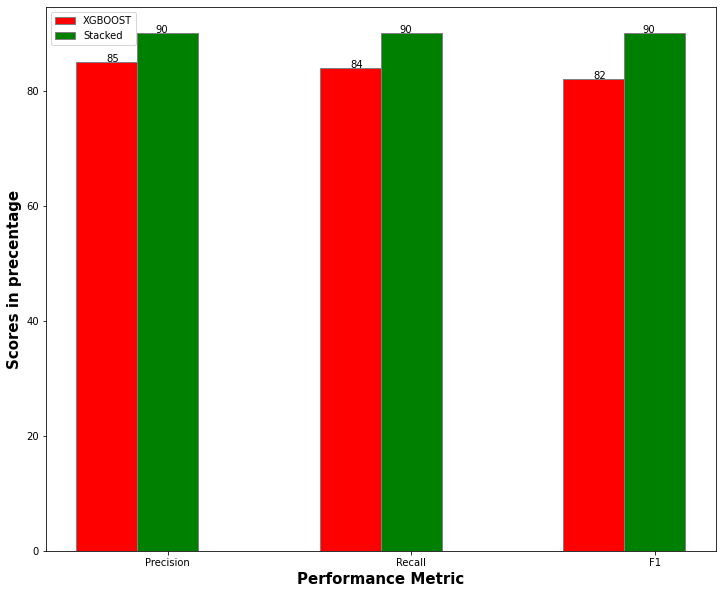

In [59]:
barWidth = 0.25
fig,ax = plt.subplots(figsize =(12, 10))
 
       
xgboost = [85, 84, 82]
stacked = [90, 90, 90]

 
br1 = np.arange(len(xgboost))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
ax.bar(br1, xgboost, color ='r', width = barWidth,
        edgecolor ='grey', label ='XGBOOST')
ax.bar(br2, stacked, color ='g', width = barWidth,
        edgecolor ='grey', label ='Stacked')

 
plt.xlabel('Performance Metric', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores in precentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(xgboost))],
        ['Precision', 'Recall', 'F1'])

for i, v in enumerate(xgboost):
    plt.text([r + barWidth for r in range(len(xgboost))][i] - 0.25, v + 0.01, str(v))
 
for i, v in enumerate(stacked):
    plt.text([r + barWidth for r in range(len(xgboost))][i] - 0.05, v + 0.01, str(v))

plt.legend()
plt.show()



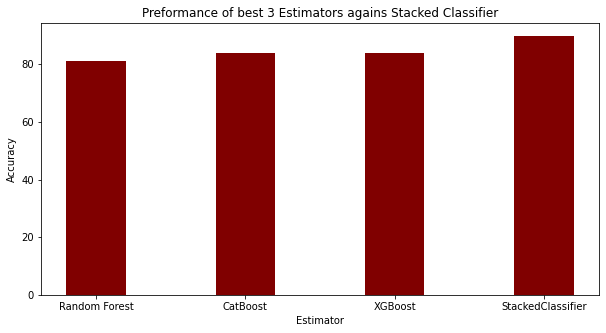

{'Random Forest': 81, 'CatBoost': 84, 'XGBoost': 84, 'StackedClassifier': 89.81525423728814}


In [60]:
data = {'Random Forest':81, 'CatBoost':84, 'XGBoost':84,
        'StackedClassifier':89.81525423728814}

barwidth=0.25
x=[81, 84, 84,89.91525423728814]
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values, color ='maroon',
        width = 0.4)

    
    
plt.xlabel("Estimator")
plt.ylabel("Accuracy")
plt.title("Preformance of best 3 Estimators agains Stacked Classifier")
plt.show()

print(data)